In [1]:
import numpy as np
import pandas as pd
# 전체적인 환경설정 용도
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = 'C:\Windows\Fonts\malgun.ttf').get_name()
plt.rc('font', family = font_name)

mpl.rcParams['axes.unicode_minus'] = False

from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

pd.options.display.float_format = '{:.5f}'.format

In [2]:
train = pd.read_csv('C:\\Users\\acorn\\python\\card\\jeju_data_ver1\\201901-202003.csv', index_col = [0])

FileNotFoundError: [Errno 2] File C:\Users\acorn\python\card\jeju_data_ver1\201901-202003.csv does not exist: 'C:\\Users\\acorn\\python\\card\\jeju_data_ver1\\201901-202003.csv'

In [27]:
train.head()

CARD_SIDO_NM CARD_CCG_NM STD_CLSS_NM HOM_SIDO_NM HOM_CCG_NM  AGE  \
REG_YYMM                                                                    
201901             강원         강릉시  건강보조식품 소매업          강원        강릉시  20s   
201901             강원         강릉시  건강보조식품 소매업          강원        강릉시  30s   
201901             강원         강릉시  건강보조식품 소매업          강원        강릉시  30s   
201901             강원         강릉시  건강보조식품 소매업          강원        강릉시  40s   
201901             강원         강릉시  건강보조식품 소매업          강원        강릉시  40s   

          SEX_CTGO_CD  FLC  CSTMR_CNT      AMT  CNT  
REG_YYMM                                             
201901              1    1          4   311200    4  
201901              1    2          7  1374500    8  
201901              2    2          6   818700    6  
201901              1    3          4  1717000    5  
201901              1    4          3  1047300    3

In [30]:
train.count()

CARD_SIDO_NM    24697792
CARD_CCG_NM     24610579
STD_CLSS_NM     24697792
HOM_SIDO_NM     24697792
HOM_CCG_NM      24550005
AGE             24697792
SEX_CTGO_CD     24697792
FLC             24697792
CSTMR_CNT       24697792
AMT             24697792
CNT             24697792
dtype: int64

['빵 및 과자류 소매업',
 '과실 및 채소 소매업',
 '체인화 편의점',
 '마사지업',
 '여행사업',
 '그외 기타 종합 소매업',
 '정기 항공 운송업',
 '버스 운송업',
 '골프장 운영업',
 '스포츠 및 레크레이션 용품 임대업',
 '욕탕업',
 '일식 음식점업',
 '자동차 임대업',
 '일반유흥 주점업',
 '내항 여객 운송업',
 '관광 민예품 및 선물용품 소매업',
 '택시 운송업',
 '육류 소매업',
 '슈퍼마켓',
 '여관업',
 '건강보조식품 소매업',
 '기타 주점업',
 '기타음식료품위주종합소매업',
 '비알콜 음료점업',
 '기타 외국식 음식점업',
 '기타 수상오락 서비스업',
 '서양식 음식점업',
 '그외 기타 스포츠시설 운영업',
 '차량용 주유소 운영업',
 '호텔업',
 '수산물 소매업',
 '중식 음식점업',
 '피자 햄버거 샌드위치 및 유사 음식점업',
 '한식 음식점업',
 '전시 및 행사 대행업',
 '휴양콘도 운영업',
 '그외 기타 분류안된 오락관련 서비스업',
 '기타 대형 종합 소매업',
 '화장품 및 방향제 소매업',
 '차량용 가스 충전업',
 '면세점']

In [8]:
train.isnull().sum()

CARD_SIDO_NM         0
CARD_CCG_NM      87213
STD_CLSS_NM          0
HOM_SIDO_NM          0
HOM_CCG_NM      147787
AGE                  0
SEX_CTGO_CD          0
FLC                  0
CSTMR_CNT            0
AMT                  0
CNT                  0
dtype: int64

In [9]:
train.describe()

SEX_CTGO_CD           FLC     CSTMR_CNT           AMT           CNT
count  2.469779e+07  2.469779e+07  2.469779e+07  2.469779e+07  2.469779e+07
mean   1.412645e+00  2.804429e+00  6.196855e+01  2.441353e+06  1.260450e+02
std    4.923099e-01  1.375455e+00  3.559175e+02  1.726096e+07  9.669387e+02
min    1.000000e+00  1.000000e+00  3.000000e+00  2.000000e+01  1.000000e+00
25%    1.000000e+00  2.000000e+00  4.000000e+00  9.020000e+04  5.000000e+00
50%    1.000000e+00  3.000000e+00  8.000000e+00  2.526800e+05  1.200000e+01
75%    2.000000e+00  4.000000e+00  2.400000e+01  8.433372e+05  4.000000e+01
max    2.000000e+00  5.000000e+00  3.281300e+04  2.349524e+09  1.203570e+05

In [11]:
si_clss_mean = train.groupby(['CARD_SIDO_NM','STD_CLSS_NM'])['AMT'].mean()

In [13]:
si_clss_mean = pd.DataFrame(si_clss_mean)
si_clss_mean

AMT
CARD_SIDO_NM STD_CLSS_NM                        
강원           건강보조식품 소매업            1230286.74459
             골프장 운영업               1598394.68784
             과실 및 채소 소매업            614108.02342
             관광 민예품 및 선물용품 소매업      103254.74435
             그외 기타 분류안된 오락관련 서비스업    88500.00000
...                                          ...
충북           피자 햄버거 샌드위치 및 유사 음식점업  590209.35627
             한식 음식점업               1597374.16526
             호텔업                    406208.38332
             화장품 및 방향제 소매업         1232436.38079
             휴양콘도 운영업               455782.74443

[650 rows x 1 columns]

In [16]:
si_clss_date_mean = train.groupby(['CARD_SIDO_NM','STD_CLSS_NM','REG_YYMM'])['AMT'].mean()
si_clss_data_mean = pd.DataFrame(si_clss_date_mean)
si_clss_date_mean

CARD_SIDO_NM  STD_CLSS_NM  REG_YYMM
강원            건강보조식품 소매업   201901     1578241.97872
                           201902     1410729.52885
                           201903     1272546.80233
                           201904     1024504.54808
                           201905     1371442.01852
                                           ...     
충북            휴양콘도 운영업     201911      389083.24451
                           201912      399911.06590
                           202001      458828.74380
                           202002      370754.56693
                           202003      363814.00000
Name: AMT, Length: 9438, dtype: float64

In [17]:
si_clss_date_mean.loc['강원']

STD_CLSS_NM  REG_YYMM
건강보조식품 소매업   201901     1578241.97872
             201902     1410729.52885
             201903     1272546.80233
             201904     1024504.54808
             201905     1371442.01852
                             ...     
휴양콘도 운영업     201911      583529.10894
             201912      609955.70273
             202001      816015.23049
             202002      538574.37821
             202003      520330.86896
Name: AMT, Length: 572, dtype: float64

In [18]:
#si_clss_date_mean.to_csv("si_clss_date_mean.csv")

C:\Users\acorn\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [21]:
pd.options.display.float_format = '{:.5f}'.format
si_clss_date_sum = train.groupby(['CARD_SIDO_NM','STD_CLSS_NM','REG_YYMM'])['AMT'].sum()
si_clss_data_sum = pd.DataFrame(si_clss_date_sum)
si_clss_date_sum

CARD_SIDO_NM  STD_CLSS_NM  REG_YYMM
강원            건강보조식품 소매업   201901      148354746
                           201902      146715871
                           201903      109439025
                           201904      106548473
                           201905      148115738
                                         ...    
충북            휴양콘도 운영업     201911      124117555
                           201912      139568962
                           202001      222073112
                           202002       47085830
                           202003       12733490
Name: AMT, Length: 9438, dtype: int64

In [22]:
#si_clss_date_sum.to_csv("si_clss_date_sum.csv")

C:\Users\acorn\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


코로나에 영향을 받는 분야와 아닌 분야 - 신천지 31번 환자 2/17일  
재난지원금 포함?  
코로나의 시작점  


In [43]:
date_sum = train.groupby(['STD_CLSS_NM','REG_YYMM'])['AMT'].sum()
date_sum = pd.DataFrame(date_sum)
date_sum

AMT
STD_CLSS_NM REG_YYMM            
건강보조식품 소매업  201901    8605074944
            201902    7695979668
            201903    6307887107
            201904    6189621059
            201905    7930621122
...                          ...
휴양콘도 운영업    201911    3333090812
            201912    5293795864
            202001    8873863619
            202002    3317926290
            202003    1093634463

[615 rows x 1 columns]

In [44]:
#date_sum.to_csv("date_sum.csv")

In [109]:
date_sum.loc[[clss[39]]]

AMT
STD_CLSS_NM REG_YYMM              
서양식 음식점업    201901    113549549718
            201902    104204176421
            201903    119483441051
            201904    113835482171
            201905    125267638976
            201906    121248462239
            201907    125892449532
            201908    131062467964
            201909    116944516346
            201910    122476251924
            201911    114738340578
            201912    136915073344
            202001    117971377072
            202002     97352963272
            202003     87416713918

In [99]:
date_sum = train.groupby(['STD_CLSS_NM'])['AMT'].sum()
date_sum = pd.DataFrame(date_sum)
date_sum

21170010804

## 시도, 업종별 AMT 합계 평균 시각화

In [3]:
sido_amt_sum = train.groupby(['CARD_SIDO_NM'])['AMT'].sum()
sido_amt_mean = train.groupby(['CARD_SIDO_NM'])['AMT'].mean()
clss_amt_sum = train.groupby(['STD_CLSS_NM'])['AMT'].sum()
clss_amt_mean = train.groupby(['STD_CLSS_NM'])['AMT'].mean()

In [4]:
sido_amt_sum = pd.DataFrame(sido_amt_sum)
sido_amt_mean = pd.DataFrame(sido_amt_mean)
clss_amt_sum = pd.DataFrame(clss_amt_sum)
clss_amt_mean = pd.DataFrame(clss_amt_mean)

In [5]:
sido_amt_sum.sort_values(by = 'AMT',ascending=False, inplace=True)
sido_amt_mean.sort_values(by = 'AMT',ascending=False, inplace=True)
clss_amt_sum.sort_values(by = 'AMT',ascending=False, inplace=True)
clss_amt_mean.sort_values(by = 'AMT',ascending=False, inplace=True)

Text(0.5, 1.0, '시도별 전체 거래가의 합')

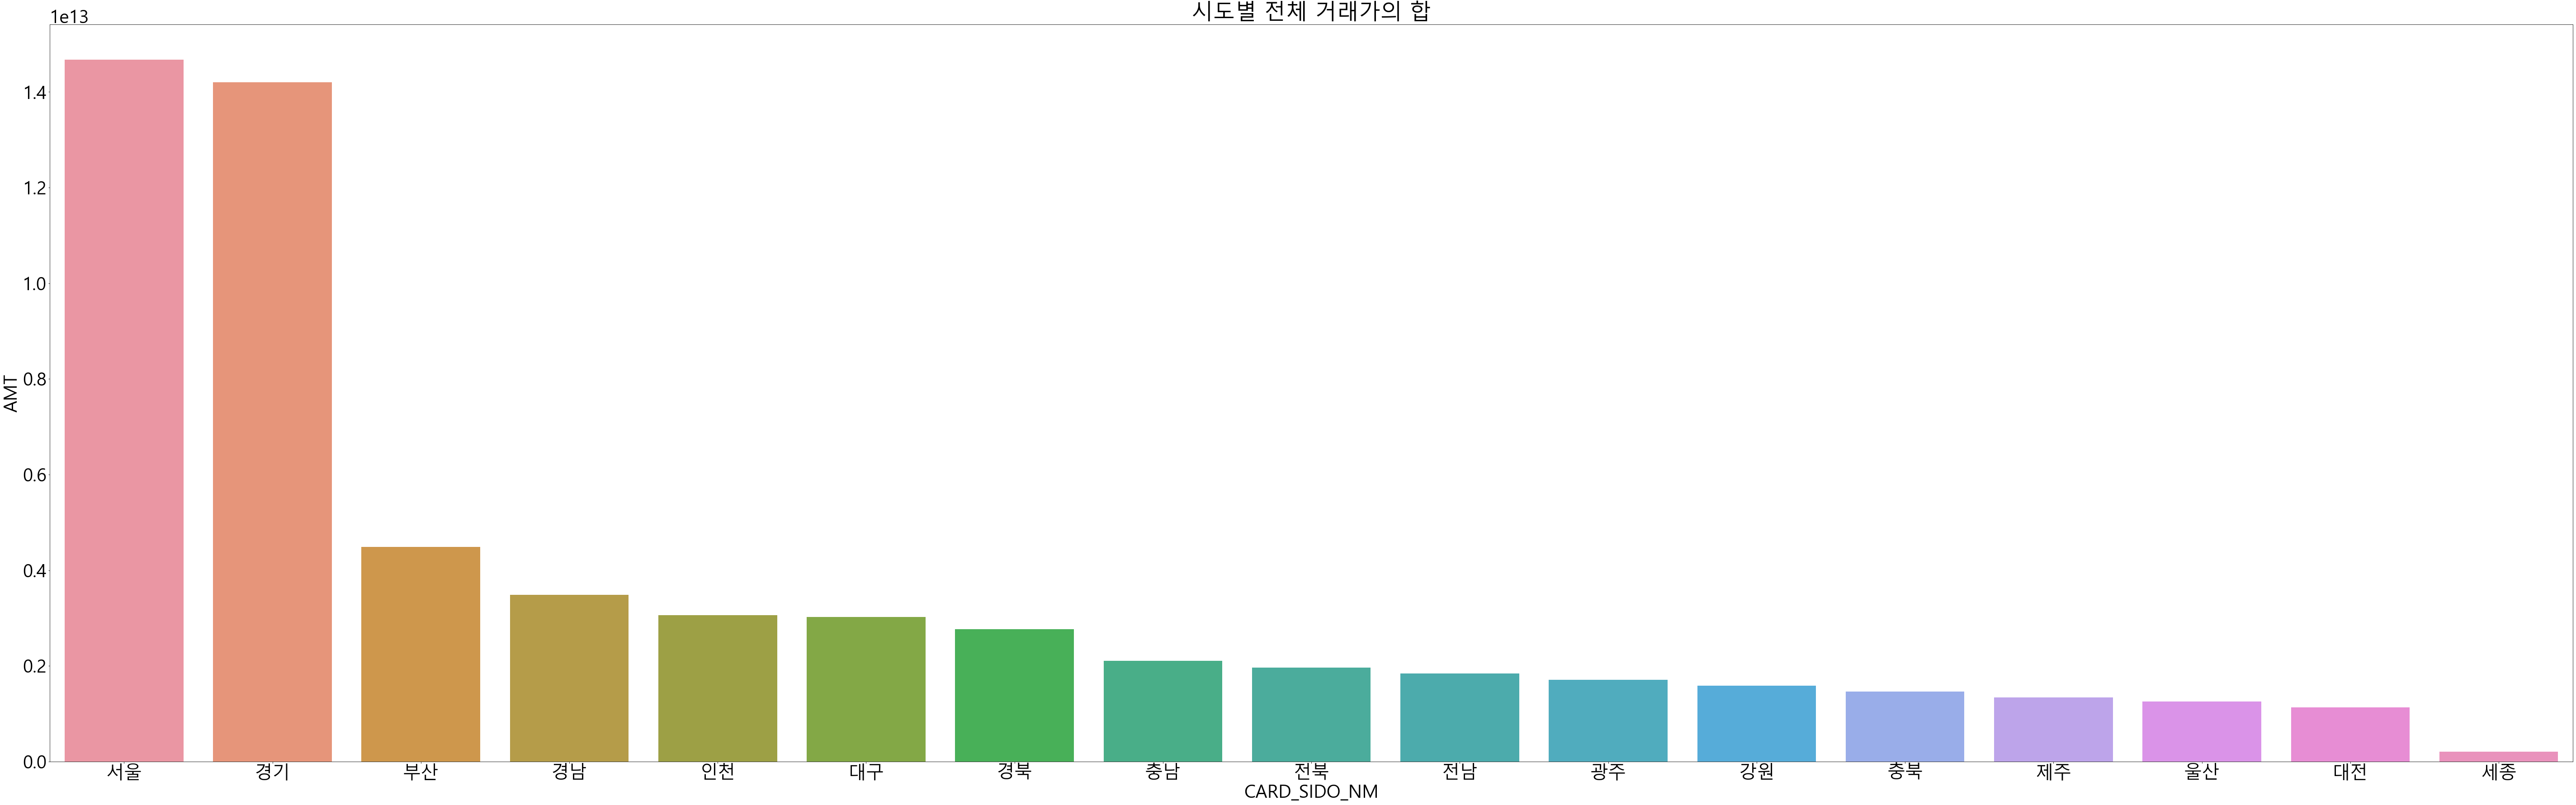

In [138]:
"""sido_amt_sum.plot.bar()
sido_amt_mean.plot.bar()
clss_amt_sum.plot.bar()
clss_amt_mean.plot.bar()
"""
plt.figure(figsize = (100,30))
plt.rcParams.update({'font.size': 40})
b = sns.barplot(data= sido_amt_sum,x= sido_amt_sum.index, y= 'AMT')
plt.title("시도별 전체 거래가의 합")

Text(0.5, 1.0, '시도별 전체 거래가의 평균')

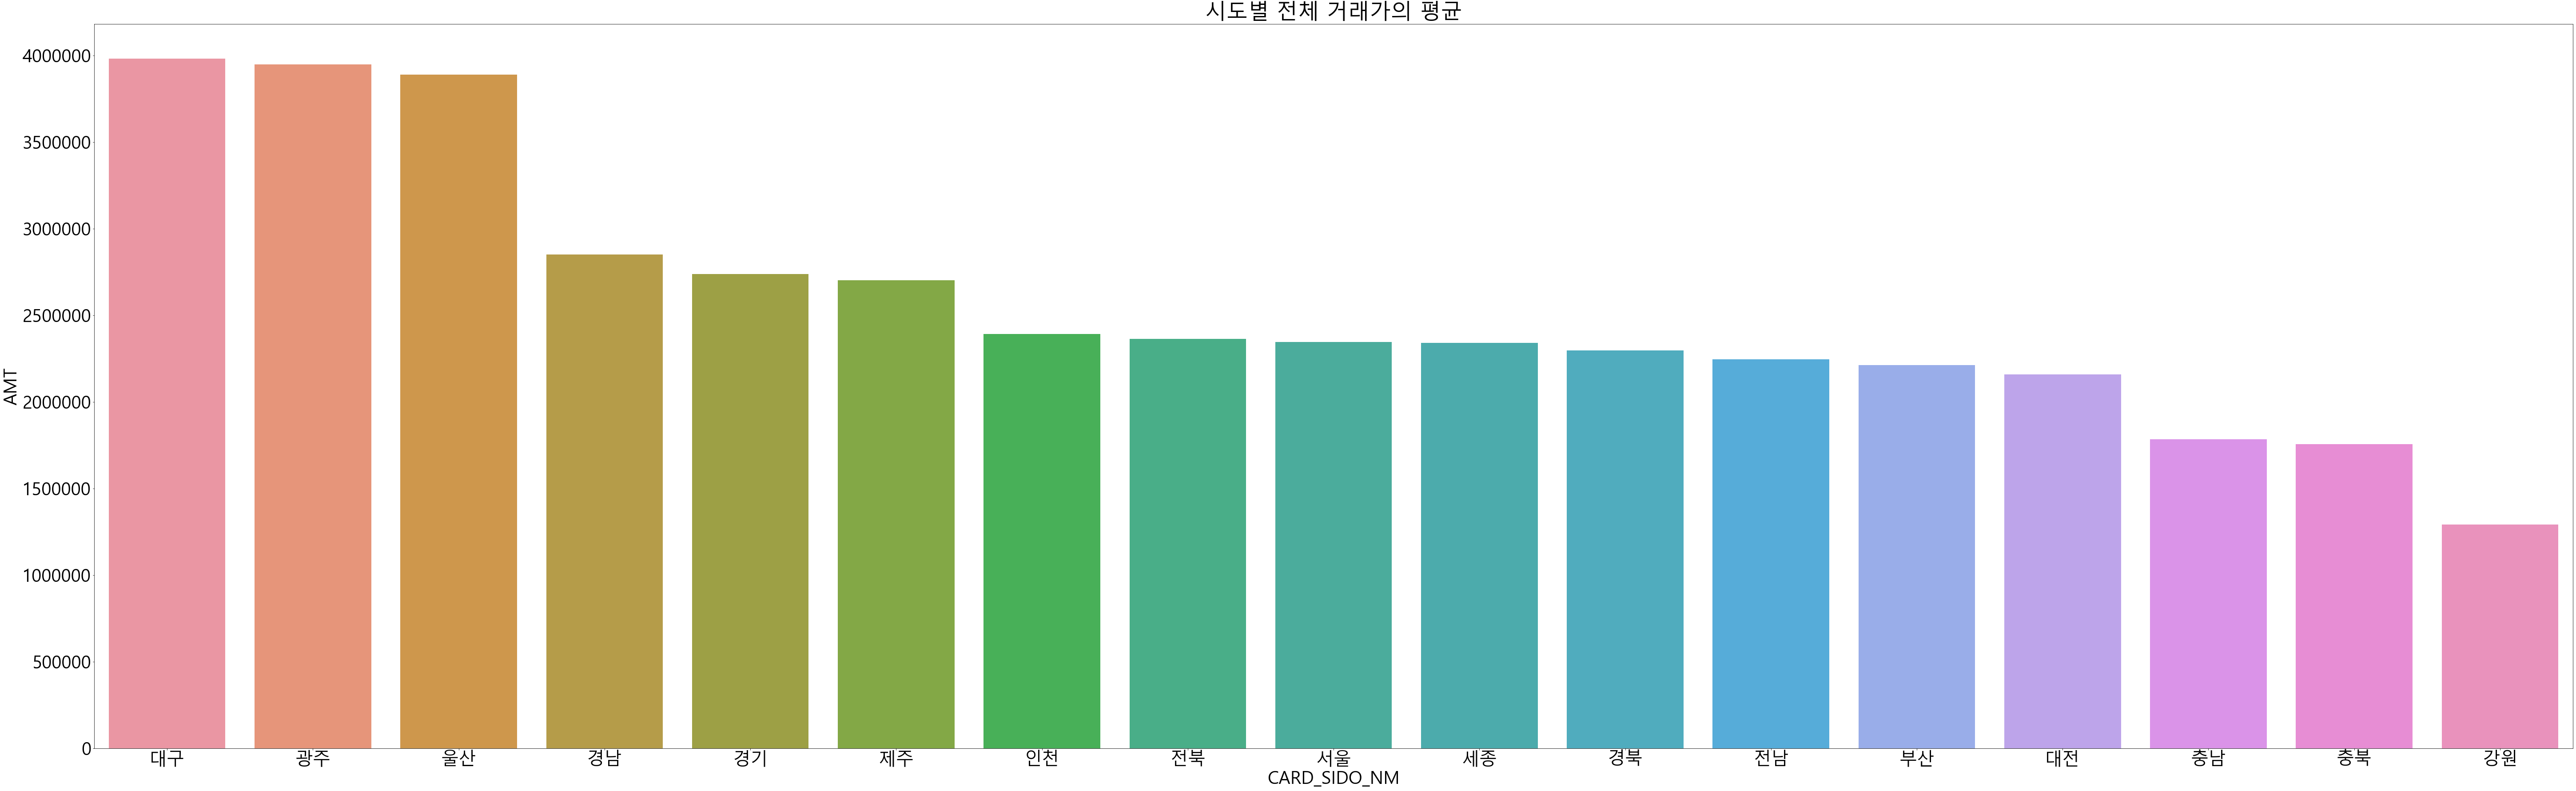

In [139]:
plt.figure(figsize = (100,30))
plt.rcParams.update({'font.size': 40})
b = sns.barplot(data= sido_amt_mean,x= sido_amt_mean.index, y= 'AMT')
plt.title("시도별 전체 거래가의 평균")

Text(0.5, 1.0, '업종별 전체 거래가의 합')

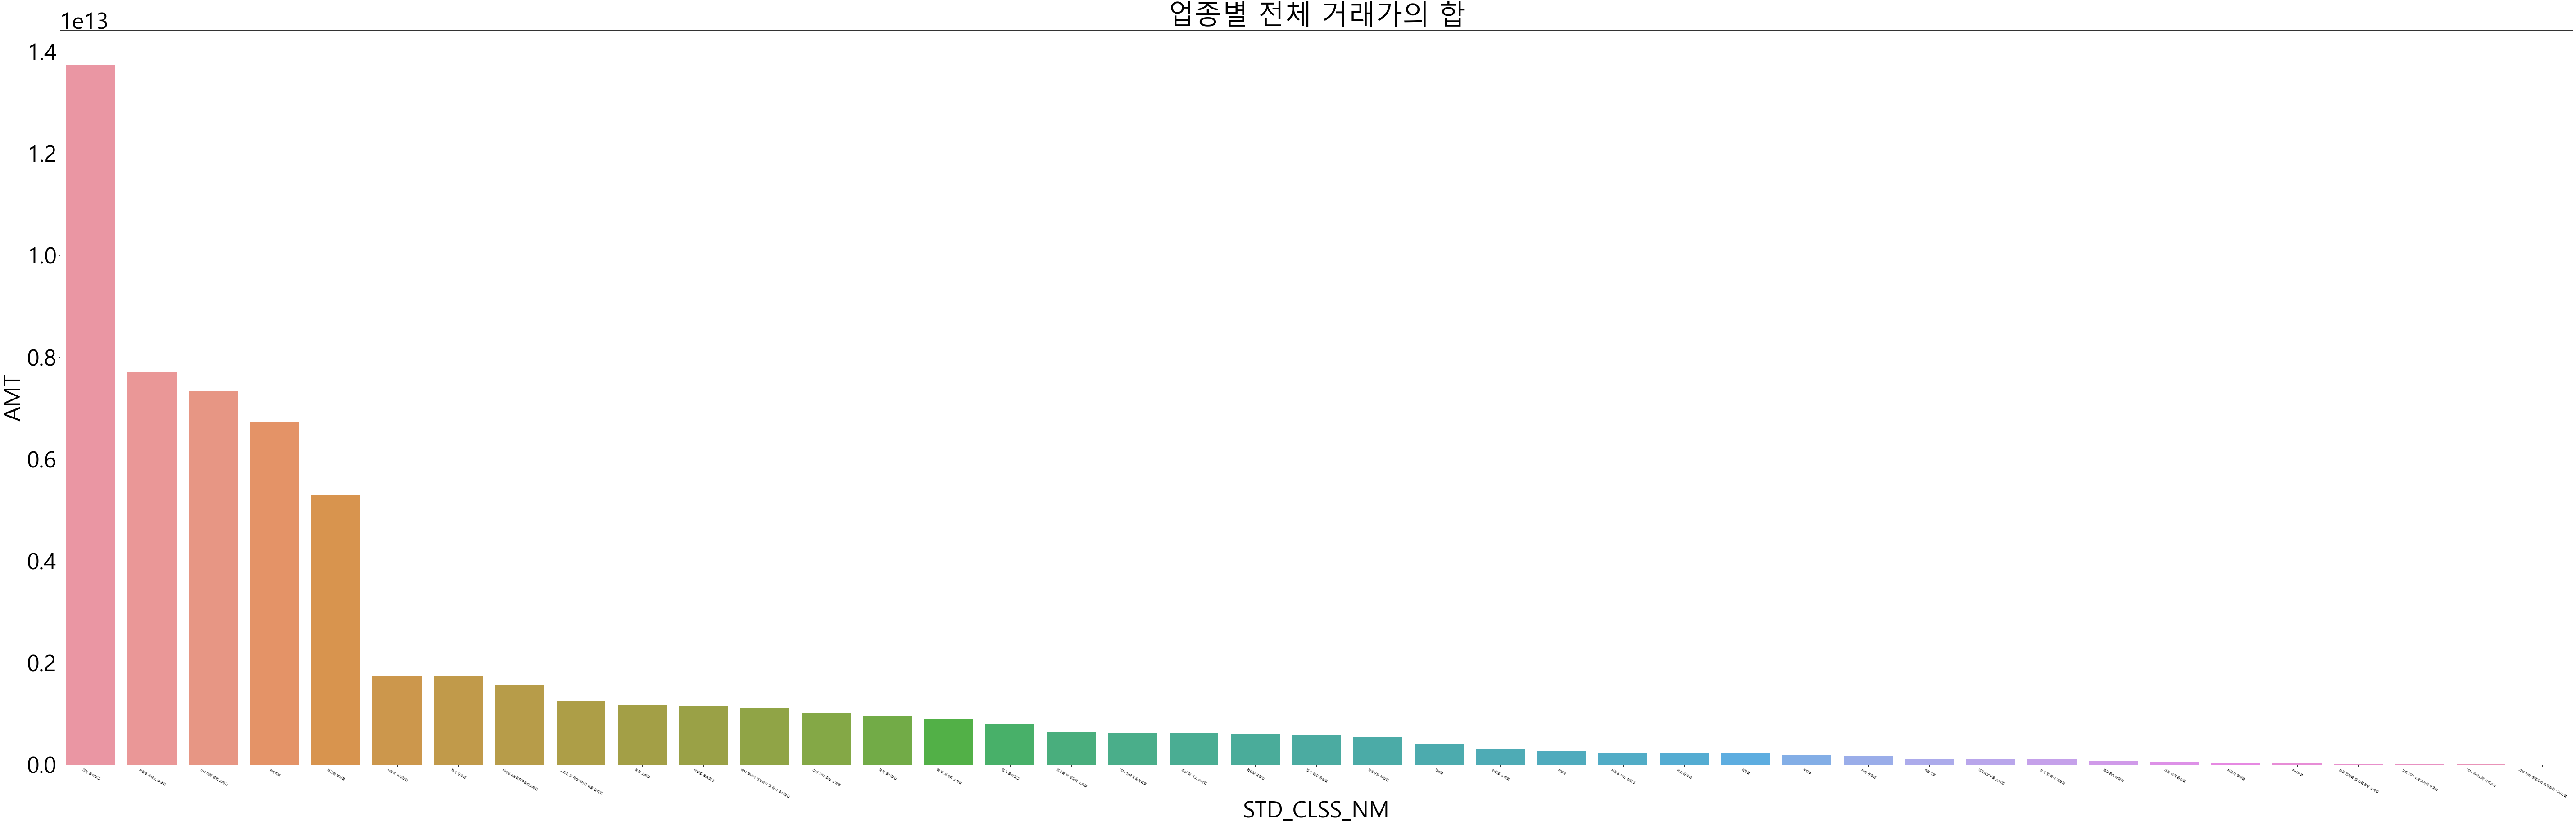

In [15]:
plt.figure(figsize = (100,30))
plt.rcParams.update({'font.size': 50})
b = sns.barplot(data= clss_amt_sum,x= clss_amt_sum.index, y= 'AMT')
b.set_xticklabels(b.get_xticklabels(), fontsize=7)
plt.xticks(rotation = -30 )
plt.title("업종별 전체 거래가의 합")

Text(0.5, 1.0, '업종별 전체 거래가의 평균')

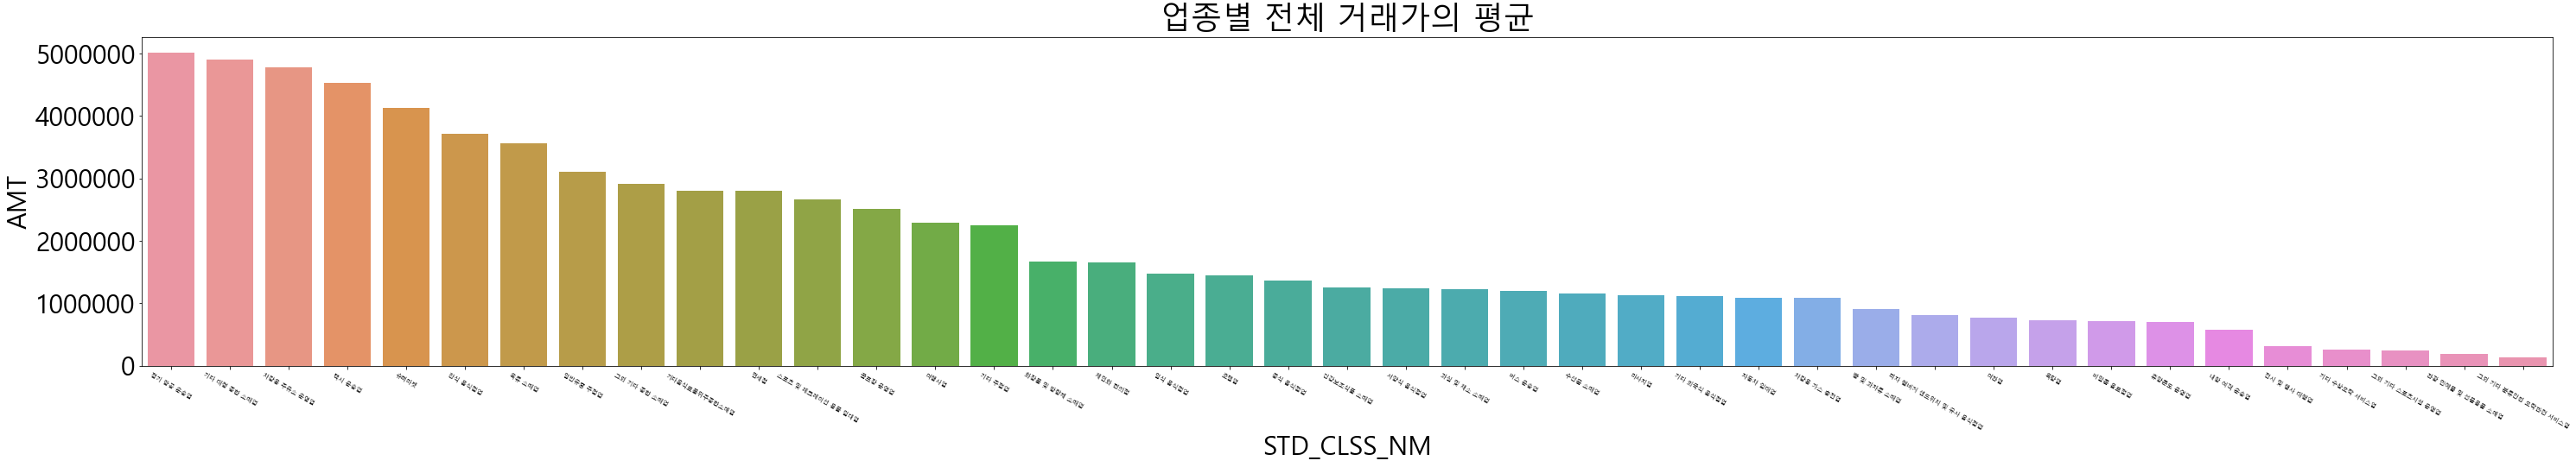

In [14]:
plt.figure(figsize = (50,7))
plt.rcParams.update({'font.size': 30})
b = sns.barplot(data= clss_amt_mean,x= clss_amt_mean.index, y= 'AMT')
b.set_xticklabels(b.get_xticklabels(), fontsize=7)
plt.xticks(rotation = -30 )

plt.title("업종별 전체 거래가의 평균")

## 업종별을 시도로 나눠서 AMT 평균

In [16]:
# 업종추출
clss = train['STD_CLSS_NM']

clss = list(clss)
clss = set(clss)
clss = list(clss)
clss

['빵 및 과자류 소매업',
 '과실 및 채소 소매업',
 '체인화 편의점',
 '마사지업',
 '여행사업',
 '그외 기타 종합 소매업',
 '정기 항공 운송업',
 '버스 운송업',
 '골프장 운영업',
 '스포츠 및 레크레이션 용품 임대업',
 '욕탕업',
 '일식 음식점업',
 '자동차 임대업',
 '일반유흥 주점업',
 '내항 여객 운송업',
 '관광 민예품 및 선물용품 소매업',
 '택시 운송업',
 '육류 소매업',
 '슈퍼마켓',
 '여관업',
 '건강보조식품 소매업',
 '기타 주점업',
 '기타음식료품위주종합소매업',
 '비알콜 음료점업',
 '기타 외국식 음식점업',
 '기타 수상오락 서비스업',
 '서양식 음식점업',
 '그외 기타 스포츠시설 운영업',
 '차량용 주유소 운영업',
 '호텔업',
 '수산물 소매업',
 '중식 음식점업',
 '피자 햄버거 샌드위치 및 유사 음식점업',
 '한식 음식점업',
 '전시 및 행사 대행업',
 '휴양콘도 운영업',
 '그외 기타 분류안된 오락관련 서비스업',
 '기타 대형 종합 소매업',
 '화장품 및 방향제 소매업',
 '차량용 가스 충전업',
 '면세점']

In [12]:
clss_sido_amt_sum = train.groupby(['STD_CLSS_NM','CARD_SIDO_NM'])['AMT'].sum()
clss_sido_amt_sum = pd.DataFrame(clss_sido_amt_sum)

In [44]:
clss_sido_amt_mean.loc[clss[0]]
np.argsort(clss_sido_amt_mean.loc[clss[0]]['AMT'])

CARD_SIDO_NM
강원     9
경기    14
경남    16
경북     0
광주    10
대구     6
대전    12
부산    15
서울    13
세종     3
울산     4
인천     2
전남    11
전북     5
제주     7
충남     1
충북     8
Name: AMT, dtype: int64

In [21]:
clss_sido_amt_sum.loc[clss[1]].sort_values(by = 'AMT', ascending = False)

AMT
CARD_SIDO_NM              
서울            110331062192
경기            104789326737
부산             69244220590
경남             42281889072
인천             42225501163
대구             36395145714
전남             34791656866
경북             29057027933
광주             27007077534
전북             25401260524
충남             21852211786
강원             16675489268
제주             15131321891
대전             13882801638
울산             13118775460
충북             10933074314
세종              5810958601

<ipython-input-26-db347a619da7>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (50,7))


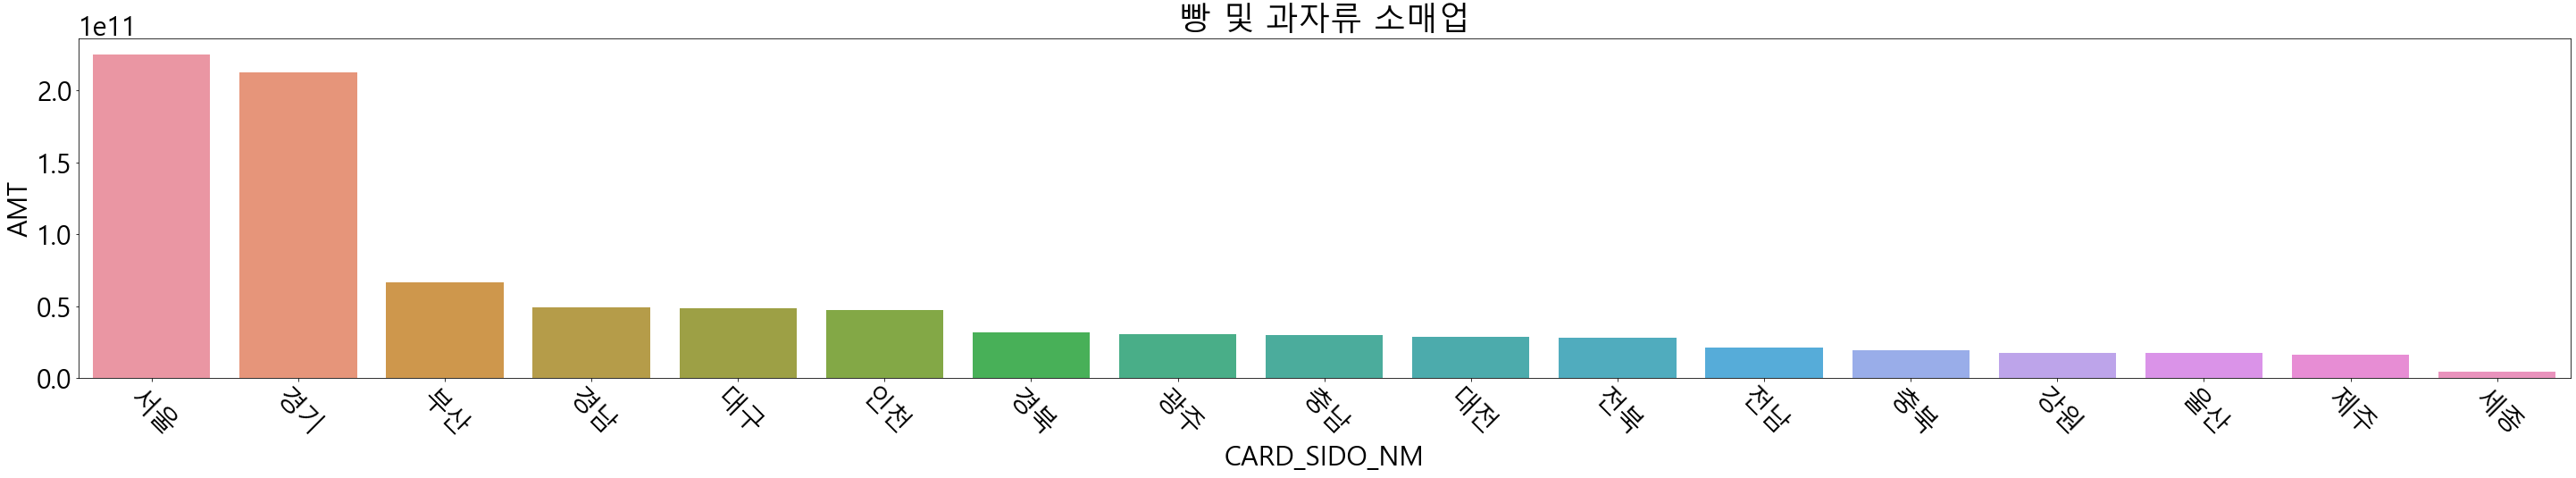

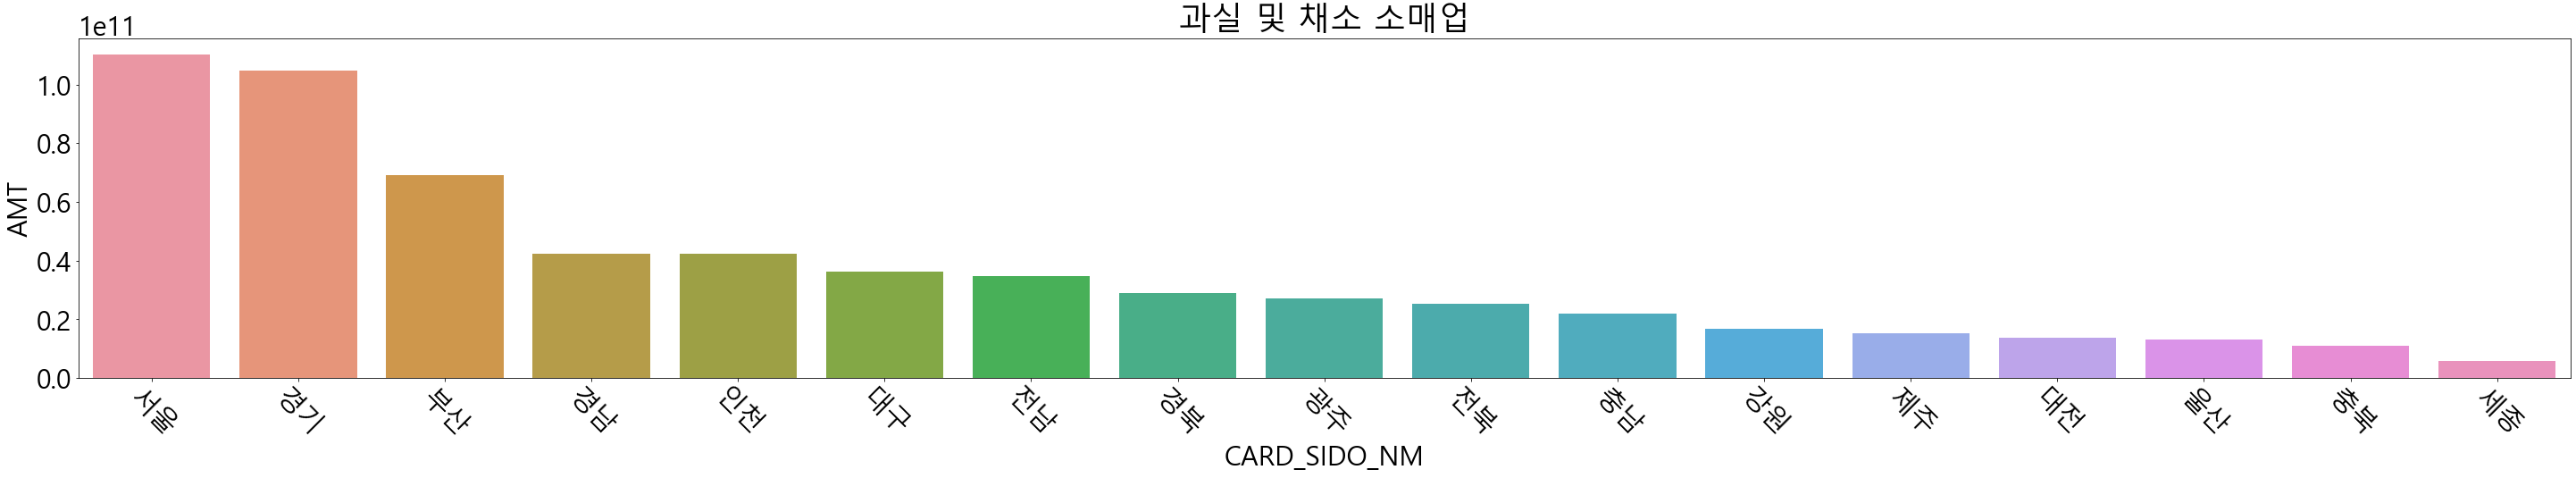

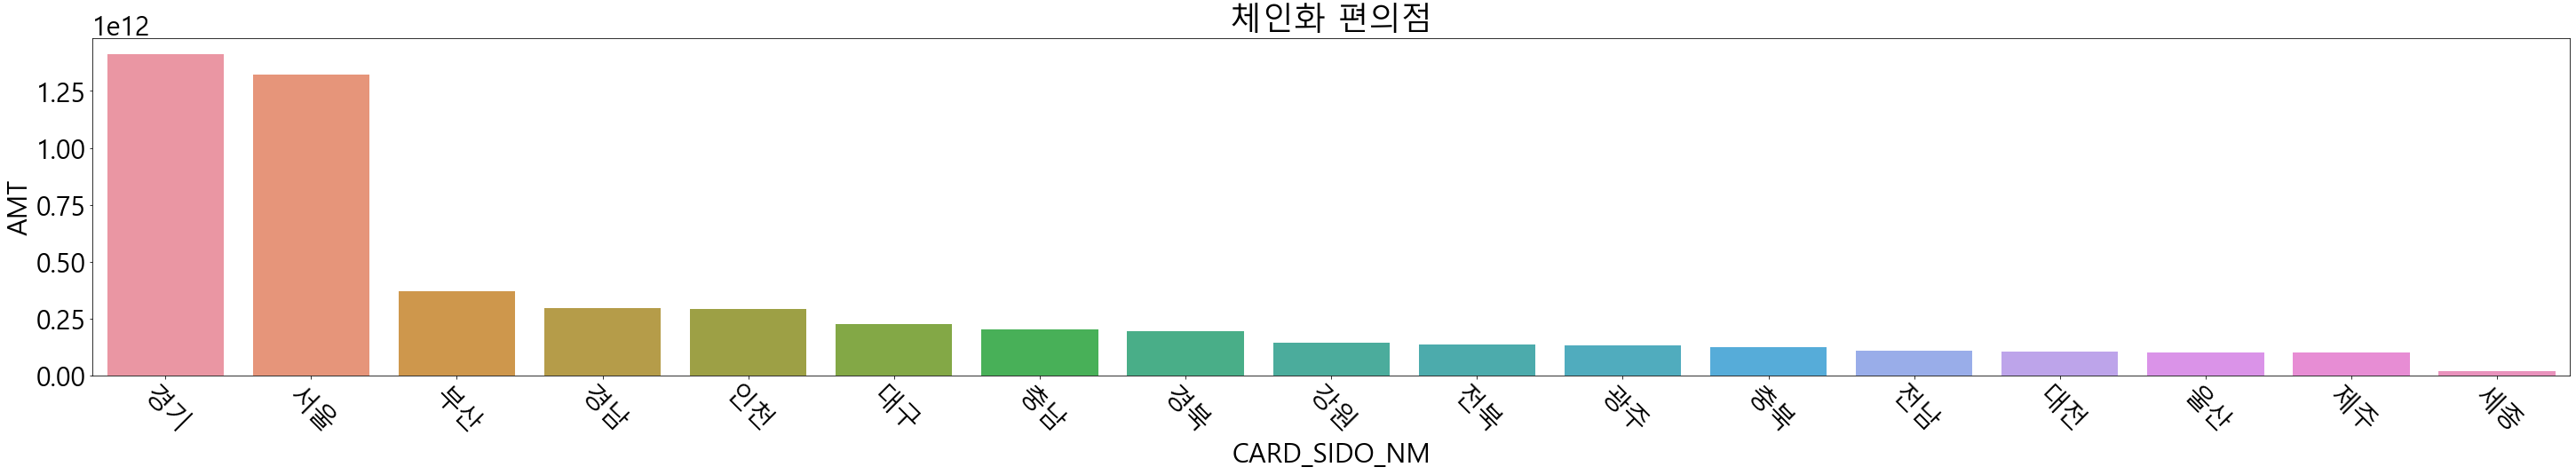

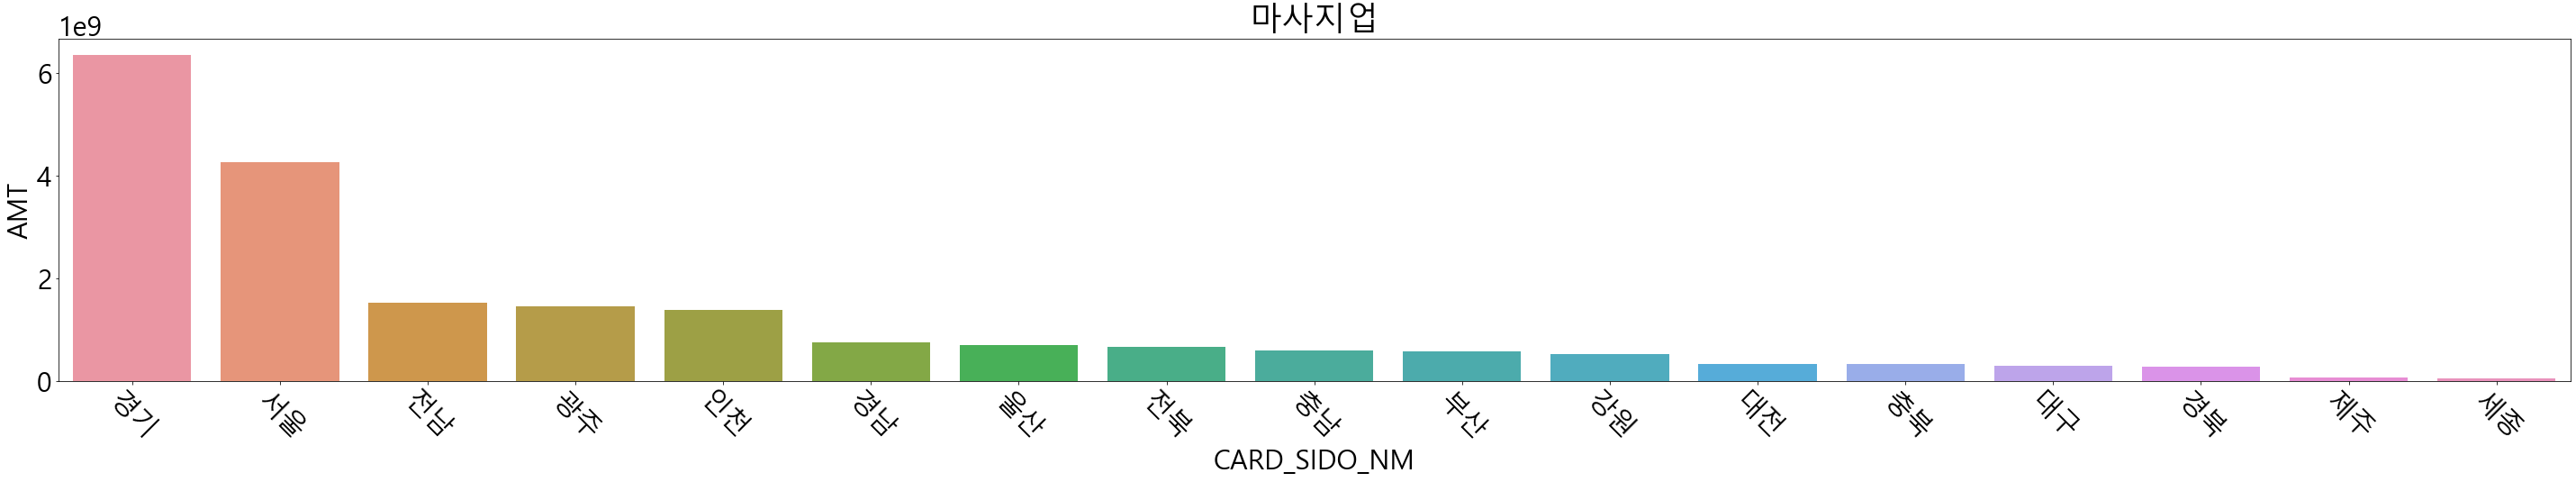

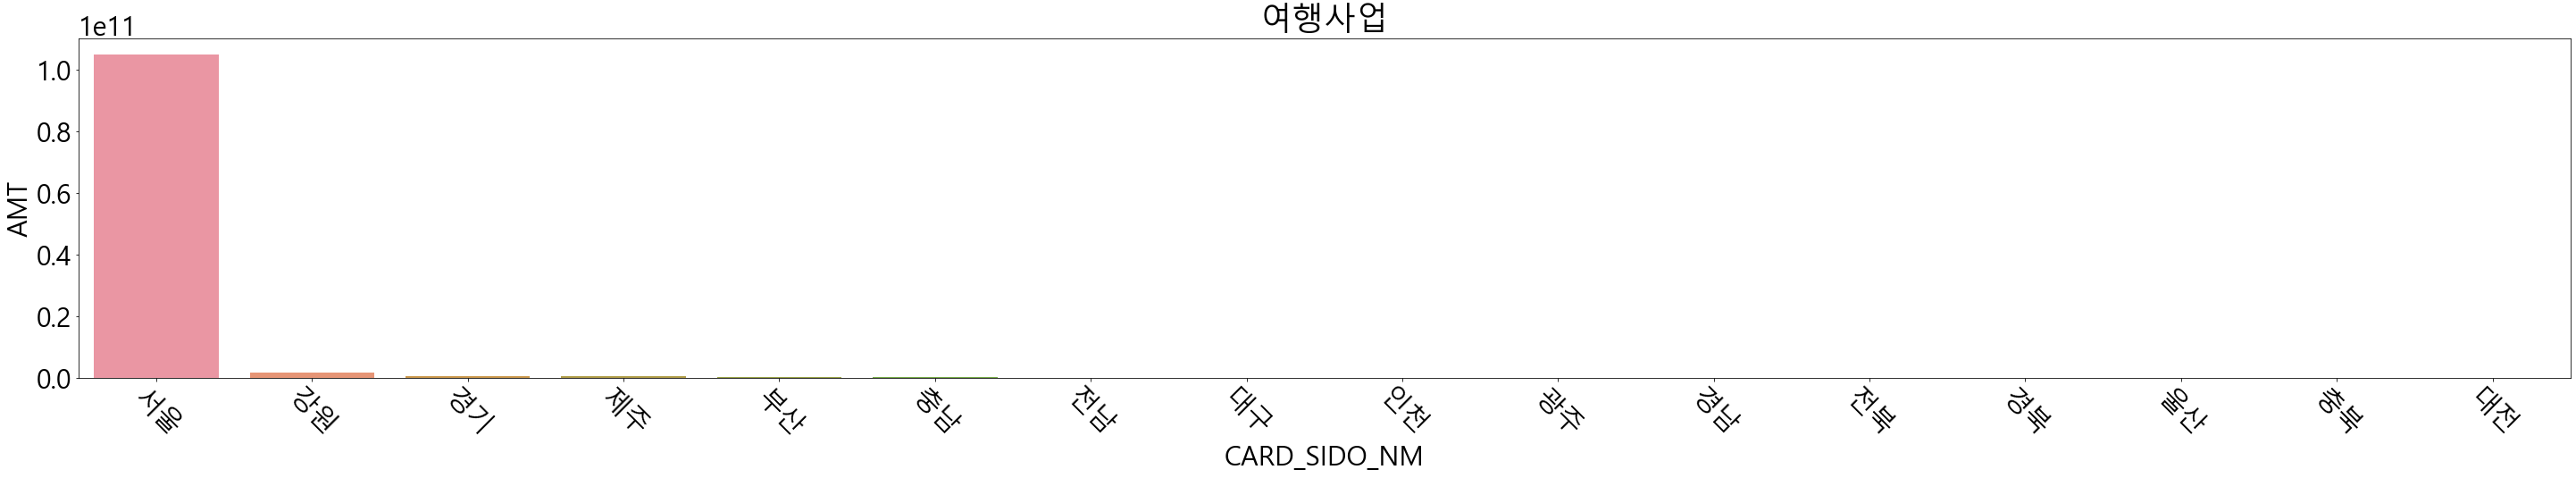

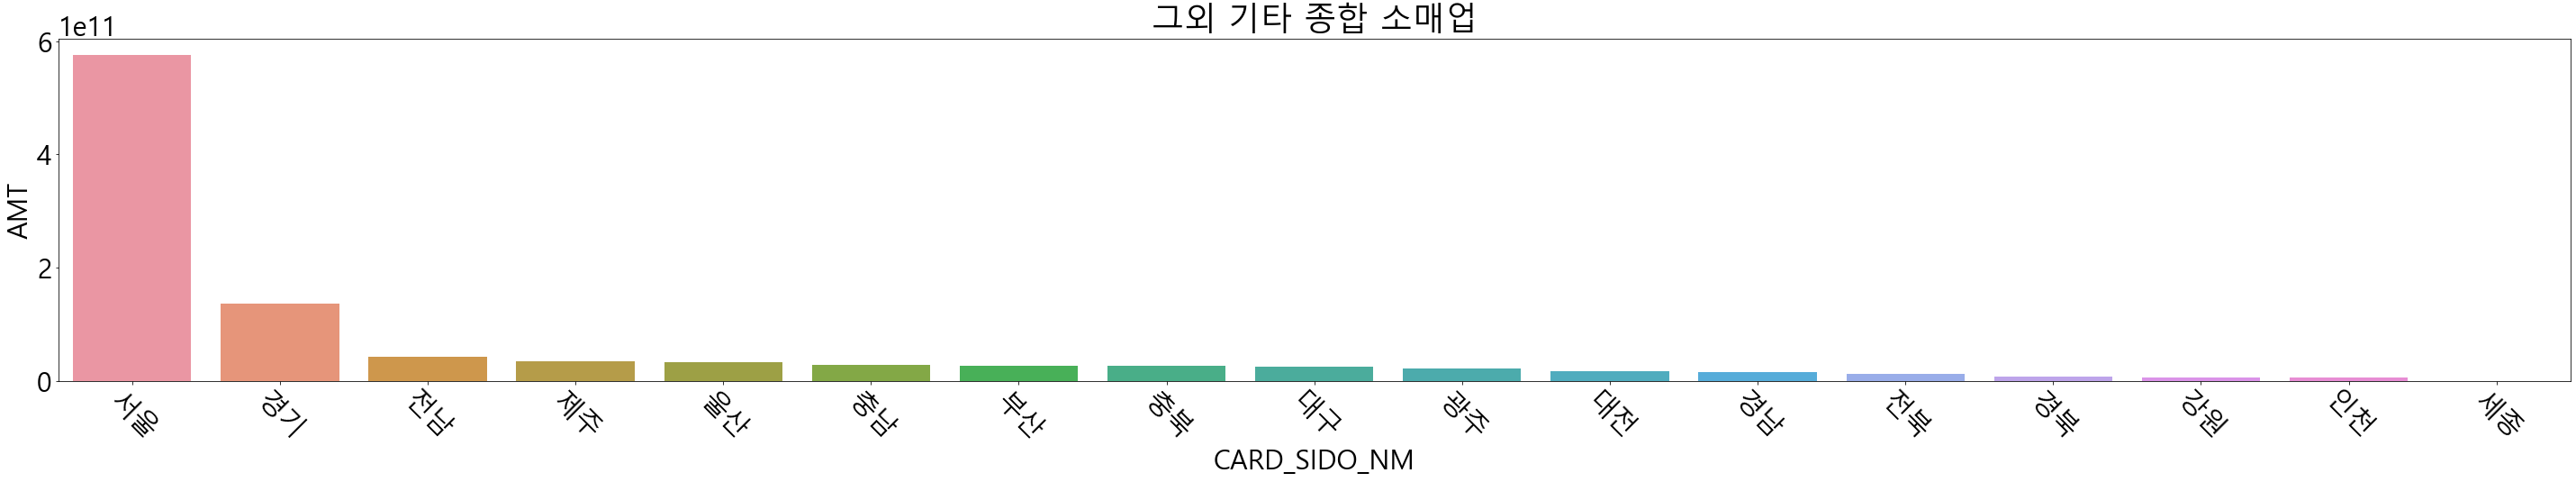

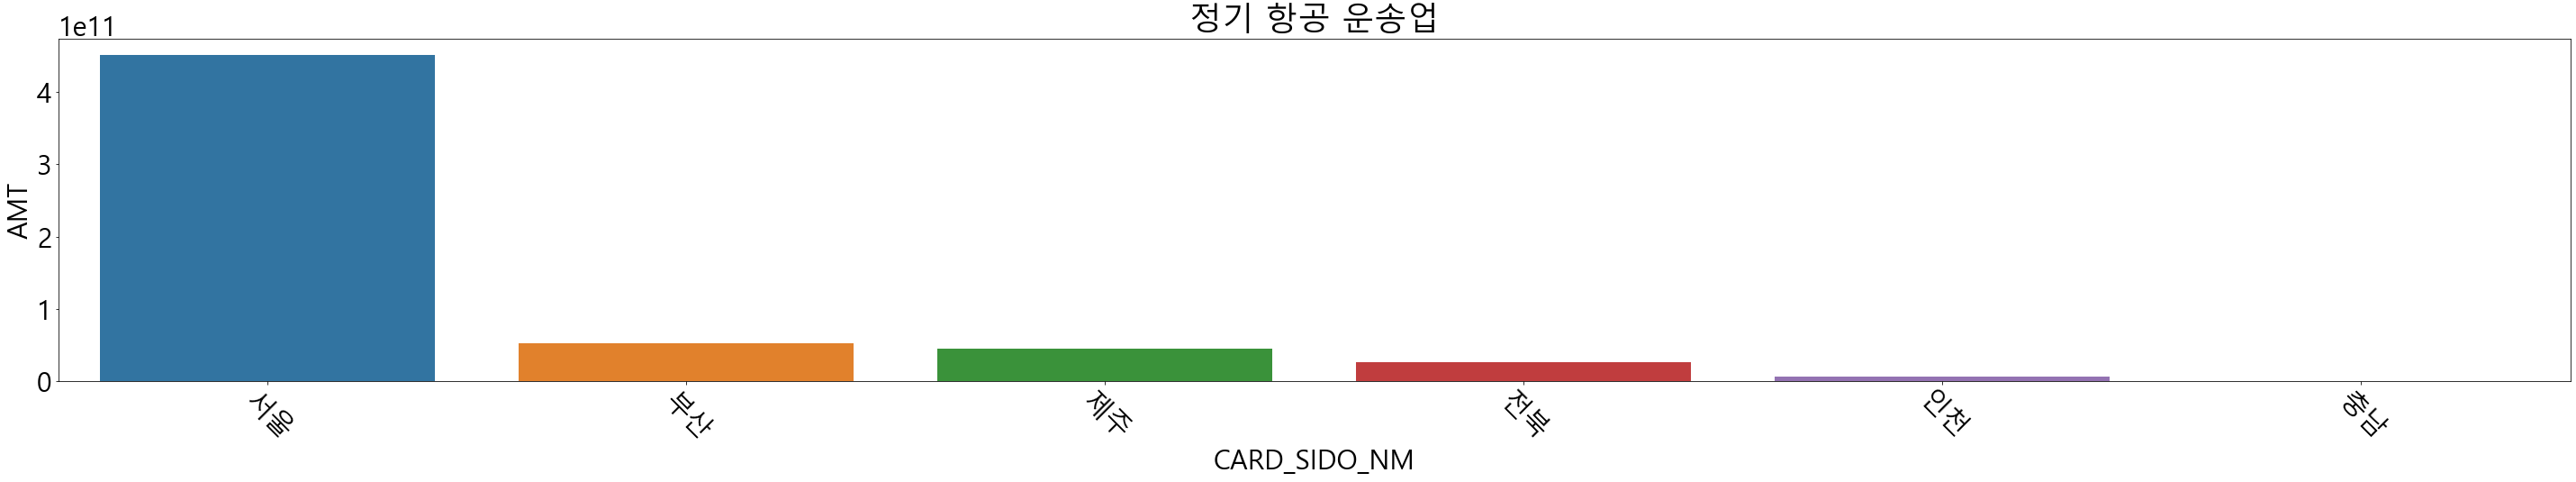

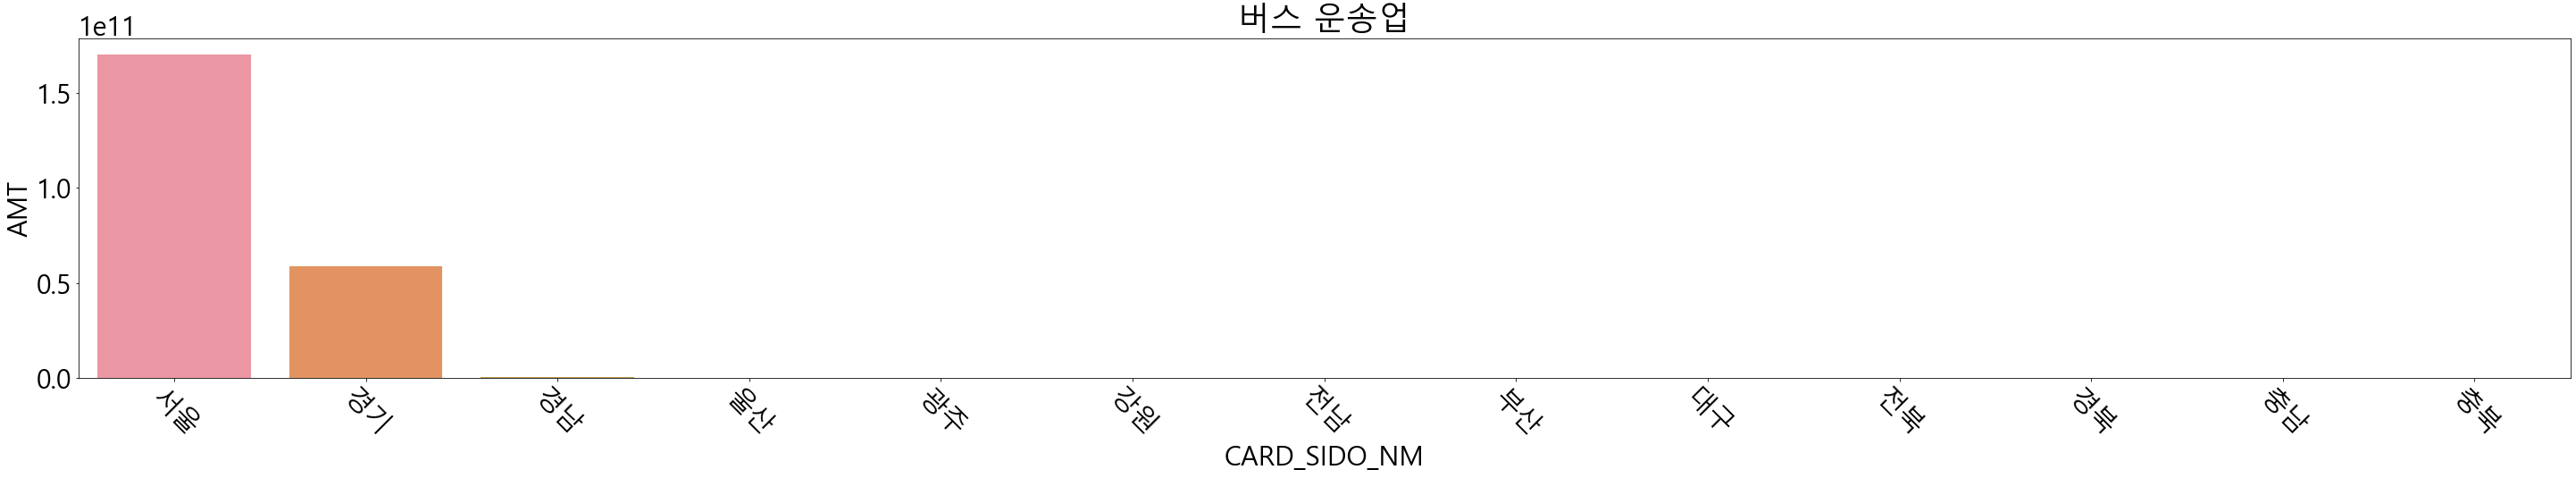

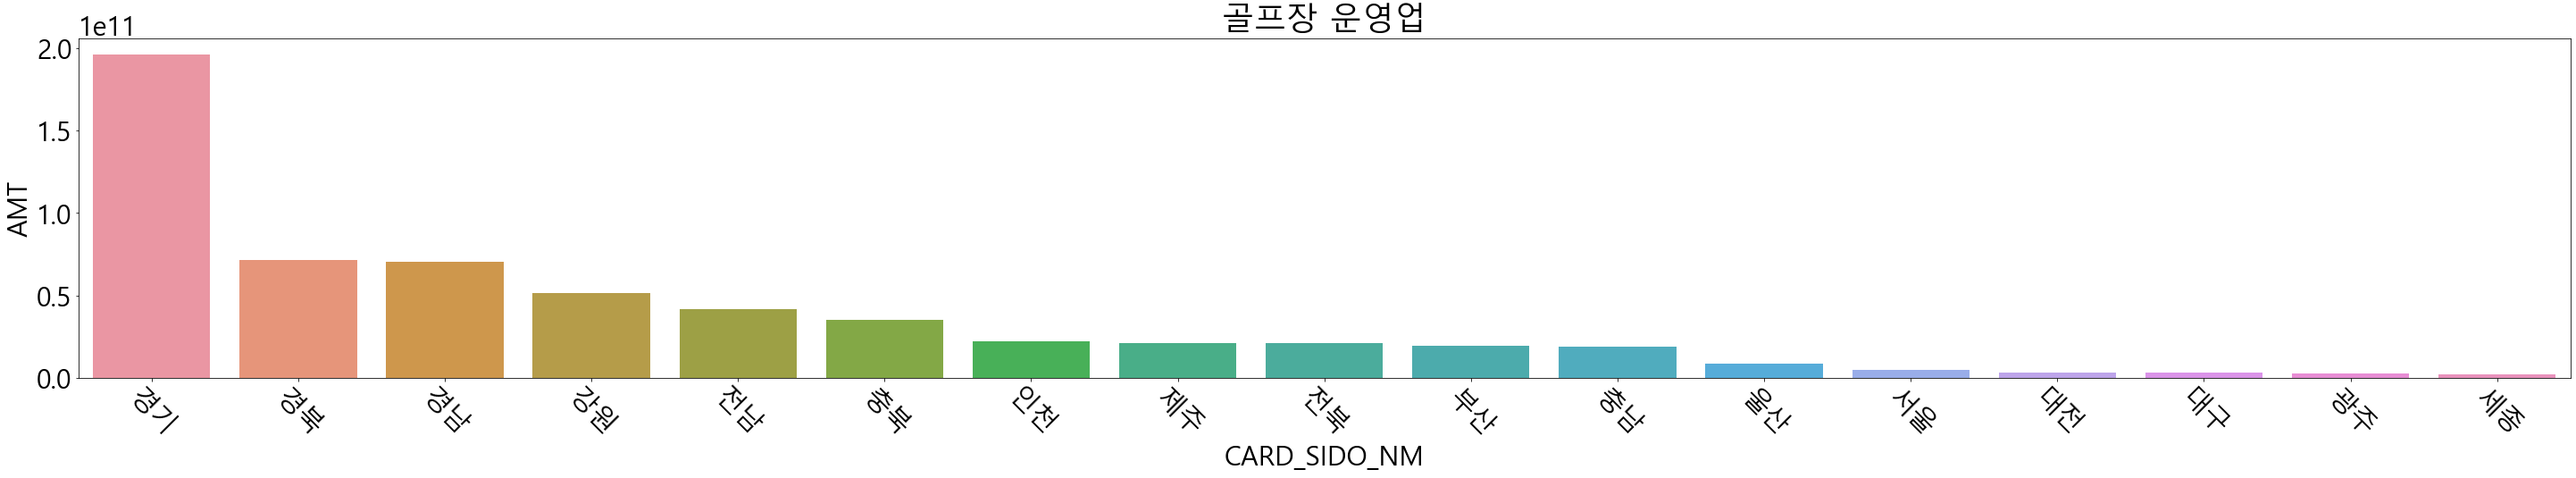

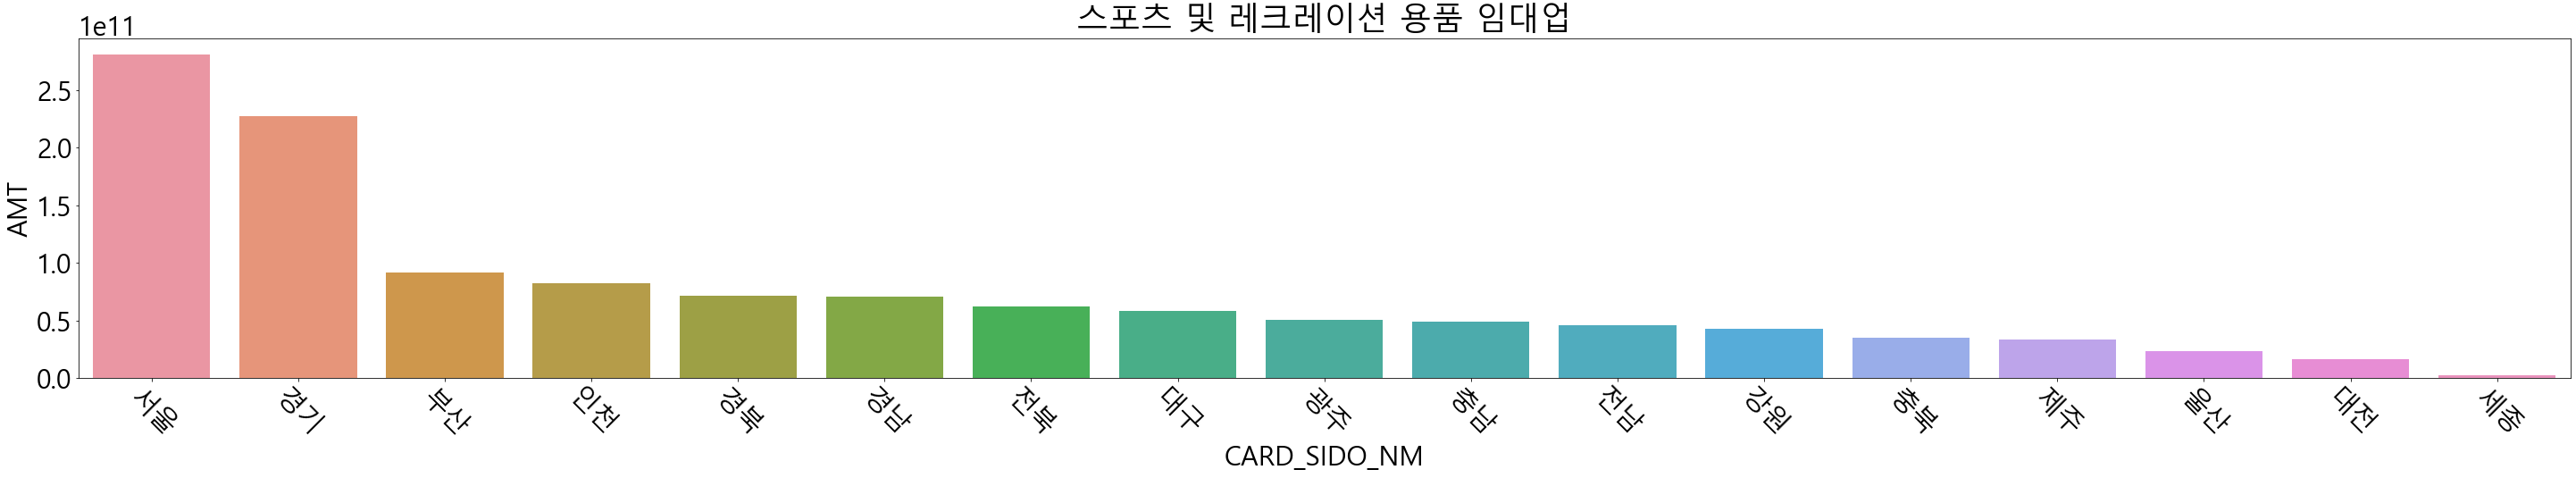

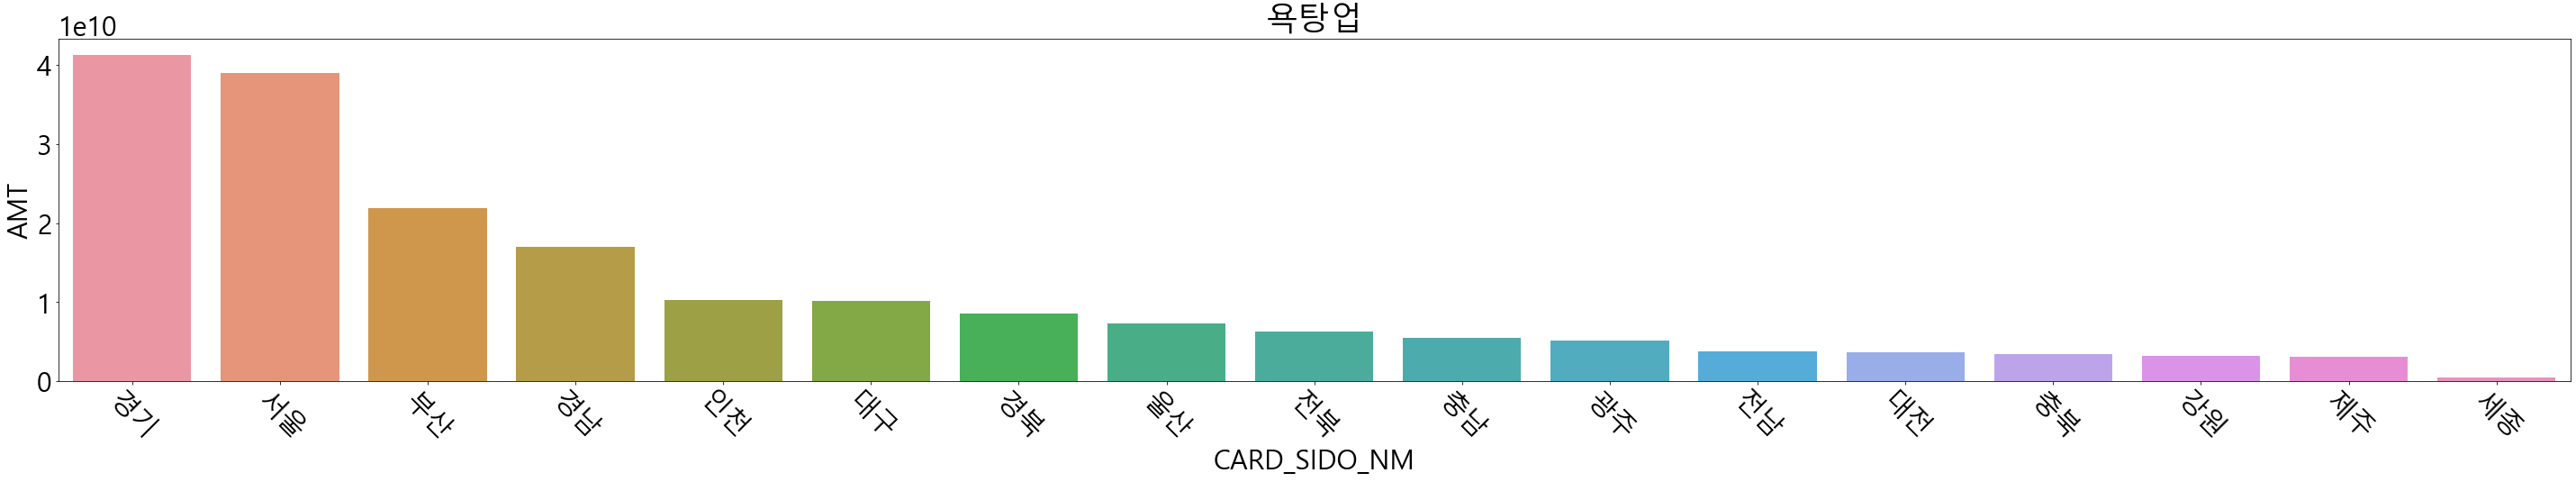

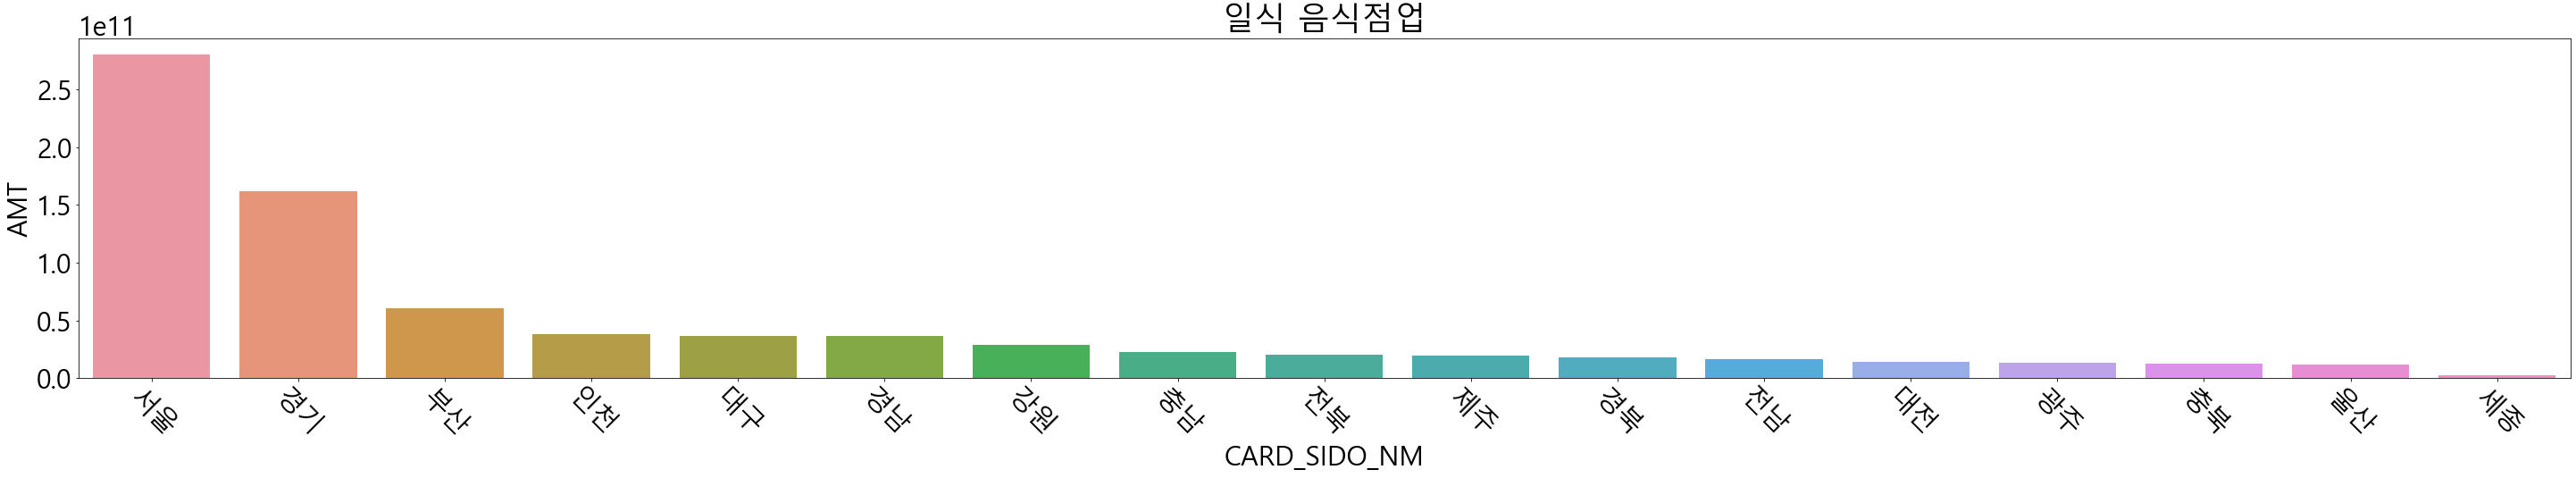

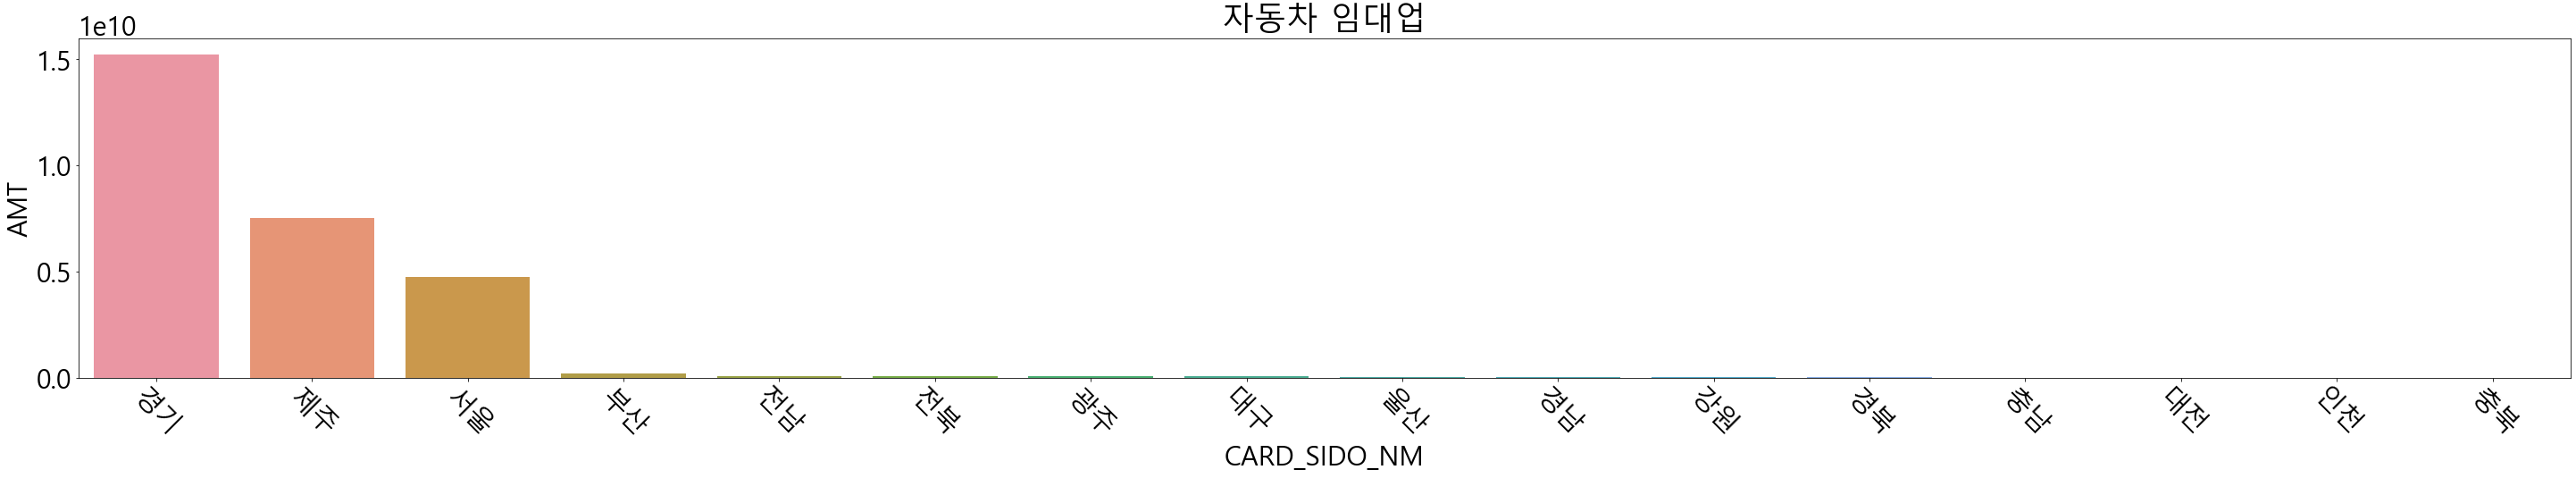

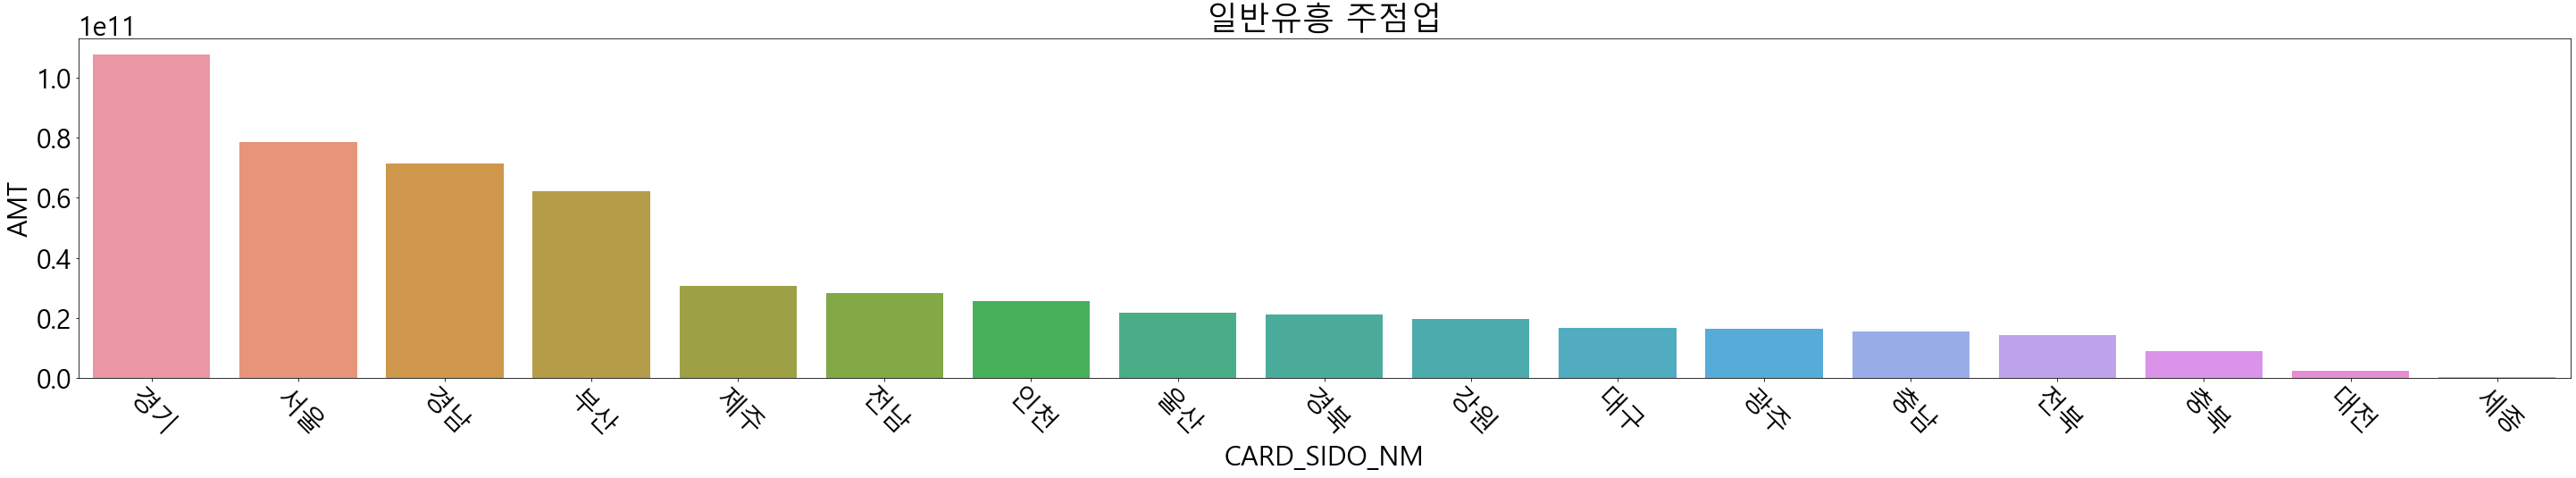

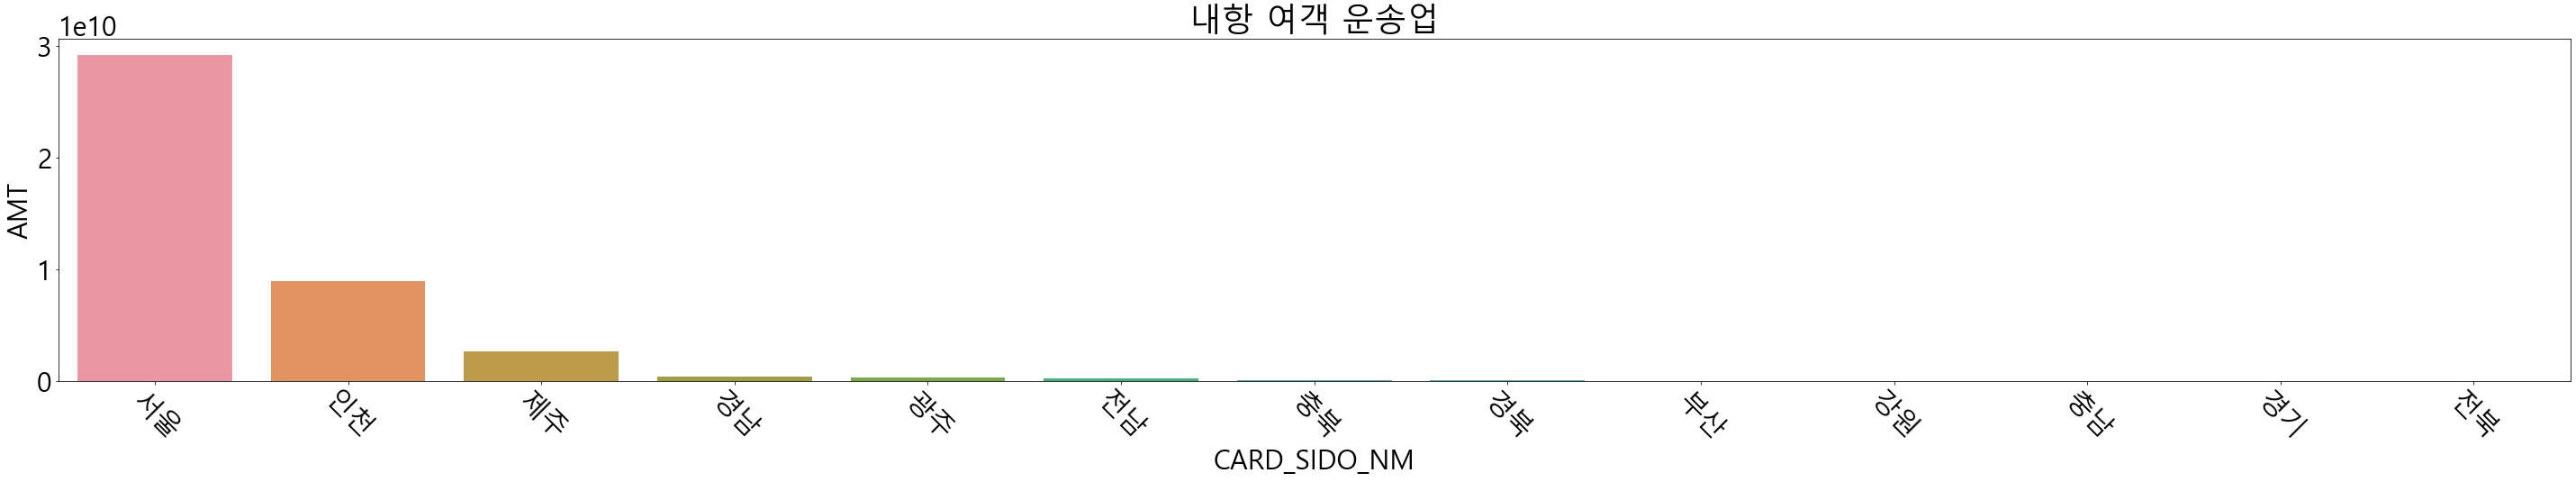

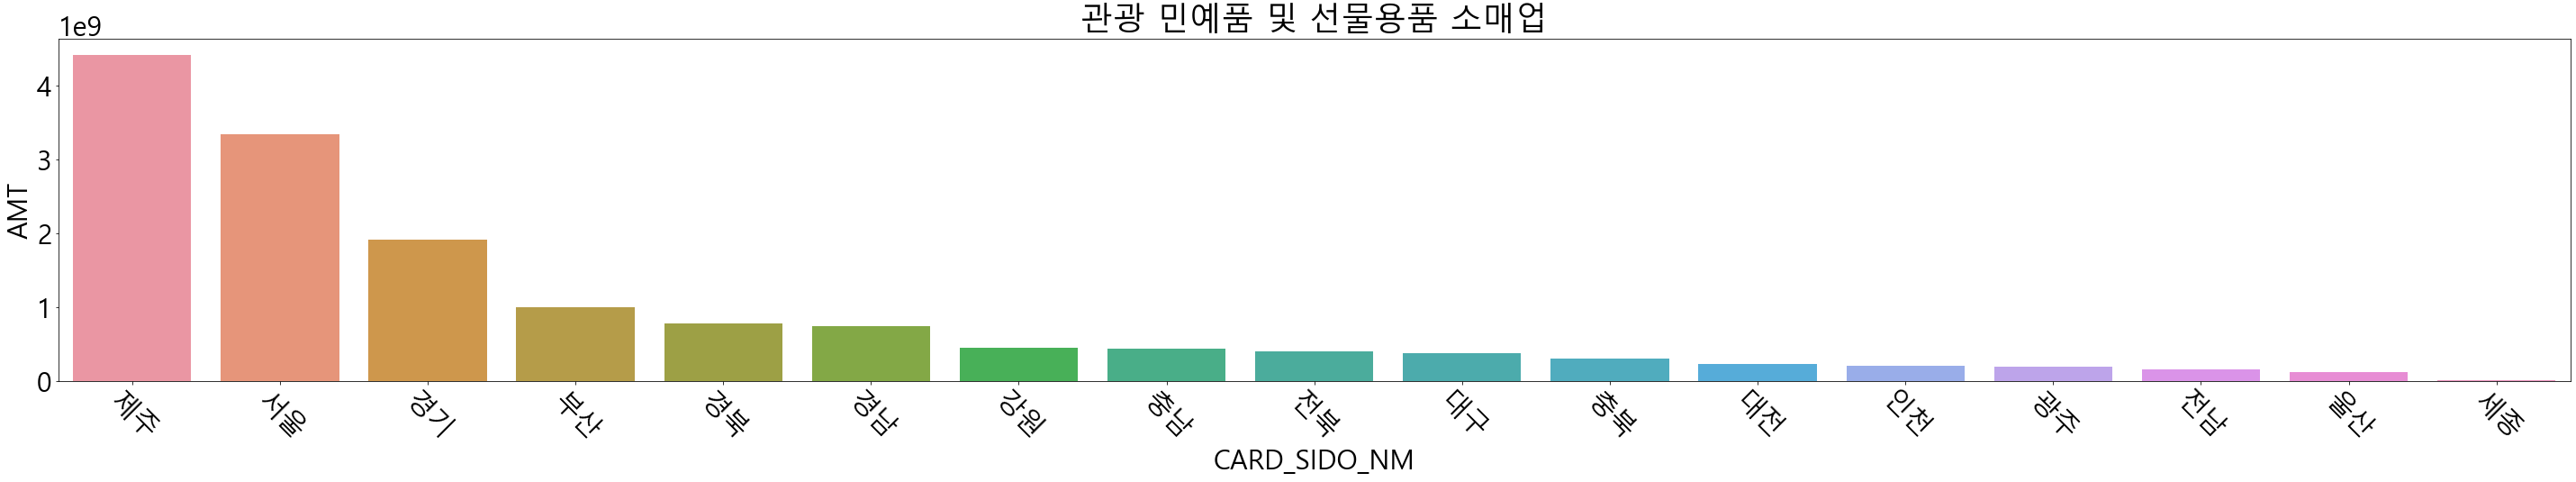

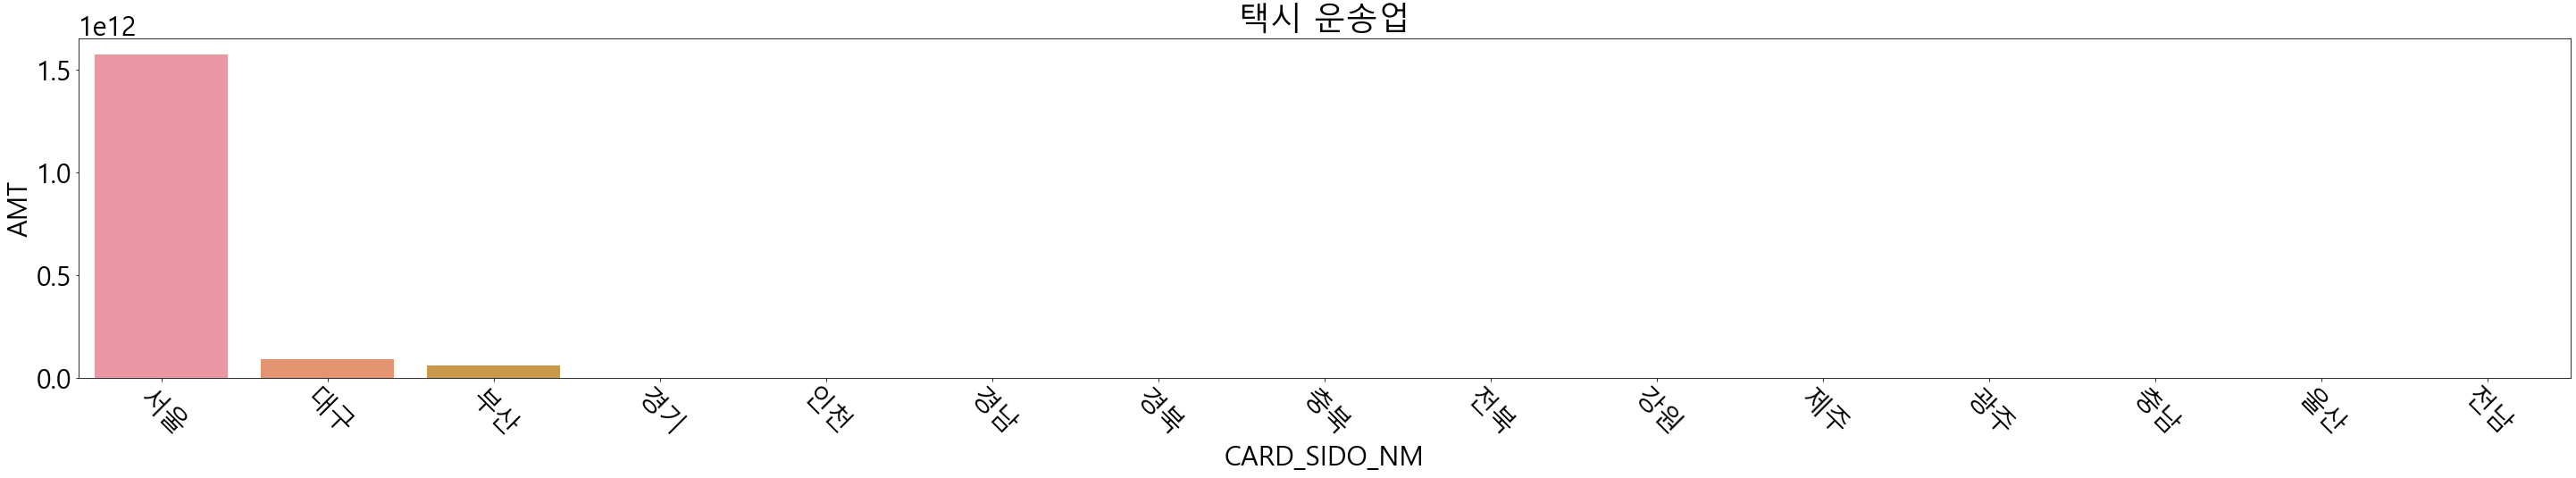

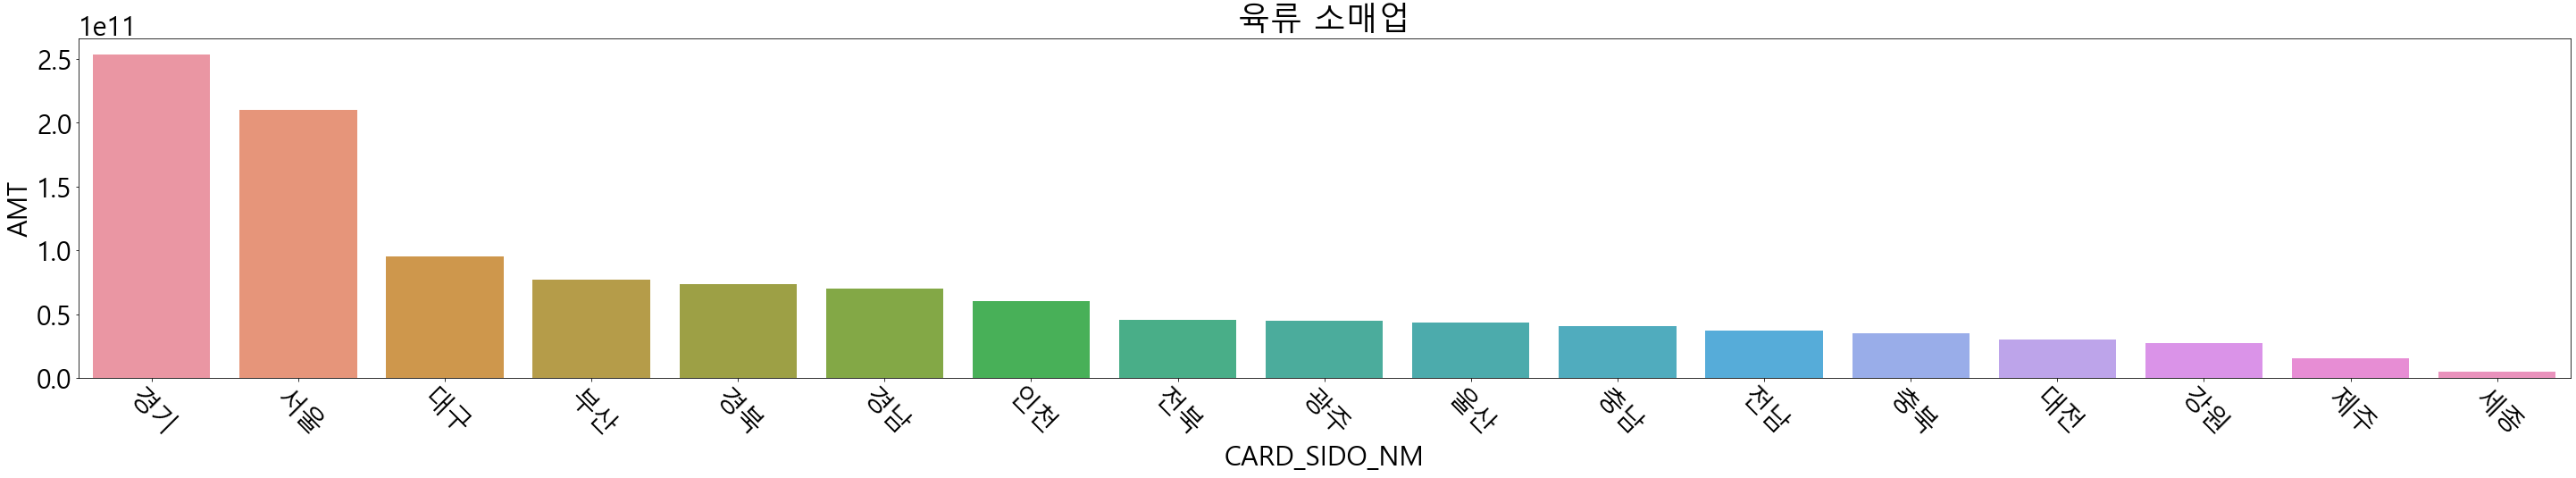

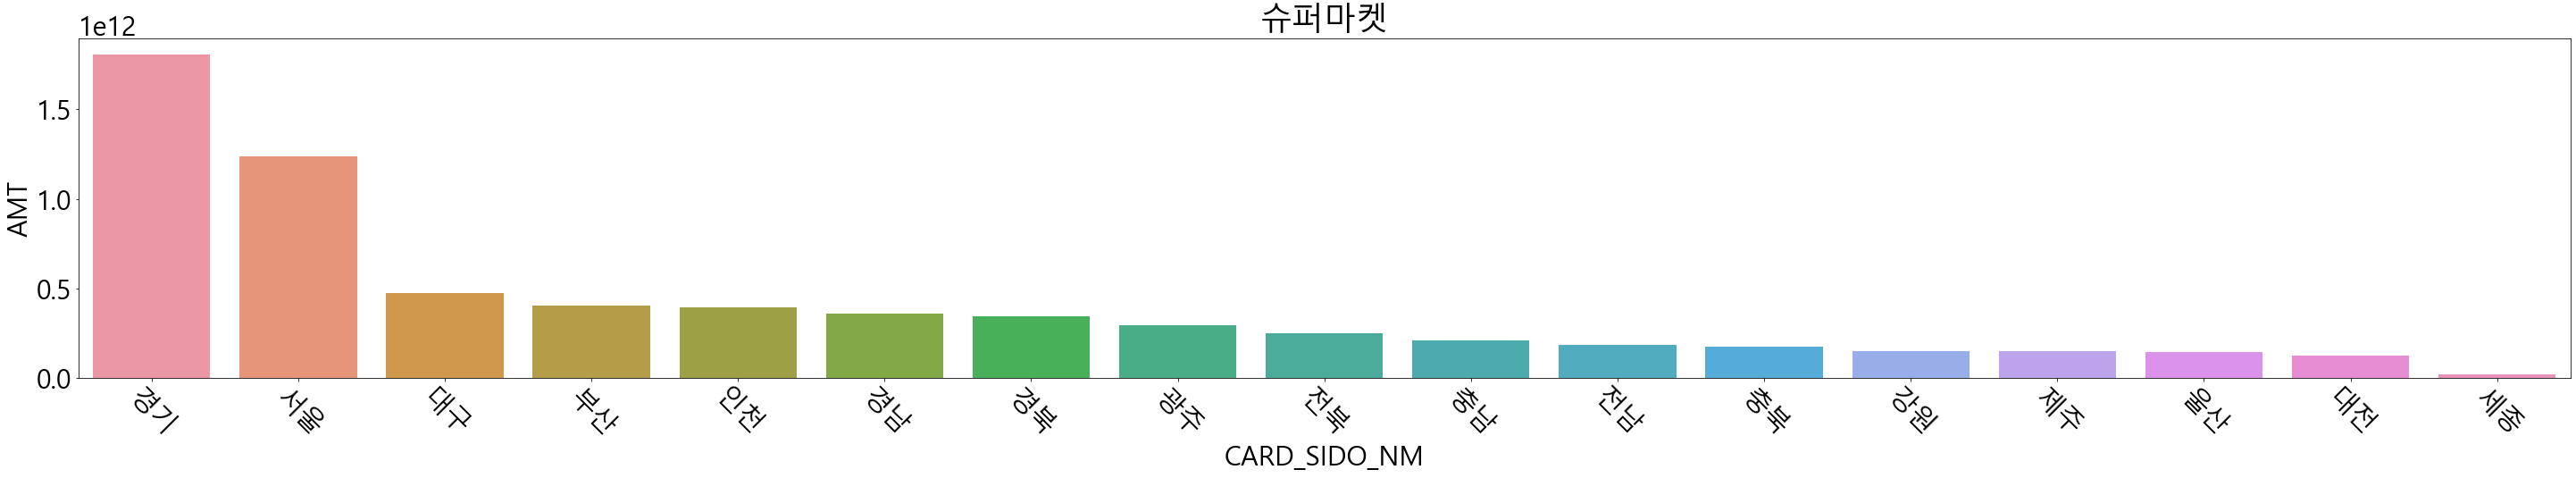

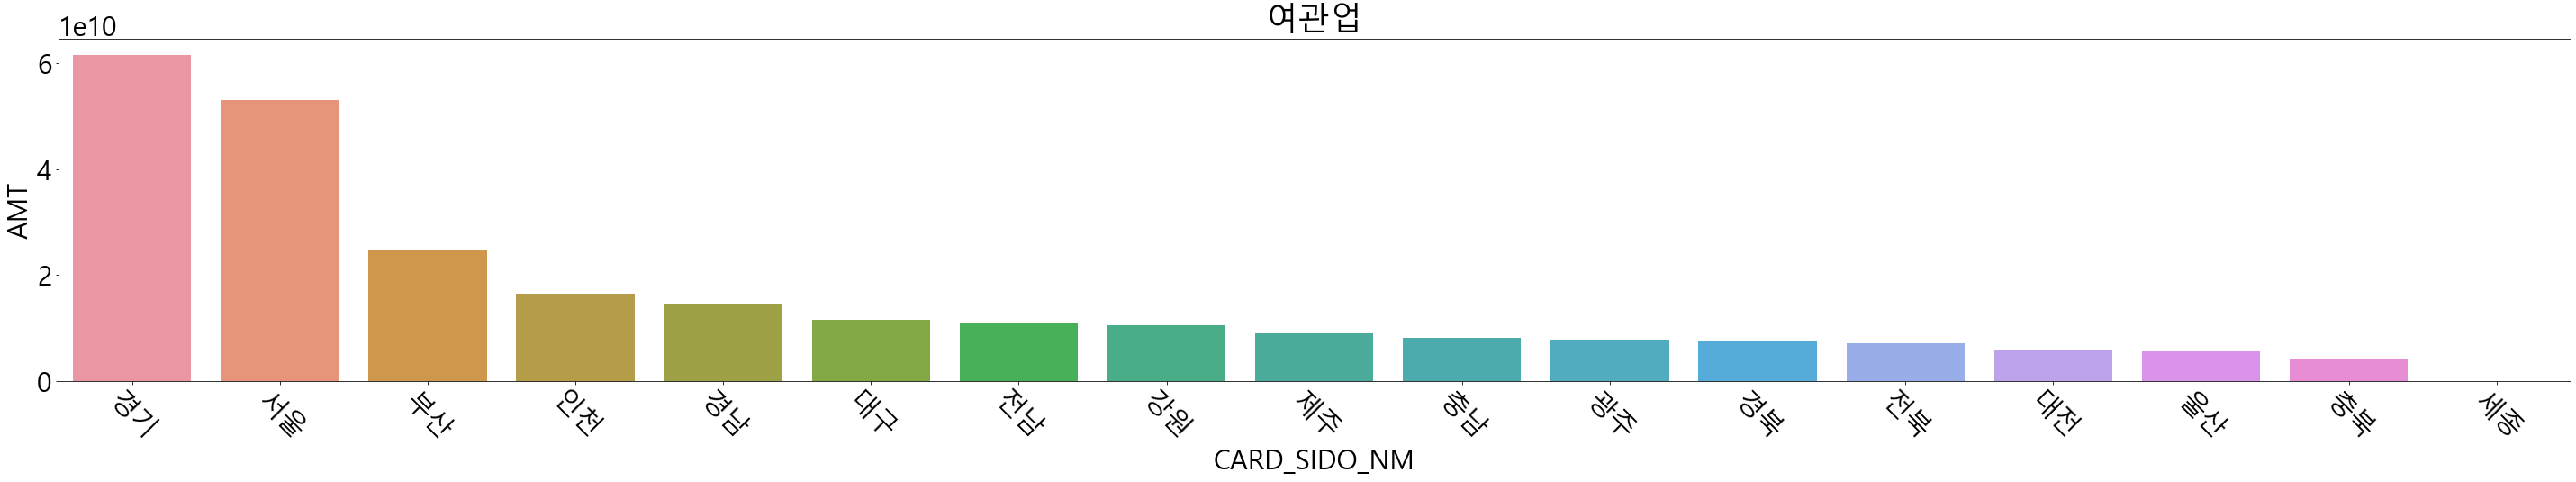

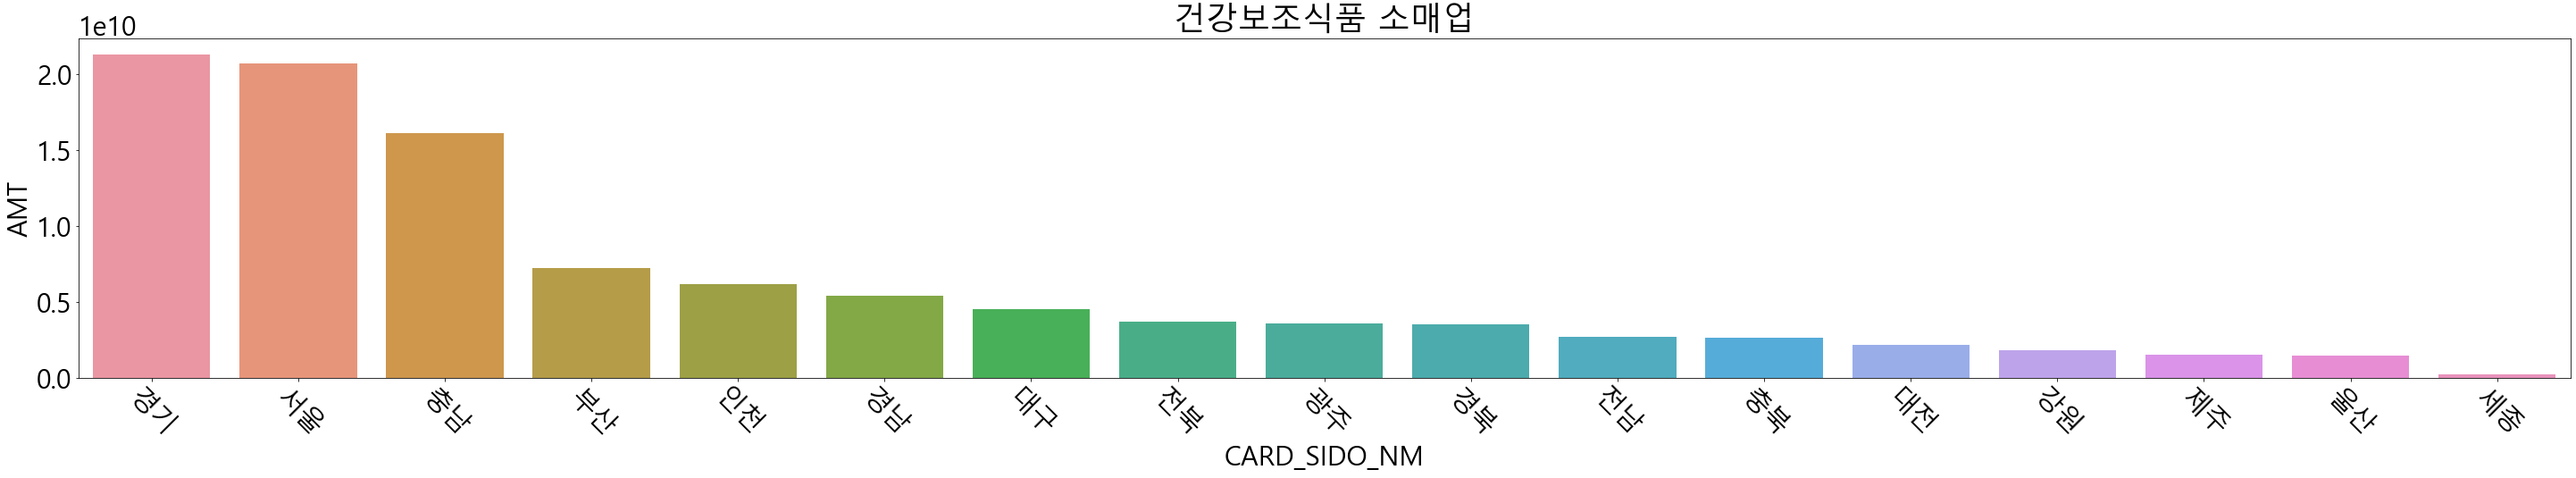

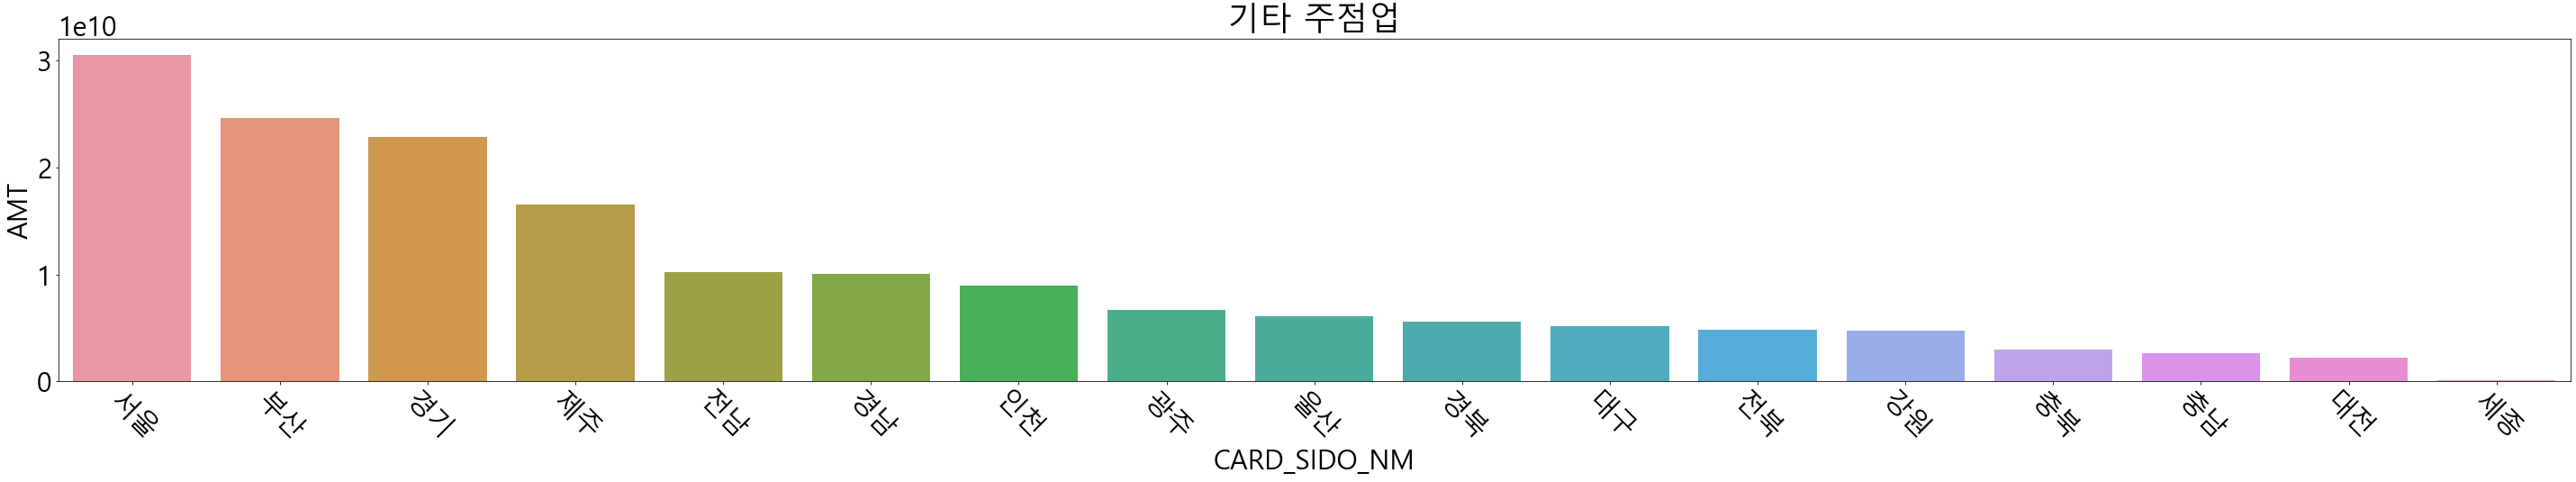

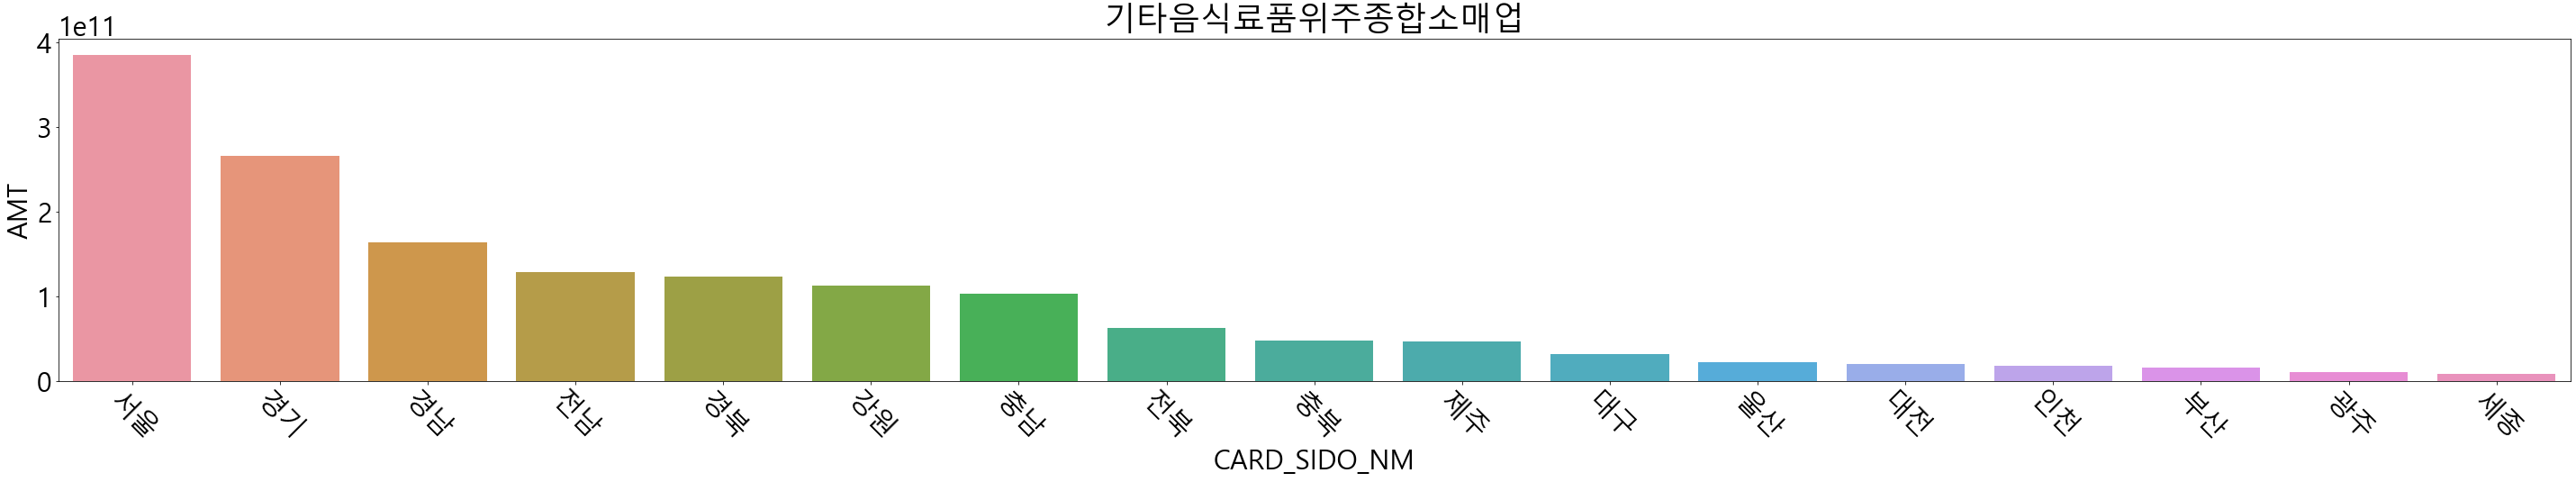

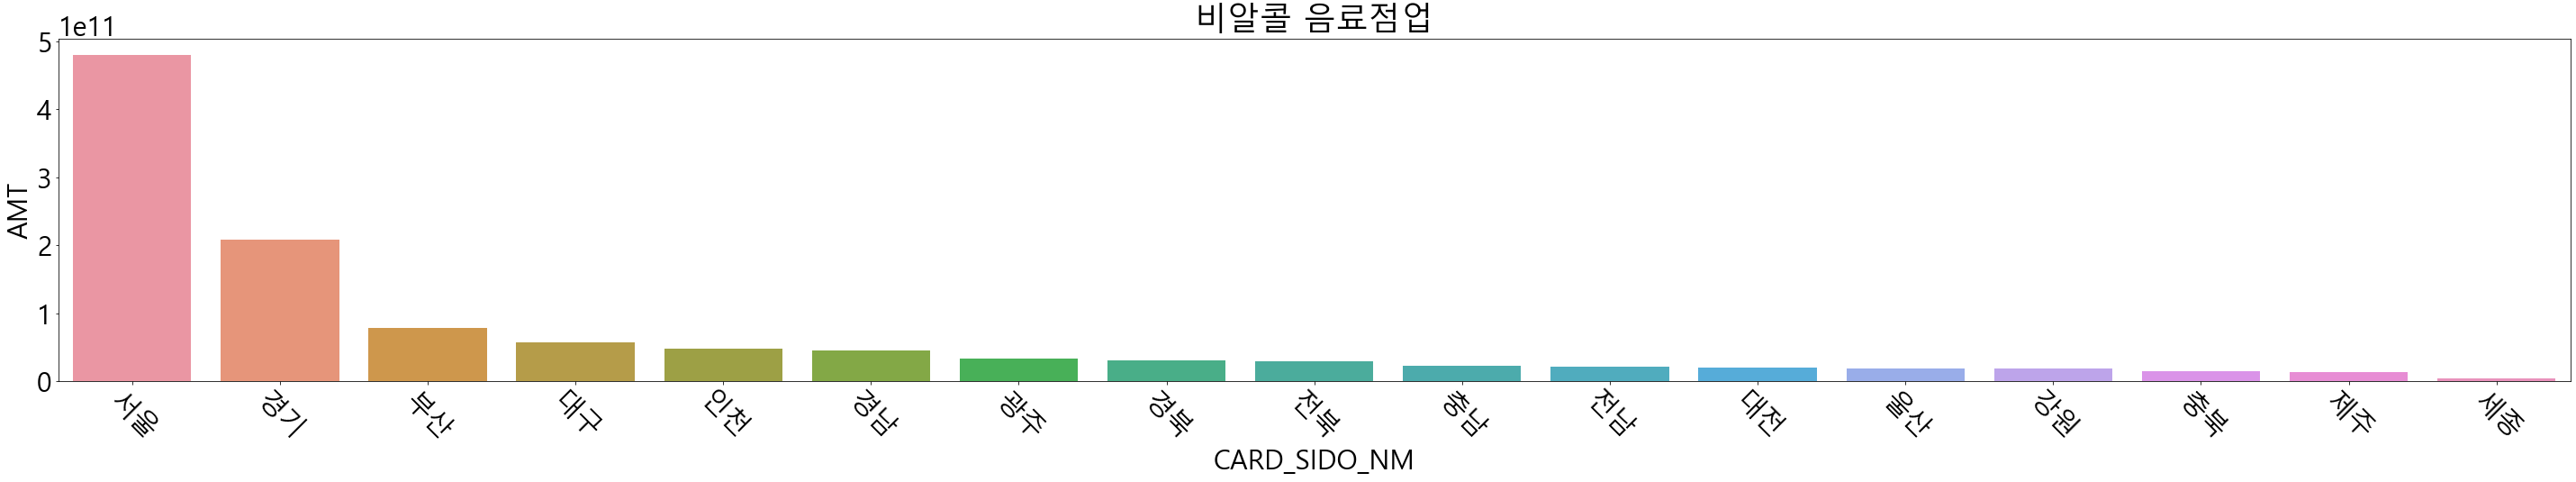

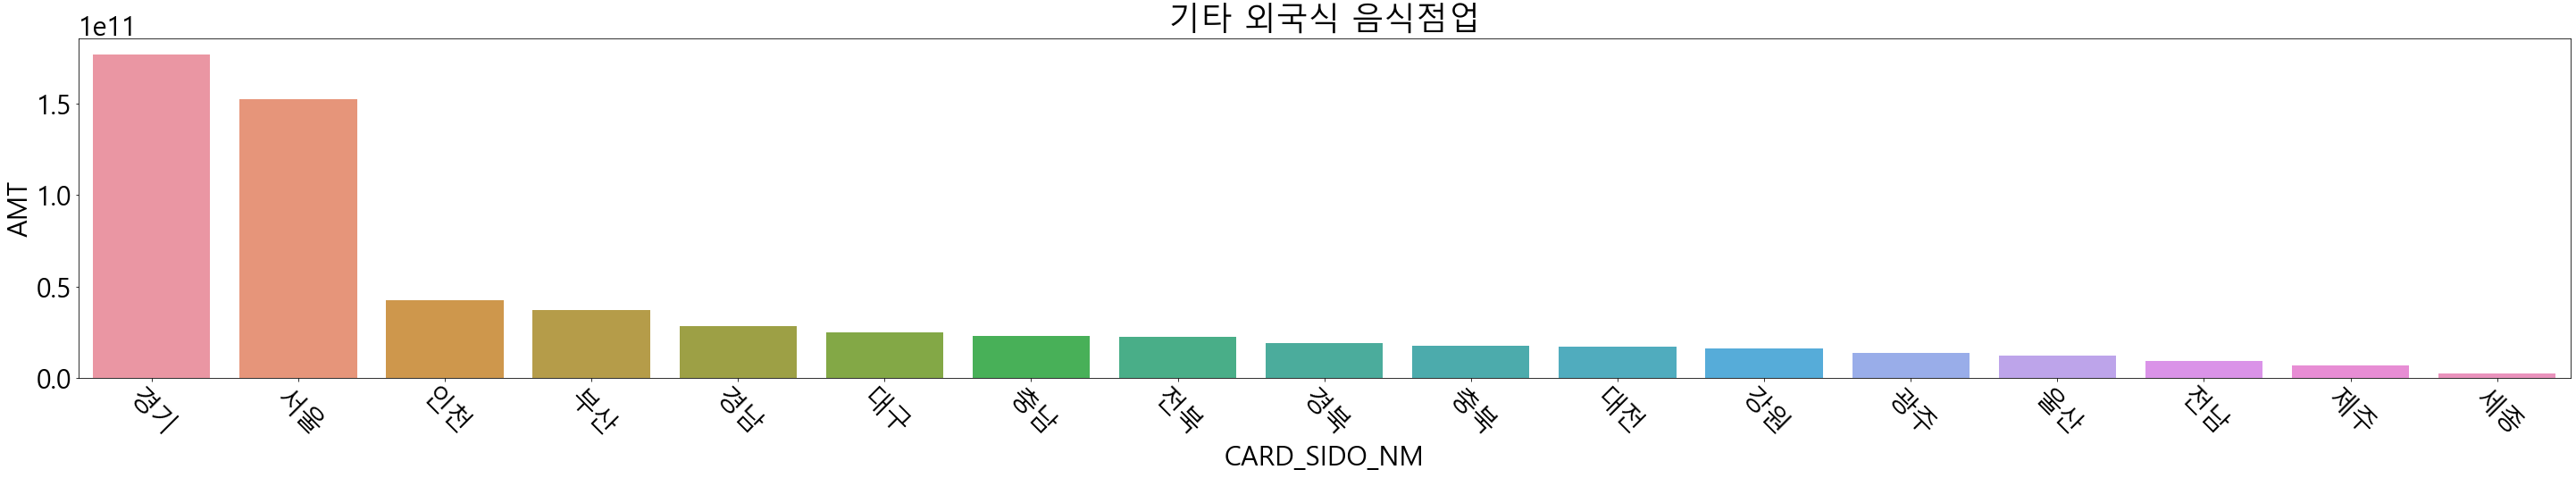

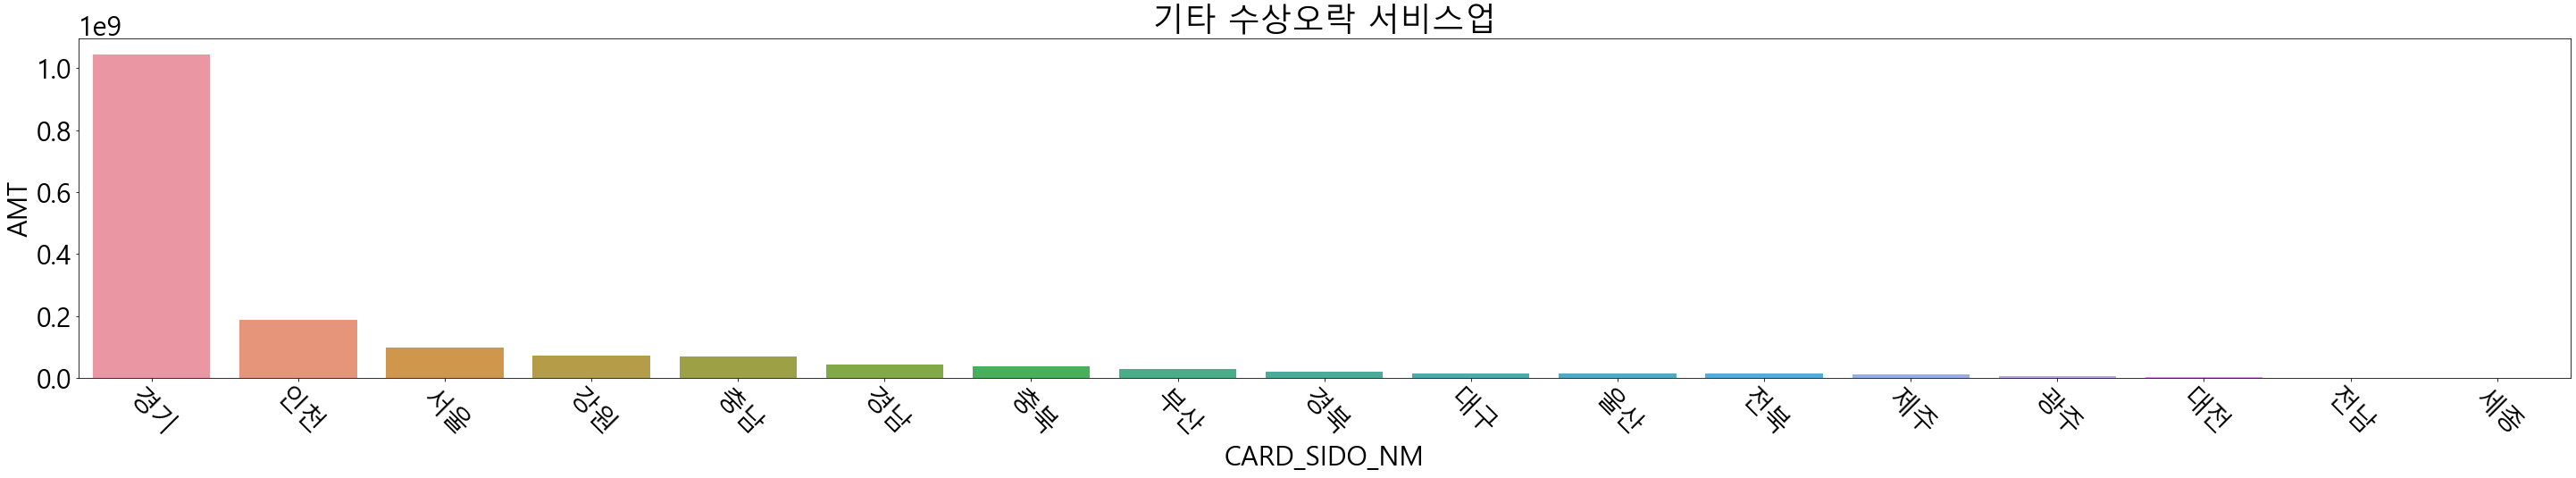

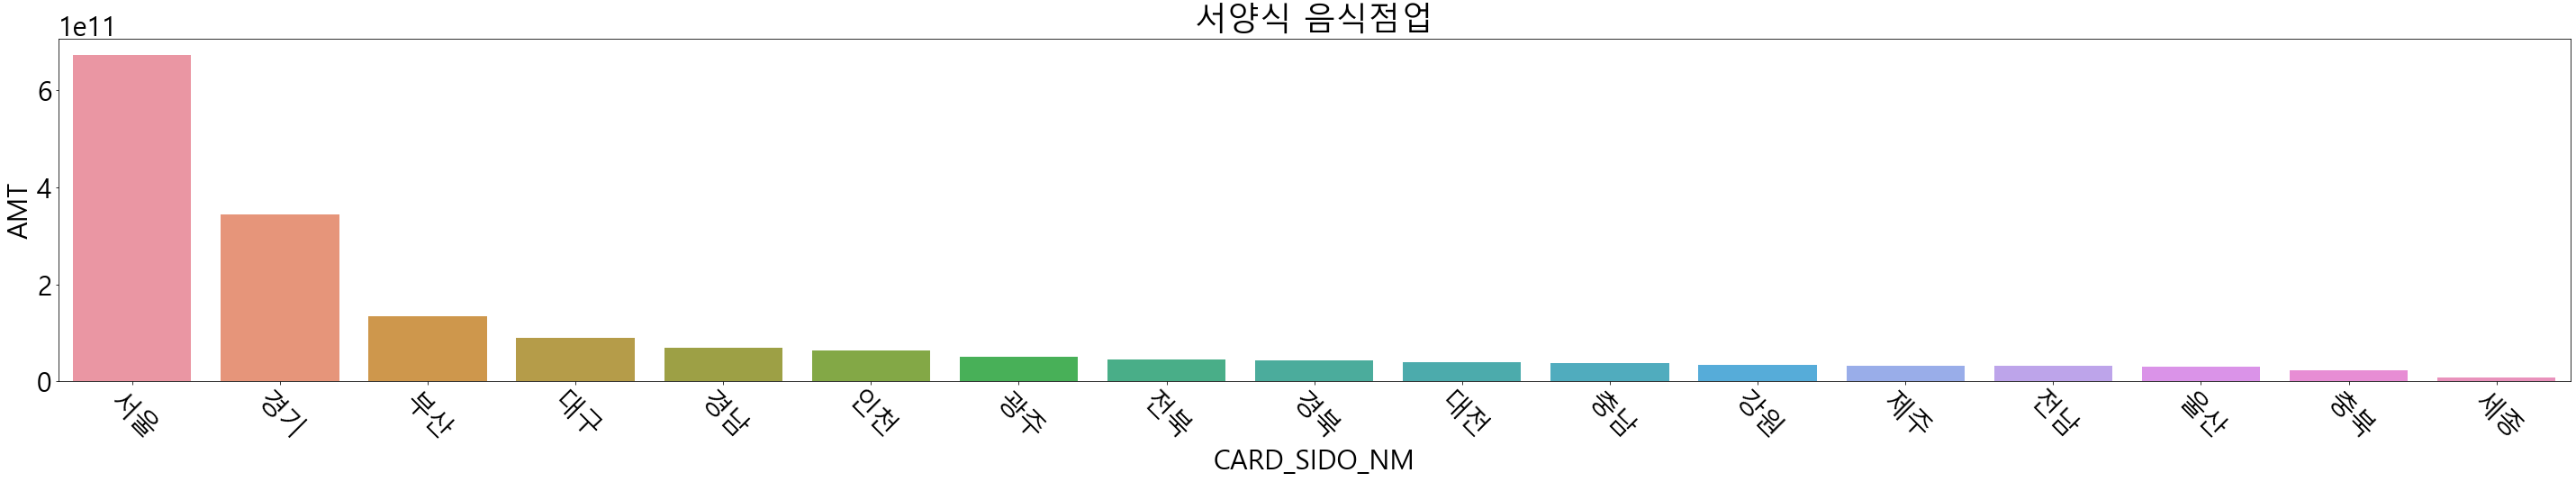

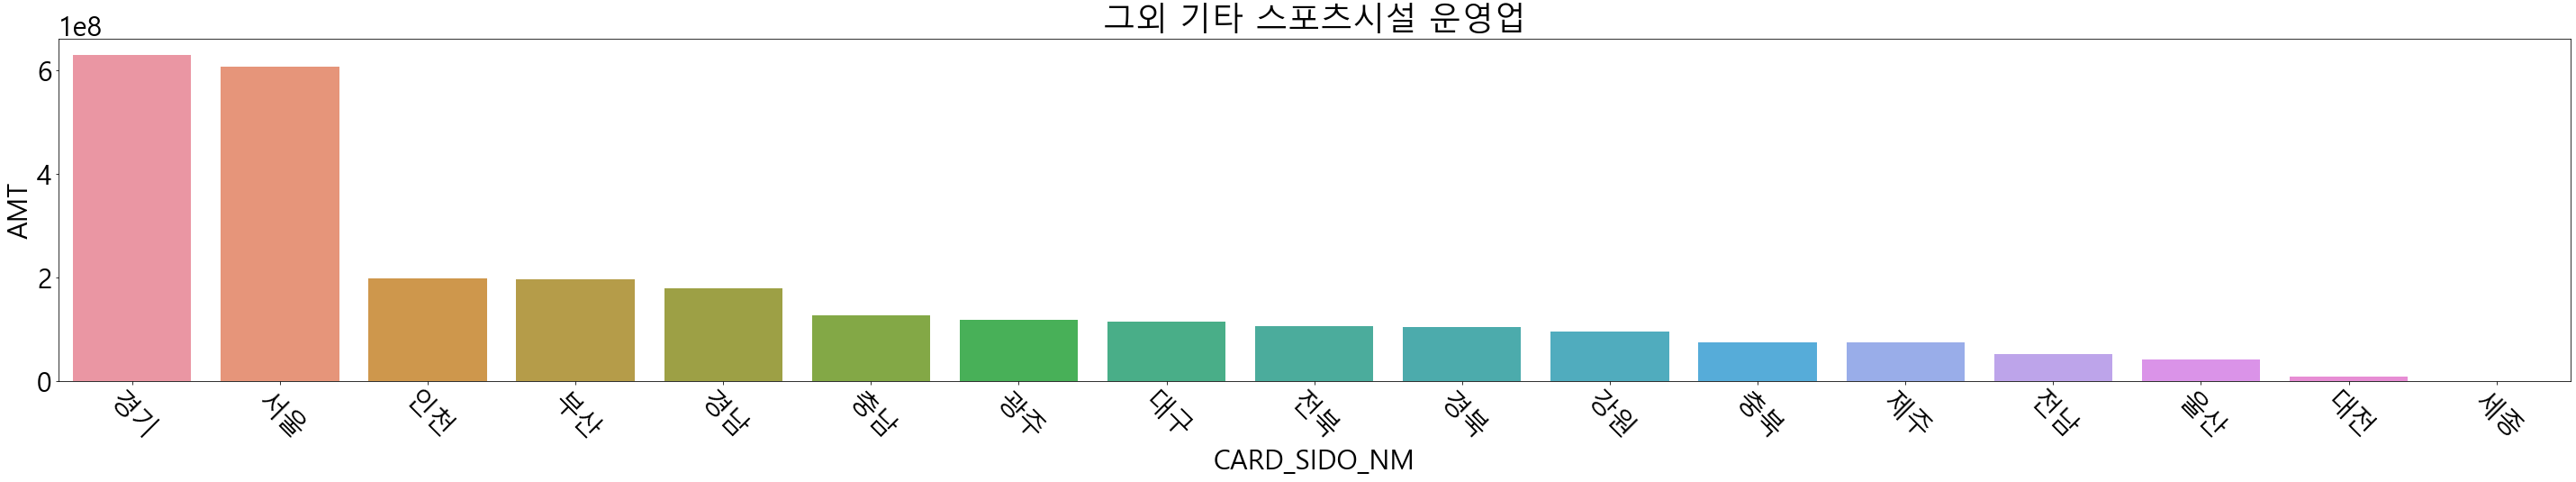

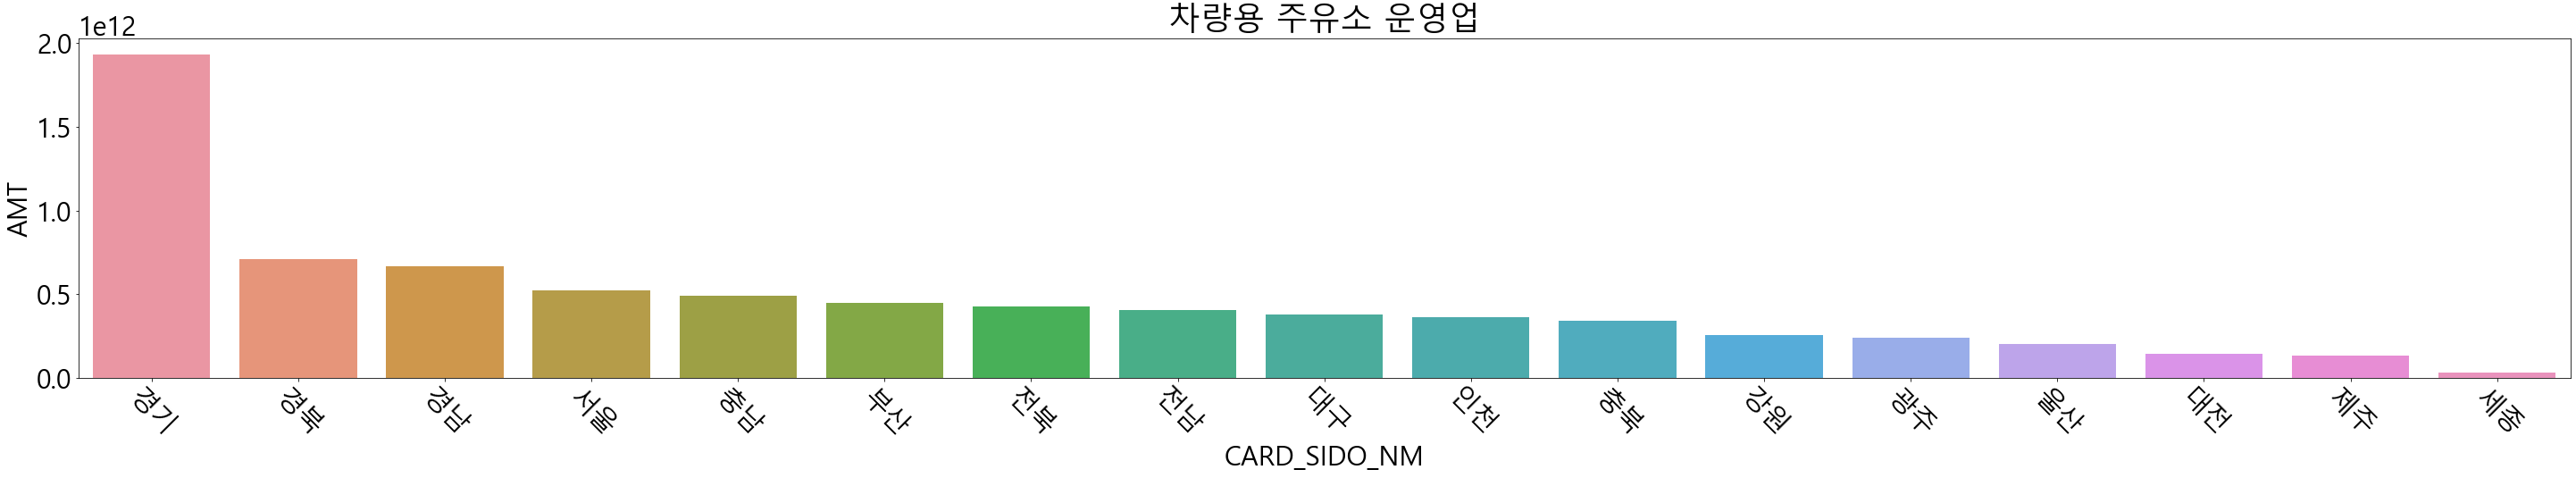

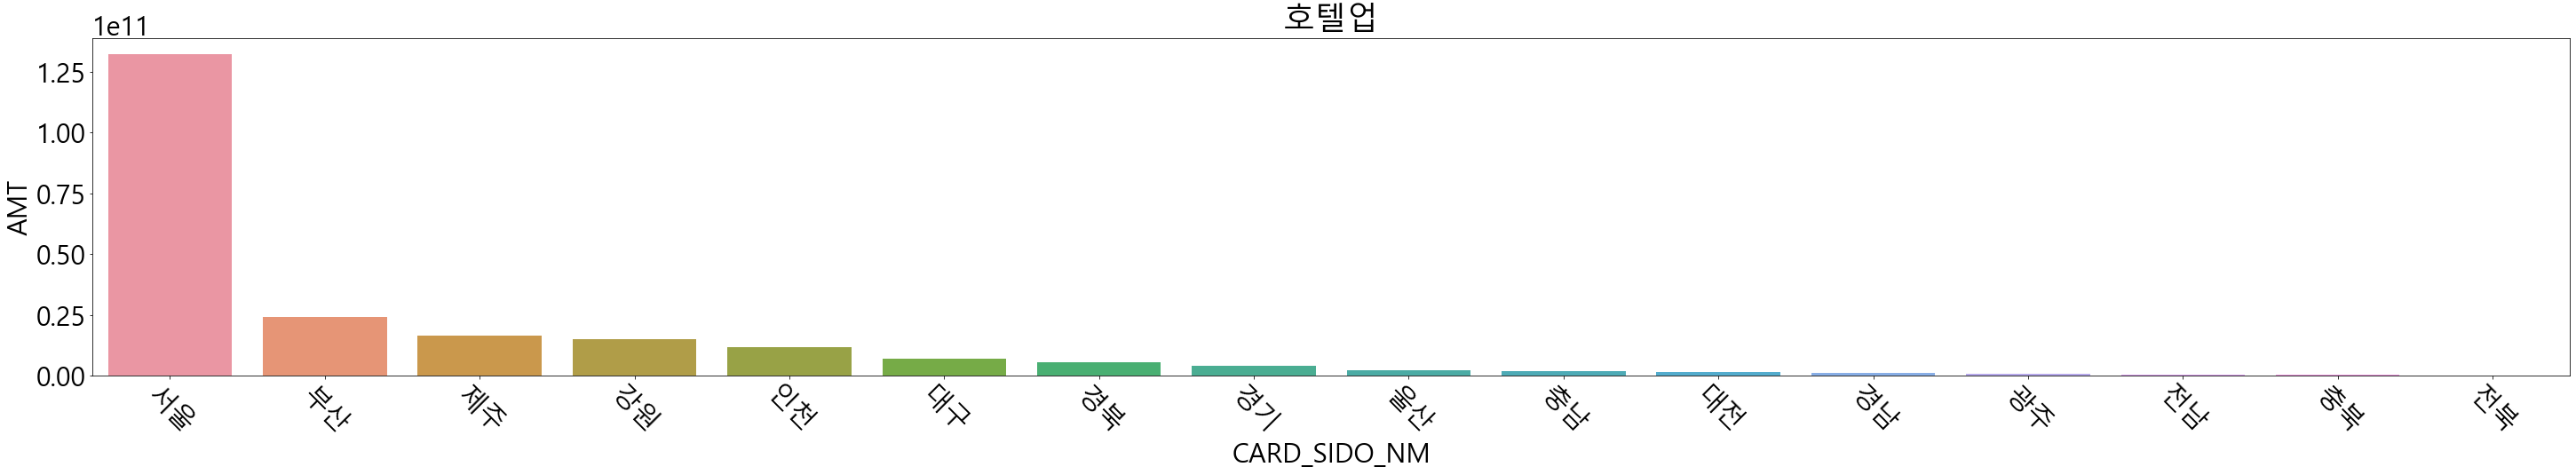

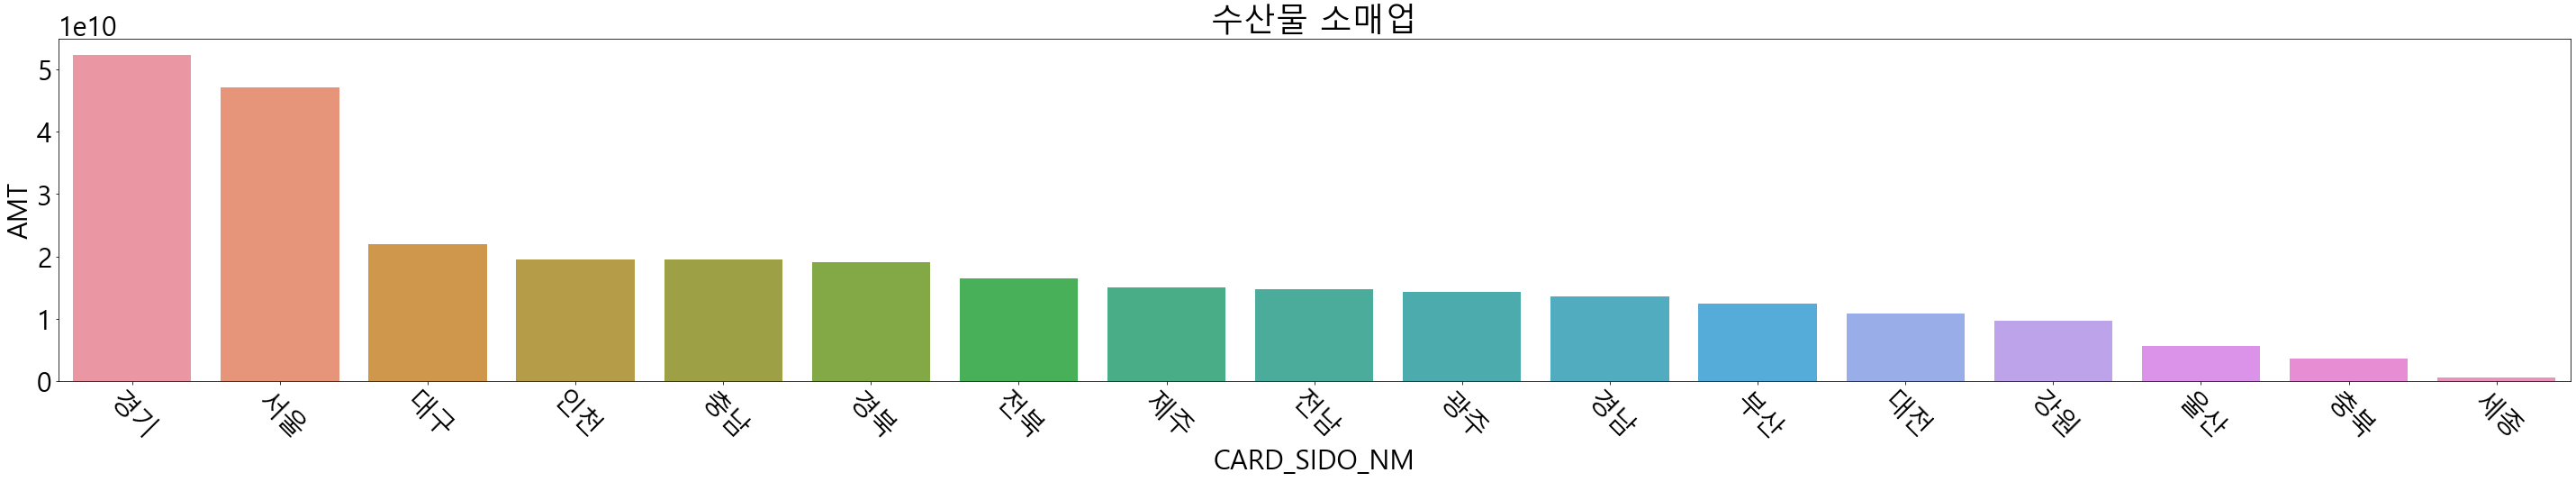

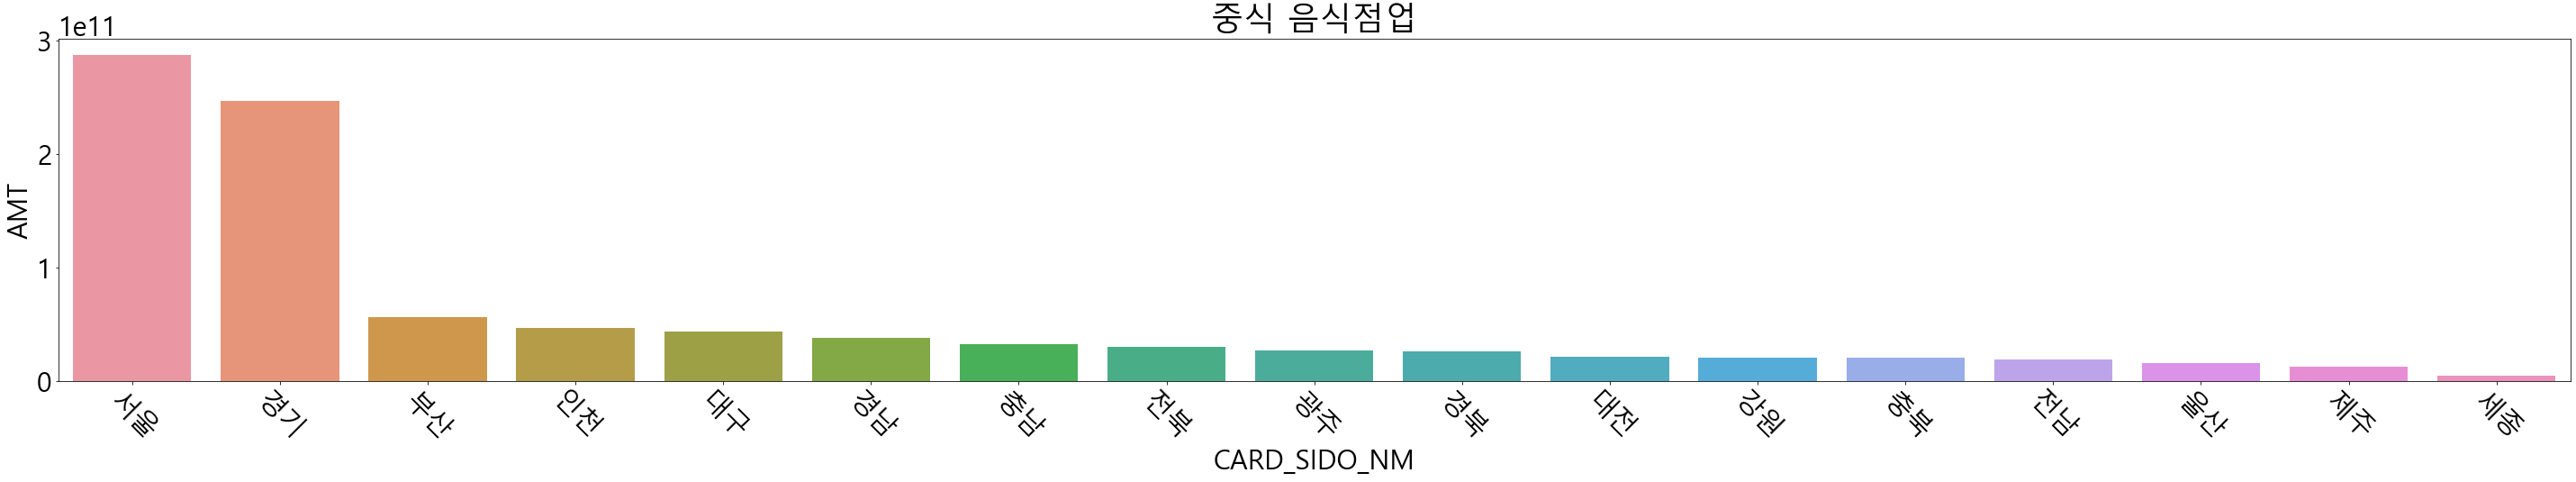

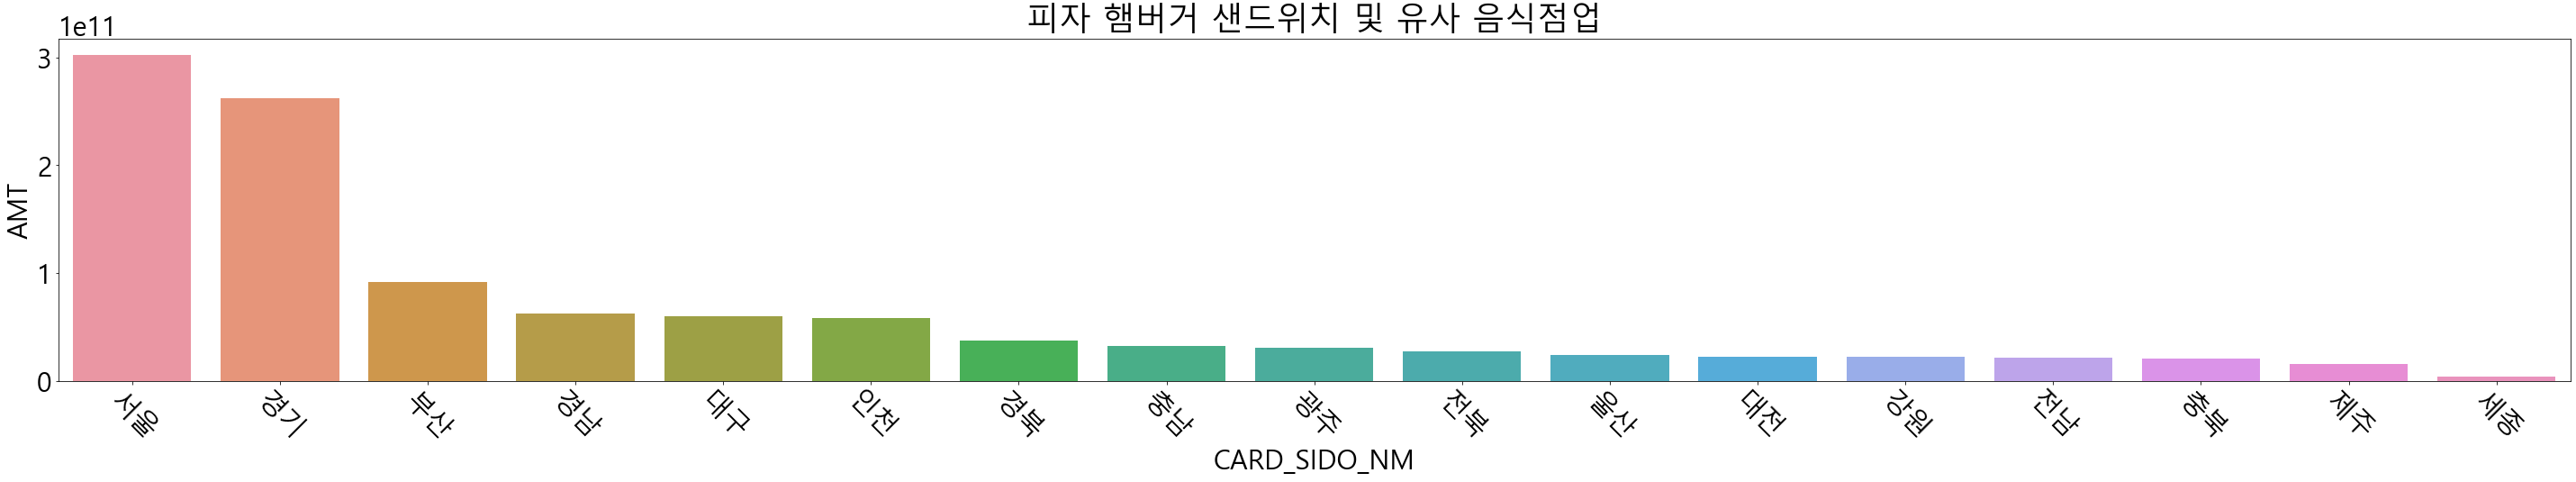

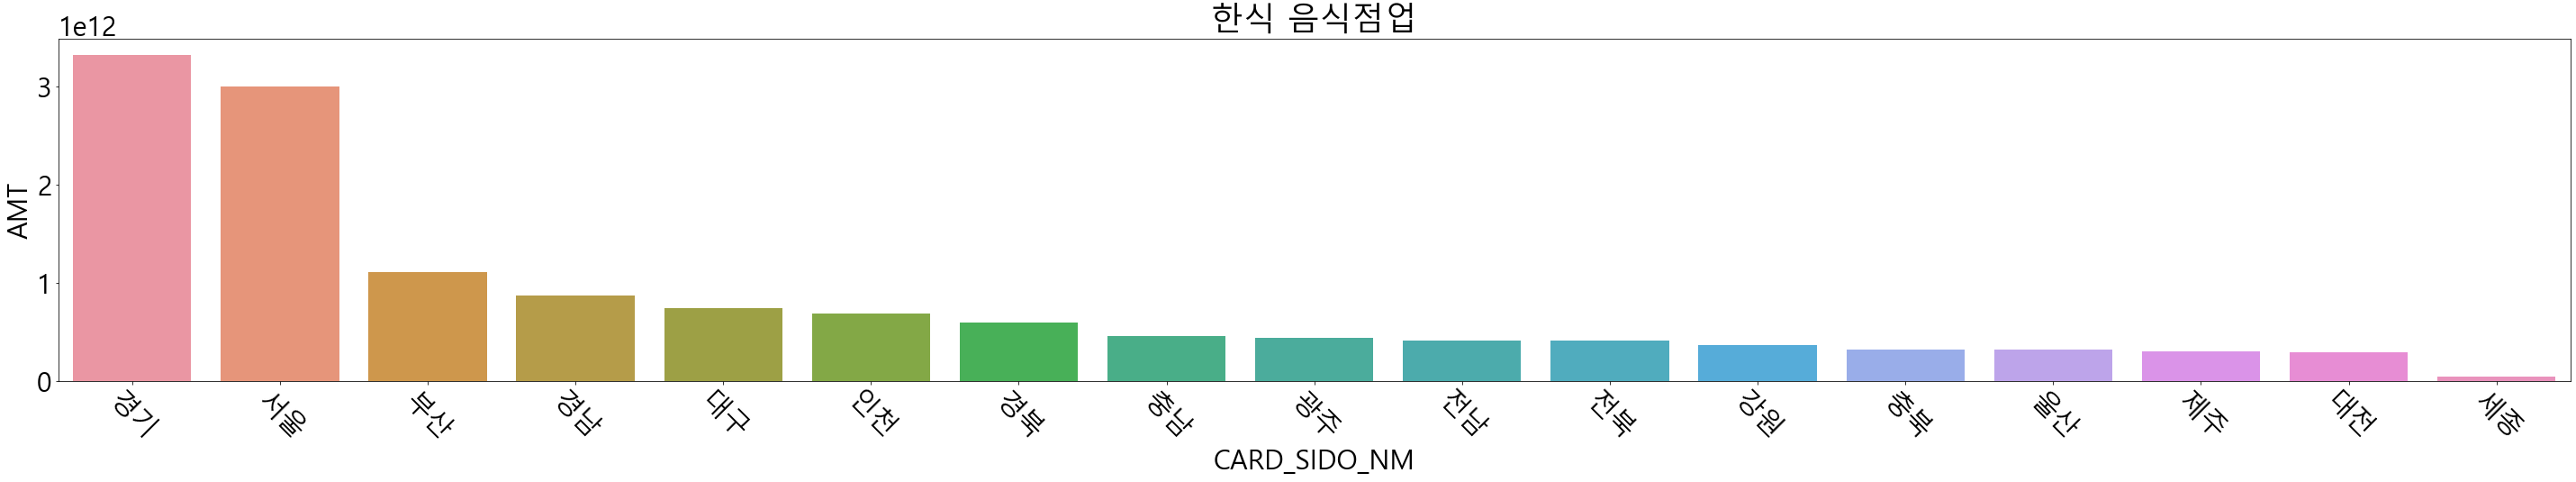

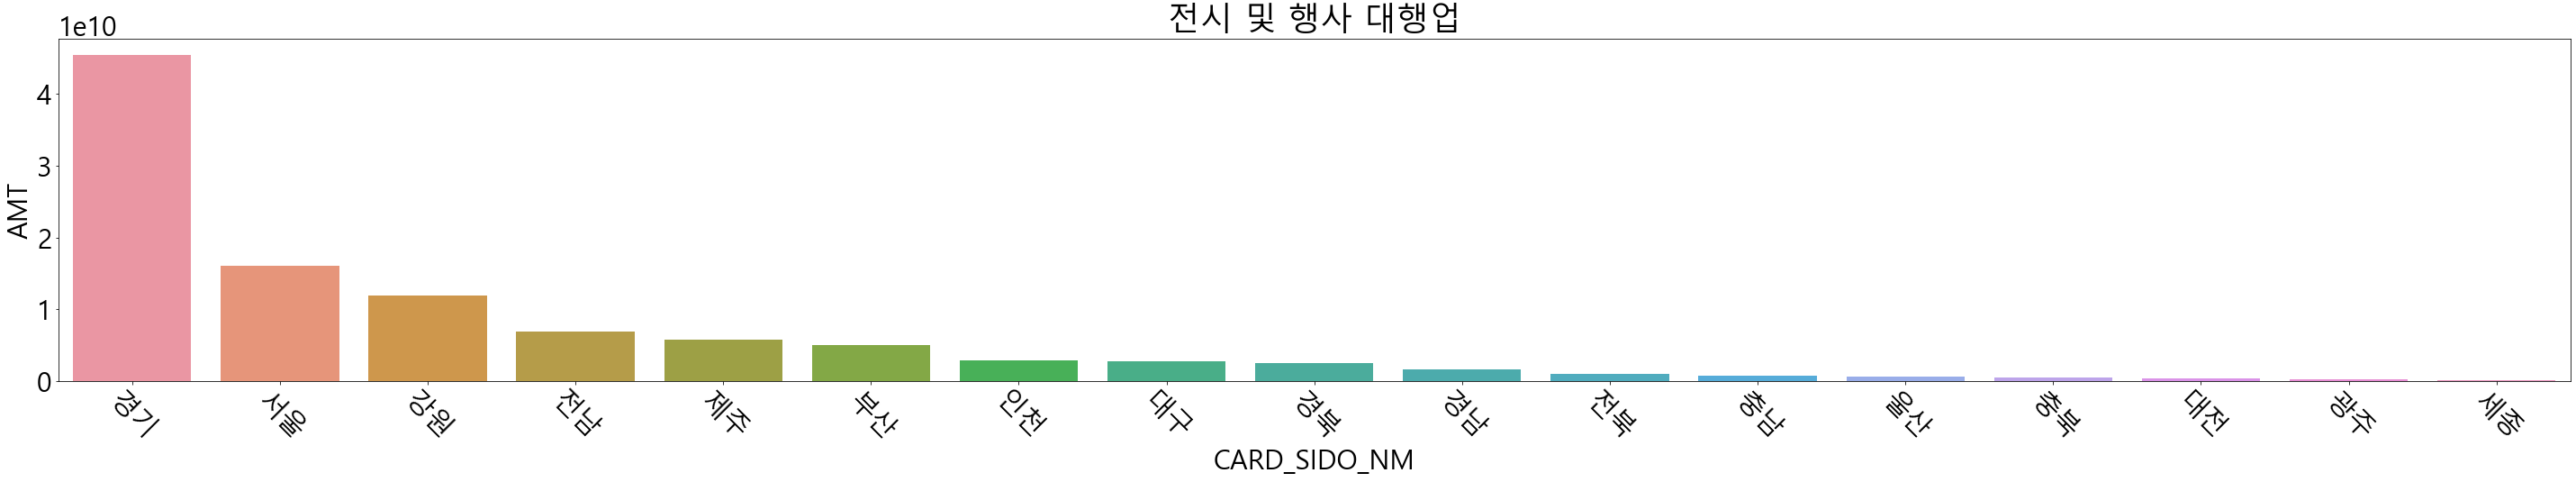

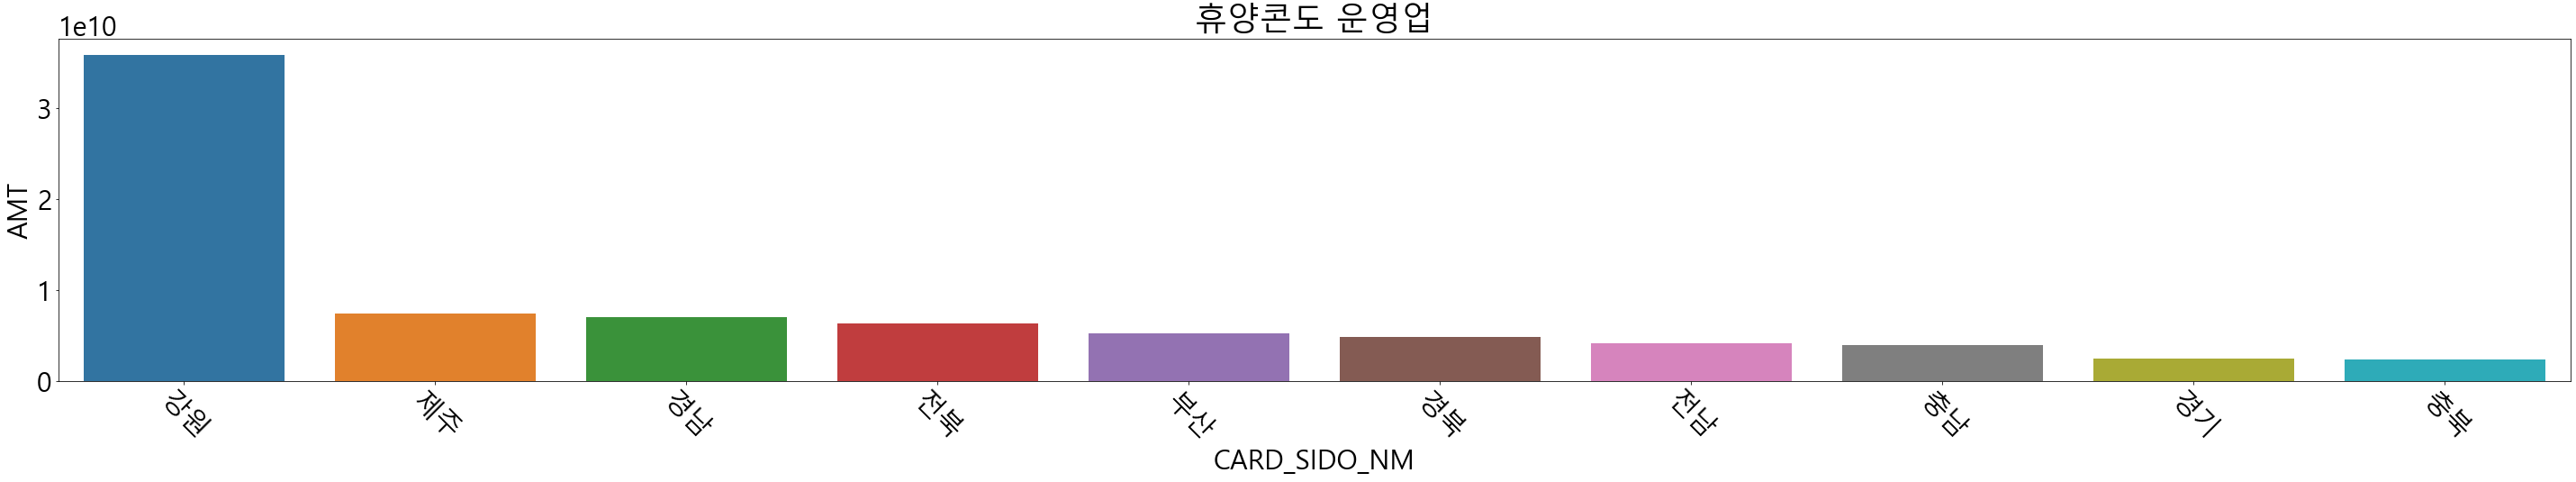

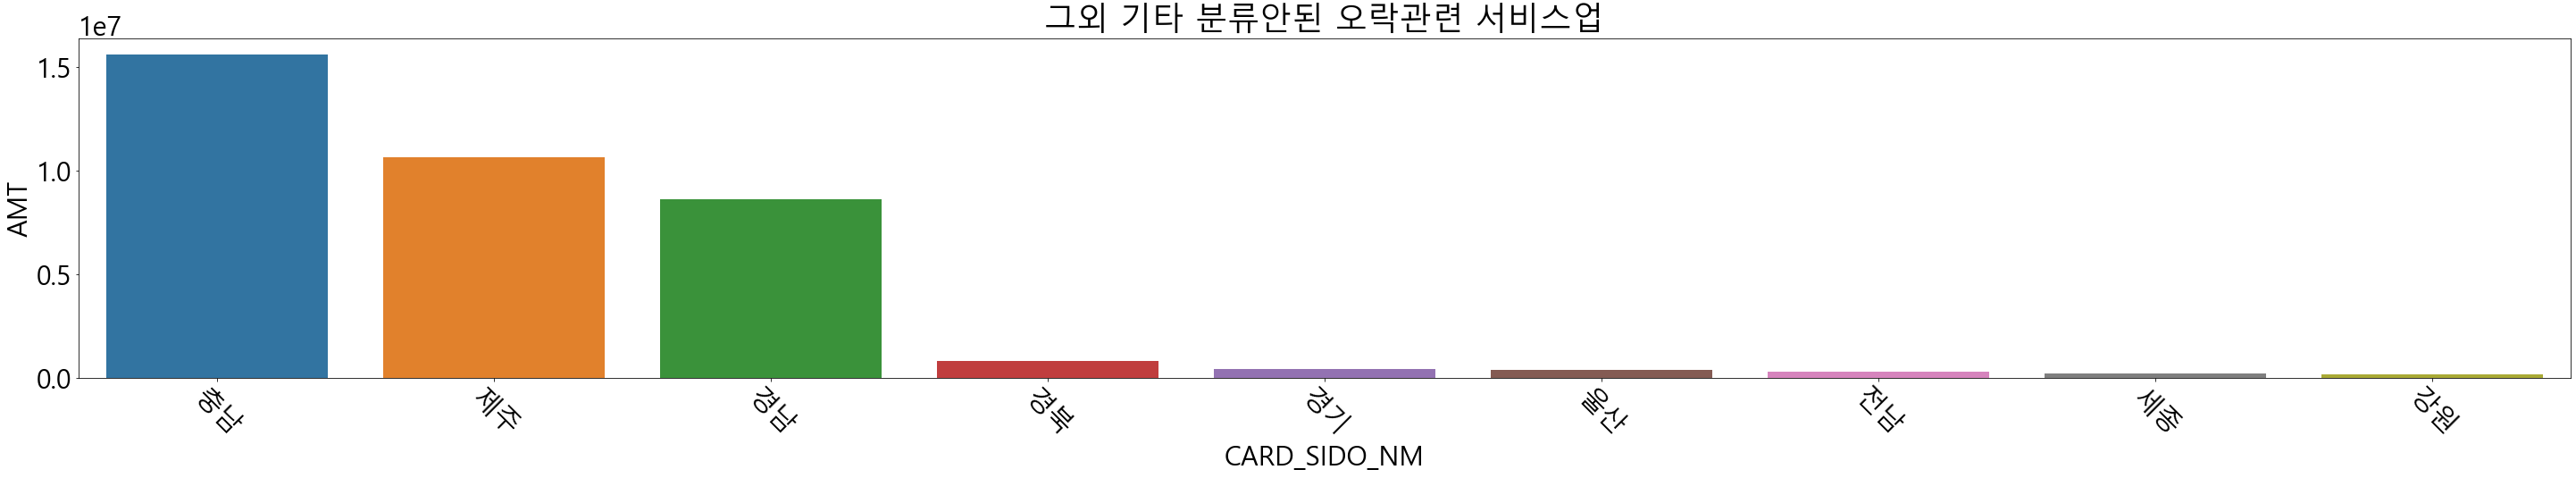

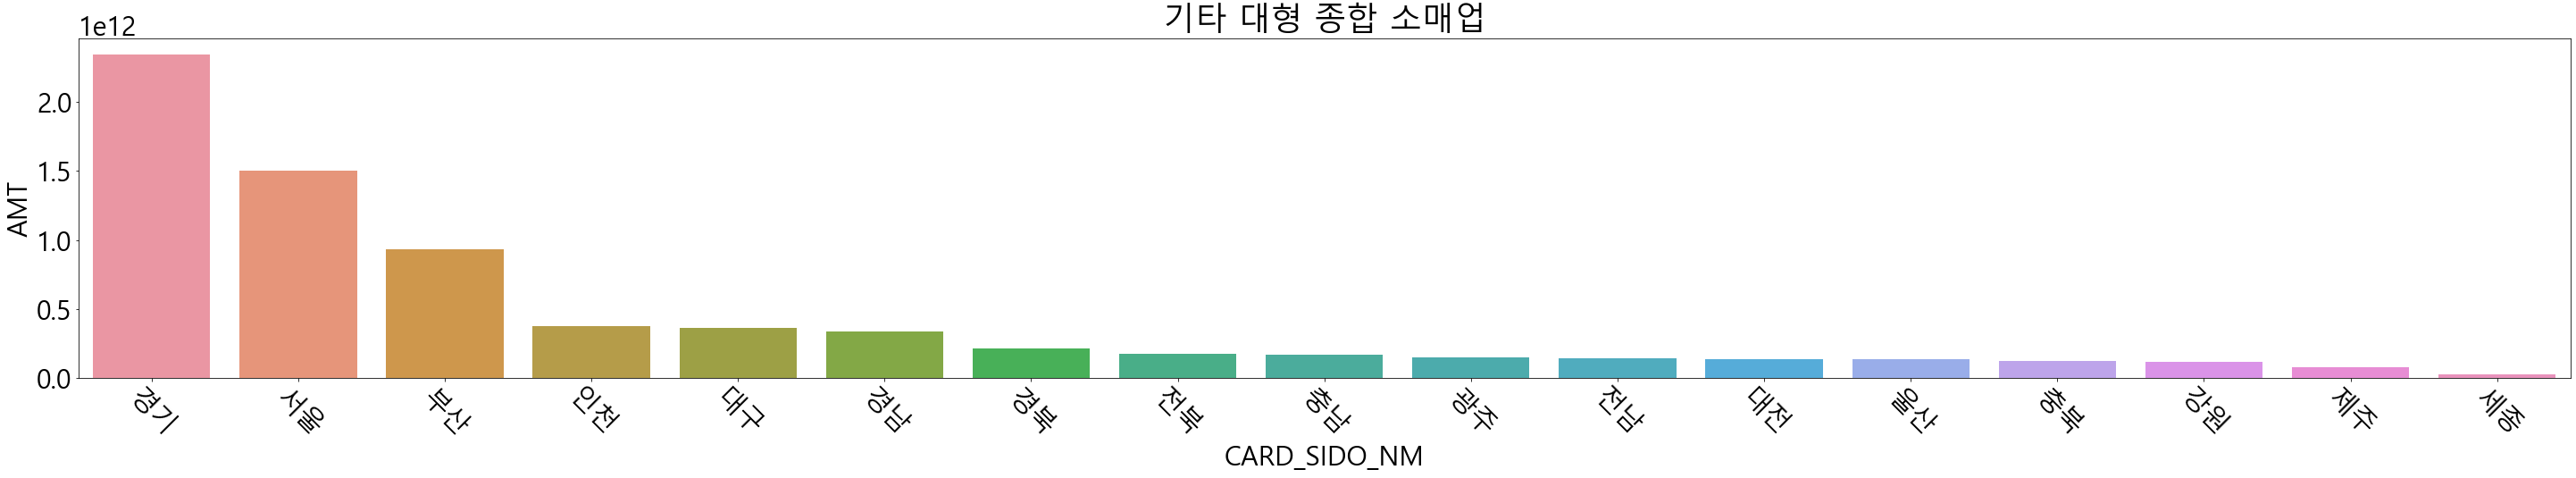

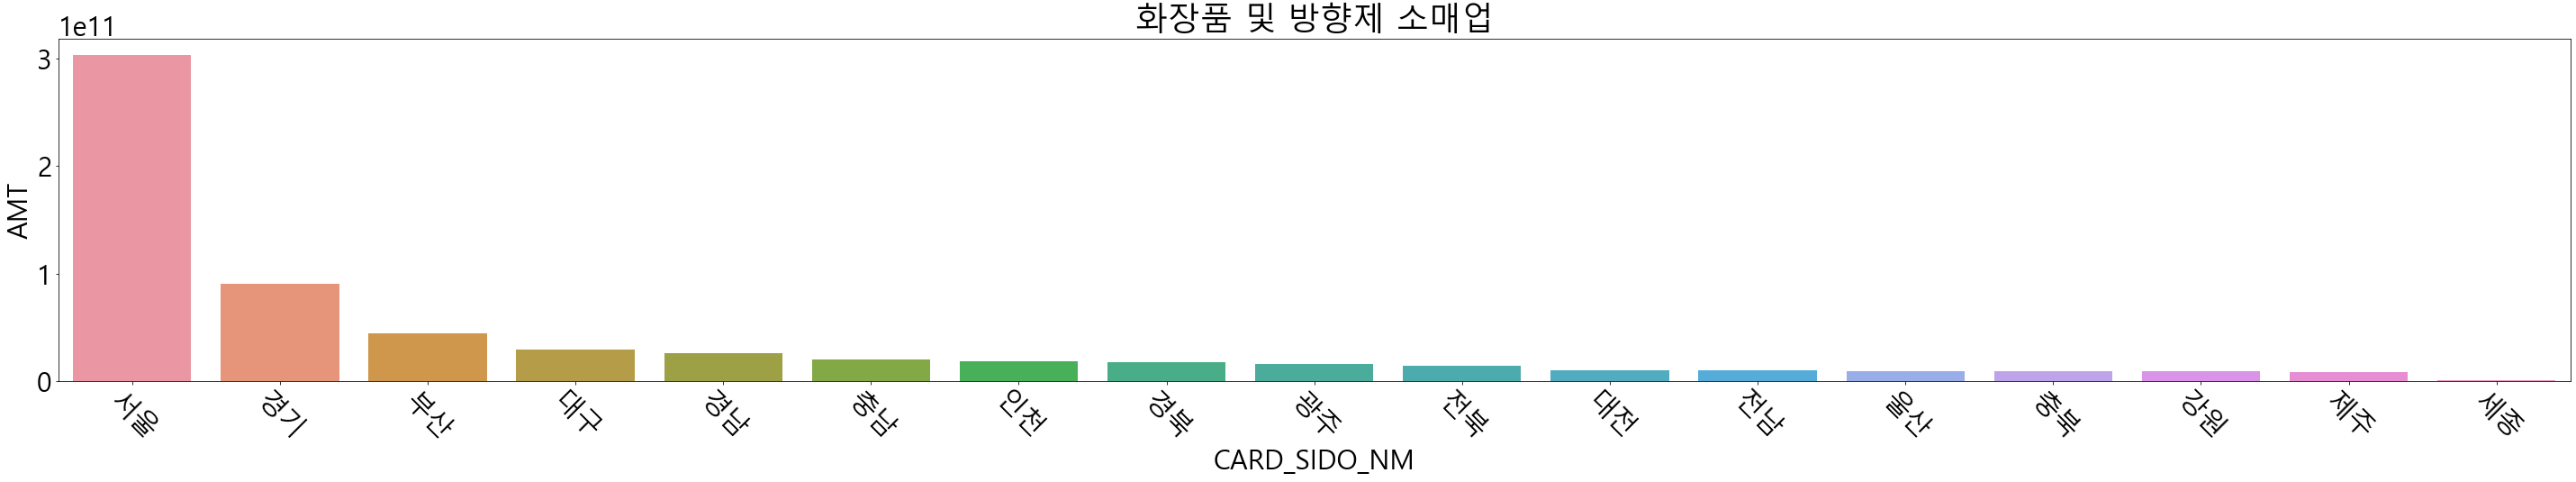

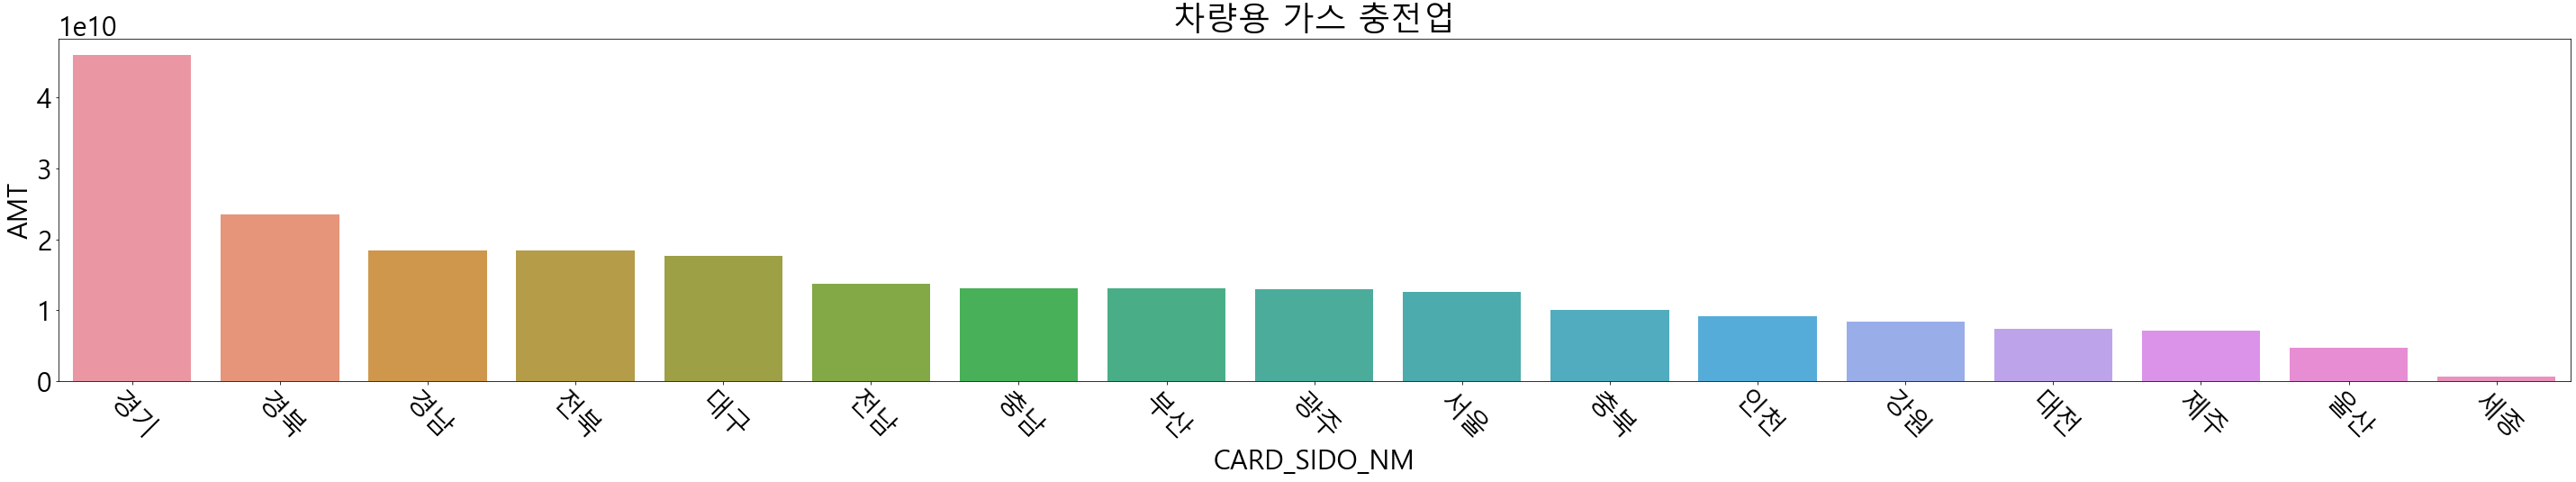

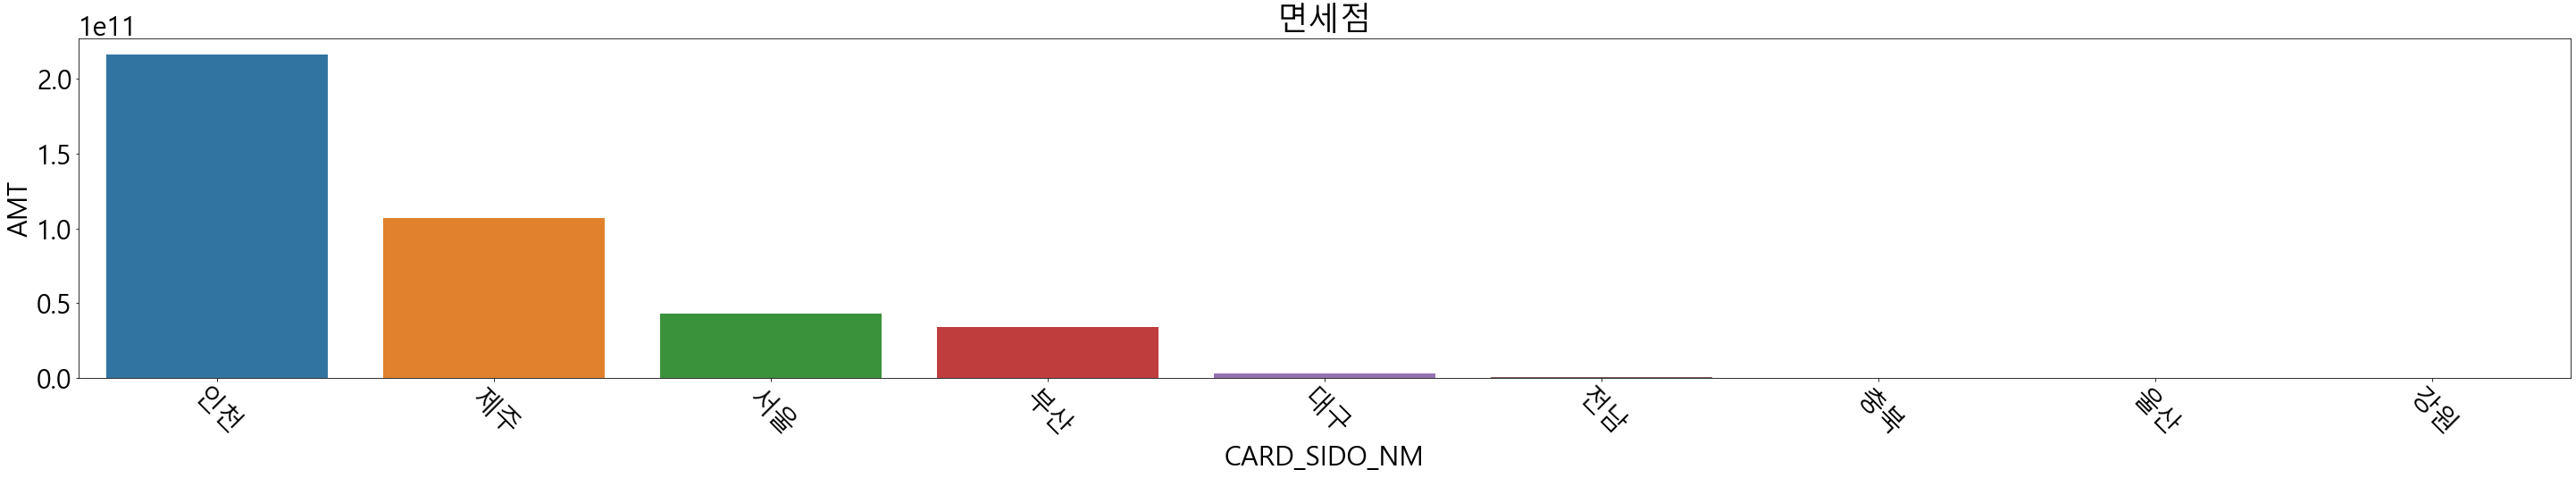

In [26]:
a = 0
for i in clss:
    data = clss_sido_amt_sum.loc[clss[a]].sort_values(by = 'AMT', ascending = False)
    plt.figure(figsize = (50,7))
    plt.rcParams.update({'font.size': 30})
    plt.xticks(rotation = - 45 )
    b = sns.barplot(data= data, x= data.index, y= 'AMT')
    plt.title(i)
    a+=1

In [14]:
clss_sido_amt_mean = train.groupby(['STD_CLSS_NM','CARD_SIDO_NM'])['AMT'].mean()
clss_sido_amt_mean = pd.DataFrame(clss_sido_amt_mean)

<ipython-input-27-0b6ce5920604>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (50,7))


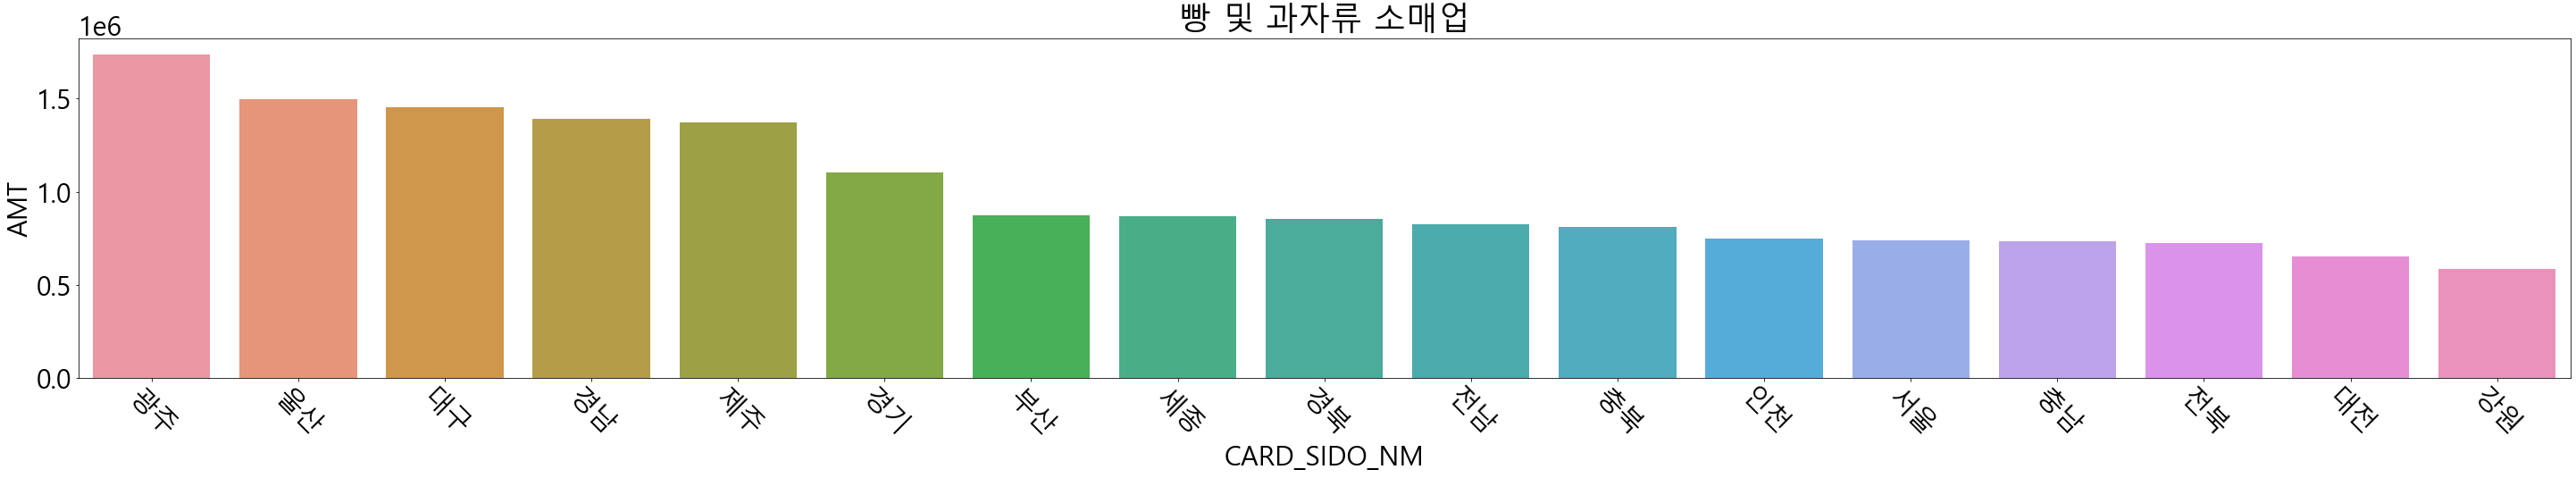

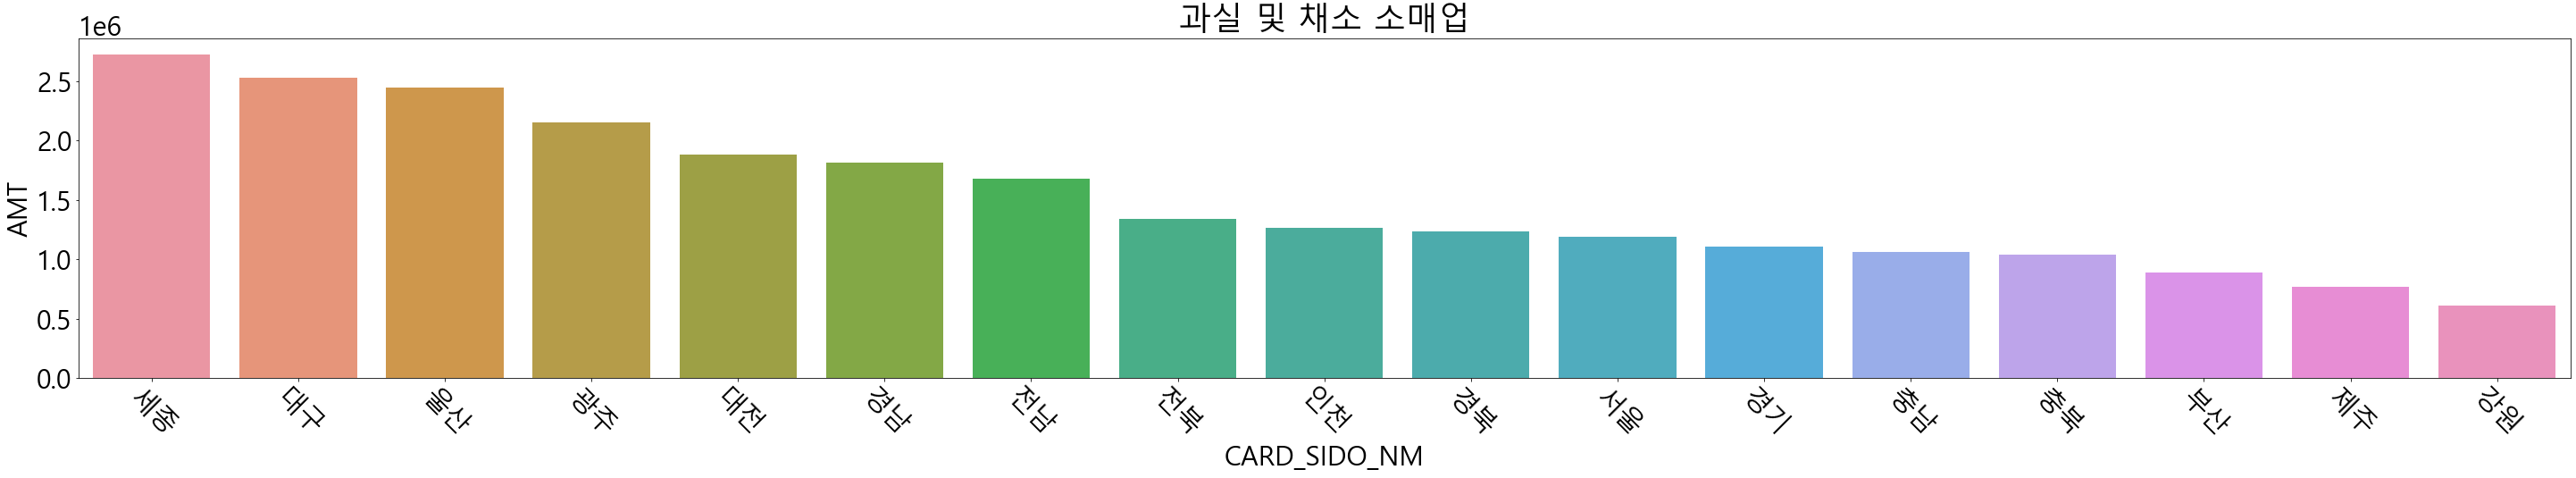

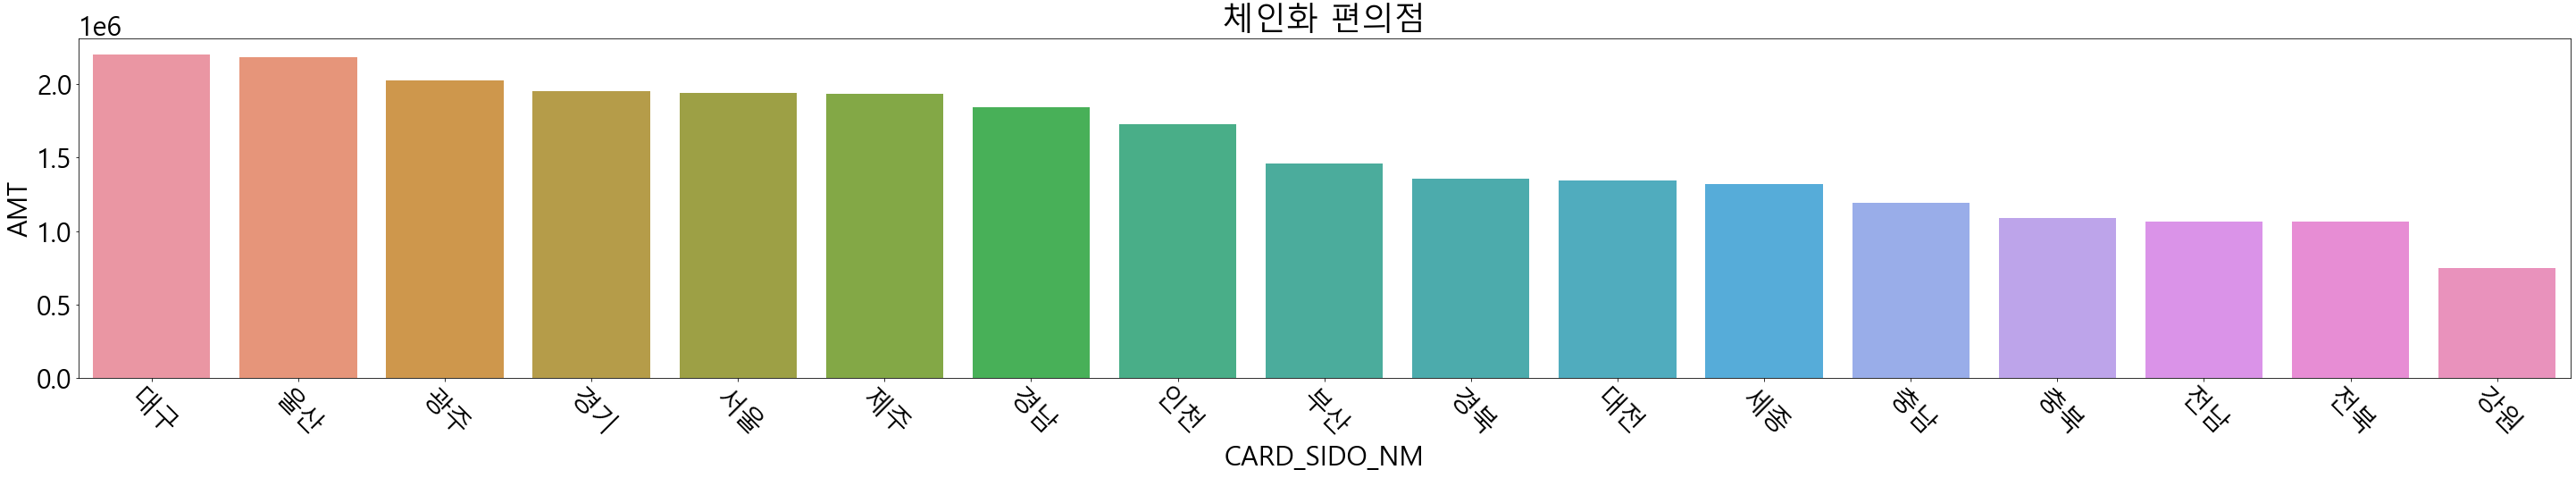

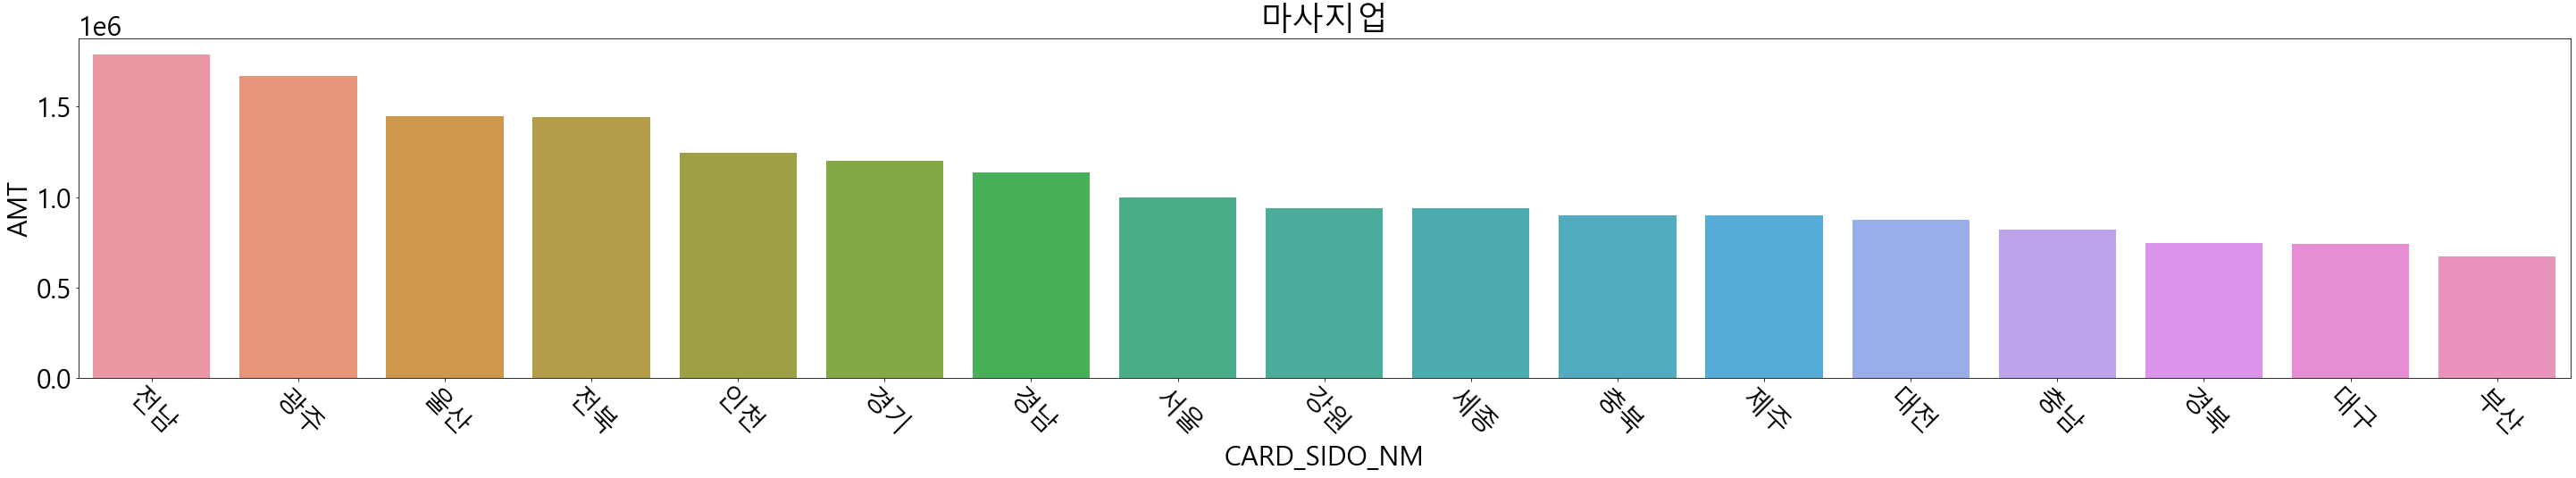

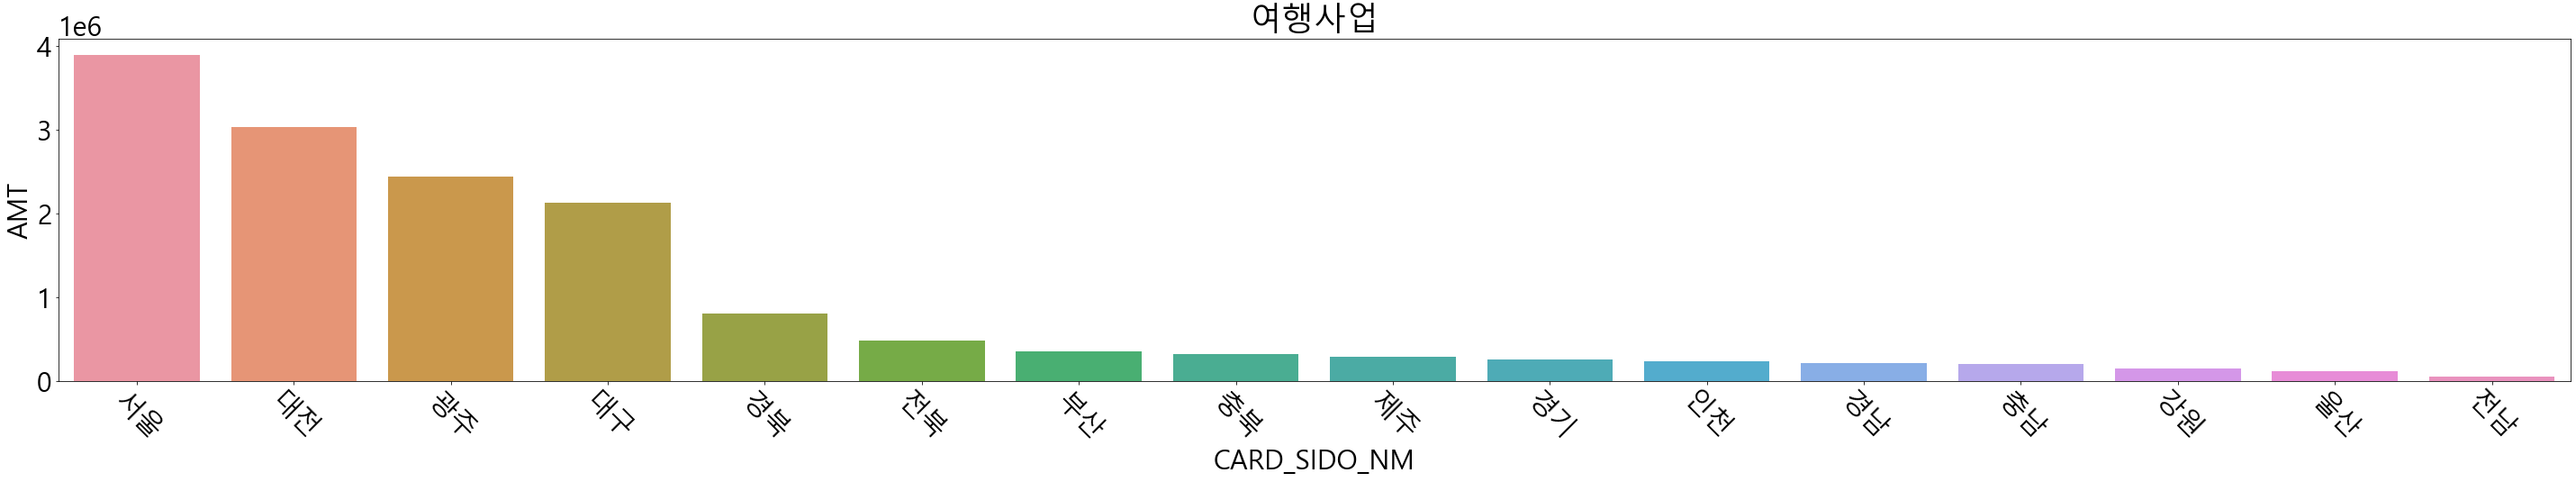

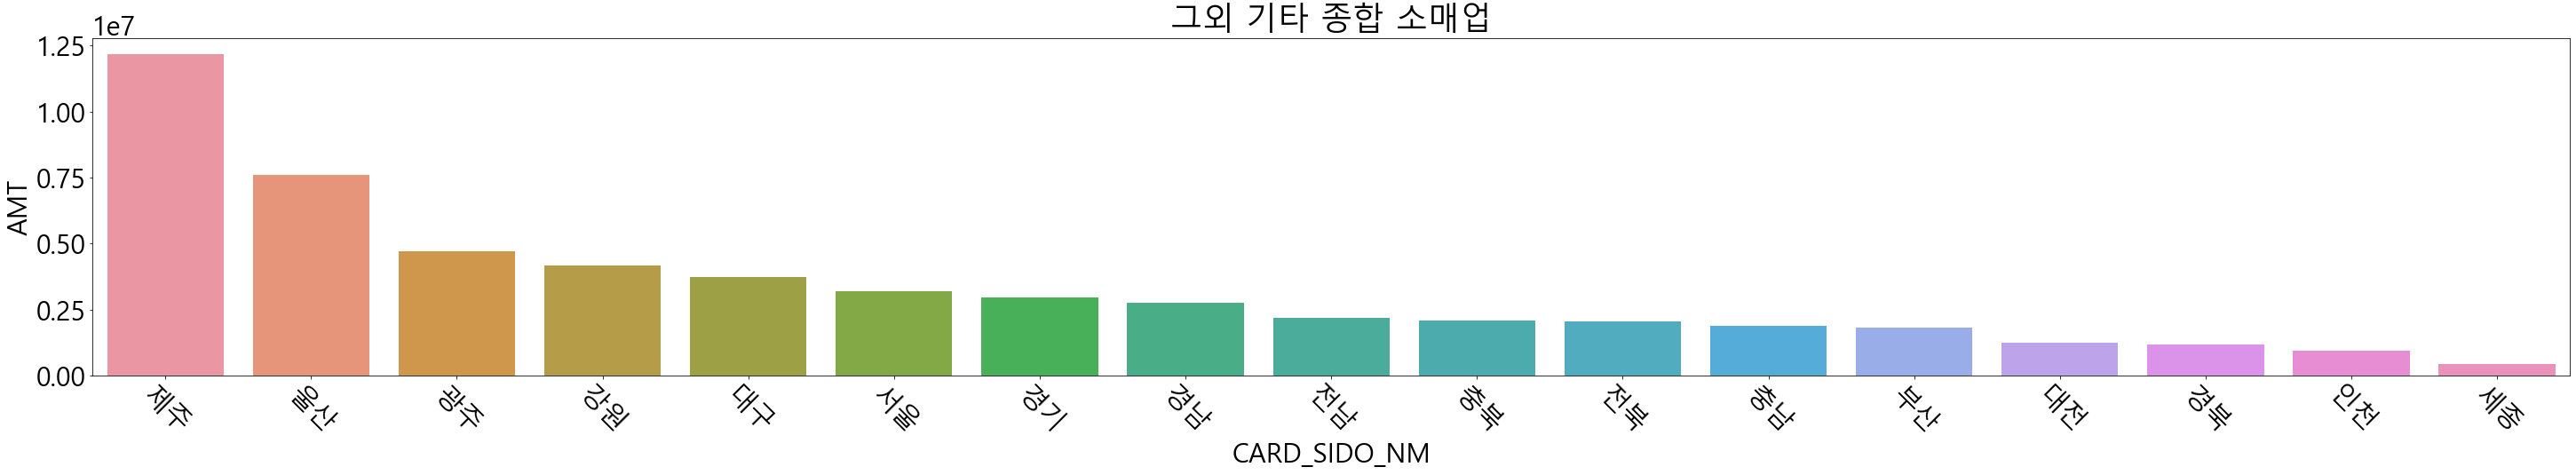

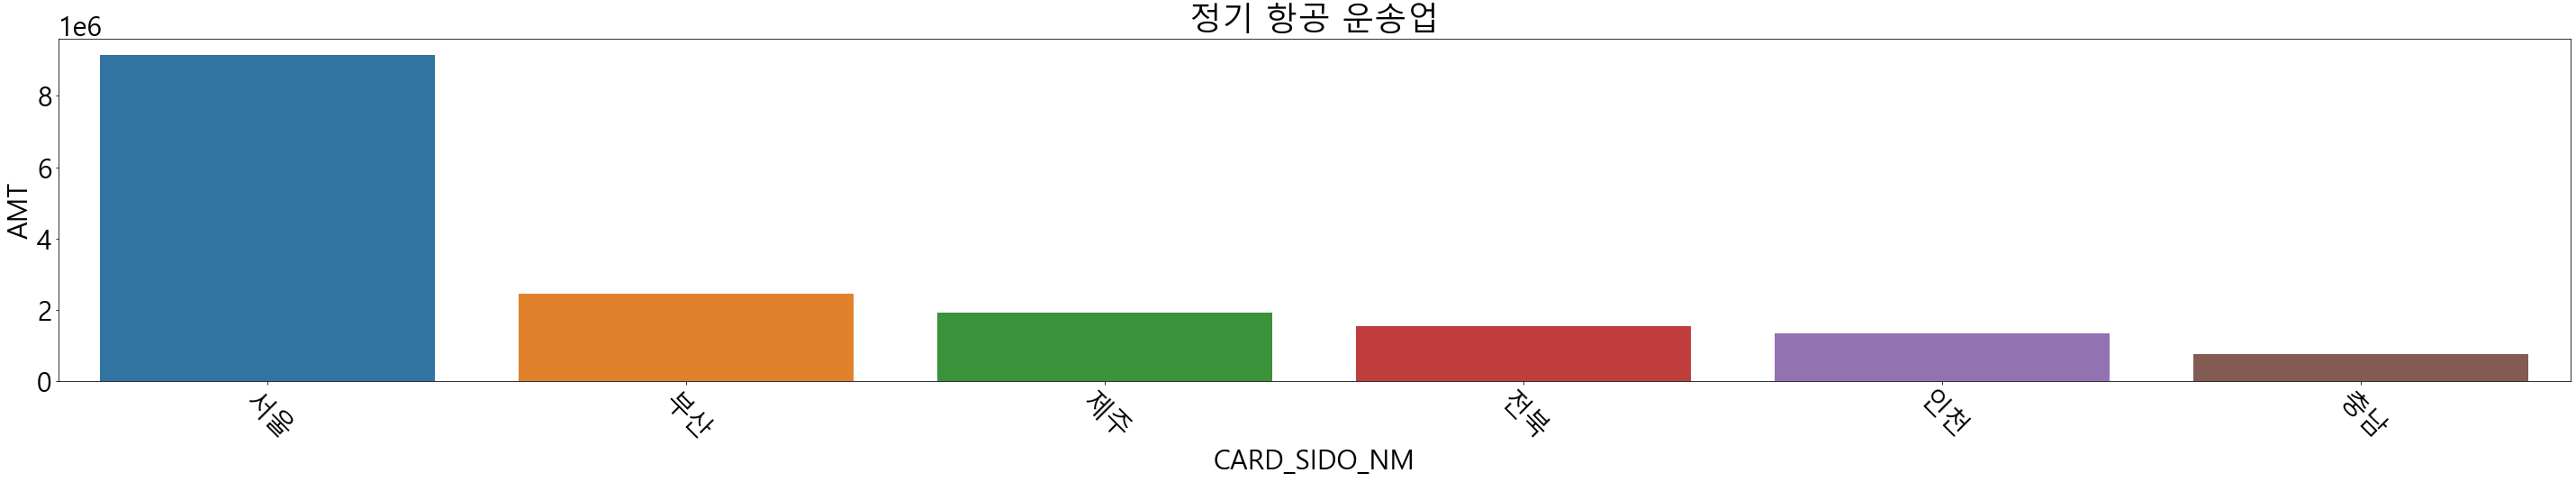

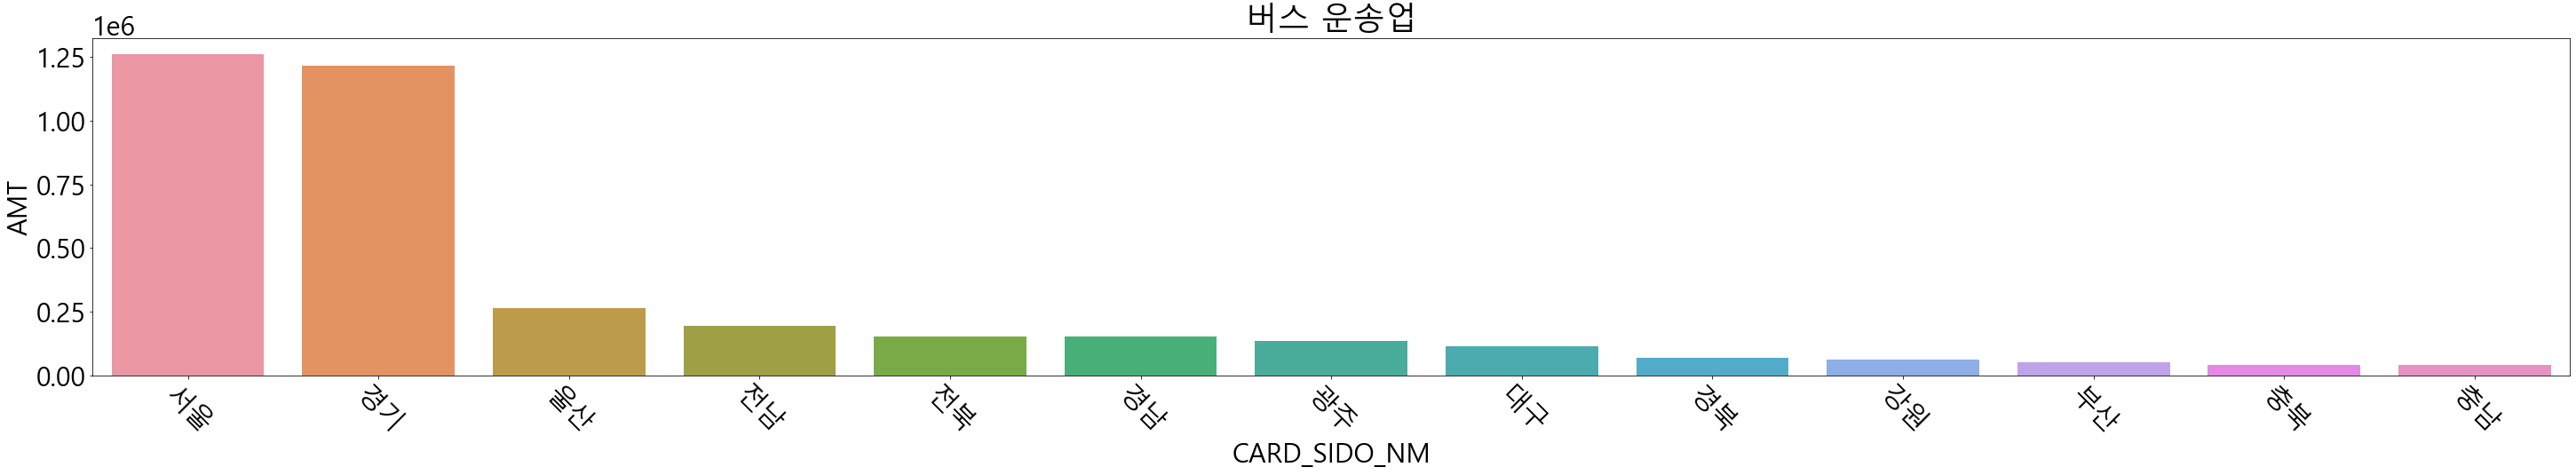

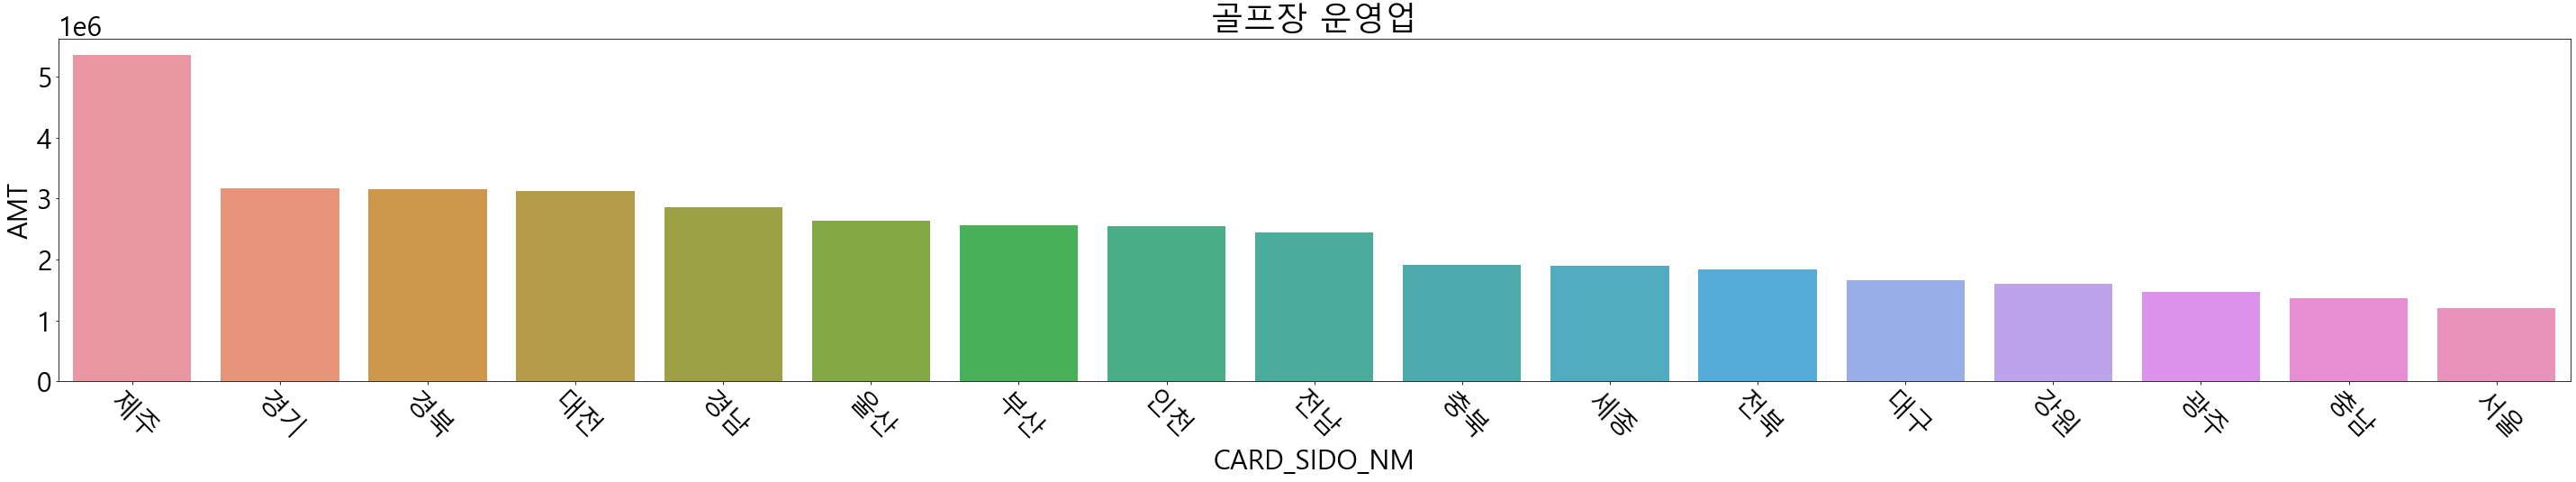

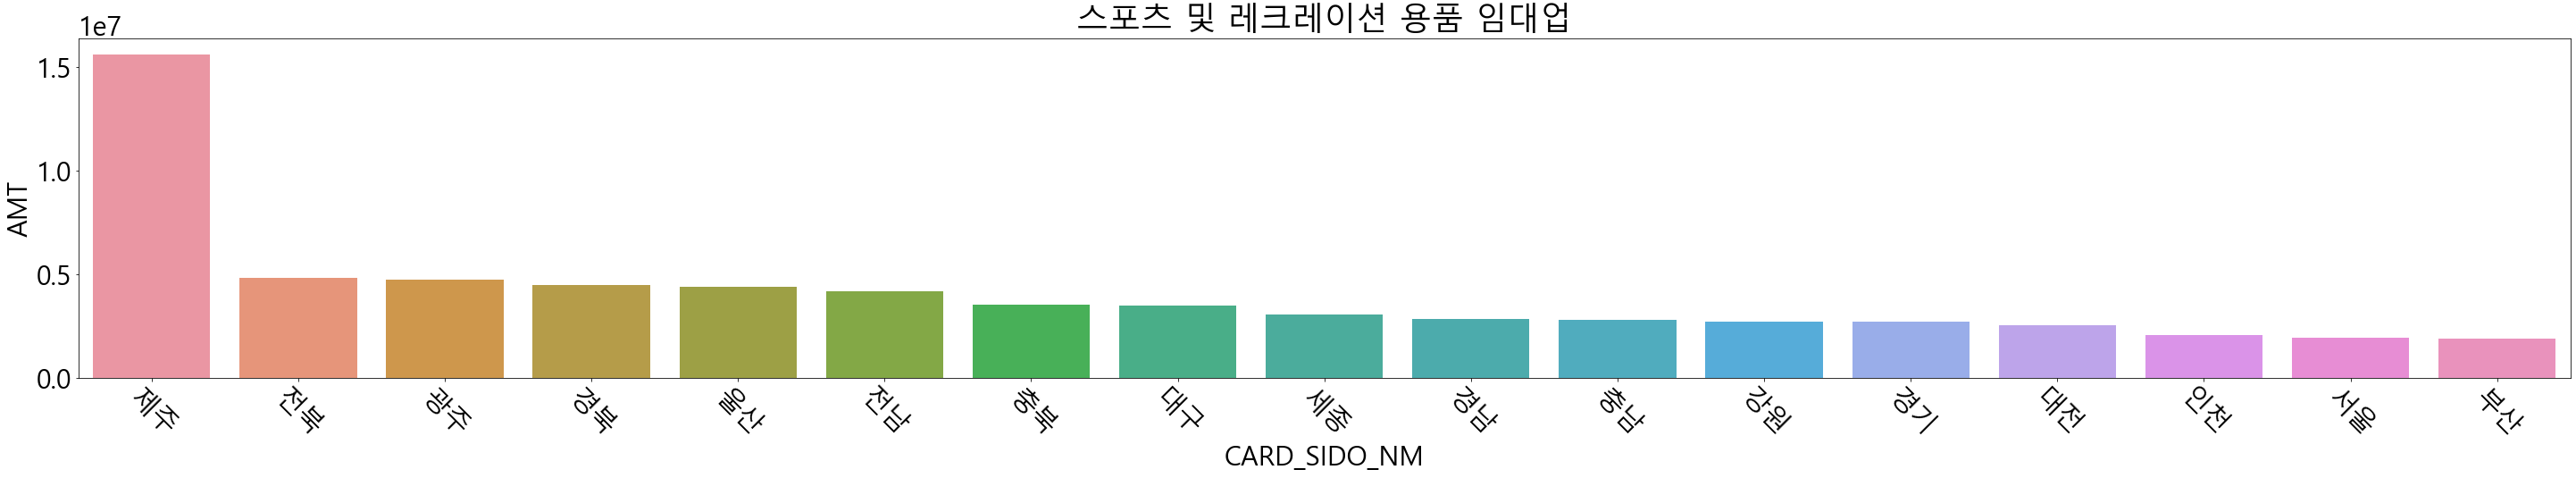

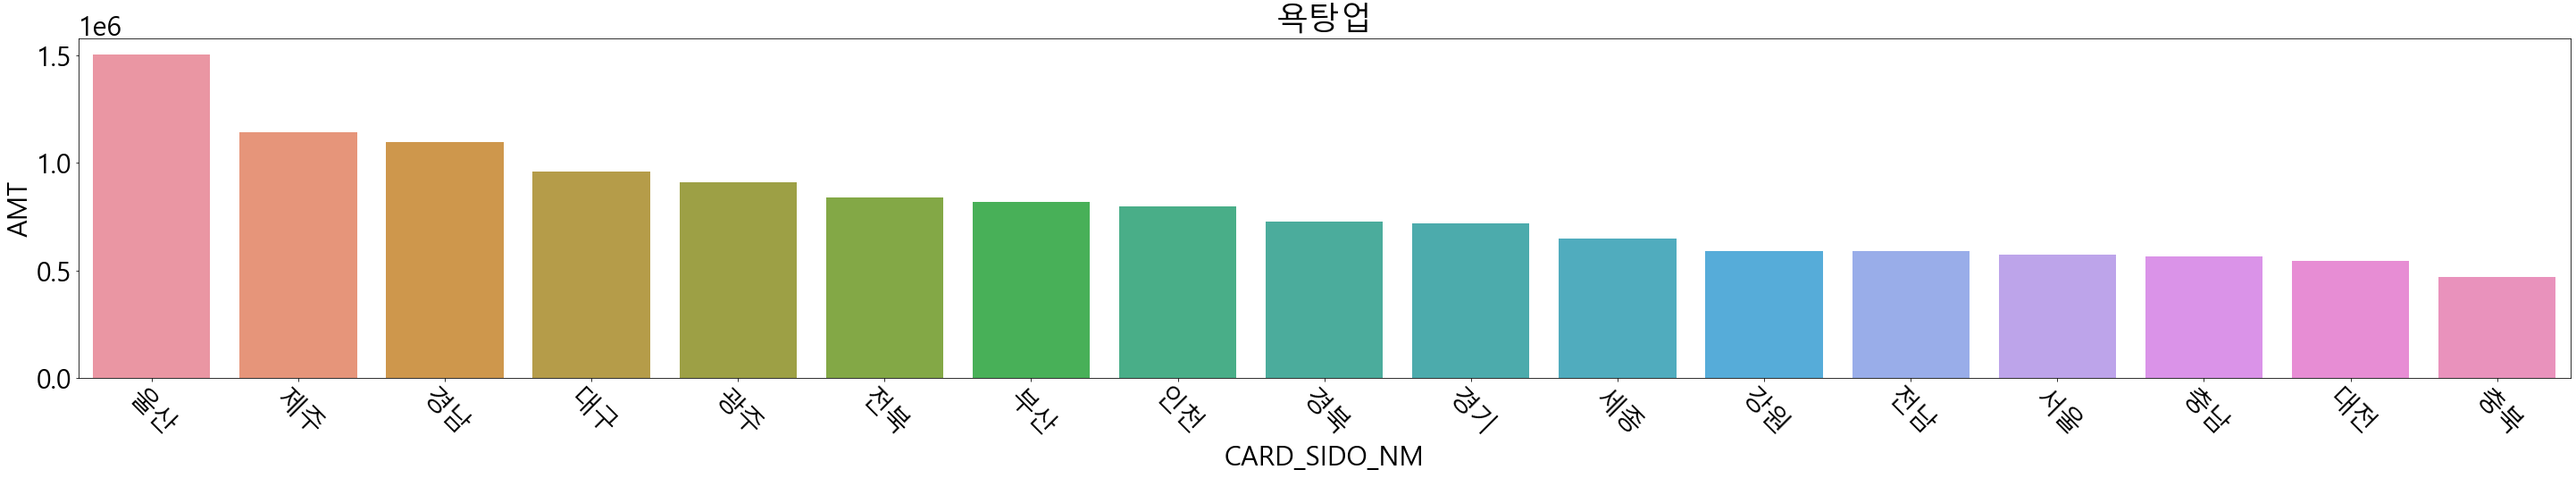

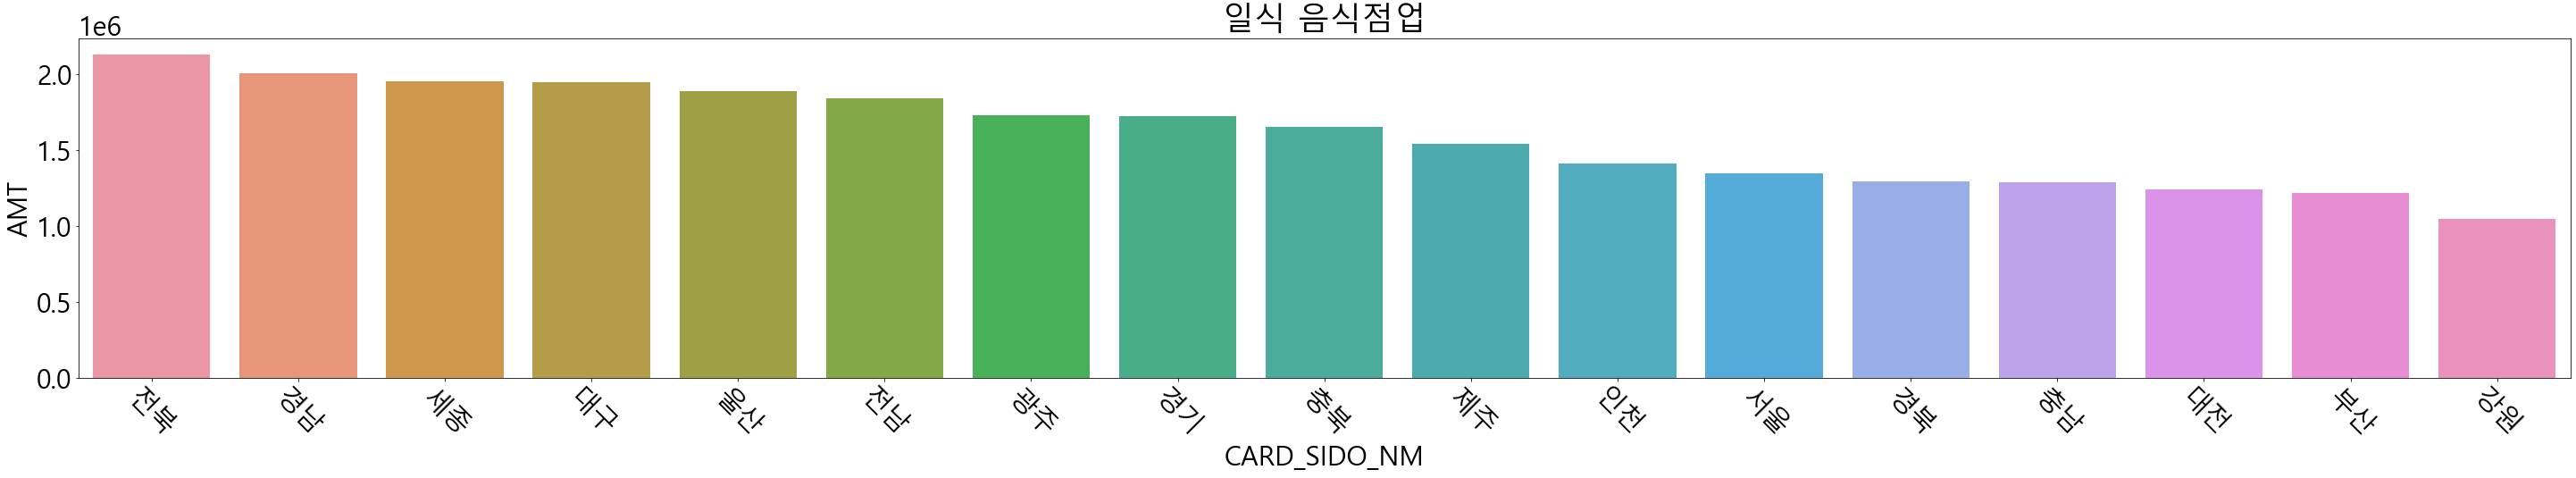

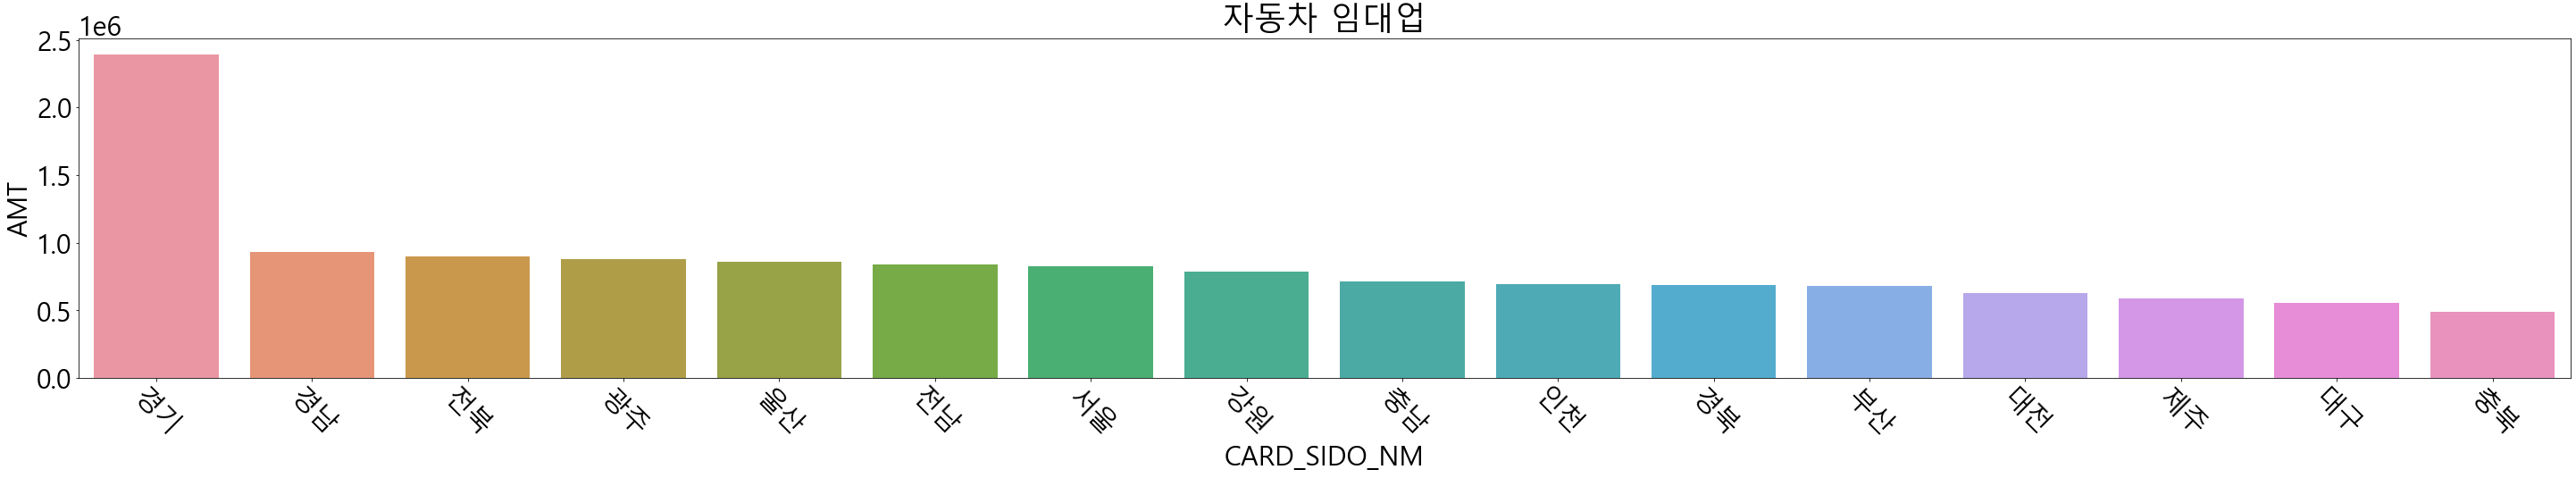

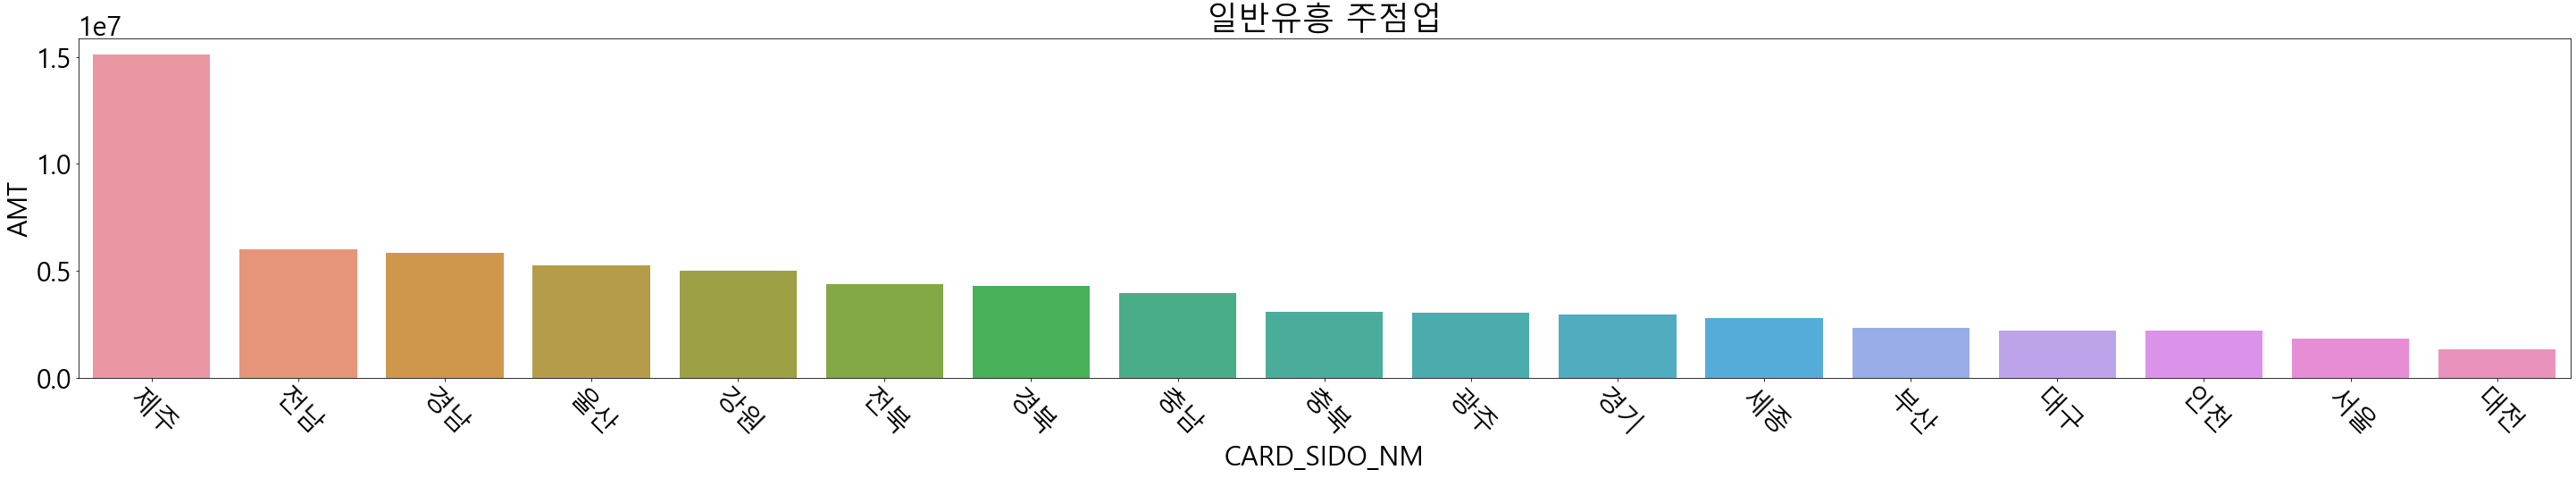

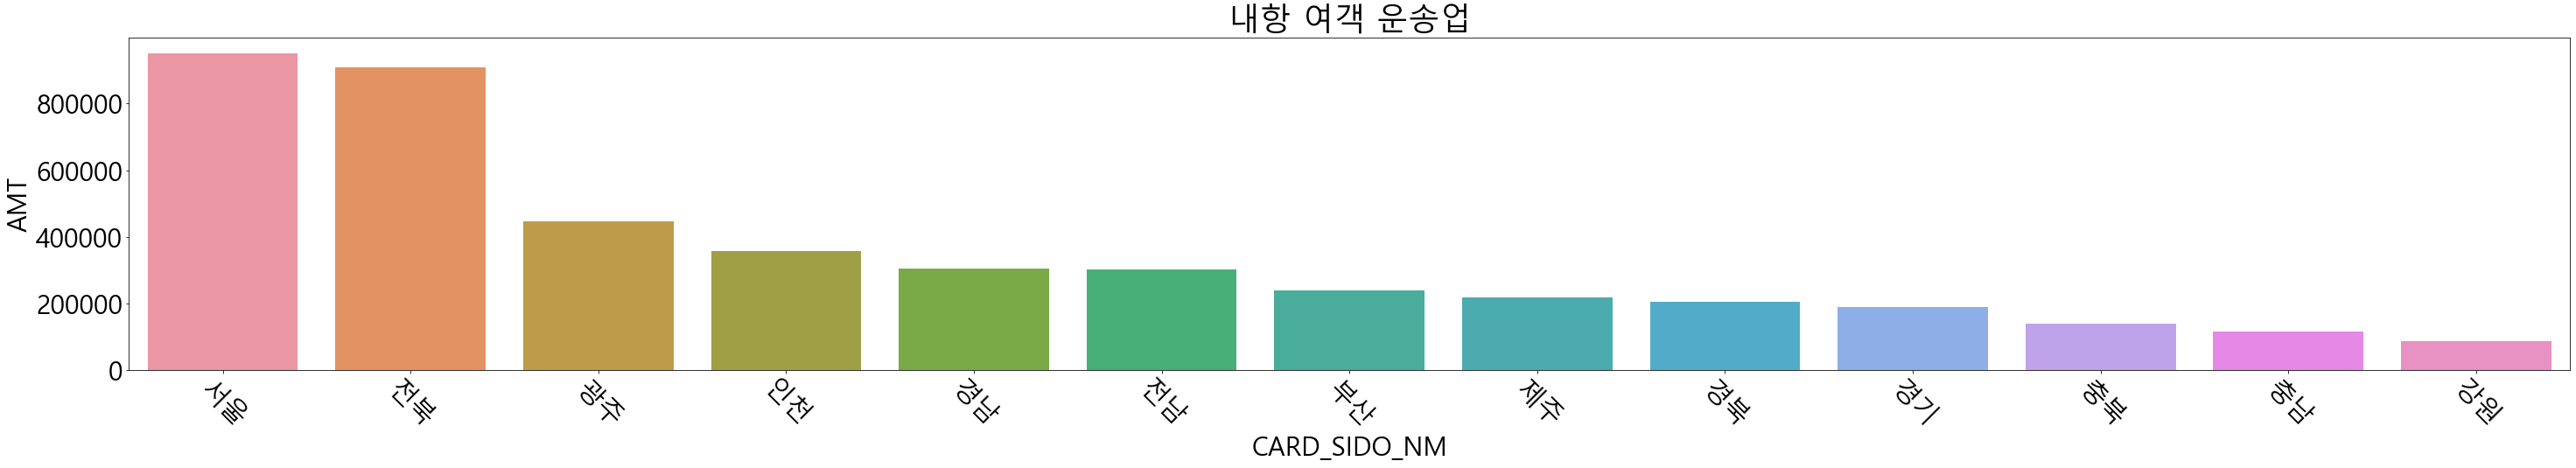

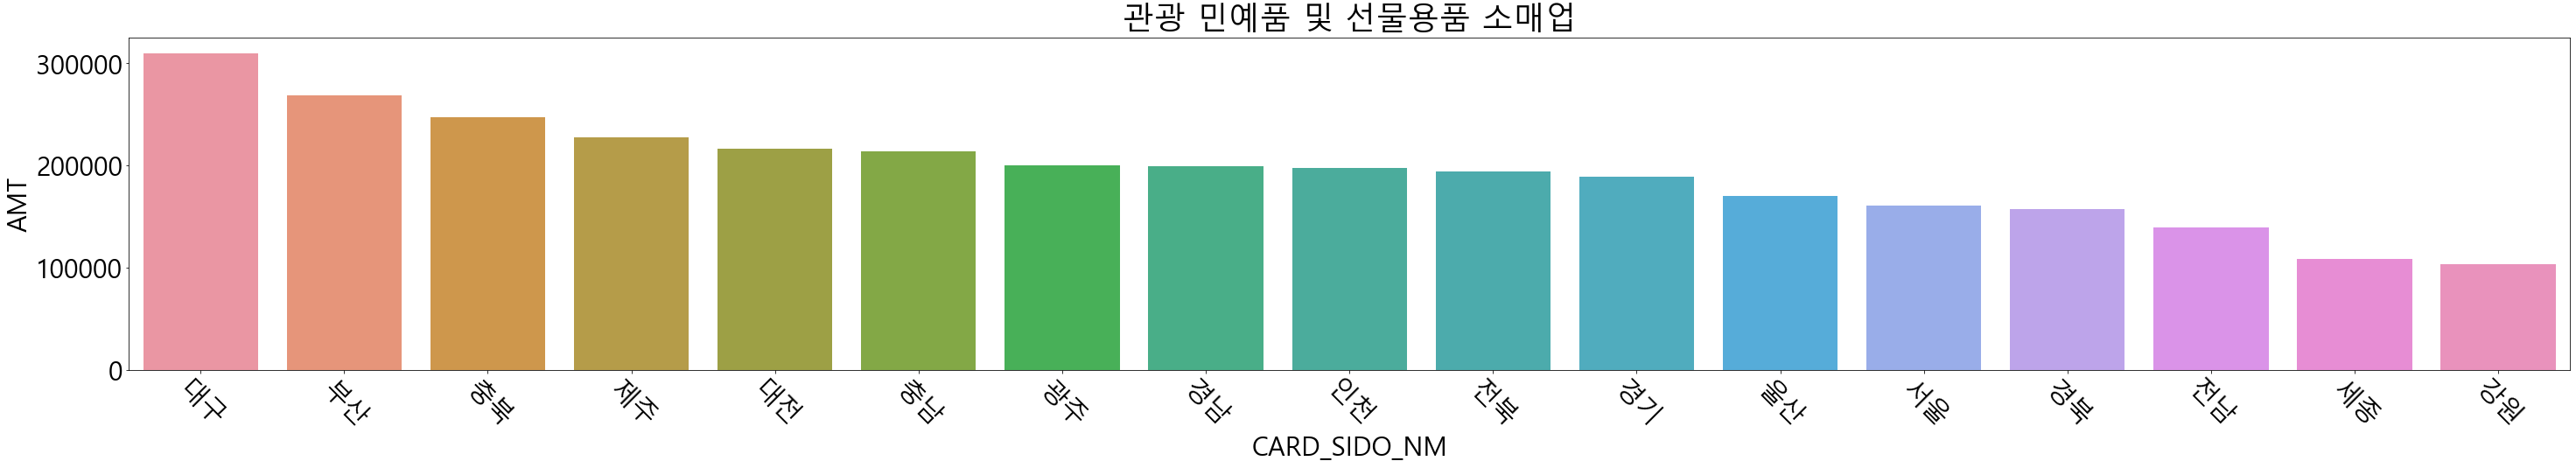

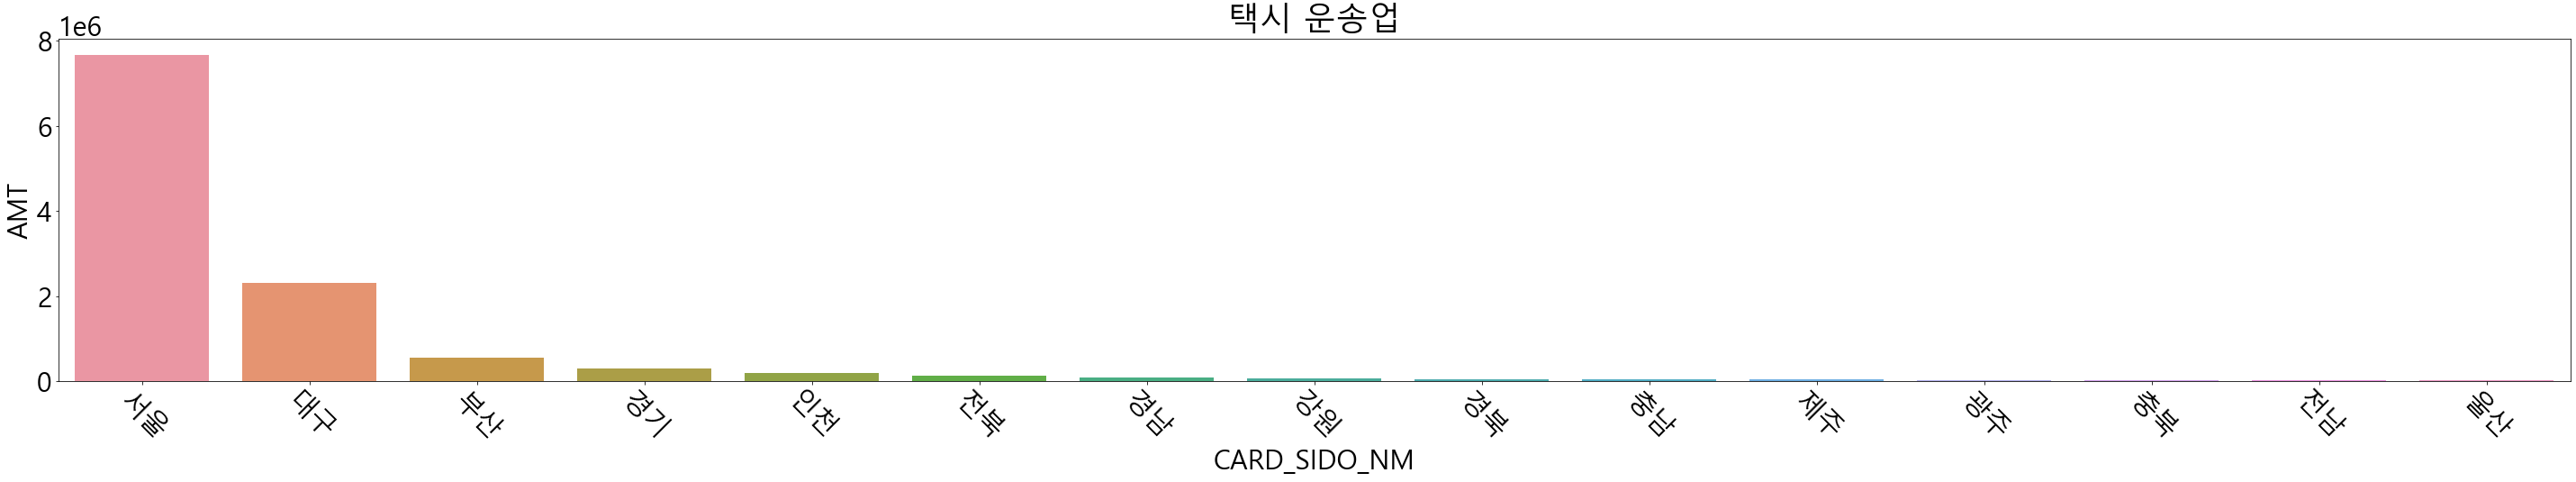

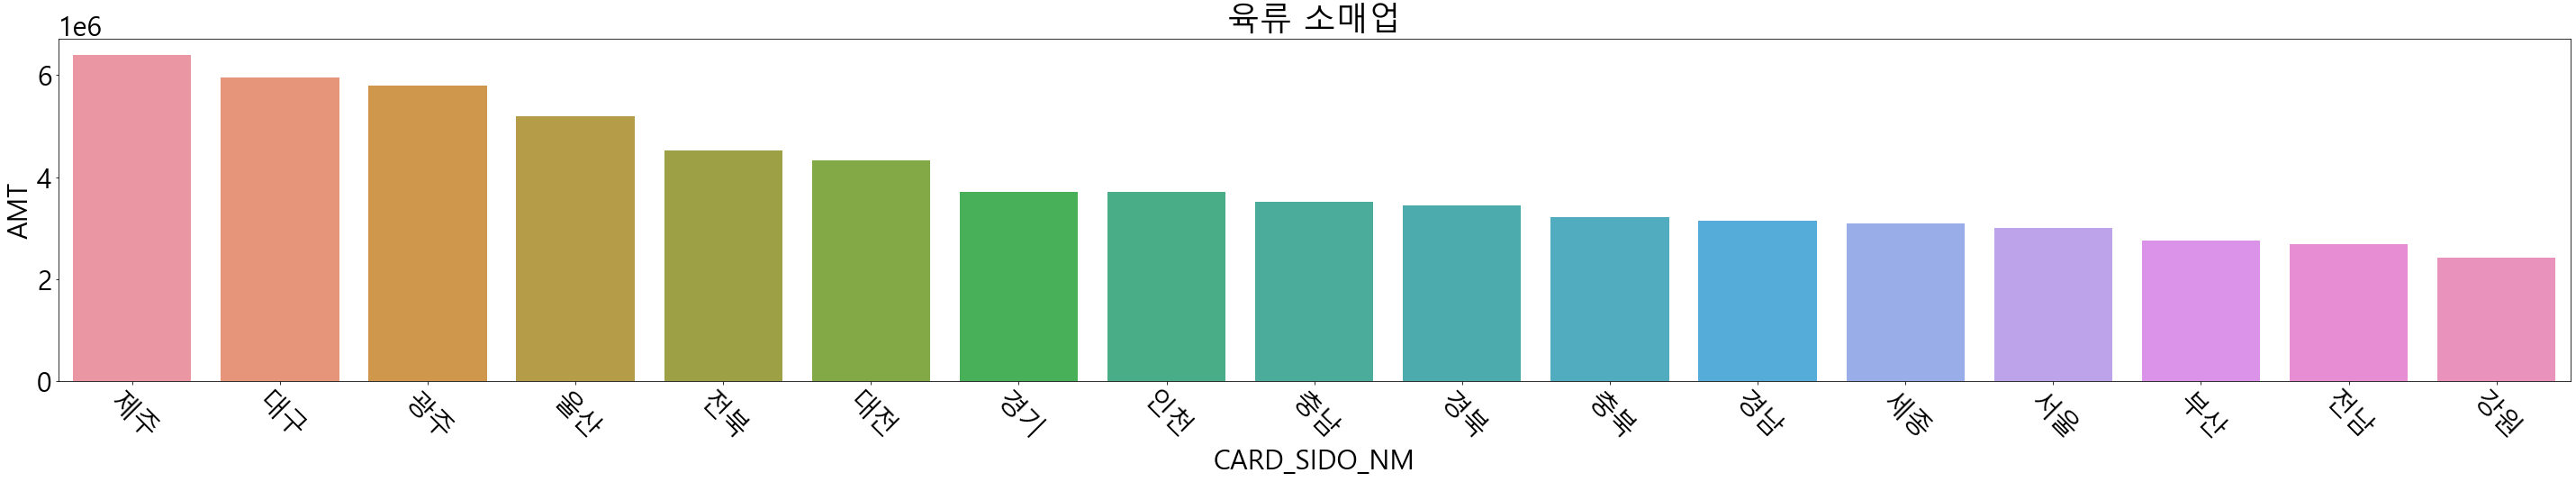

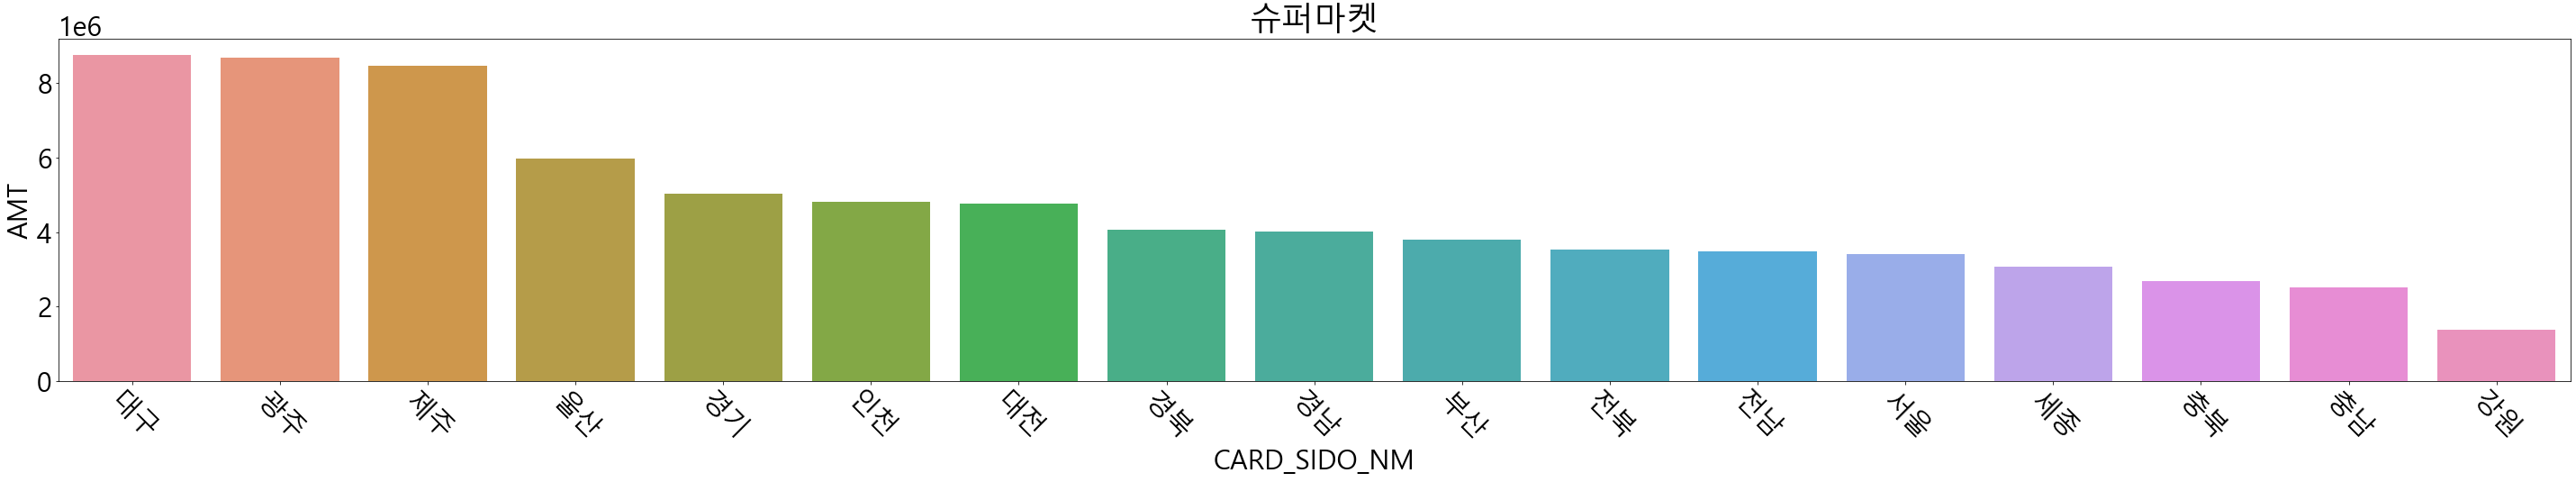

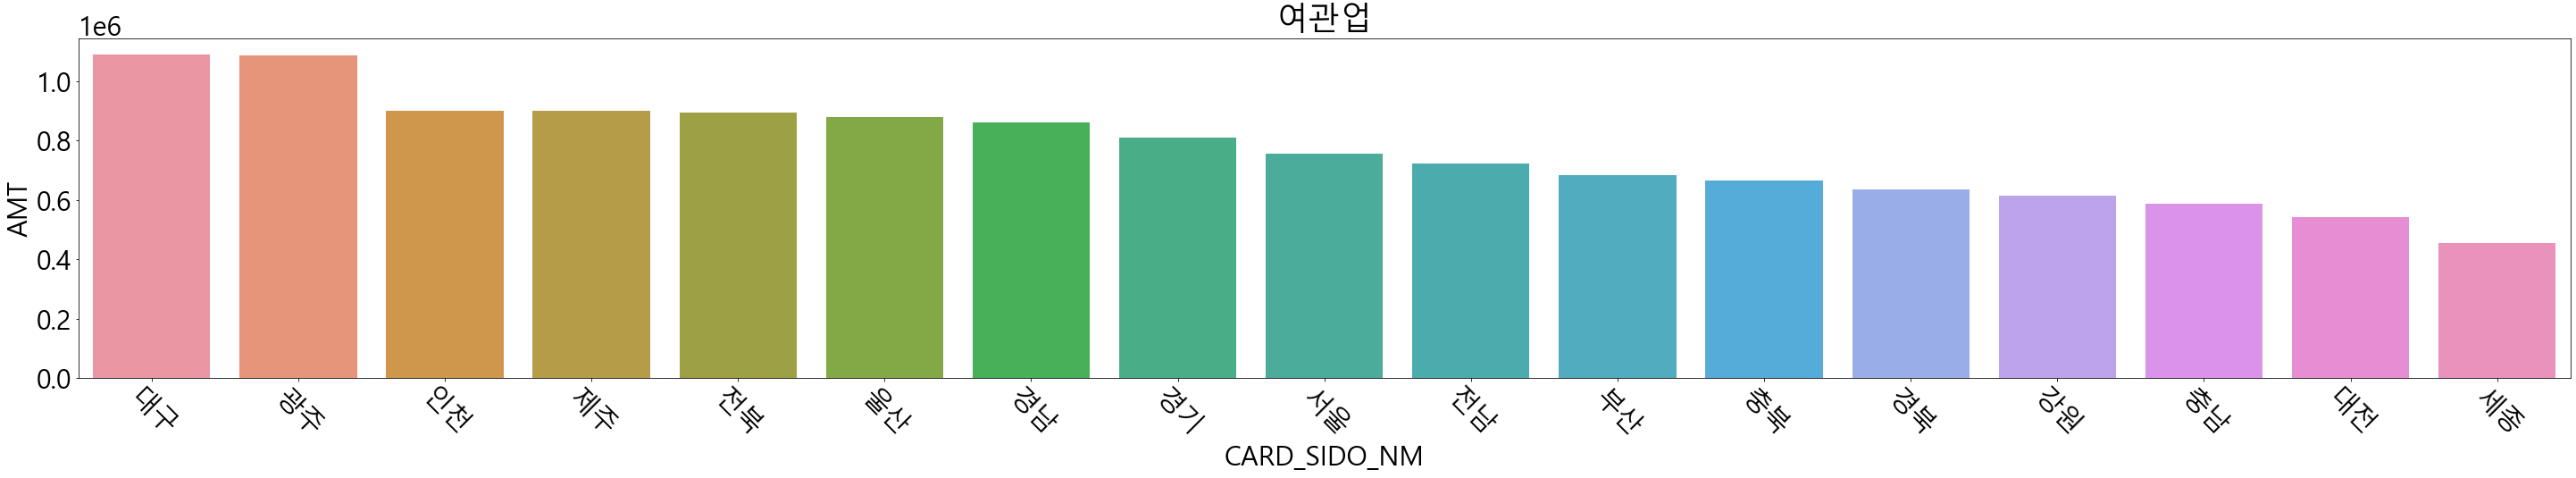

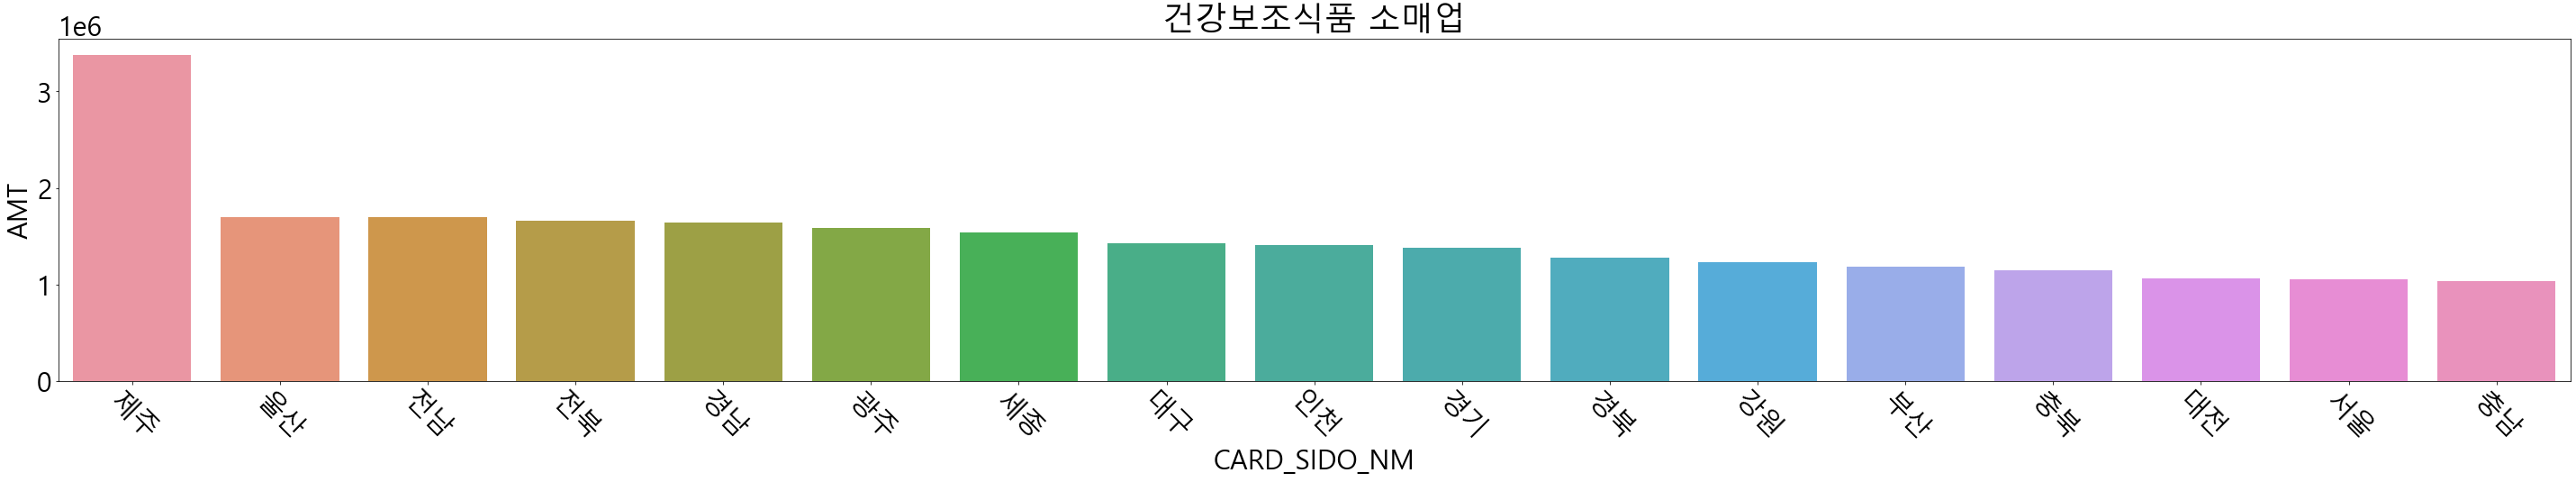

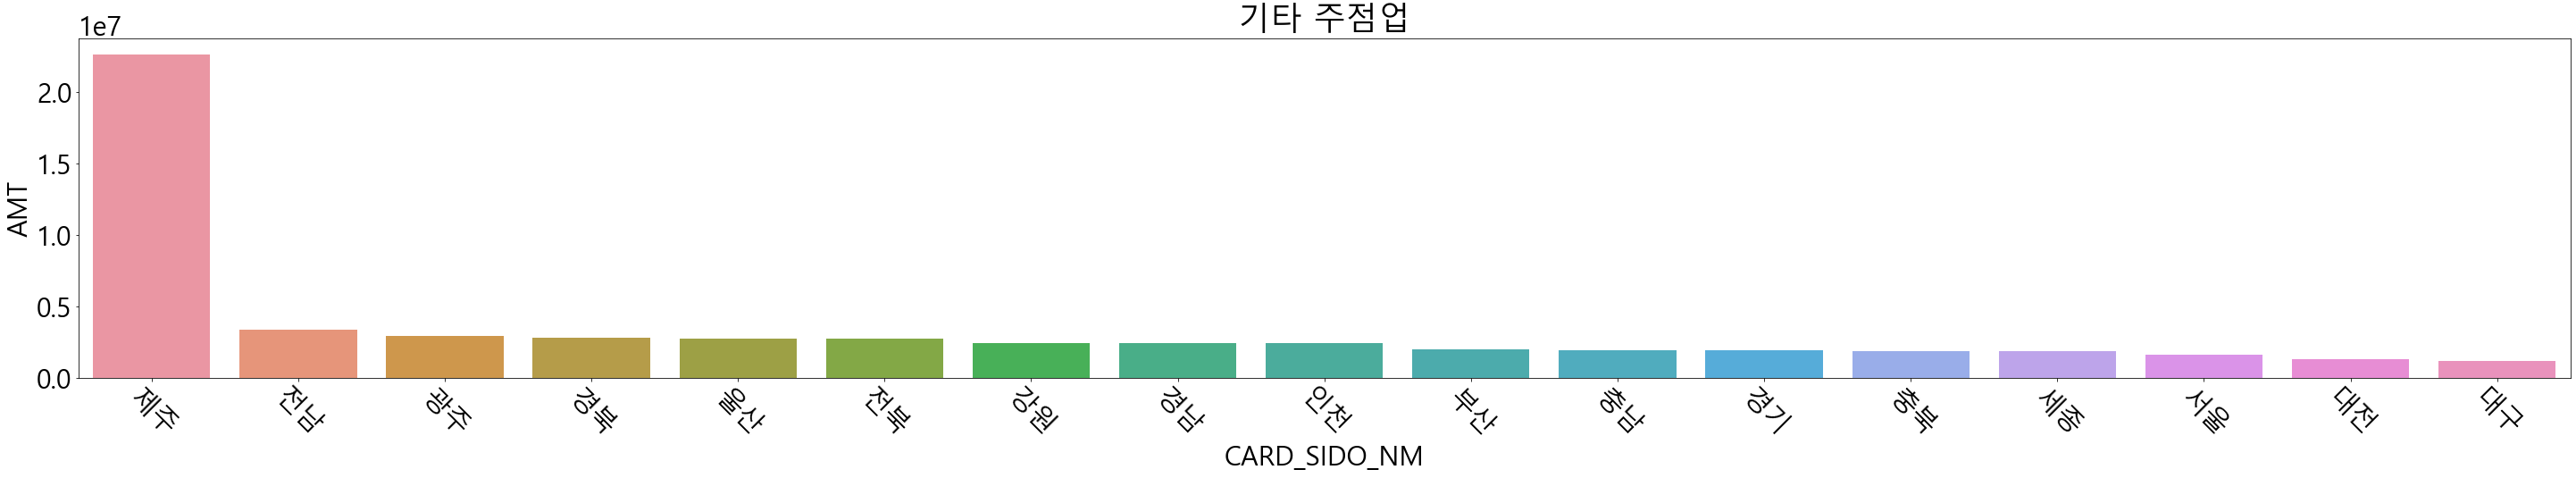

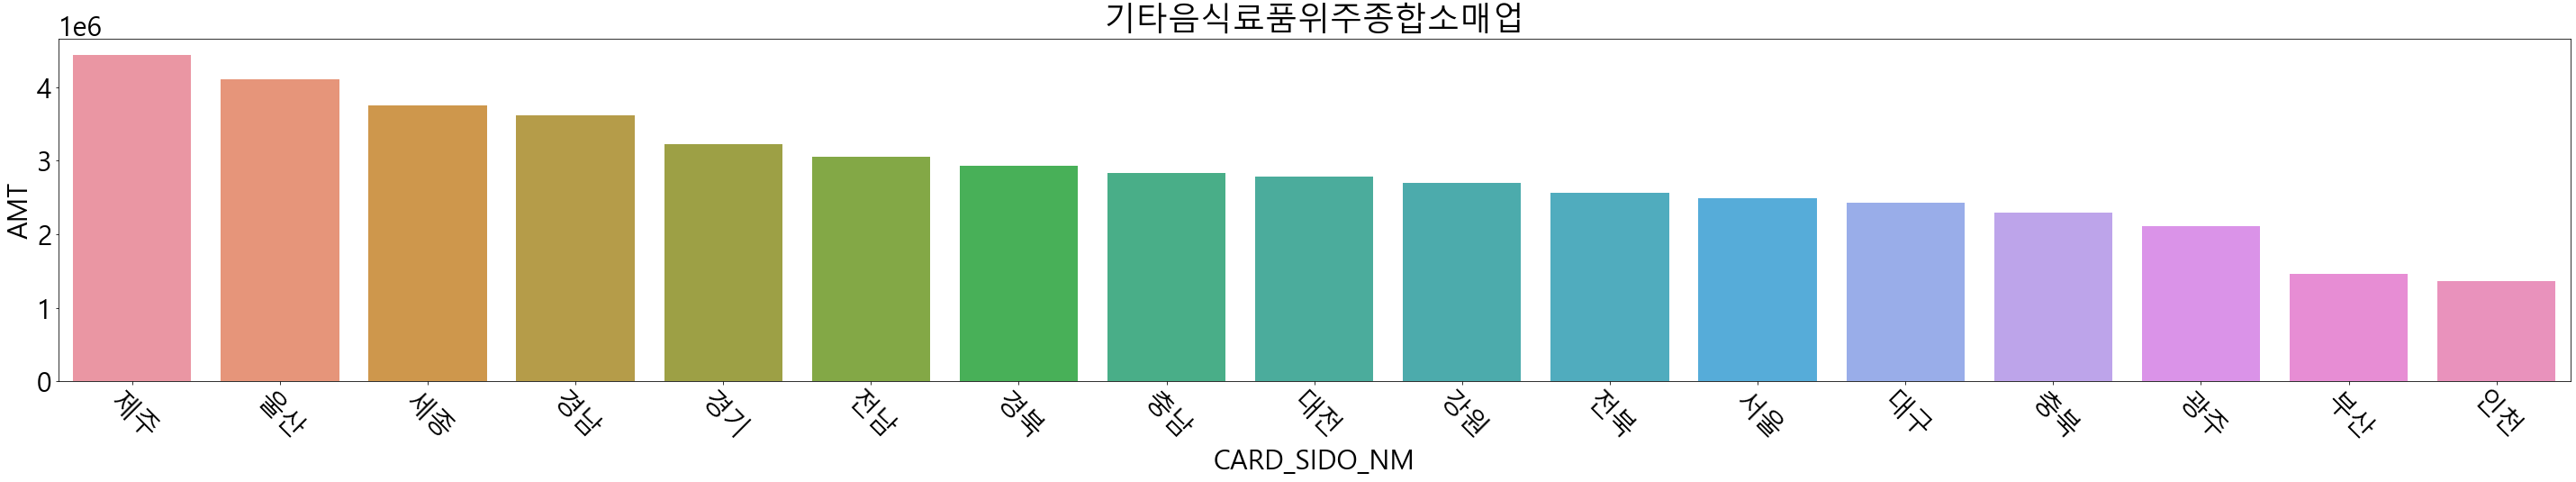

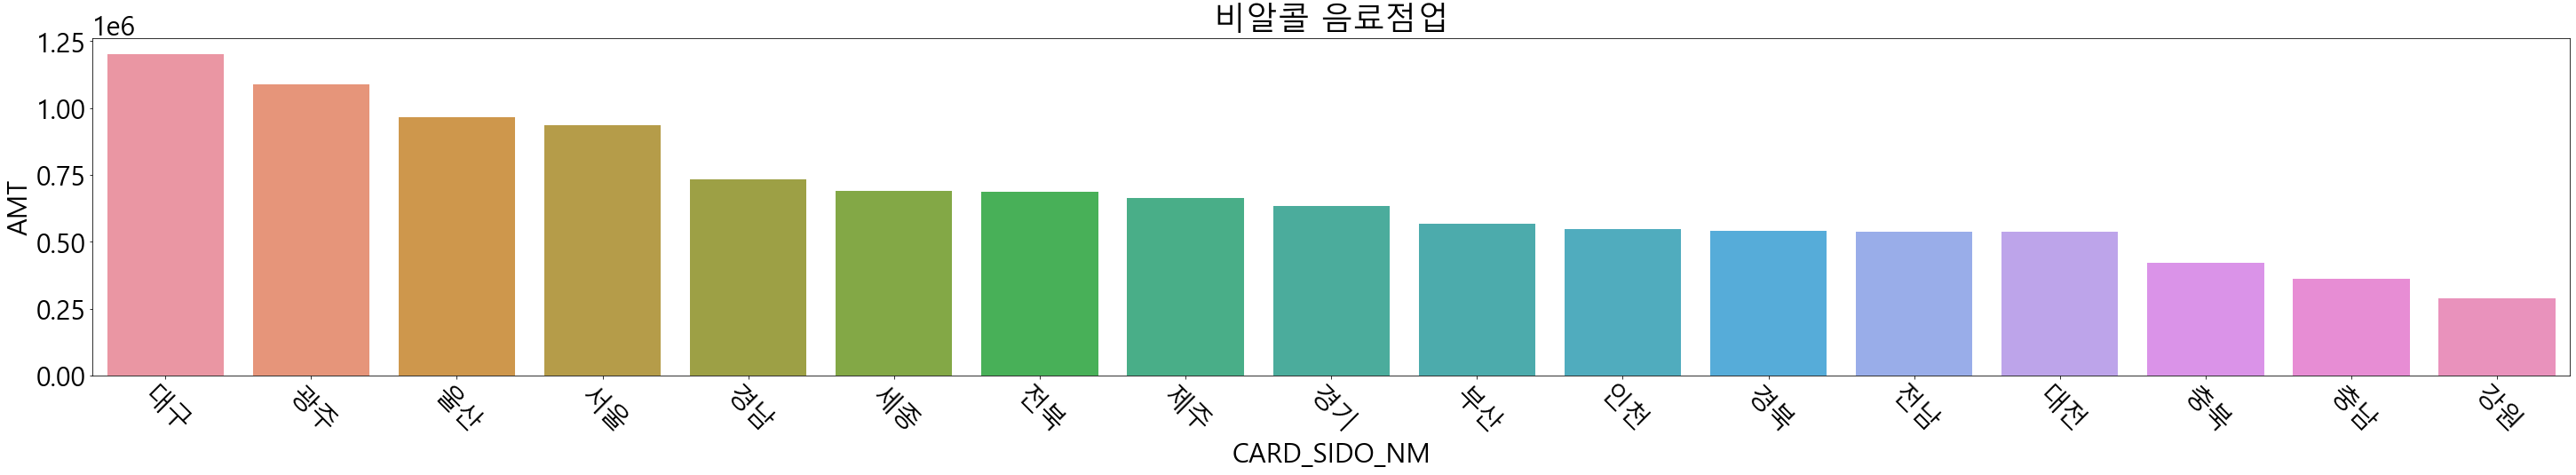

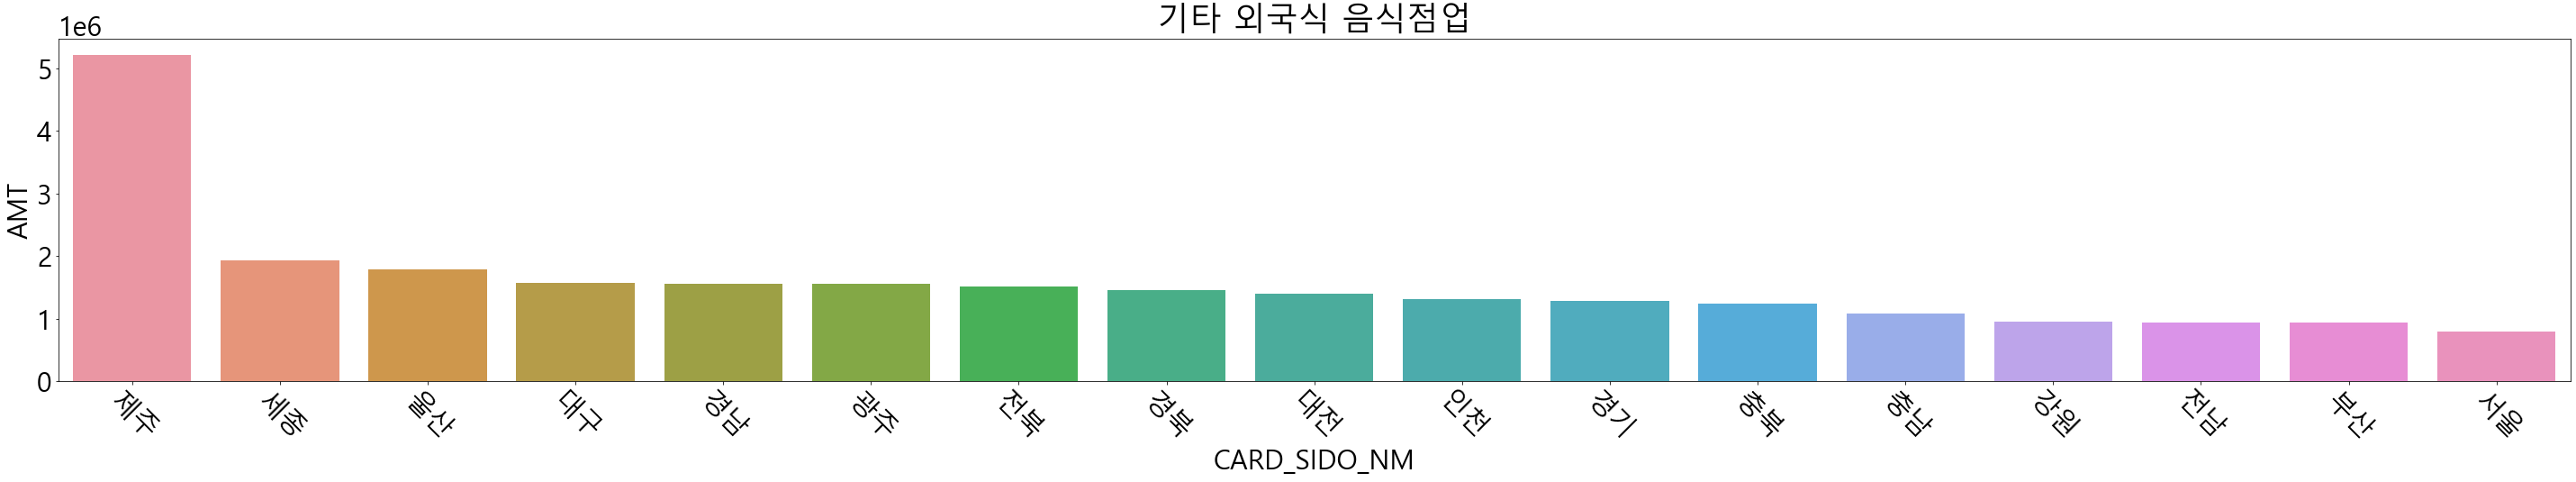

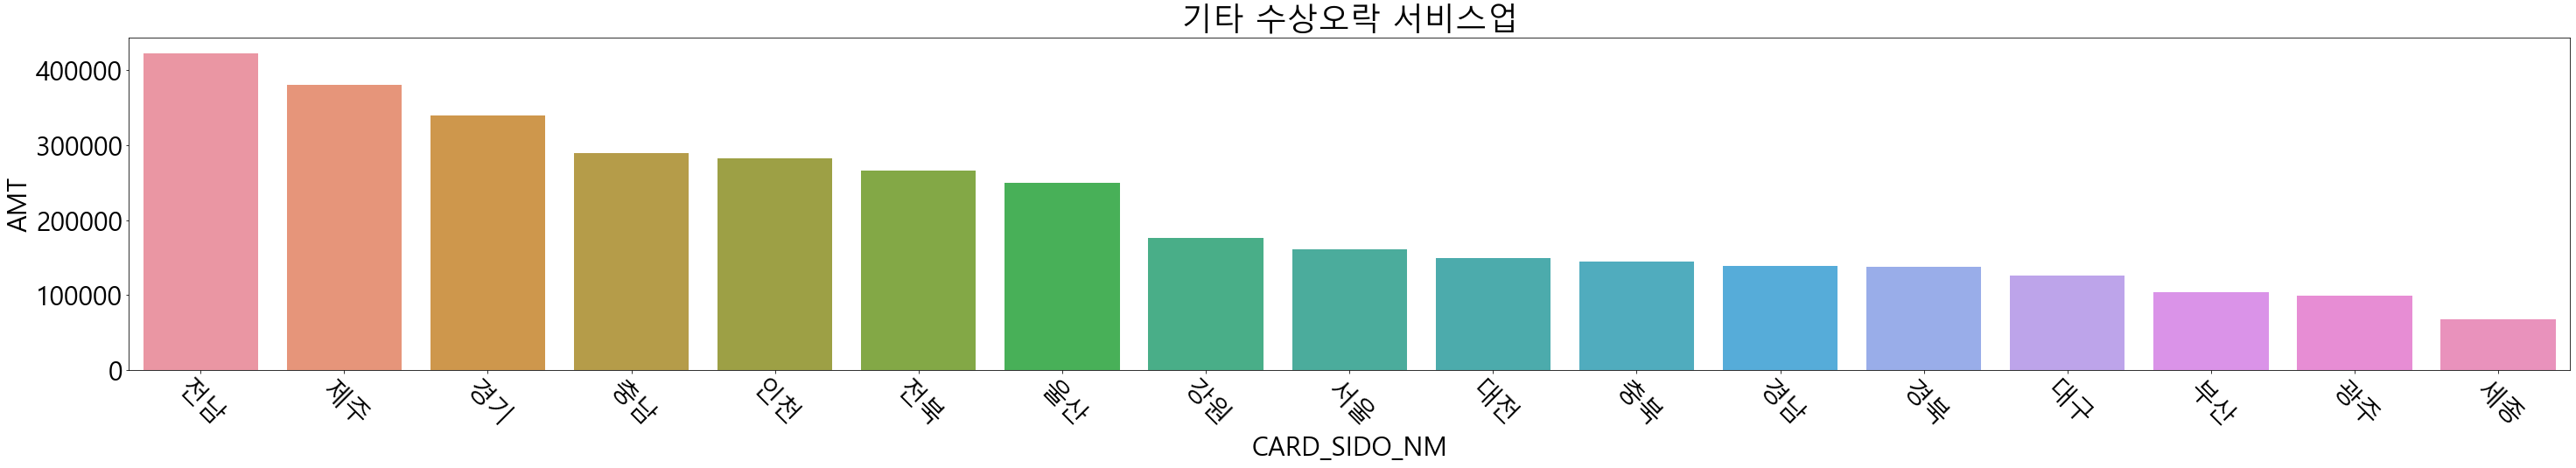

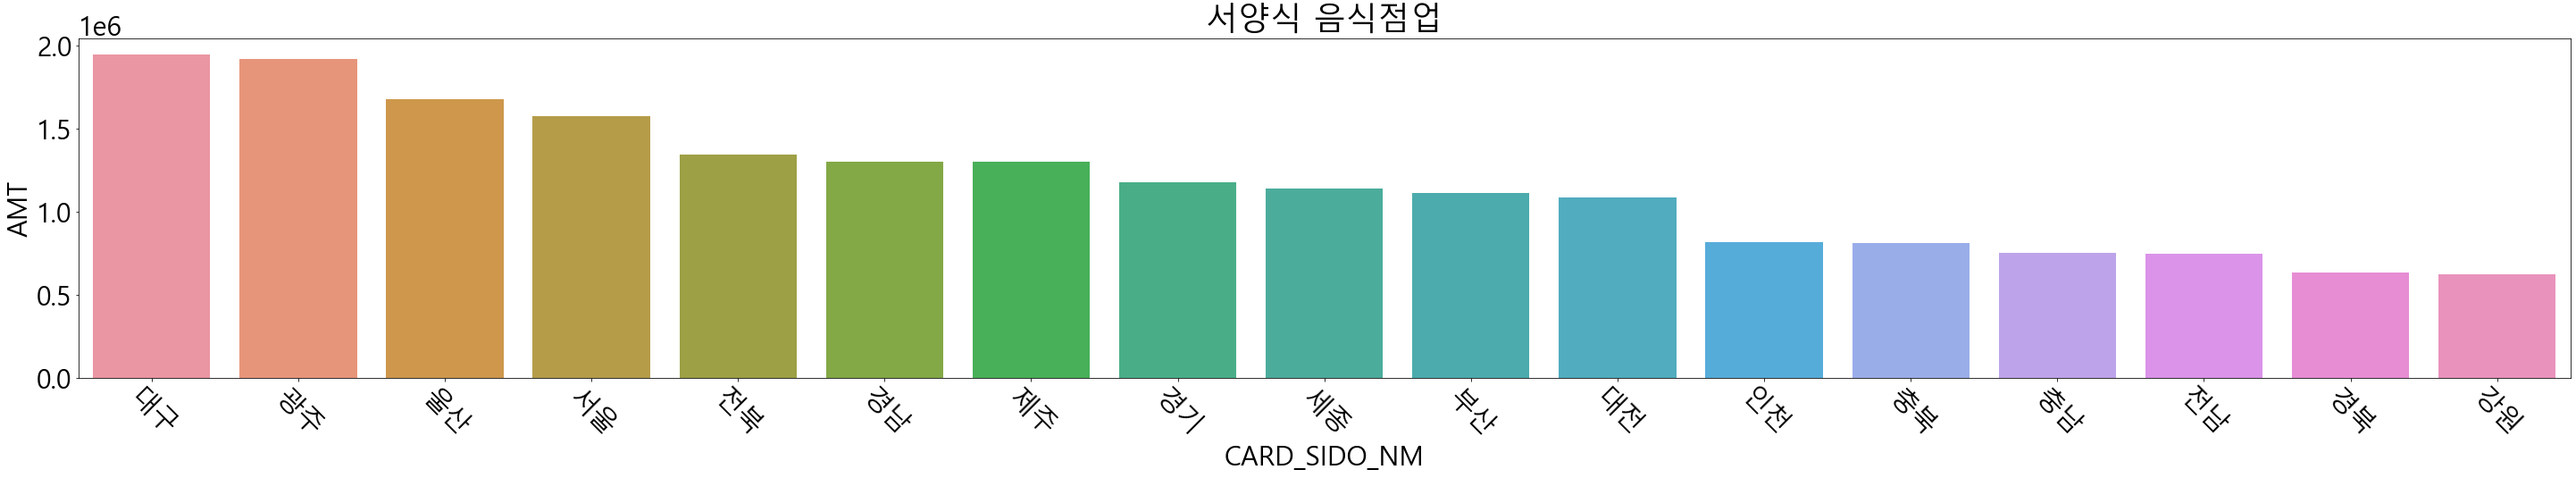

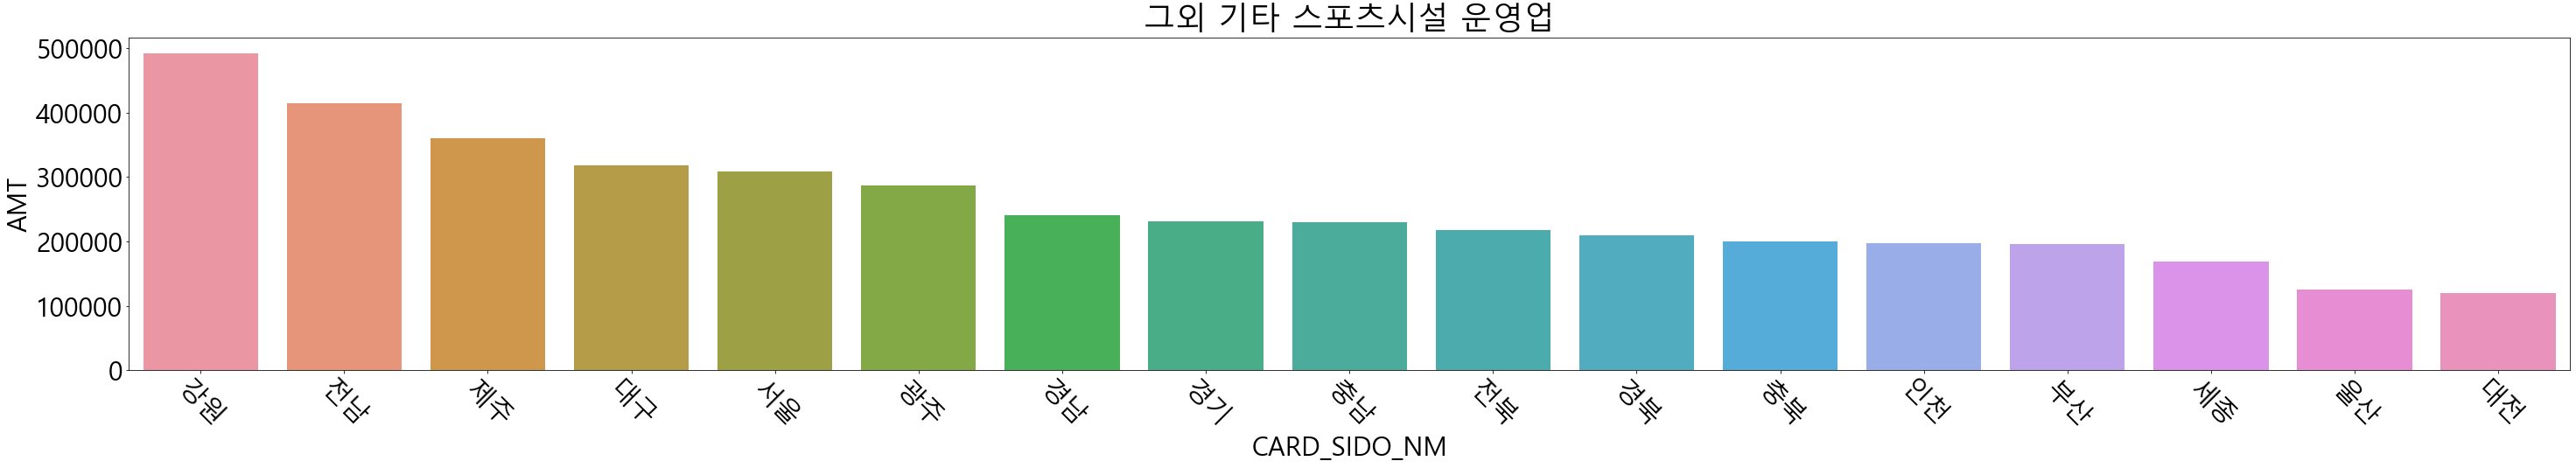

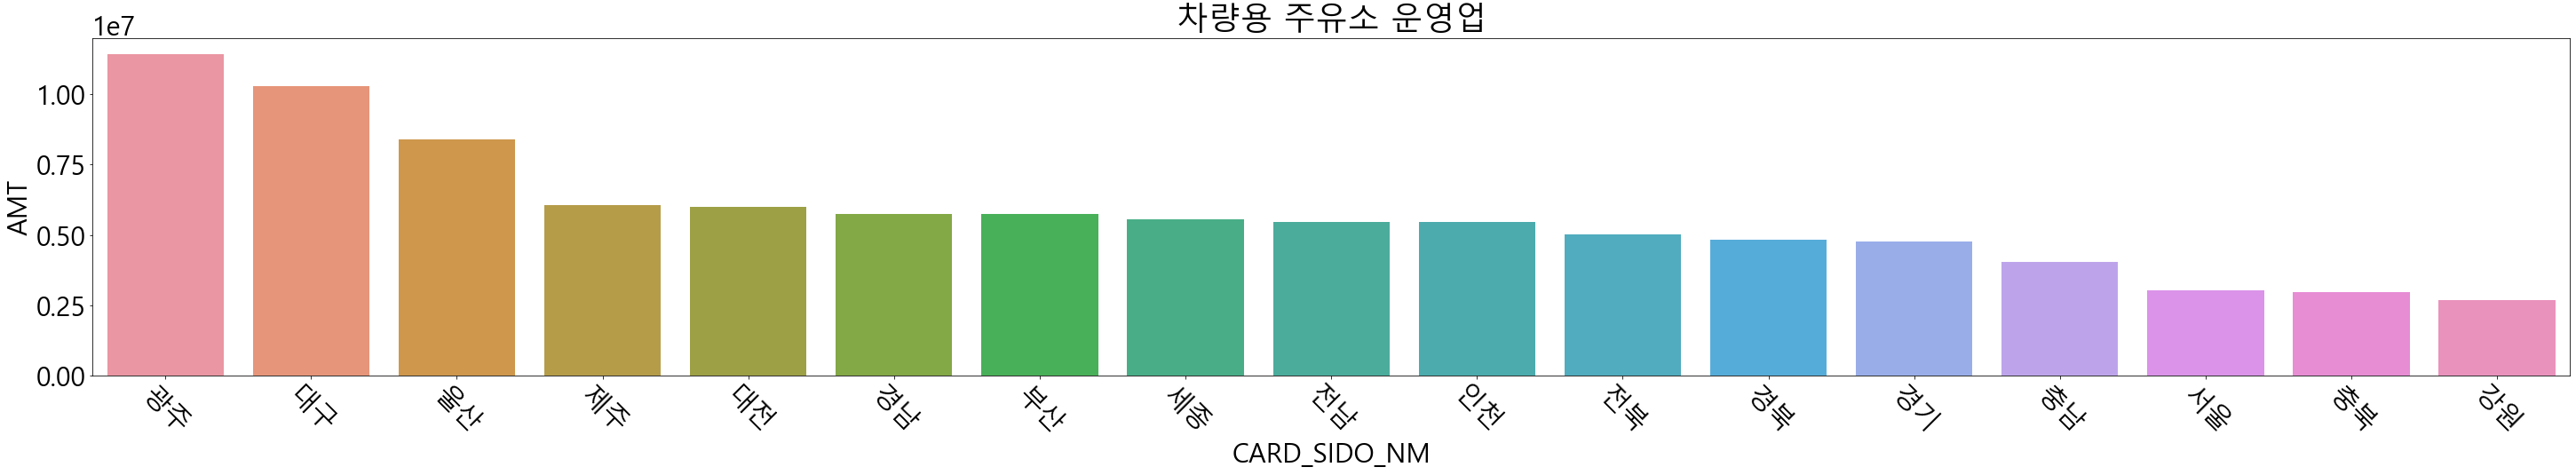

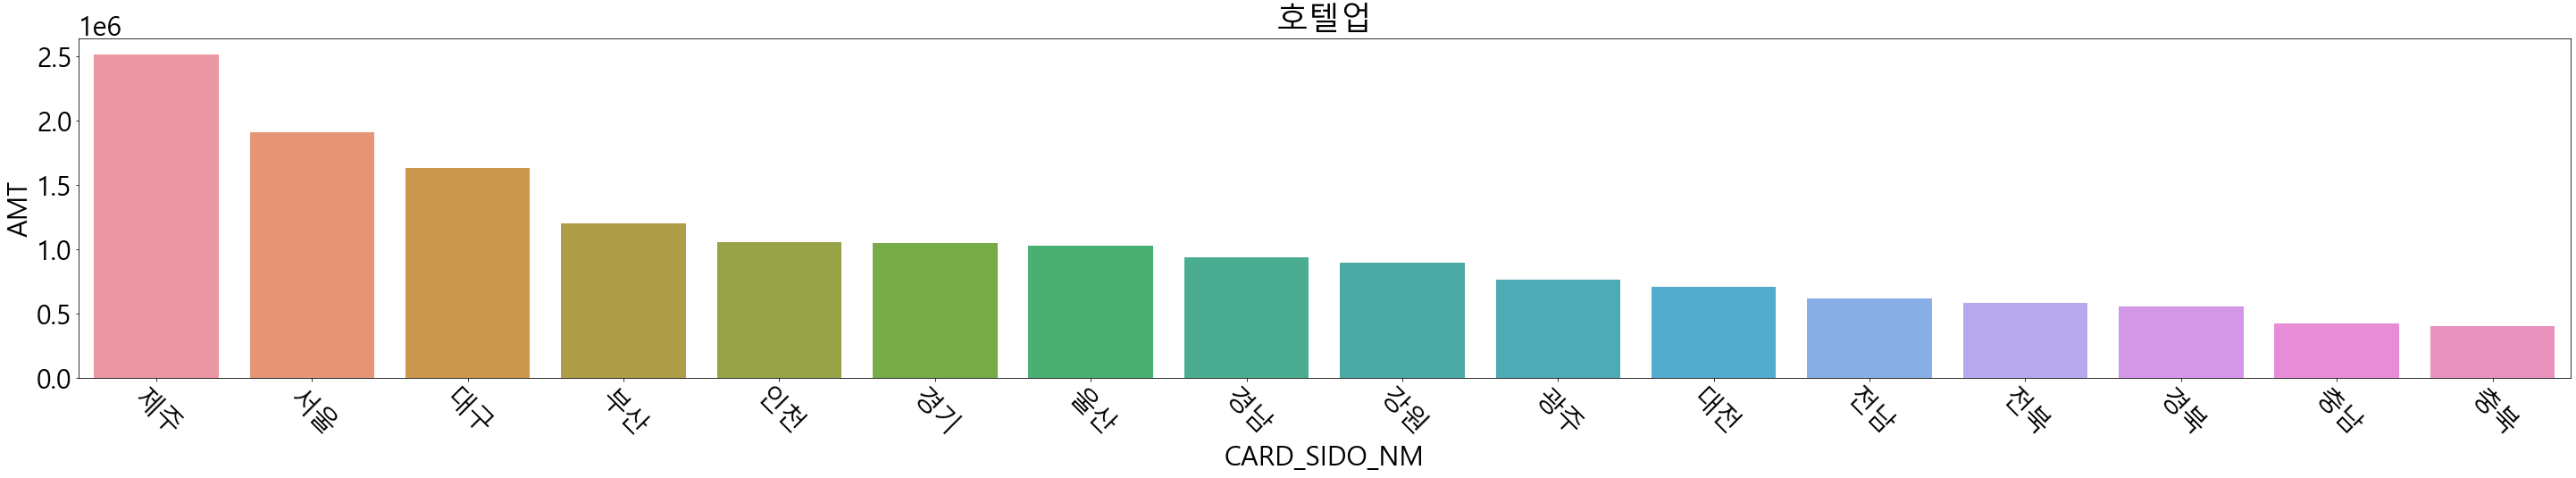

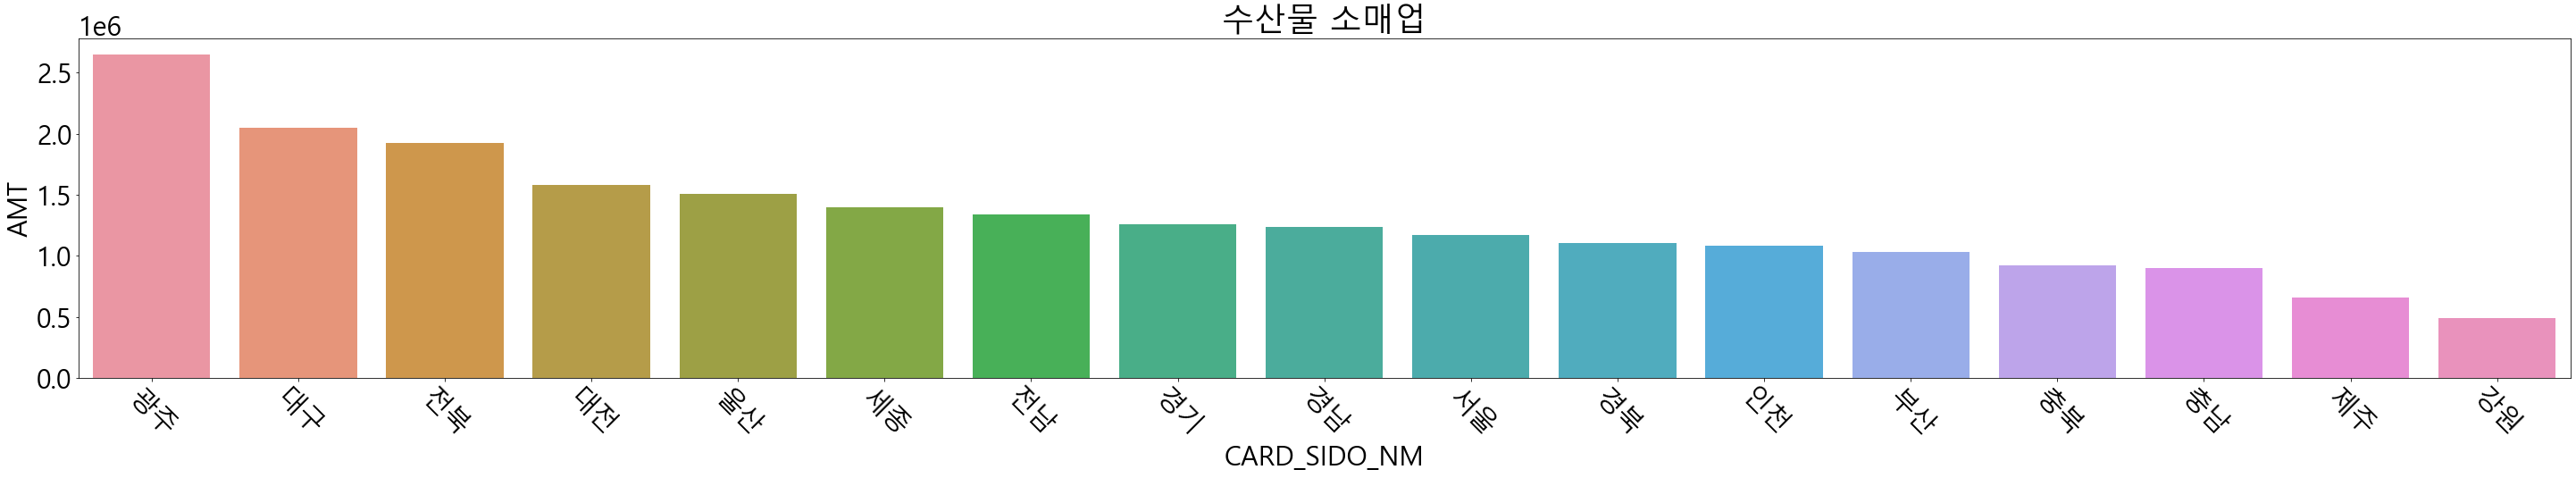

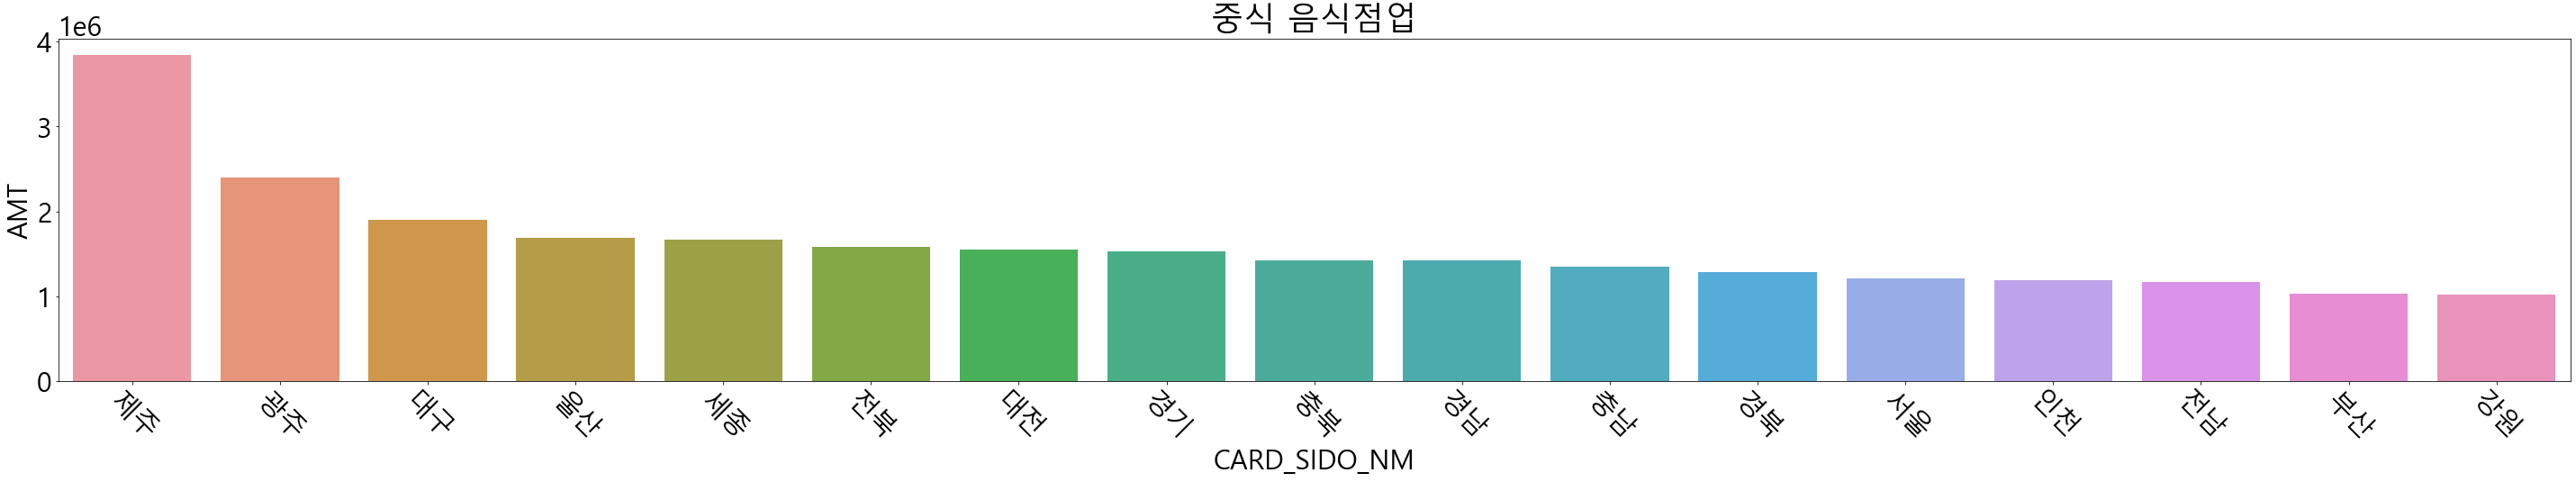

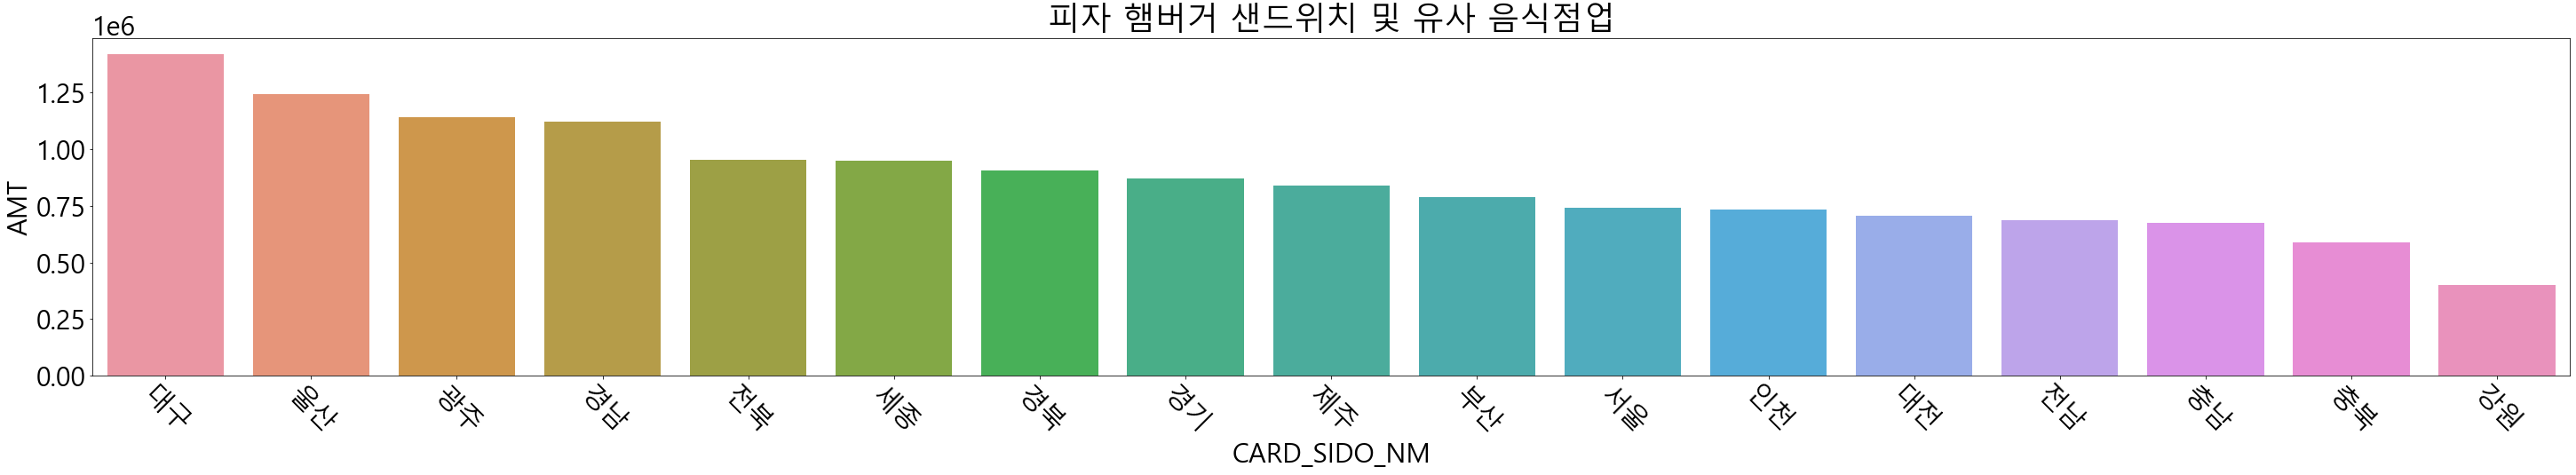

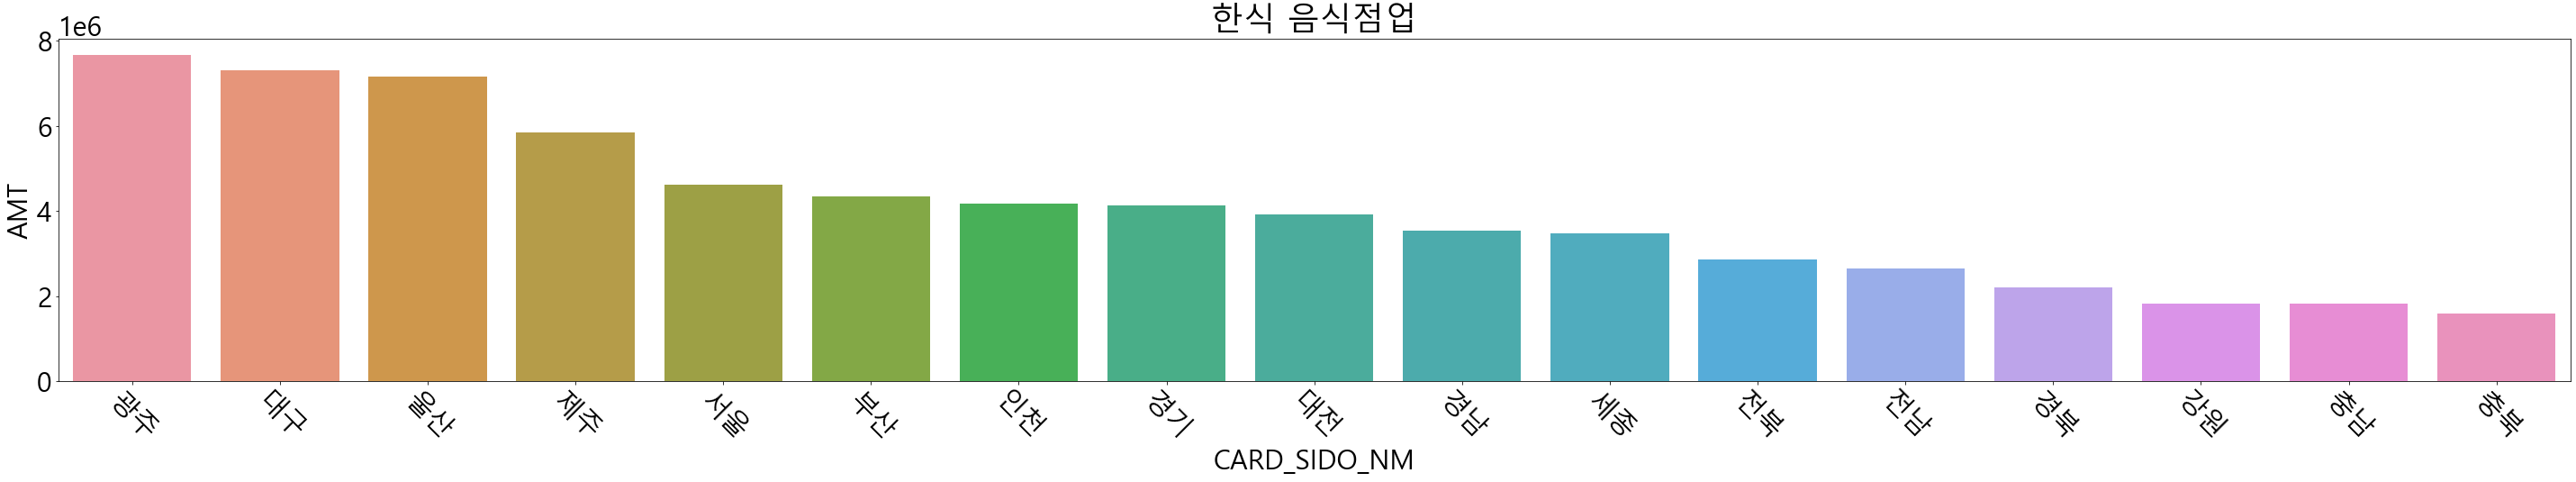

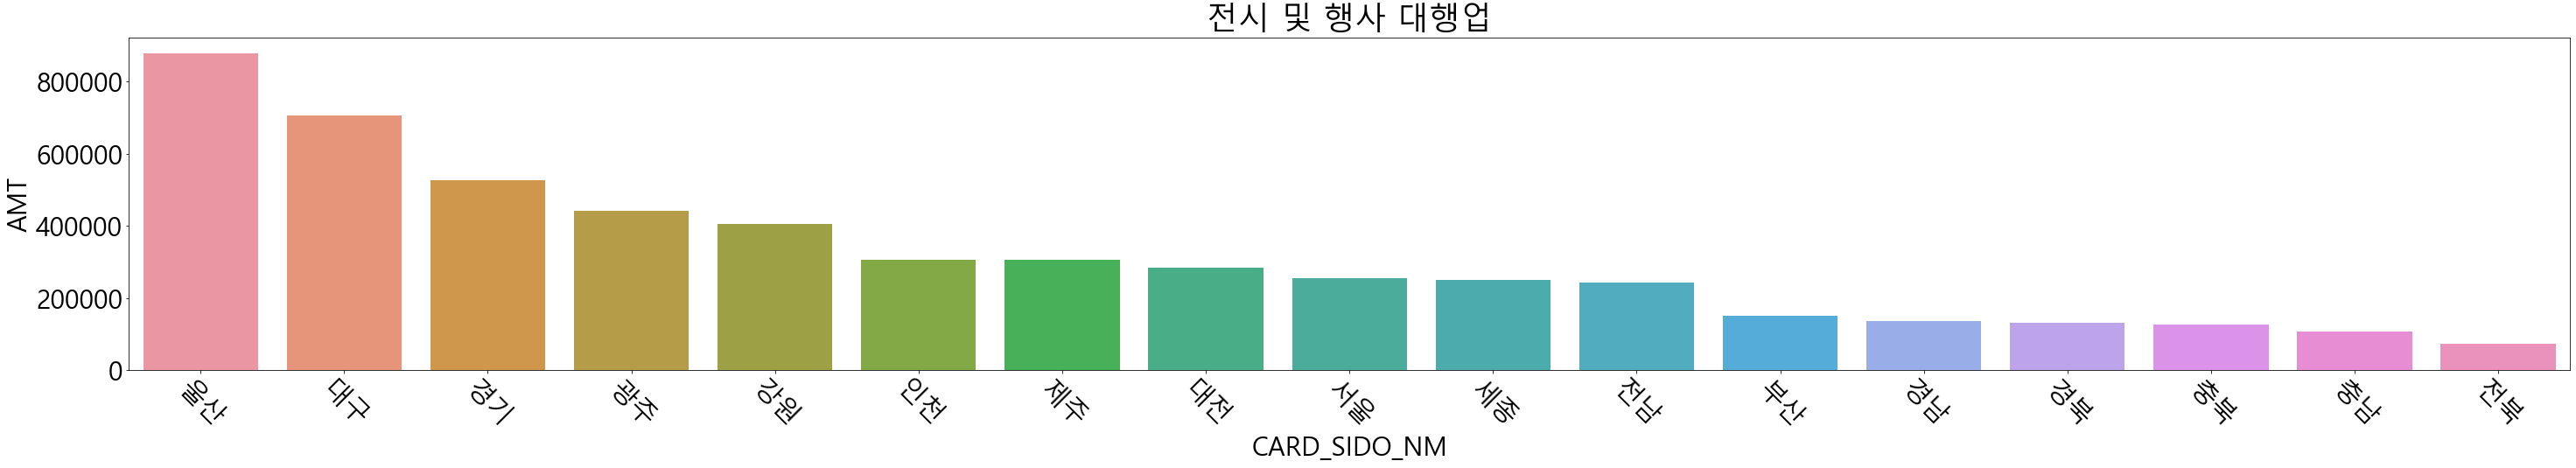

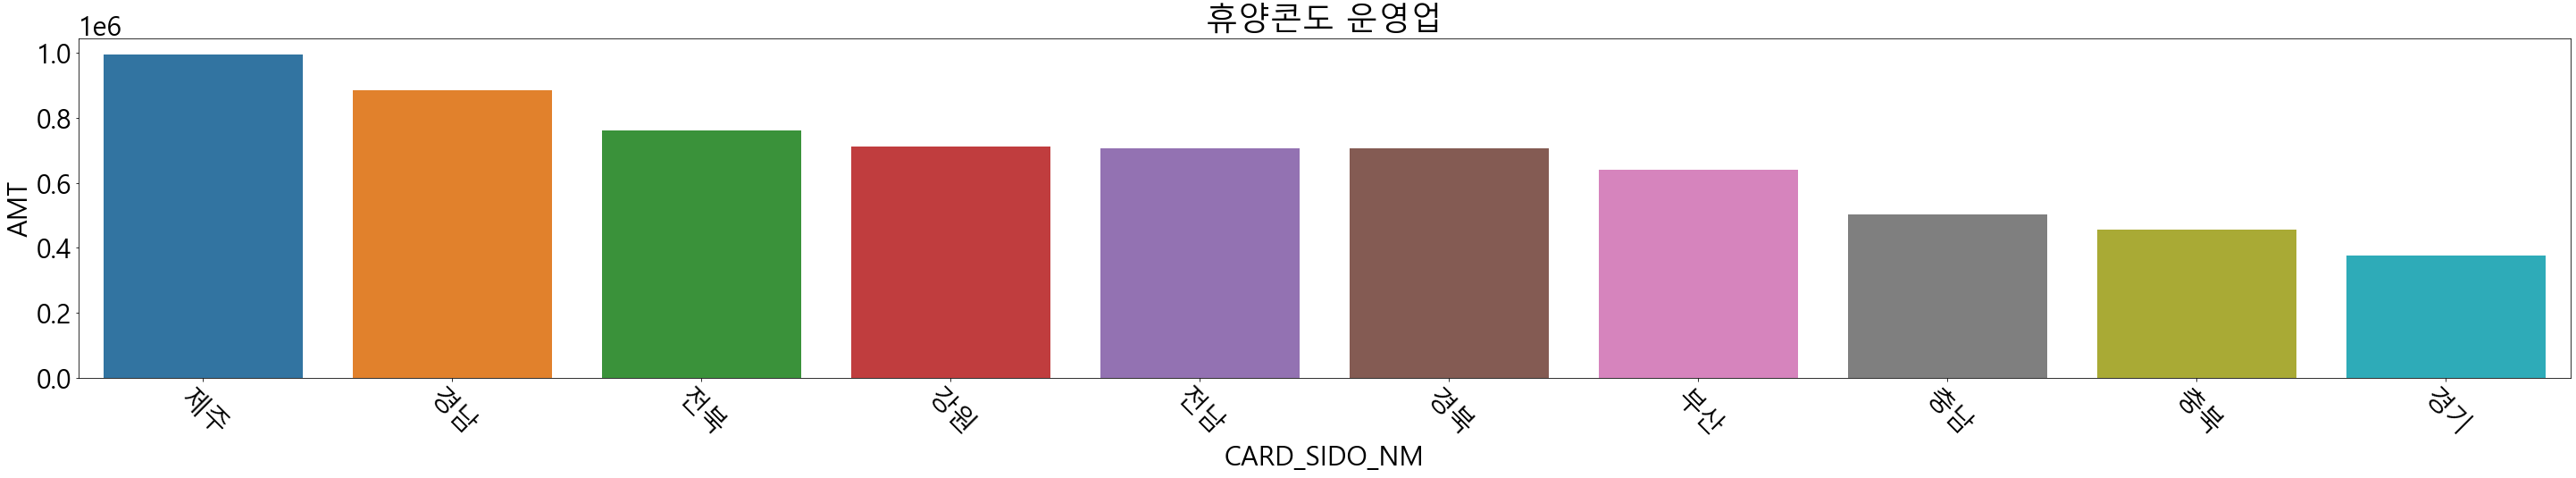

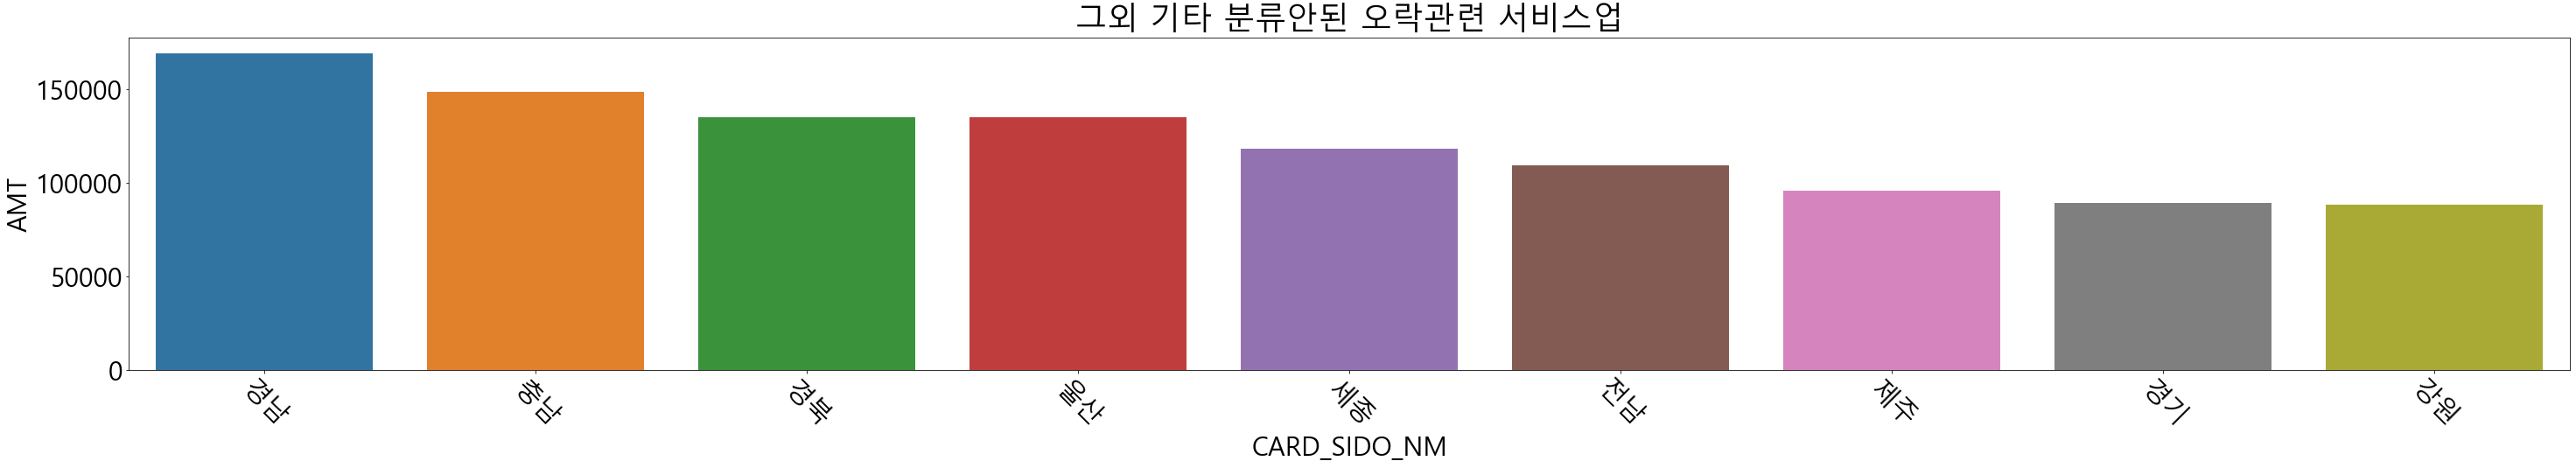

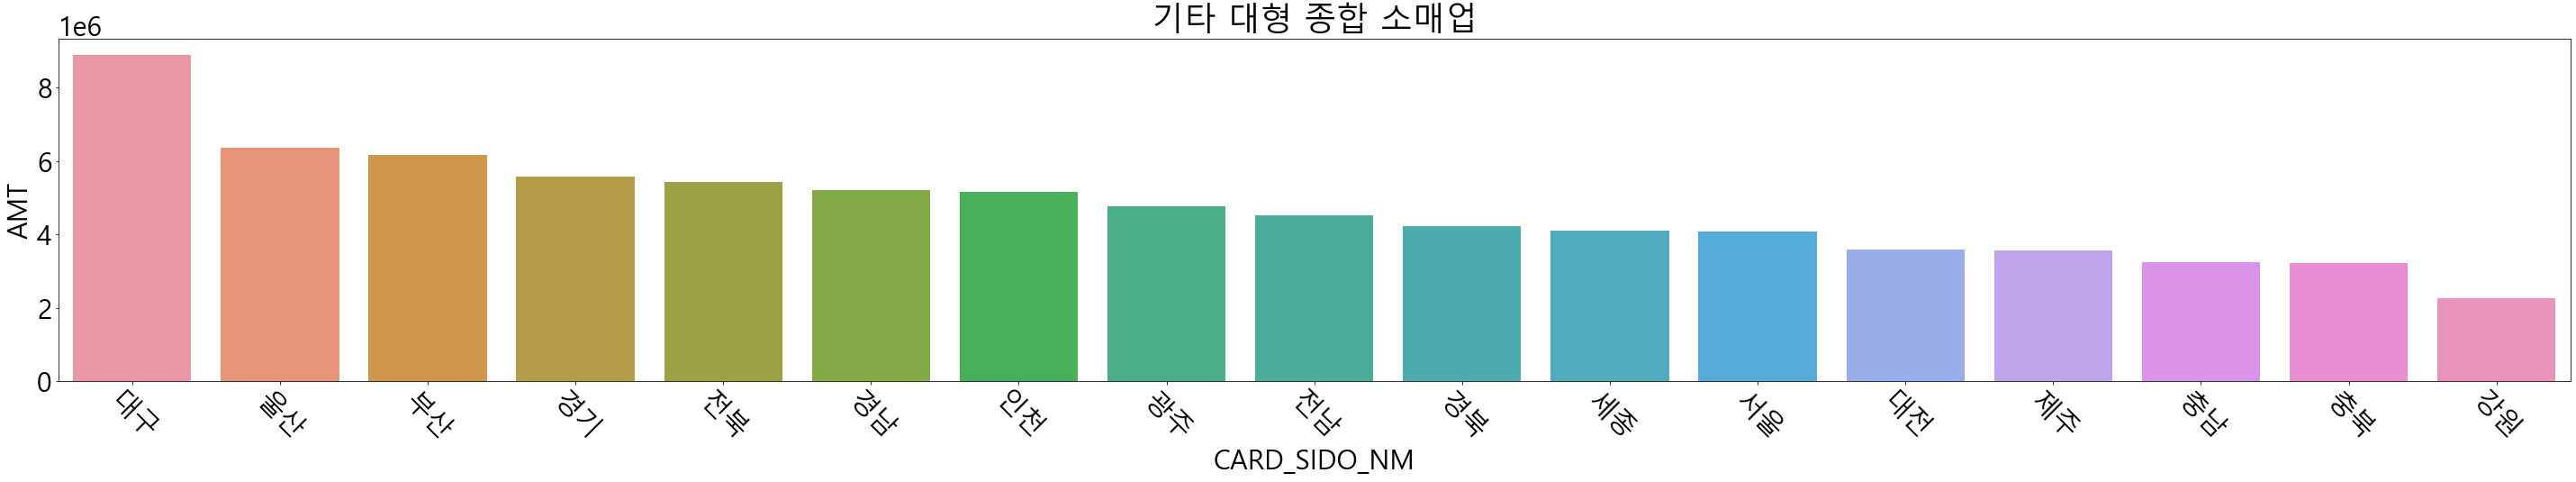

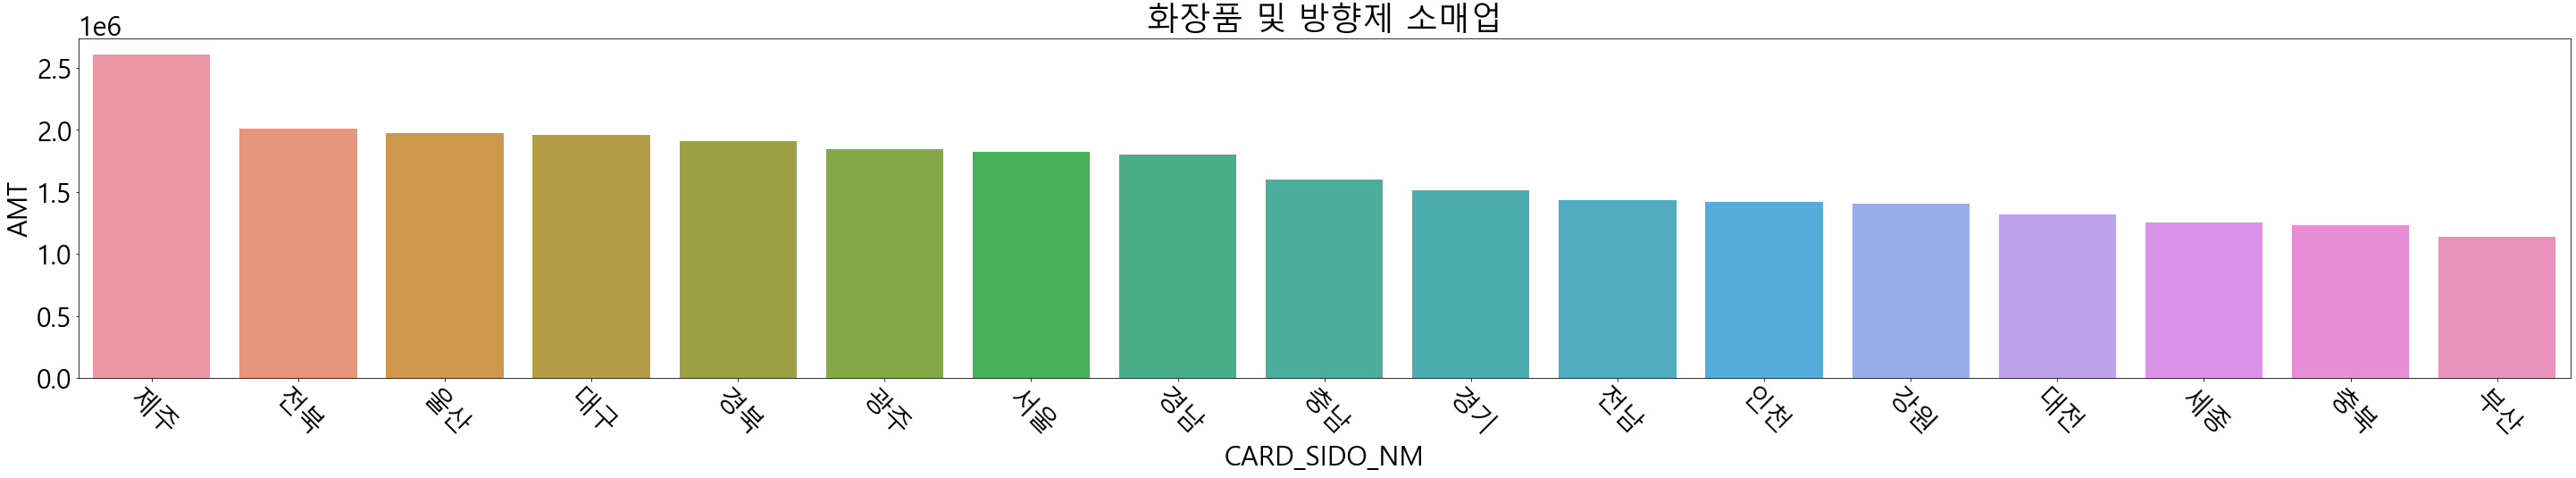

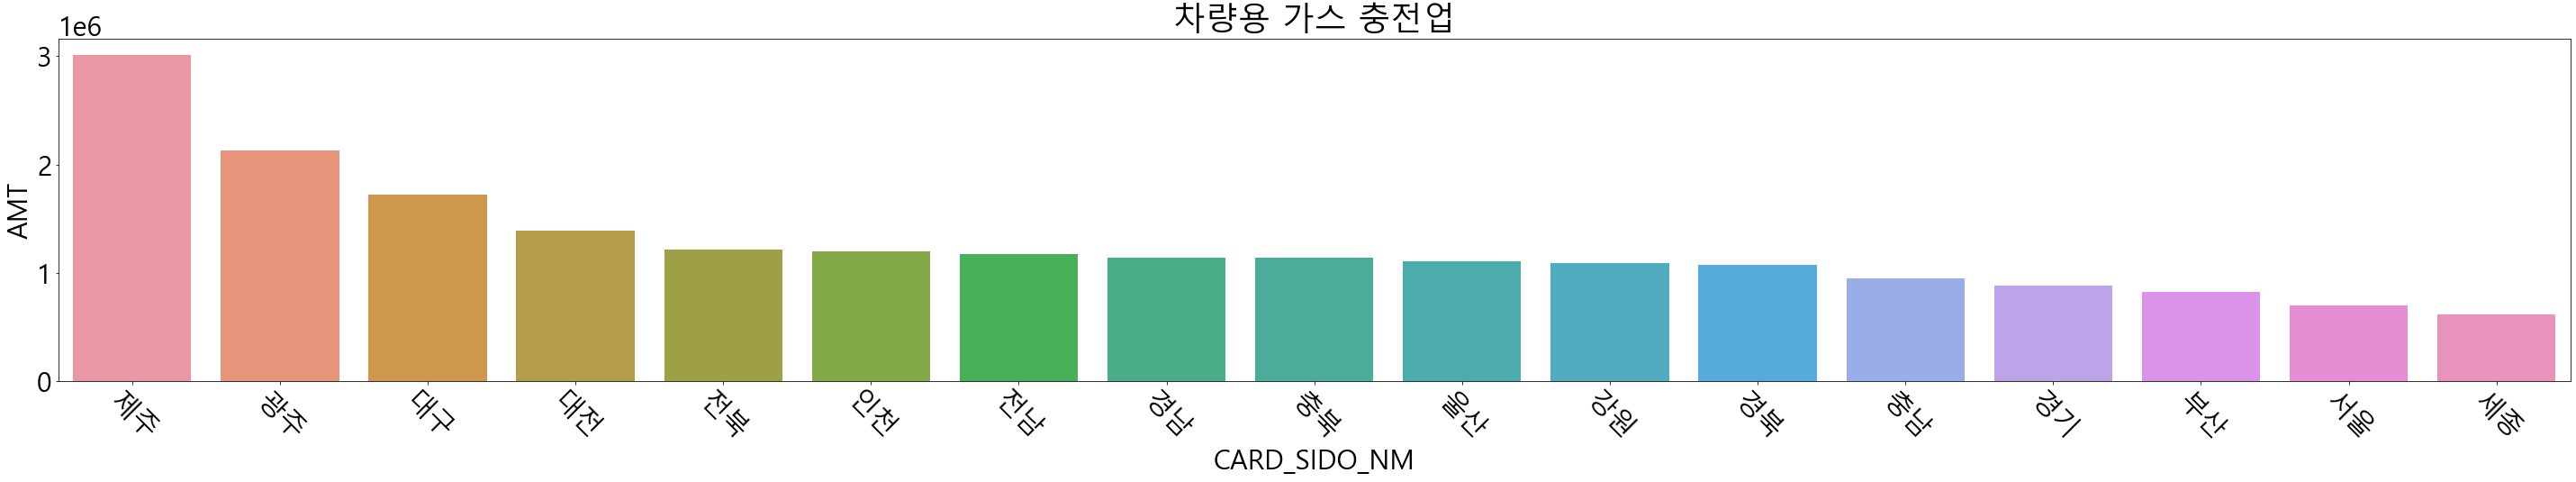

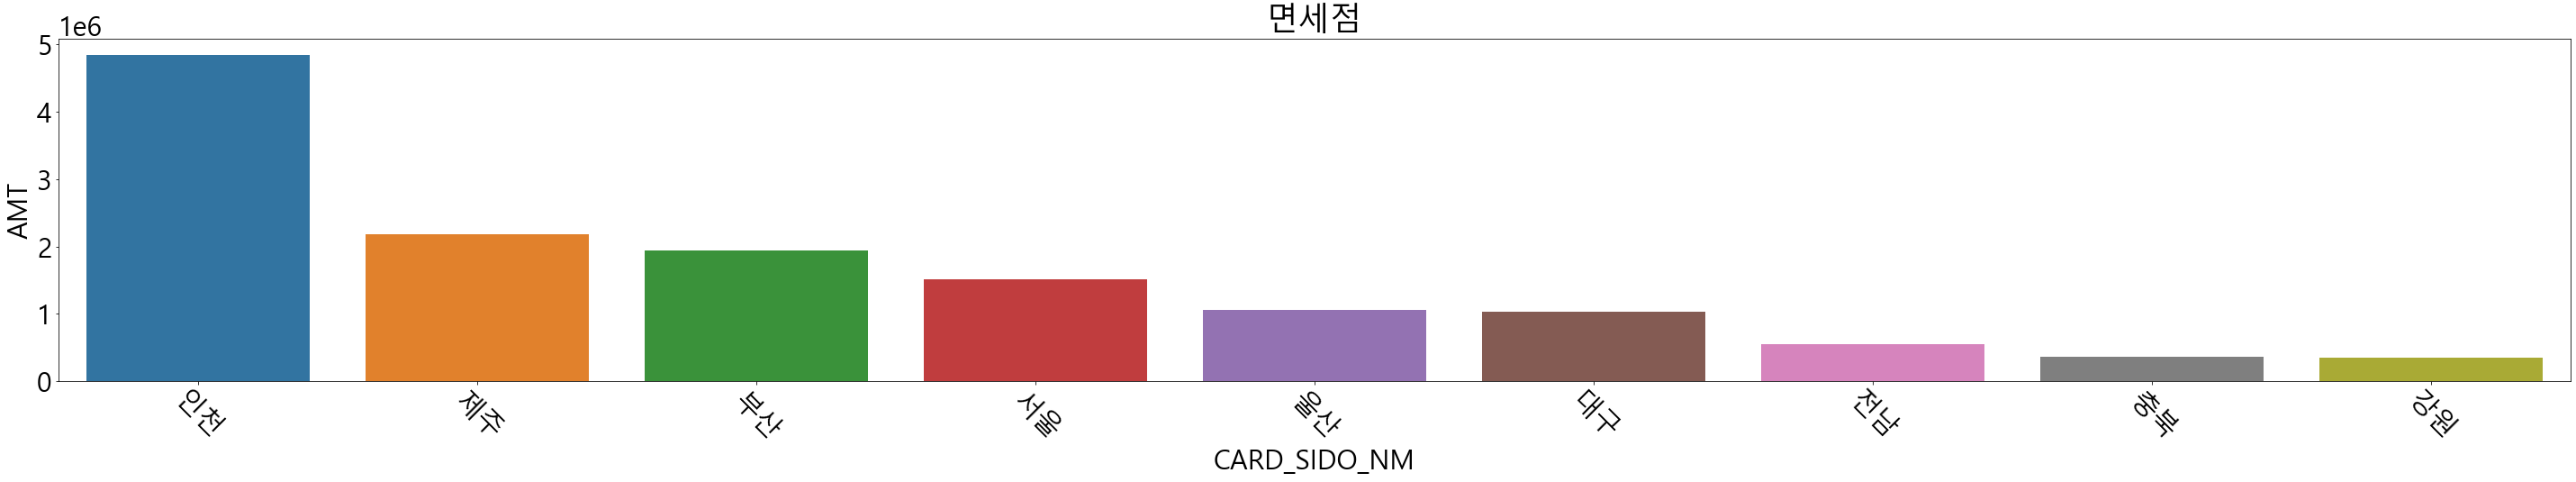

In [27]:
a = 0
for i in clss:
    data = clss_sido_amt_mean.loc[clss[a]].sort_values(by = 'AMT', ascending = False)
    plt.figure(figsize = (50,7))
    plt.rcParams.update({'font.size': 30})
    plt.xticks(rotation = - 45 )
    b = sns.barplot(data= data, x= data.index, y= 'AMT')
    plt.title(i)
    a+=1

In [30]:
# 시도추출
sido = train['CARD_SIDO_NM']

sido = list(sido)
sido = set(sido)
sido = list(sido)
sido

['제주',
 '세종',
 '경북',
 '대구',
 '서울',
 '인천',
 '광주',
 '경남',
 '대전',
 '충남',
 '강원',
 '울산',
 '전북',
 '경기',
 '부산',
 '충북',
 '전남']

In [28]:
sido_clss_amt_mean = train.groupby(['CARD_SIDO_NM','STD_CLSS_NM'])['AMT'].mean()
sido_clss_amt_mean = pd.DataFrame(sido_clss_amt_mean)


In [34]:
sido_clss_amt_mean.loc[sido[1]].sort_values(by = 'AMT', ascending = False)

AMT
STD_CLSS_NM                        
차량용 주유소 운영업           5563494.66730
기타 대형 종합 소매업          4114089.54817
기타음식료품위주종합소매업         3754698.79923
한식 음식점업               3477398.80023
육류 소매업                3098471.41889
슈퍼마켓                  3070826.47850
스포츠 및 레크레이션 용품 임대업    3068185.77389
일반유흥 주점업              2808609.05556
과실 및 채소 소매업           2726869.35758
일식 음식점업               1951210.20460
기타 외국식 음식점업           1925602.90208
기타 주점업                1903330.50847
골프장 운영업               1903221.92513
중식 음식점업               1662621.63470
건강보조식품 소매업            1536247.06897
수산물 소매업               1396917.80717
체인화 편의점               1317888.41197
화장품 및 방향제 소매업         1256121.50989
서양식 음식점업              1142066.28833
피자 햄버거 샌드위치 및 유사 음식점업  947625.77203
마사지업                   937102.34375
빵 및 과자류 소매업            870746.76530
비알콜 음료점업               689891.76374
욕탕업                    647322.16931
차량용 가스 충전업             616040.70919
여관업                    454633.59204
그외 기타 종합 소매업           439135.95731
전시 및 행사 대행업            249019.79290
그외 기타 스포츠시설 운영업        168000.00000
그외 기타 분류안된 오락관련 서비스업   118000.00000
관광 민예품 및 선물용품 소매업      108631.63265
기타 수상오락 서비스업            68200.00000

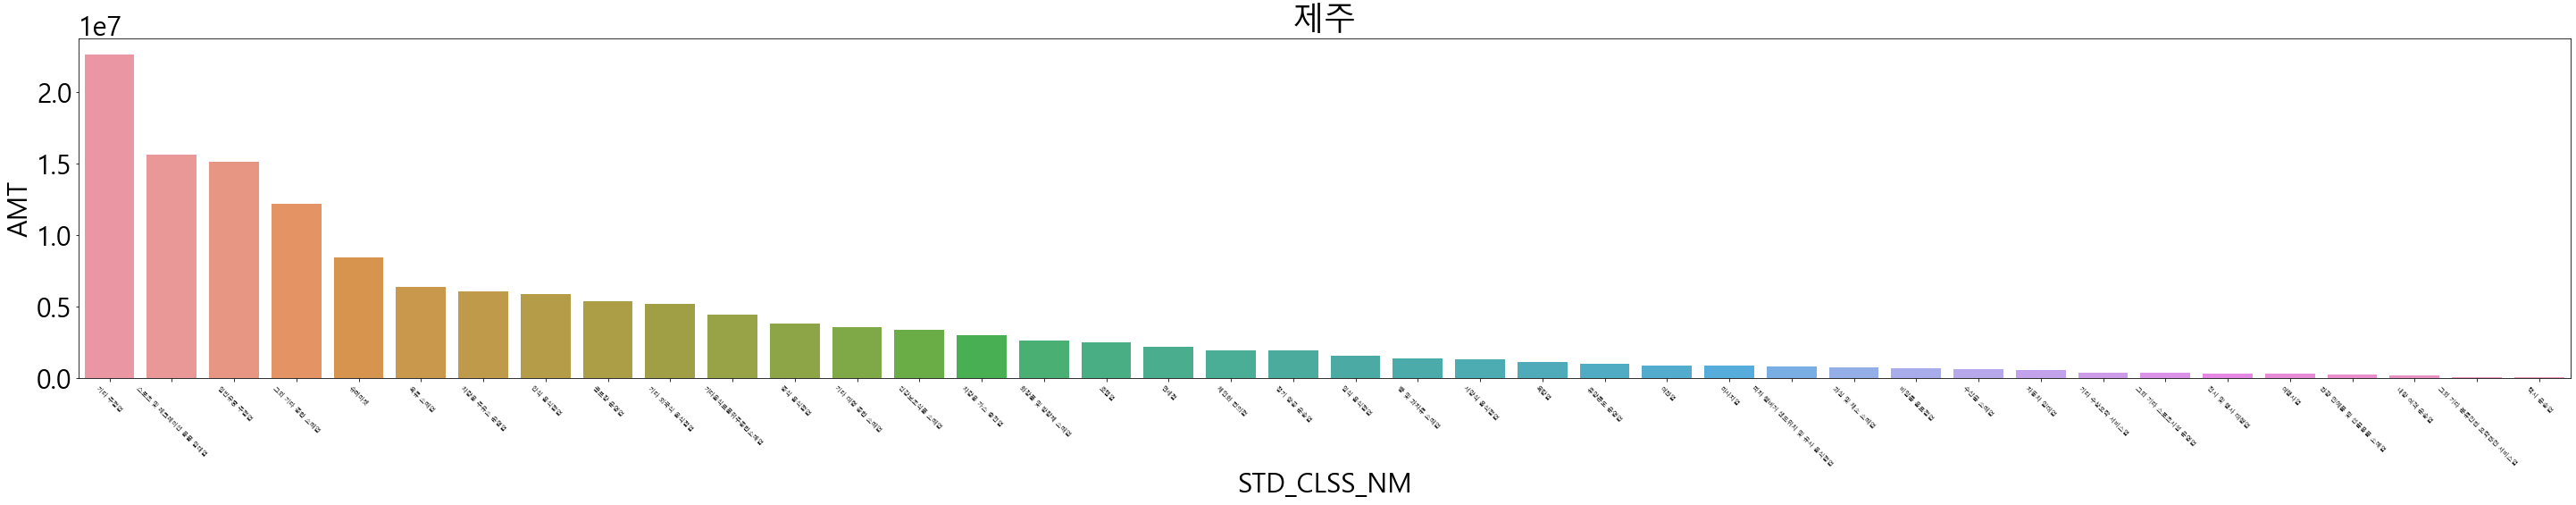

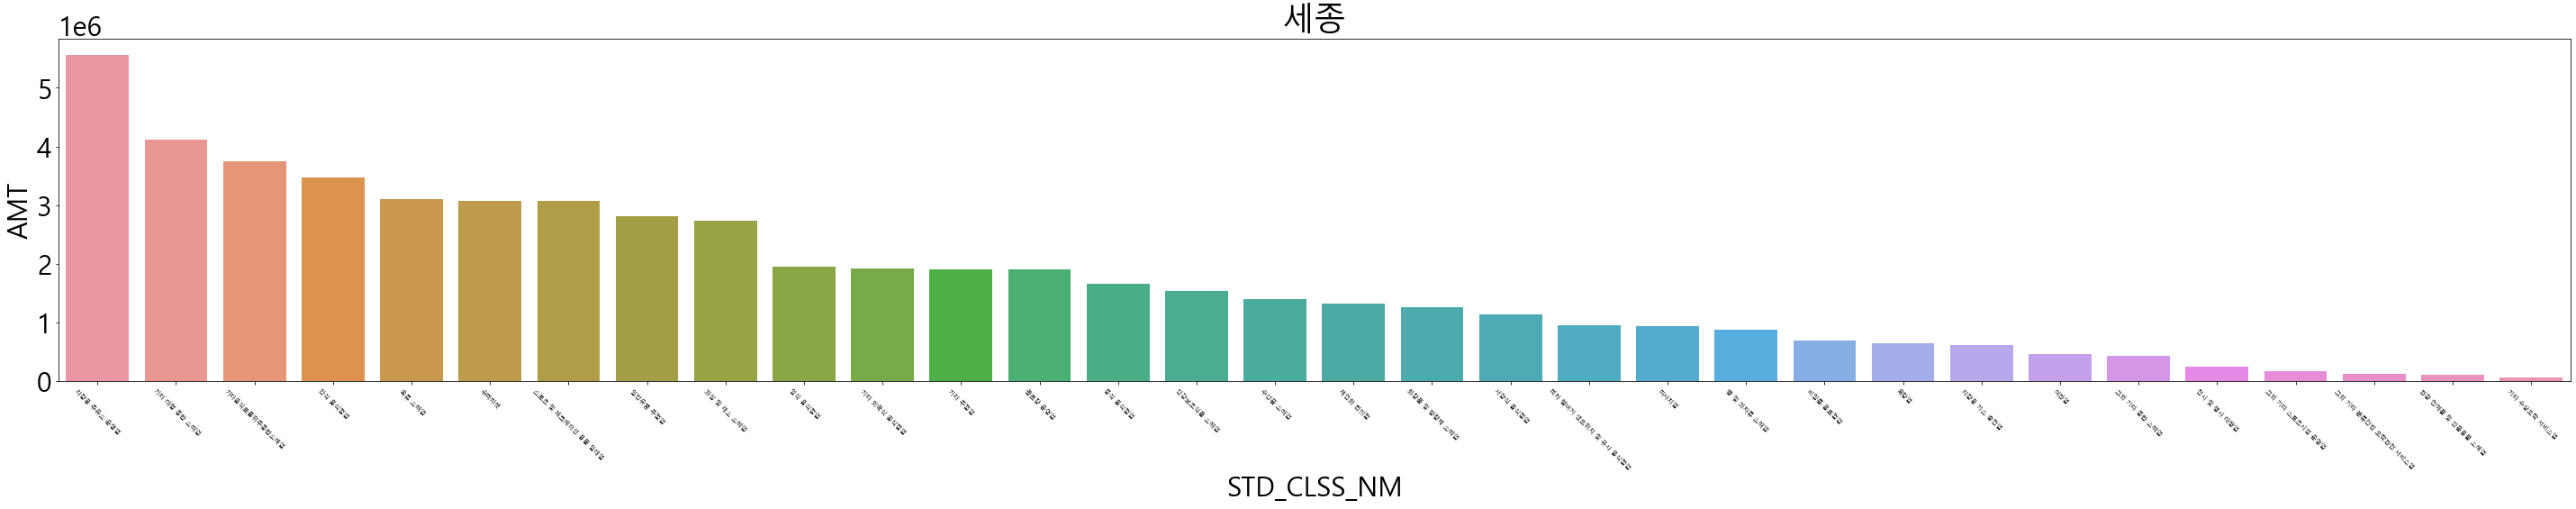

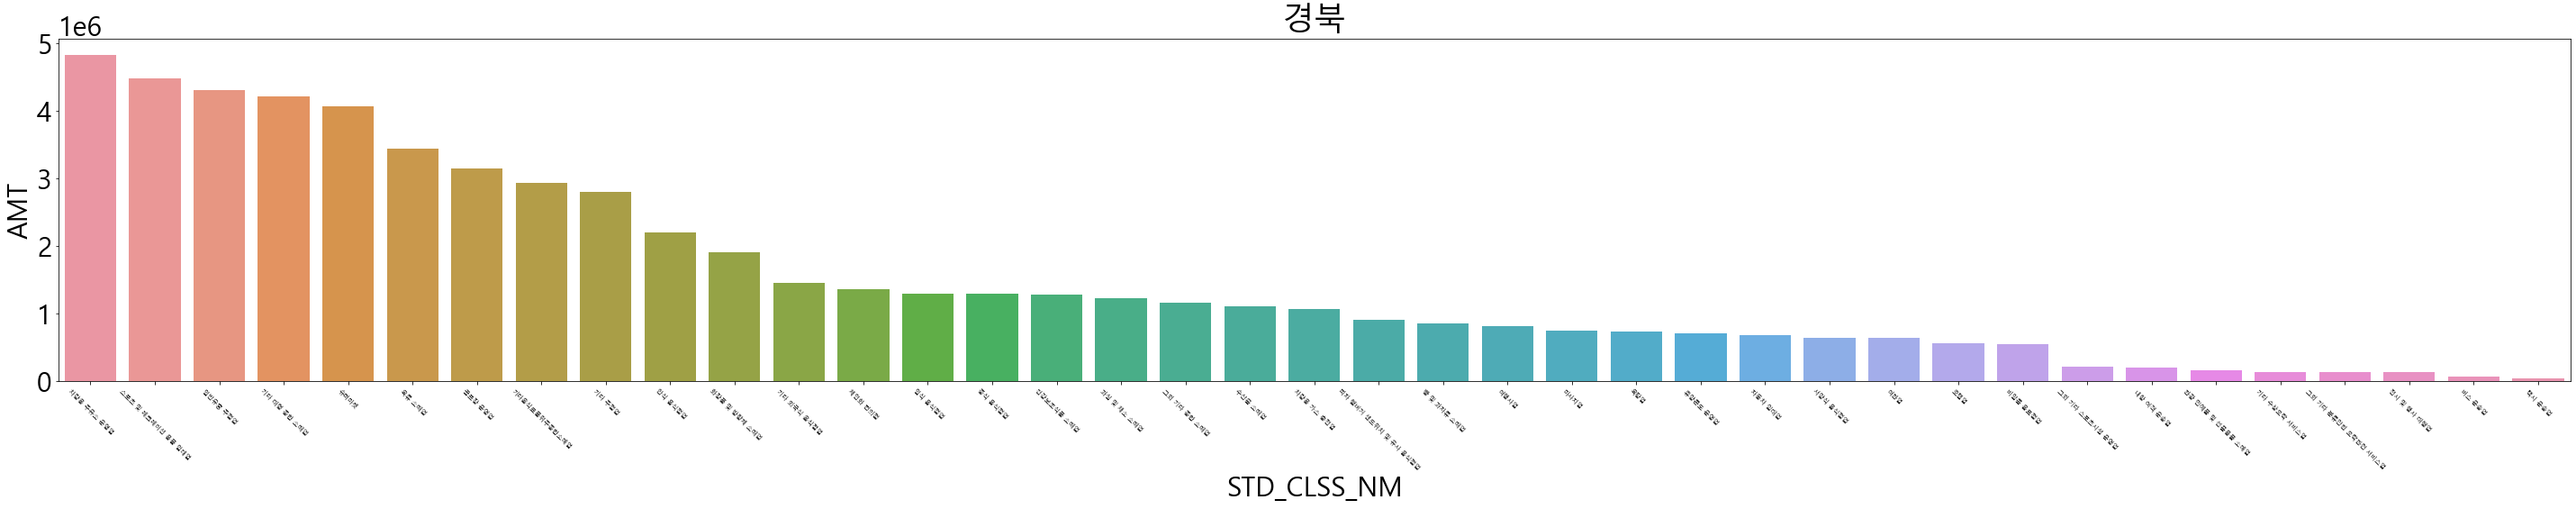

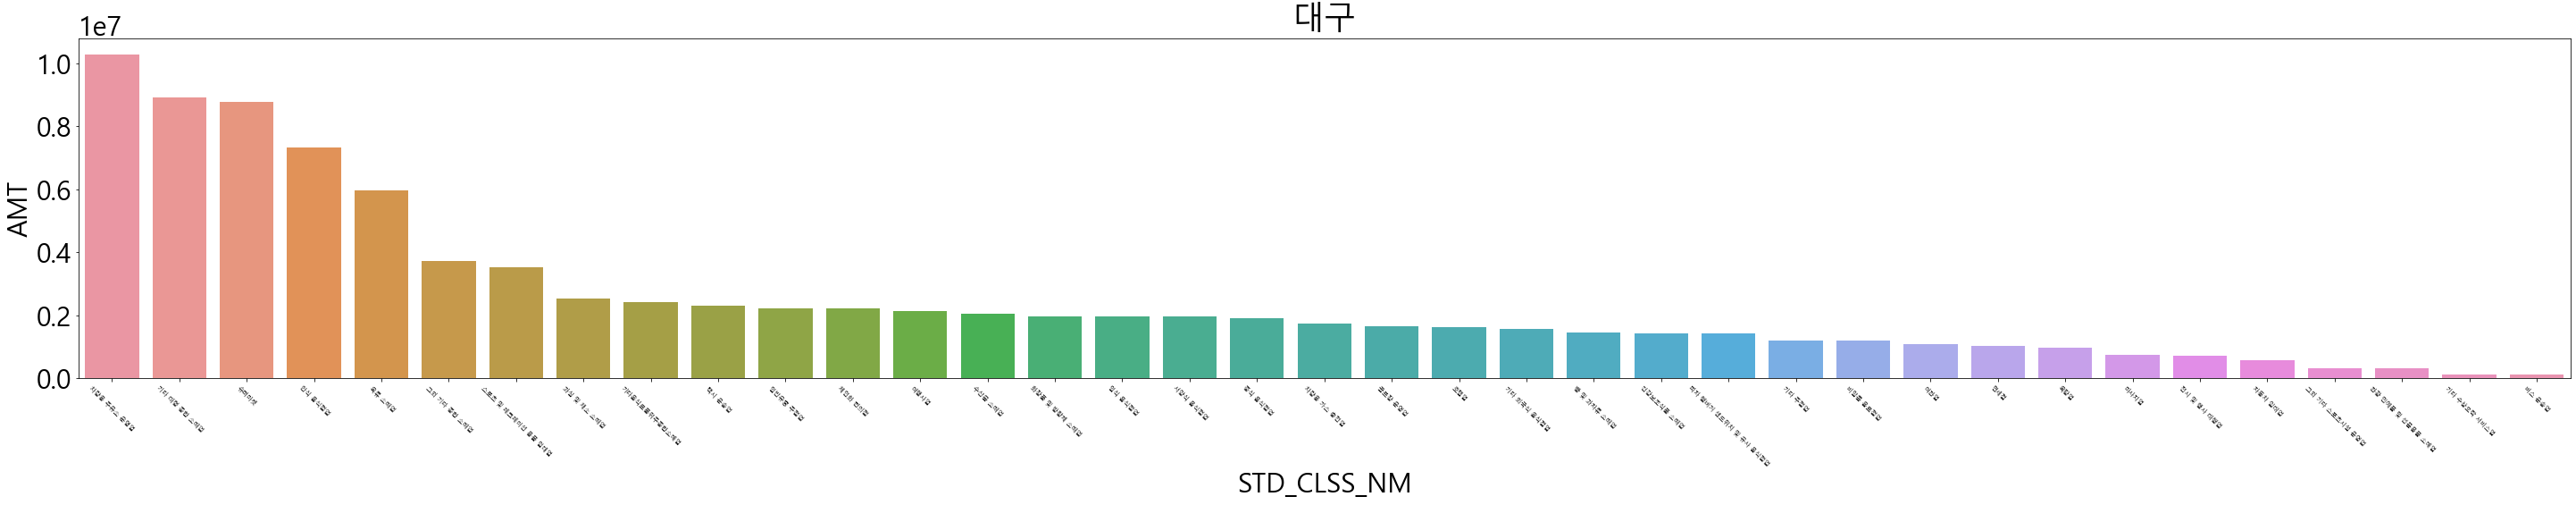

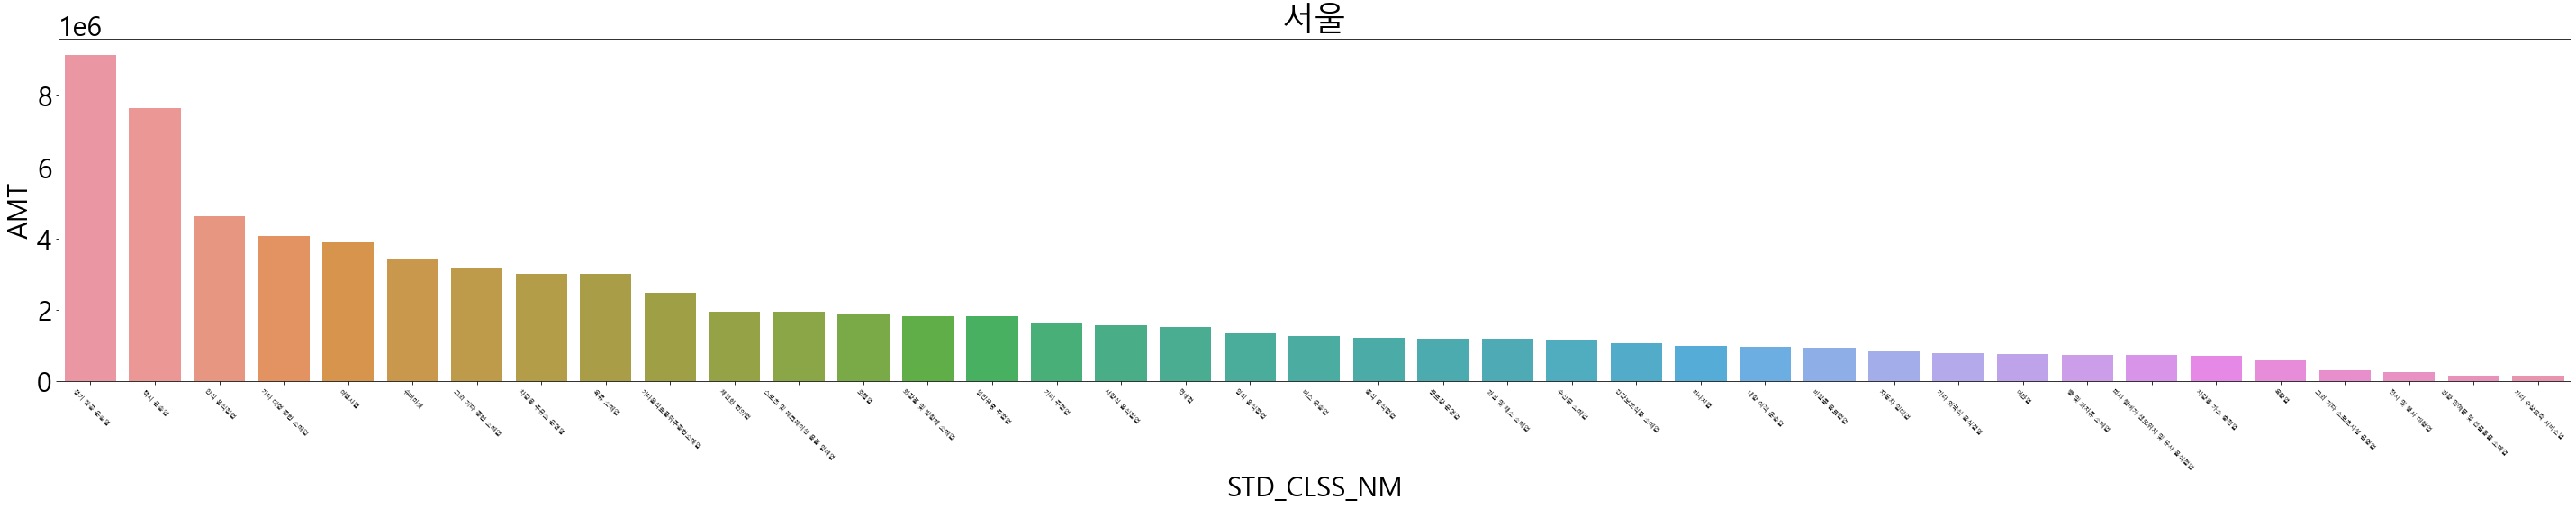

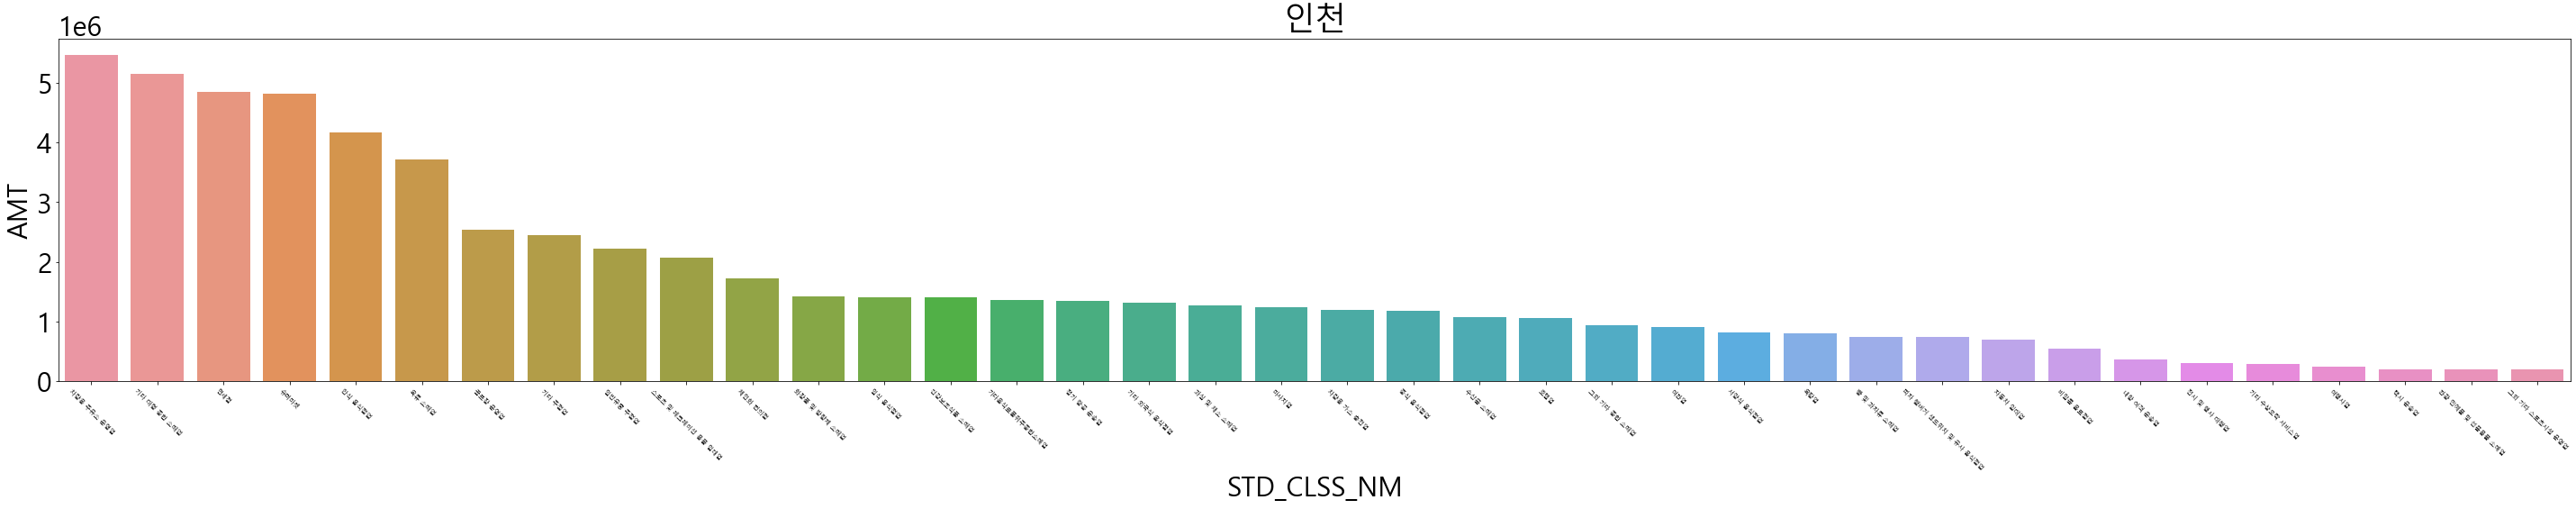

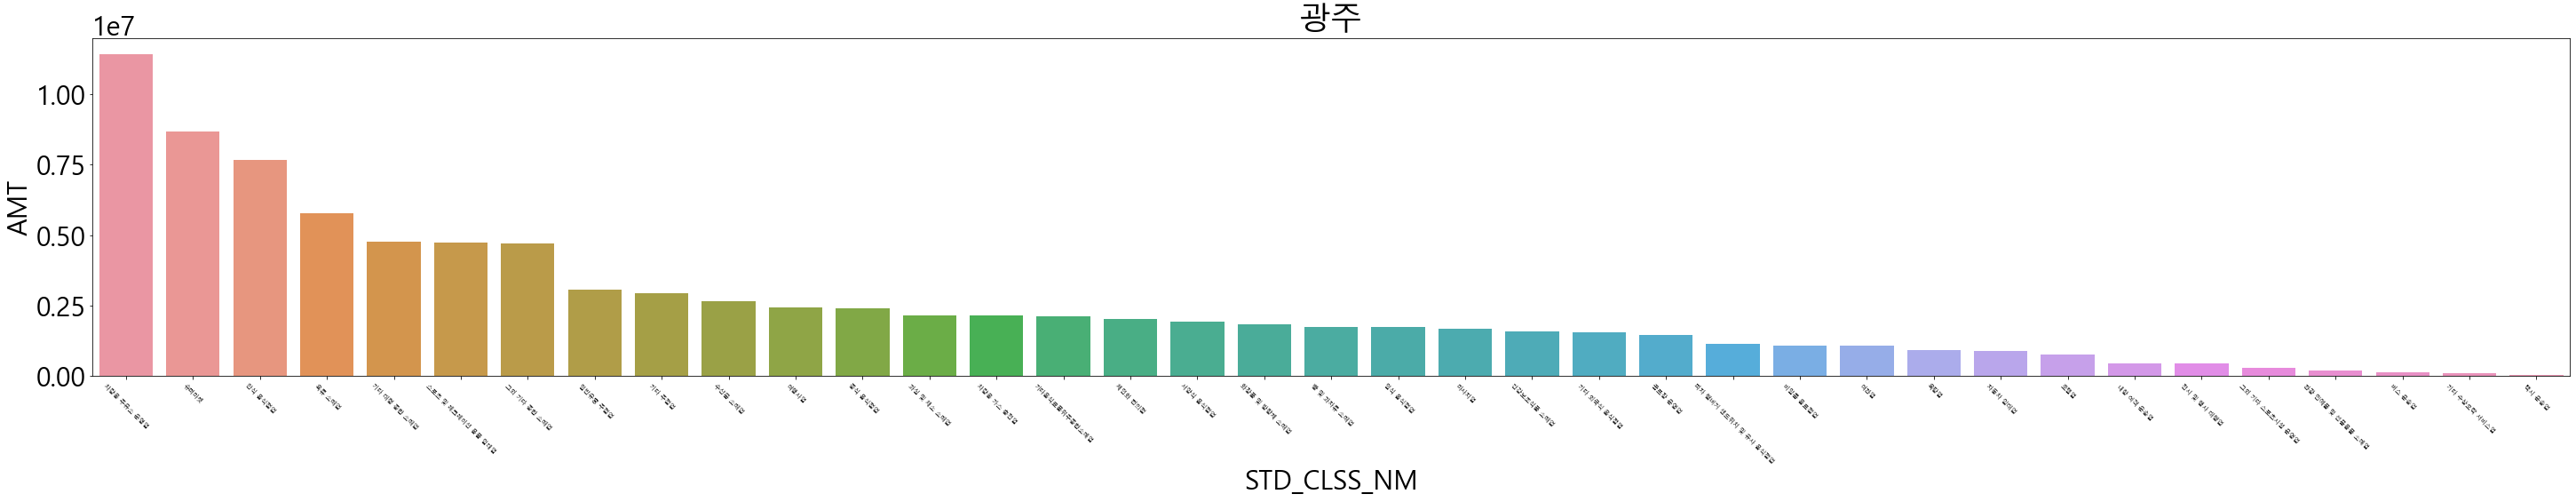

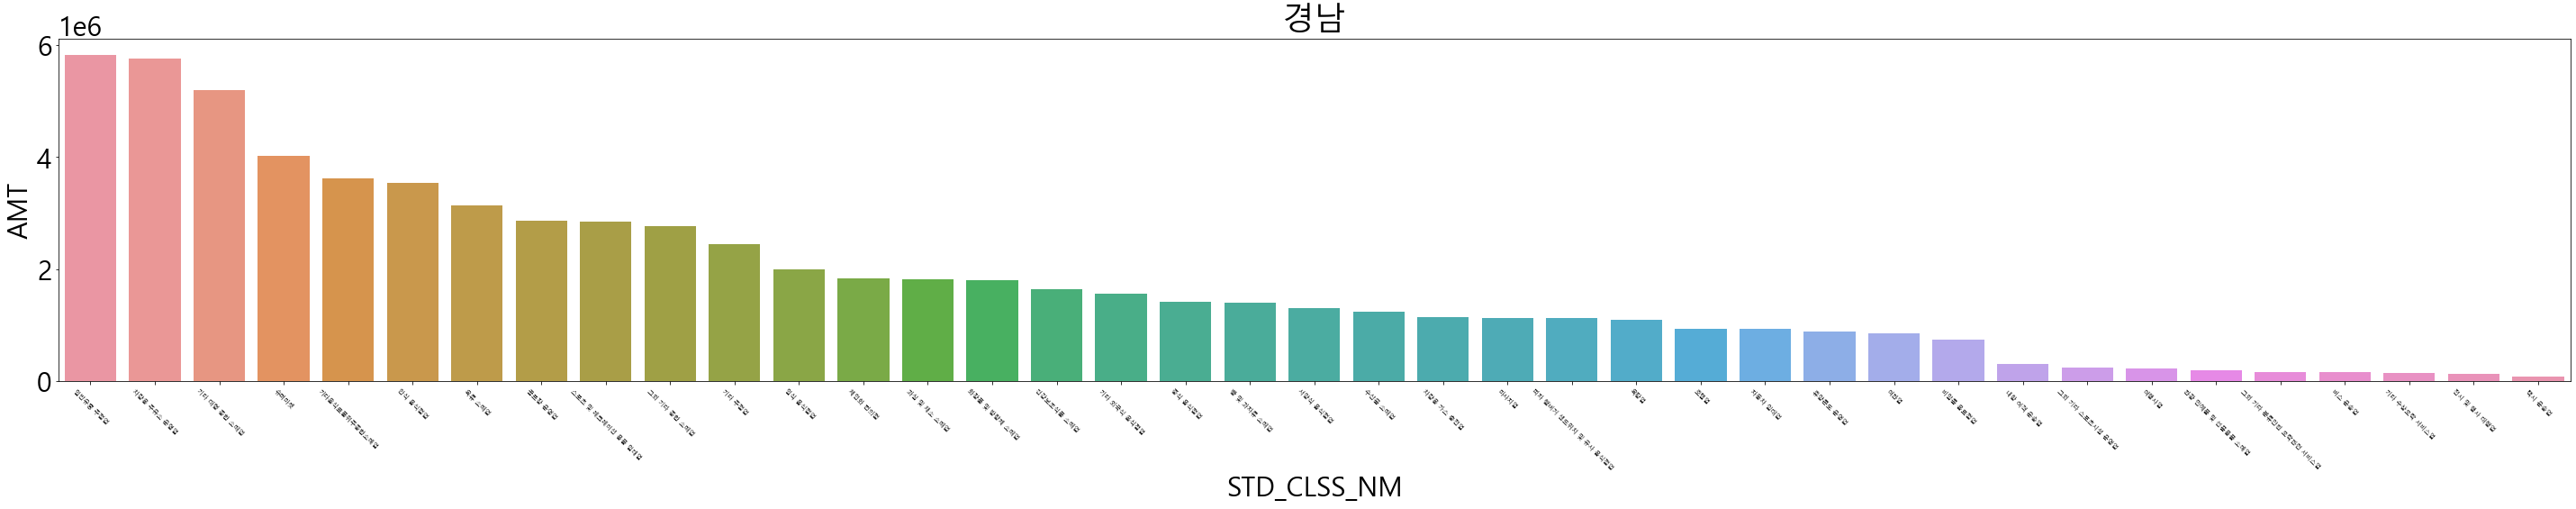

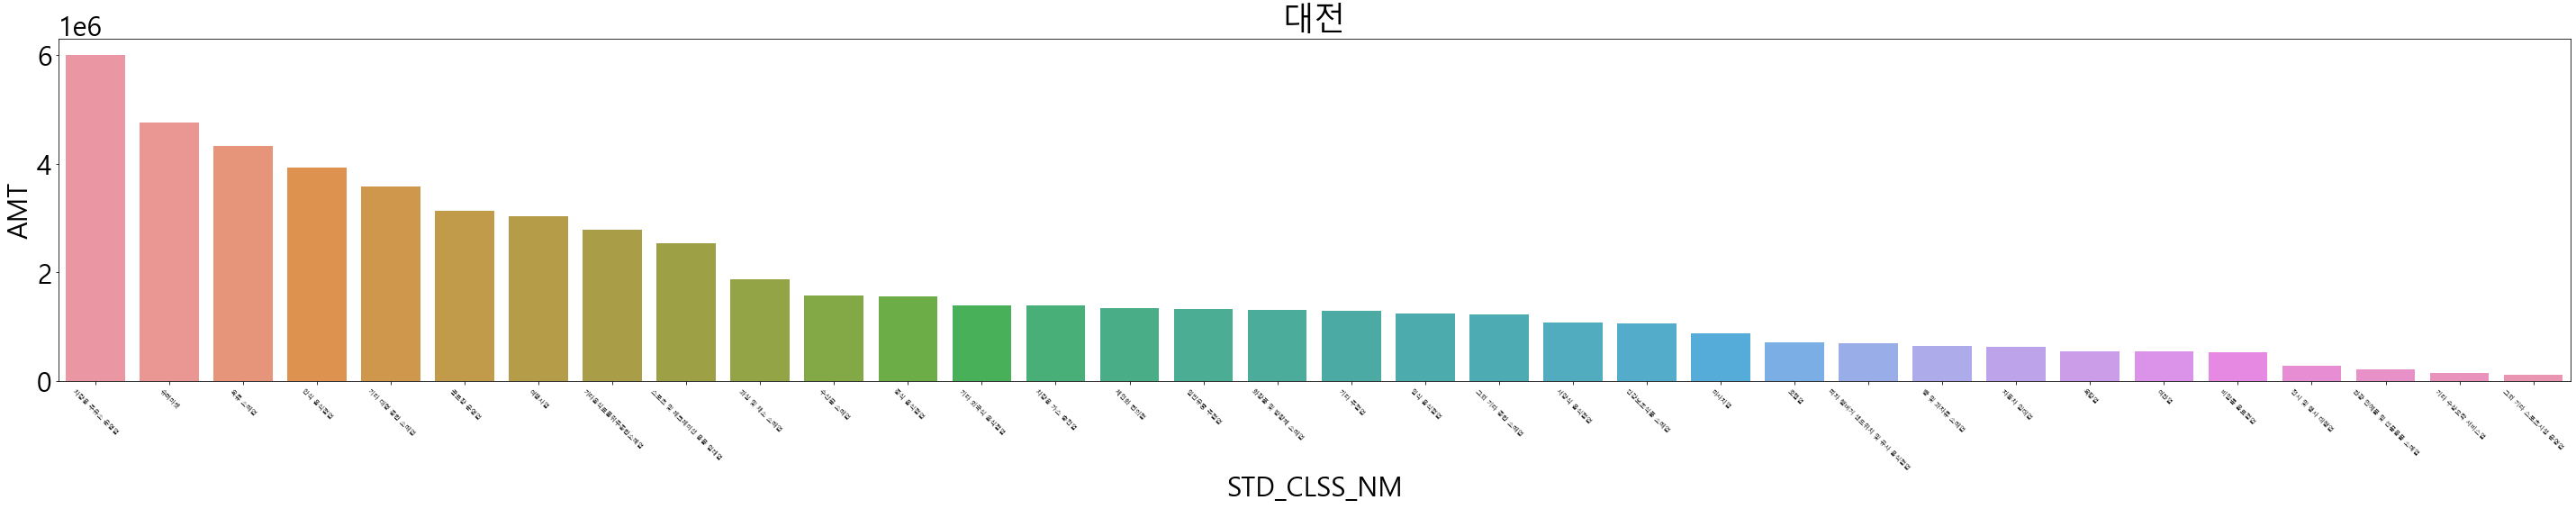

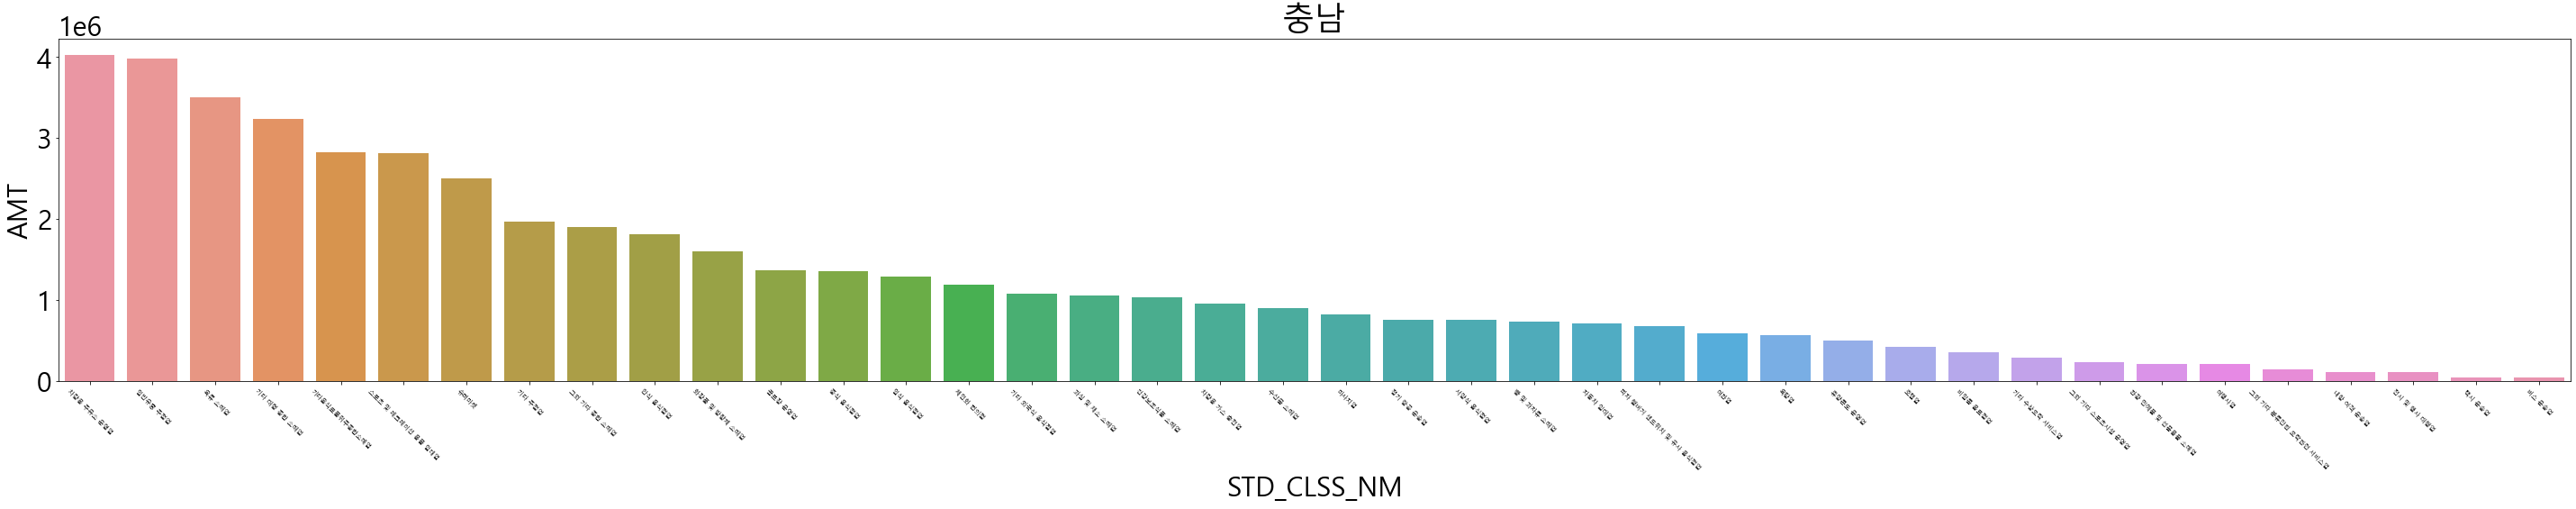

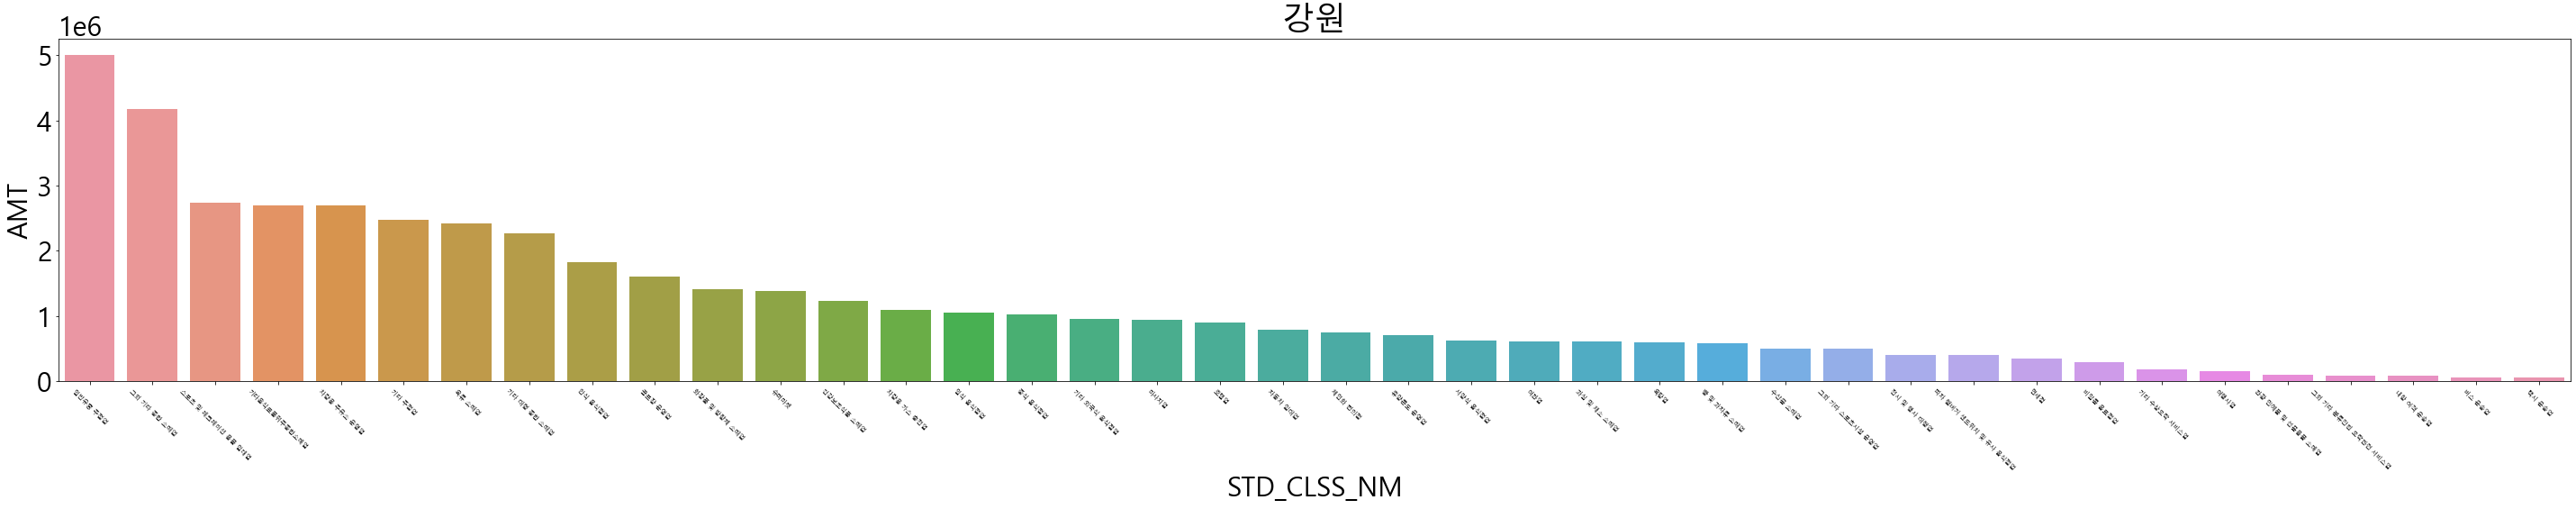

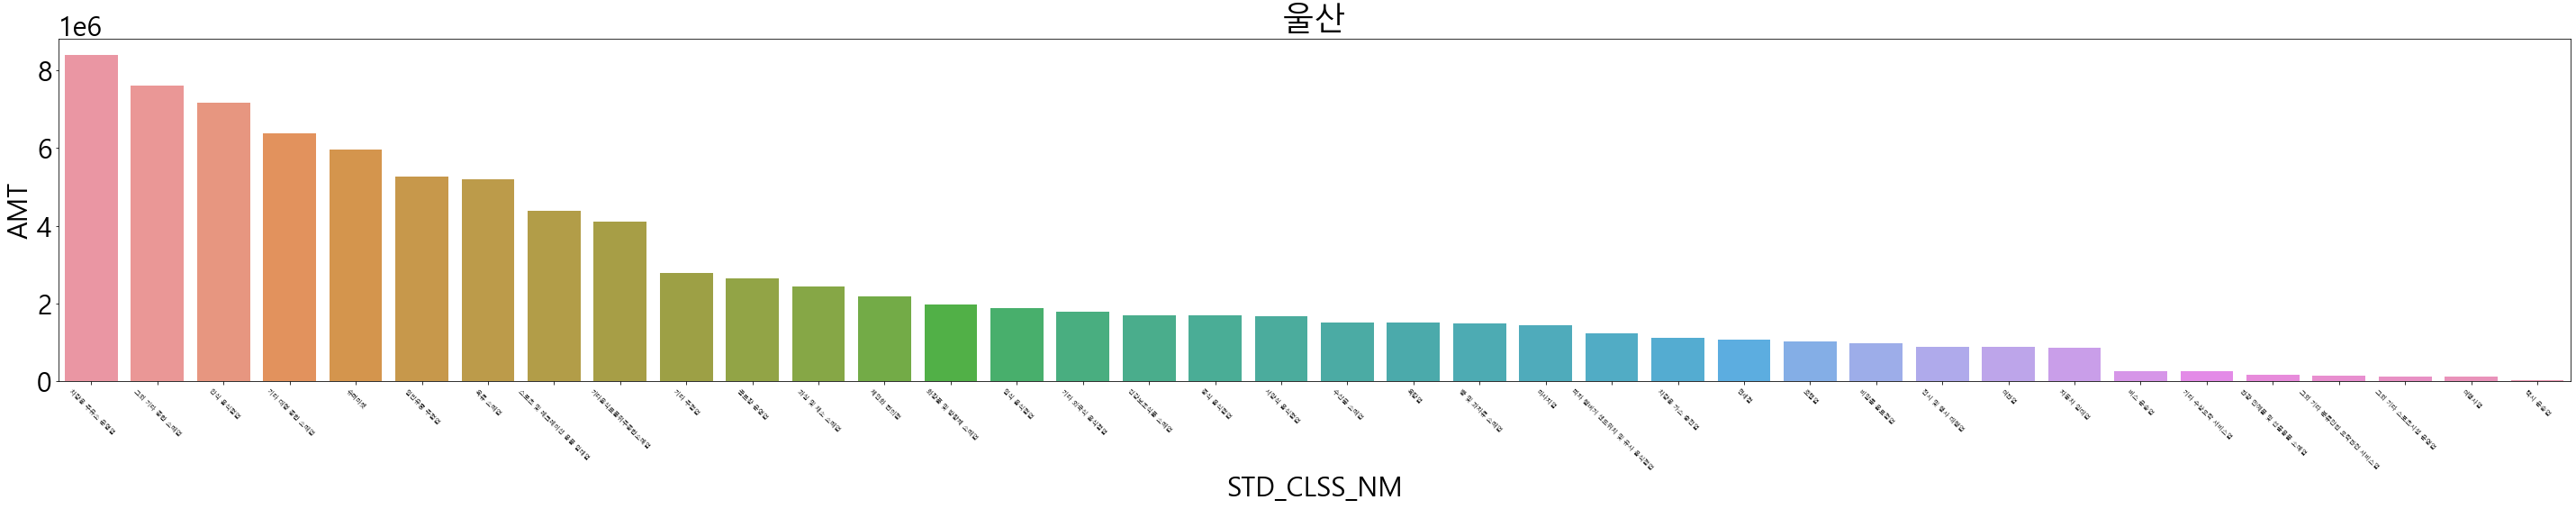

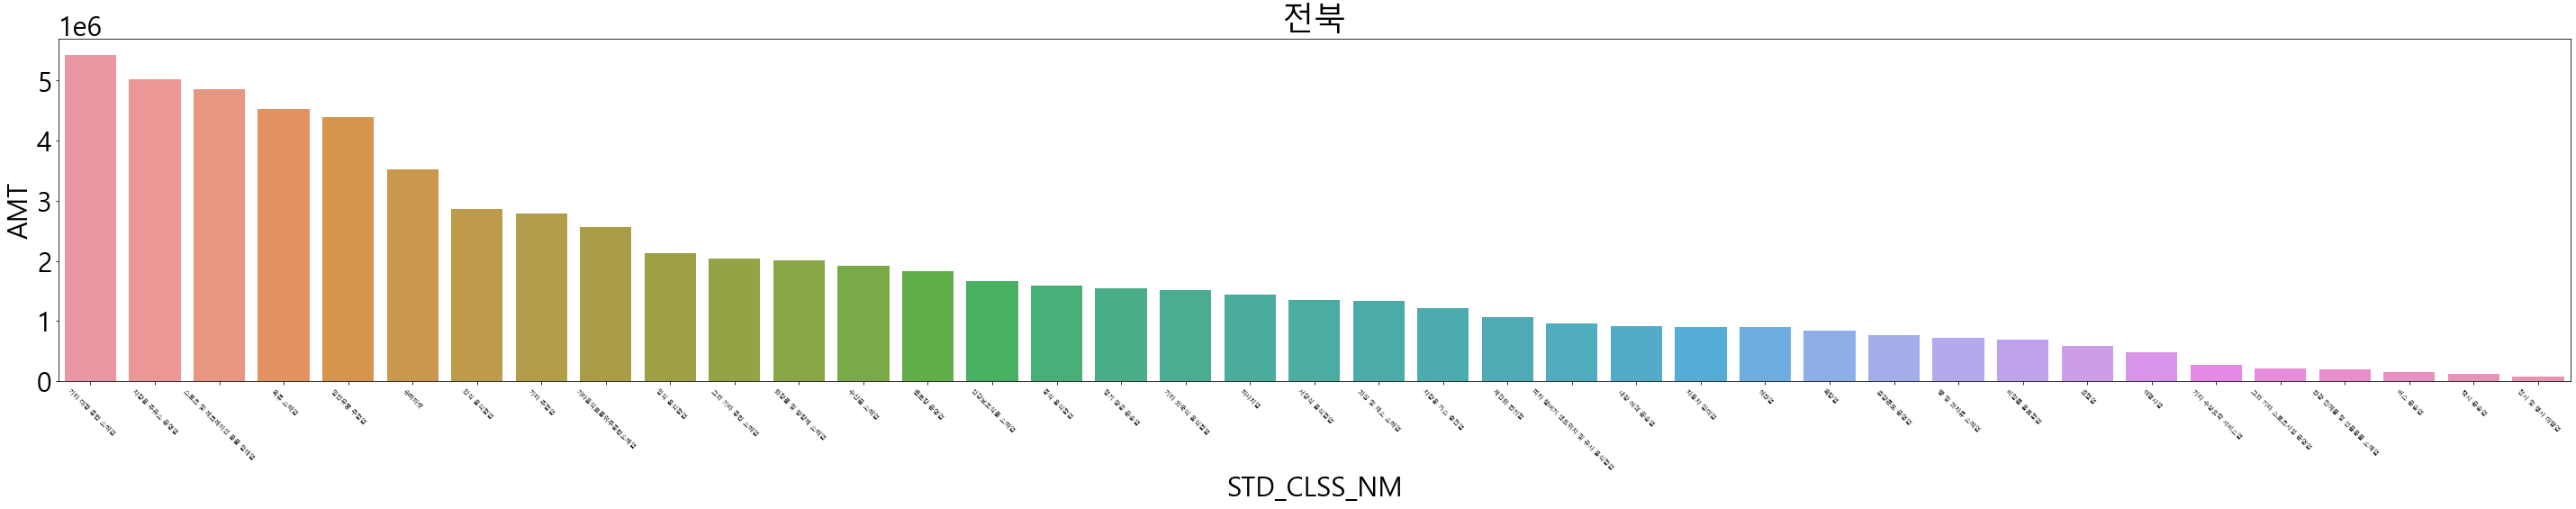

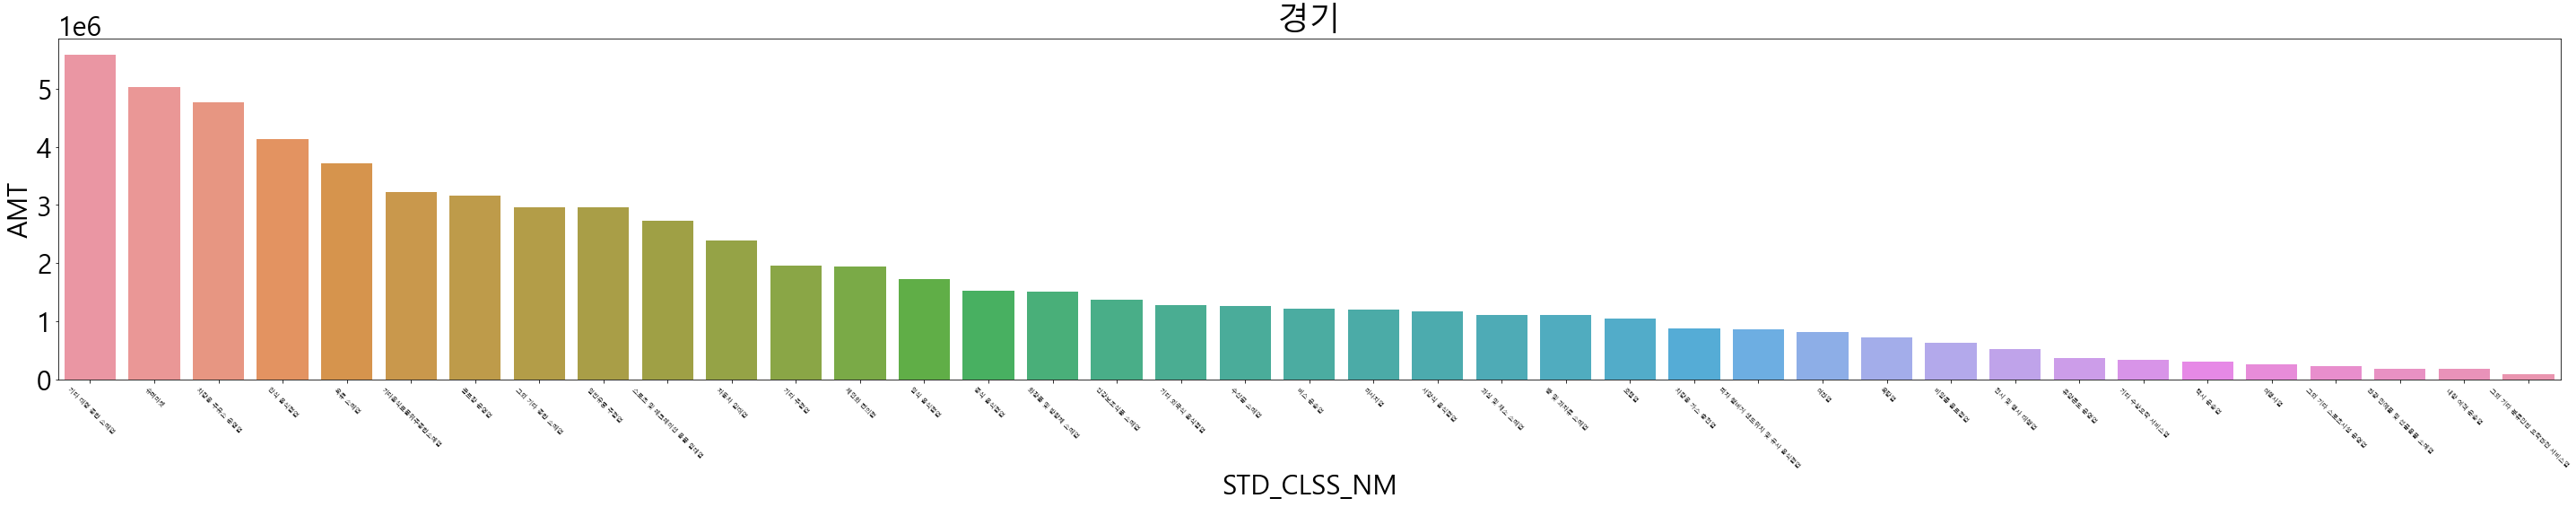

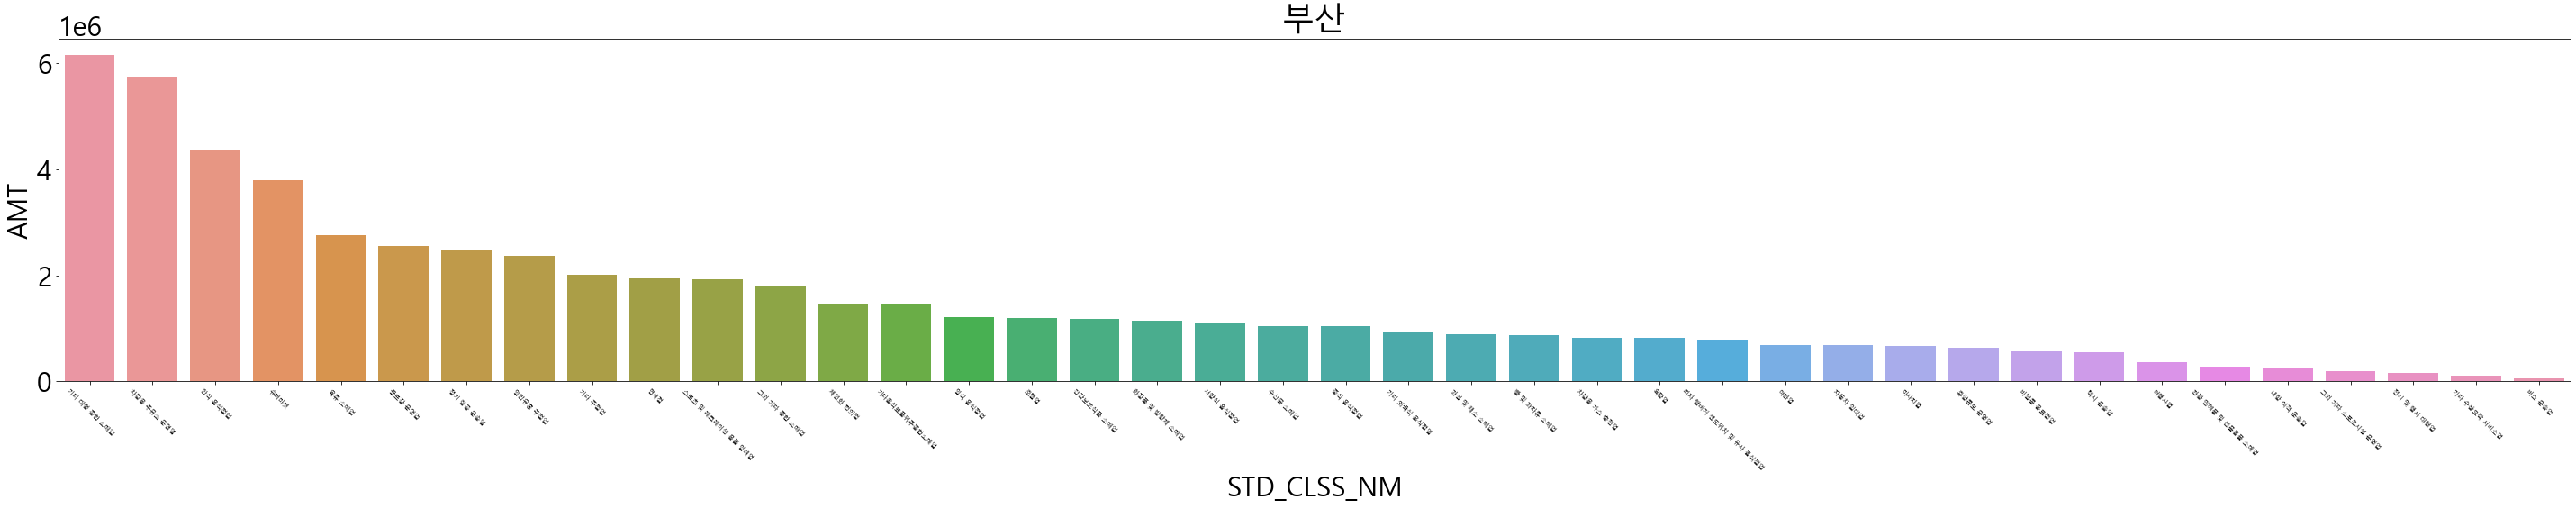

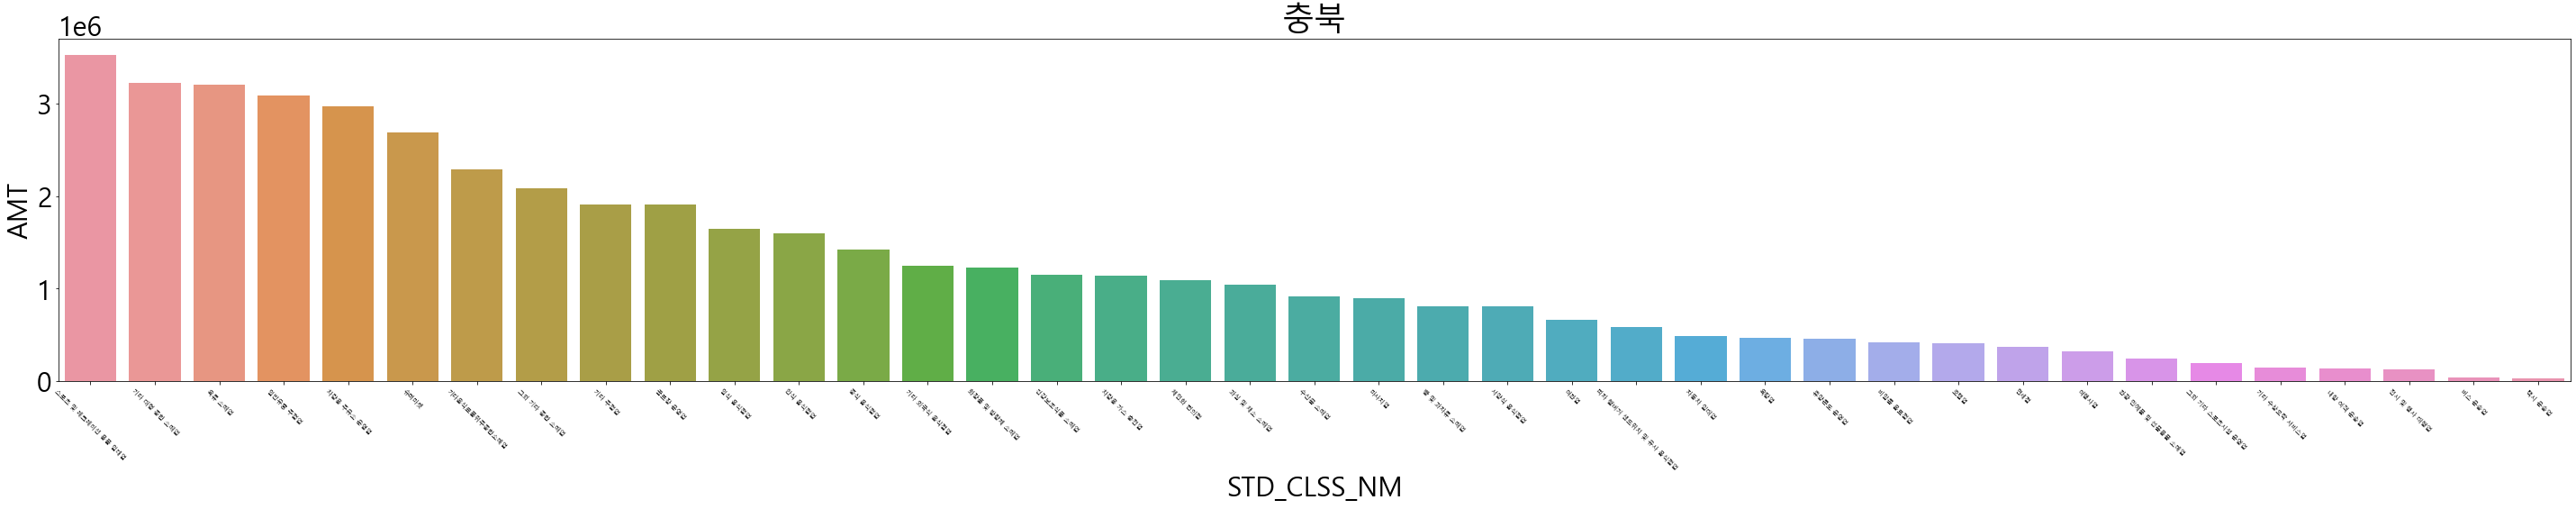

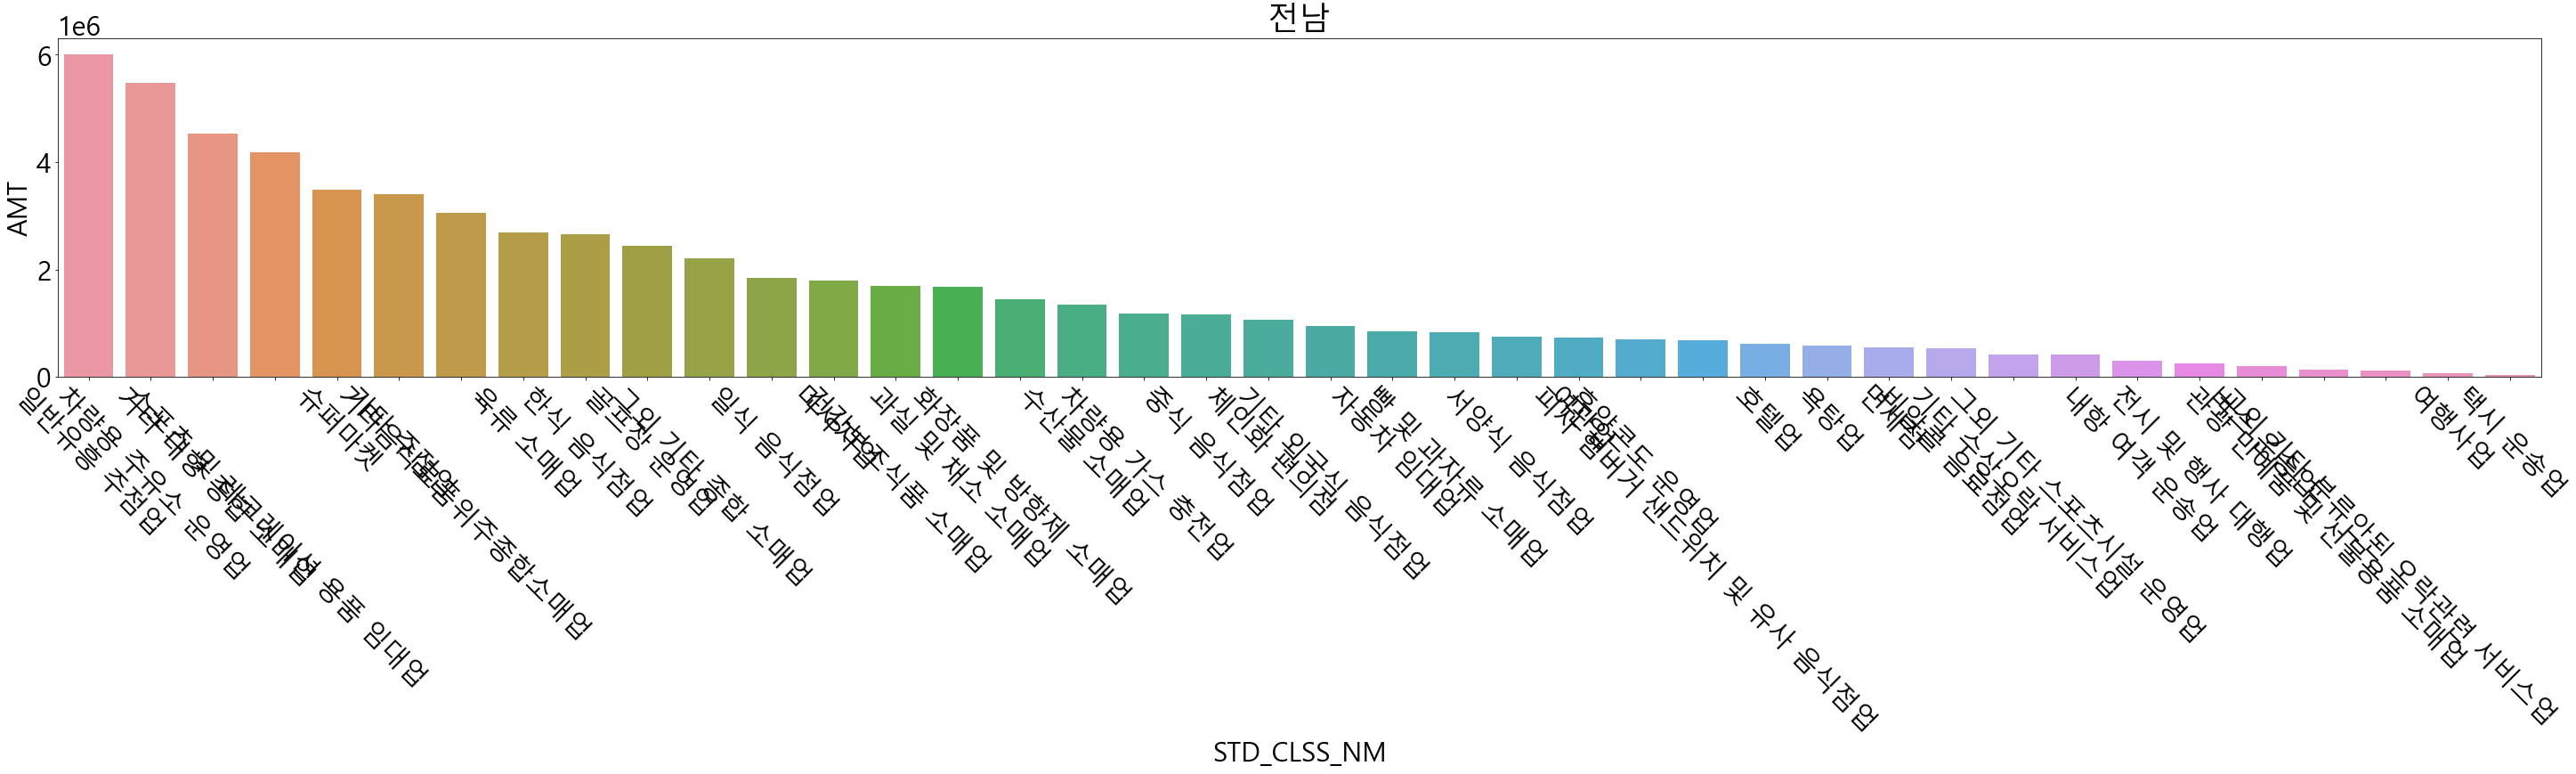

In [36]:
a = 0
for i in sido:
    data = sido_clss_amt_mean.loc[sido[a]].sort_values(by = 'AMT', ascending = False)
    plt.figure(figsize = (50,7))
    b.set_xticklabels(b.get_xticklabels(), fontsize=7)
    plt.xticks(rotation = - 45 )
    b = sns.barplot(data= data, x= data.index, y= 'AMT')
    plt.title(i)
    a+=1

In [ ]:
sido_clss_amt_sum = train.groupby(['CARD_SIDO_NM','STD_CLSS_NM'])['AMT'].sum()
sido_clss_amt_sum = pd.DataFrame(sido_clss_amt_sum)
sido_clss_amt_sum 

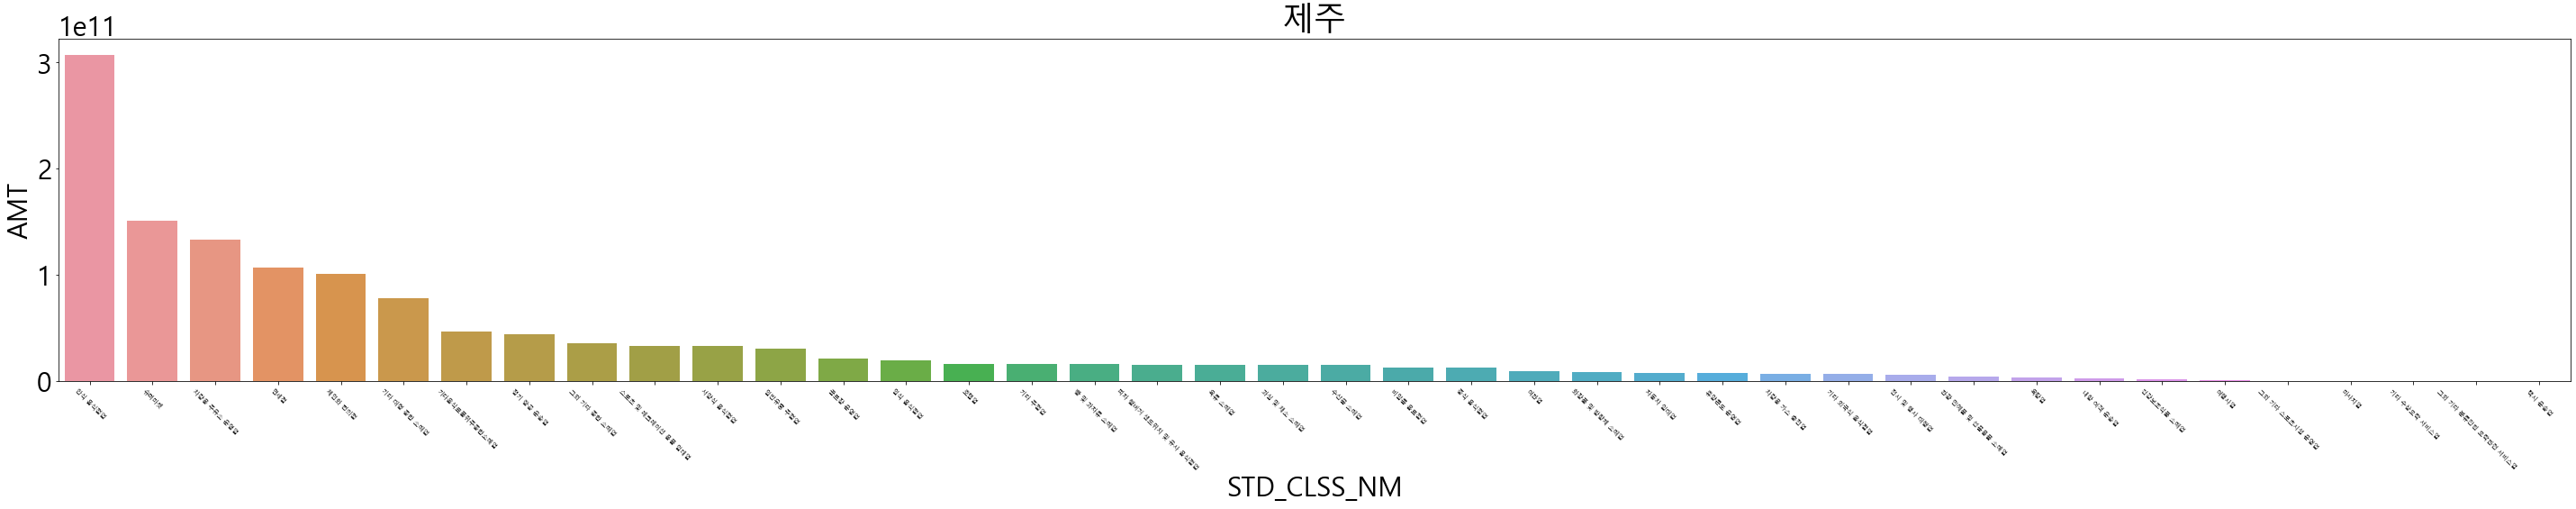

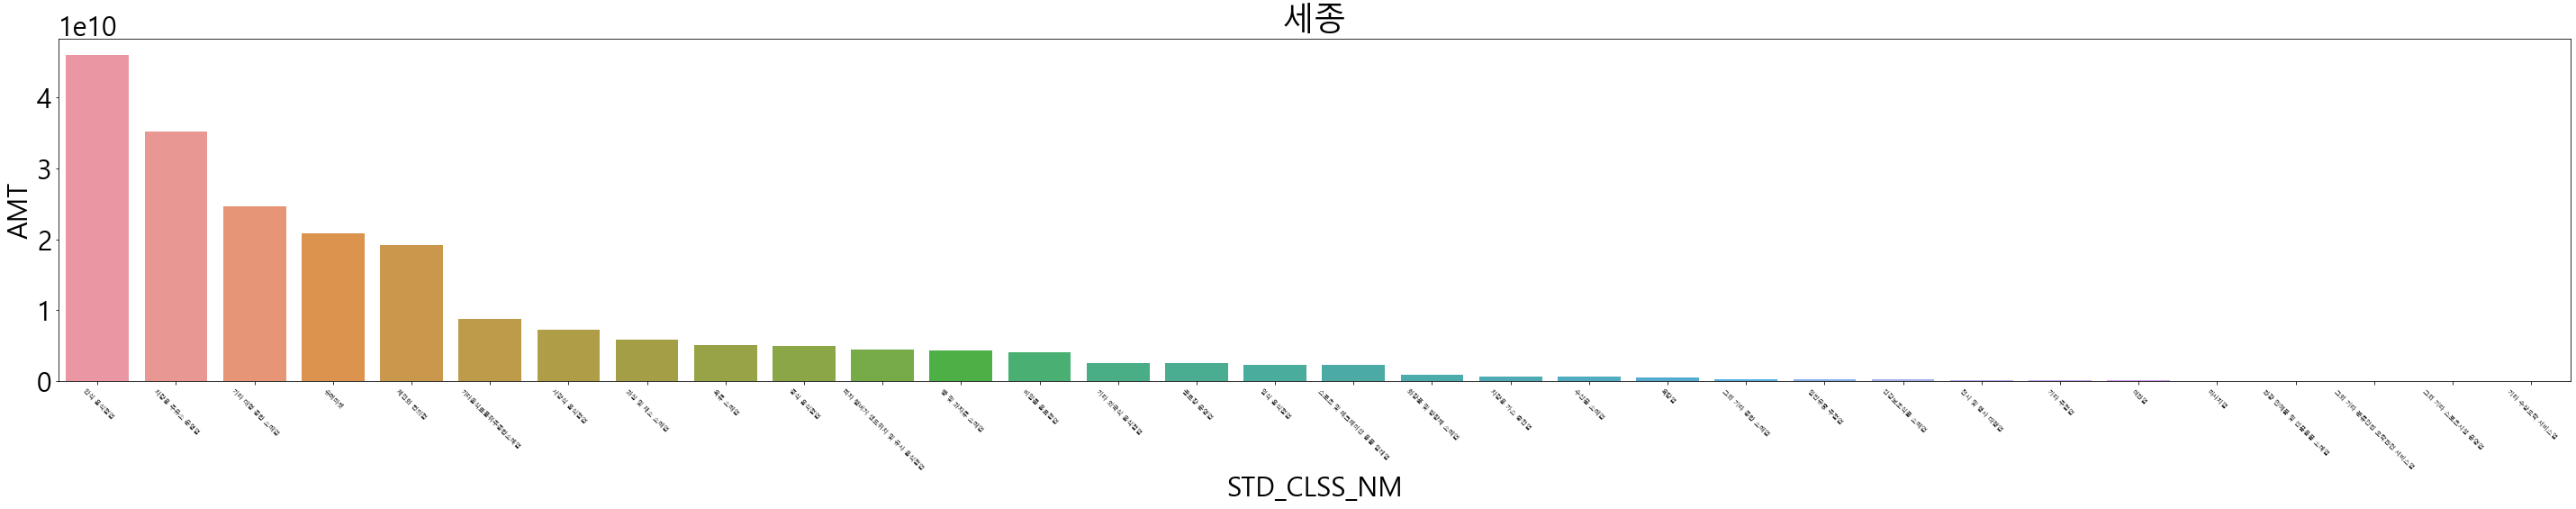

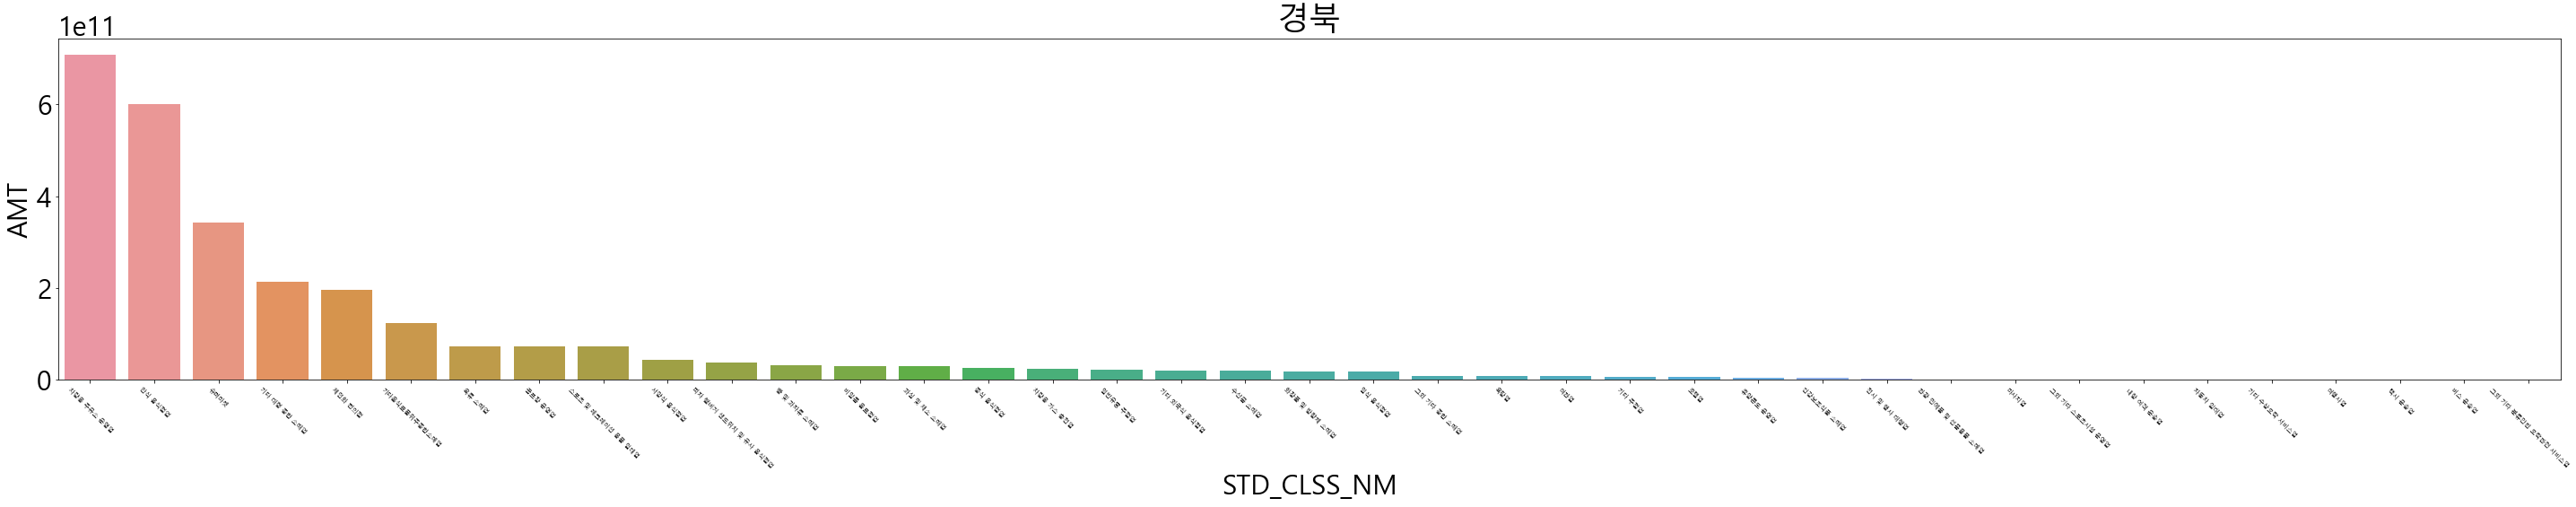

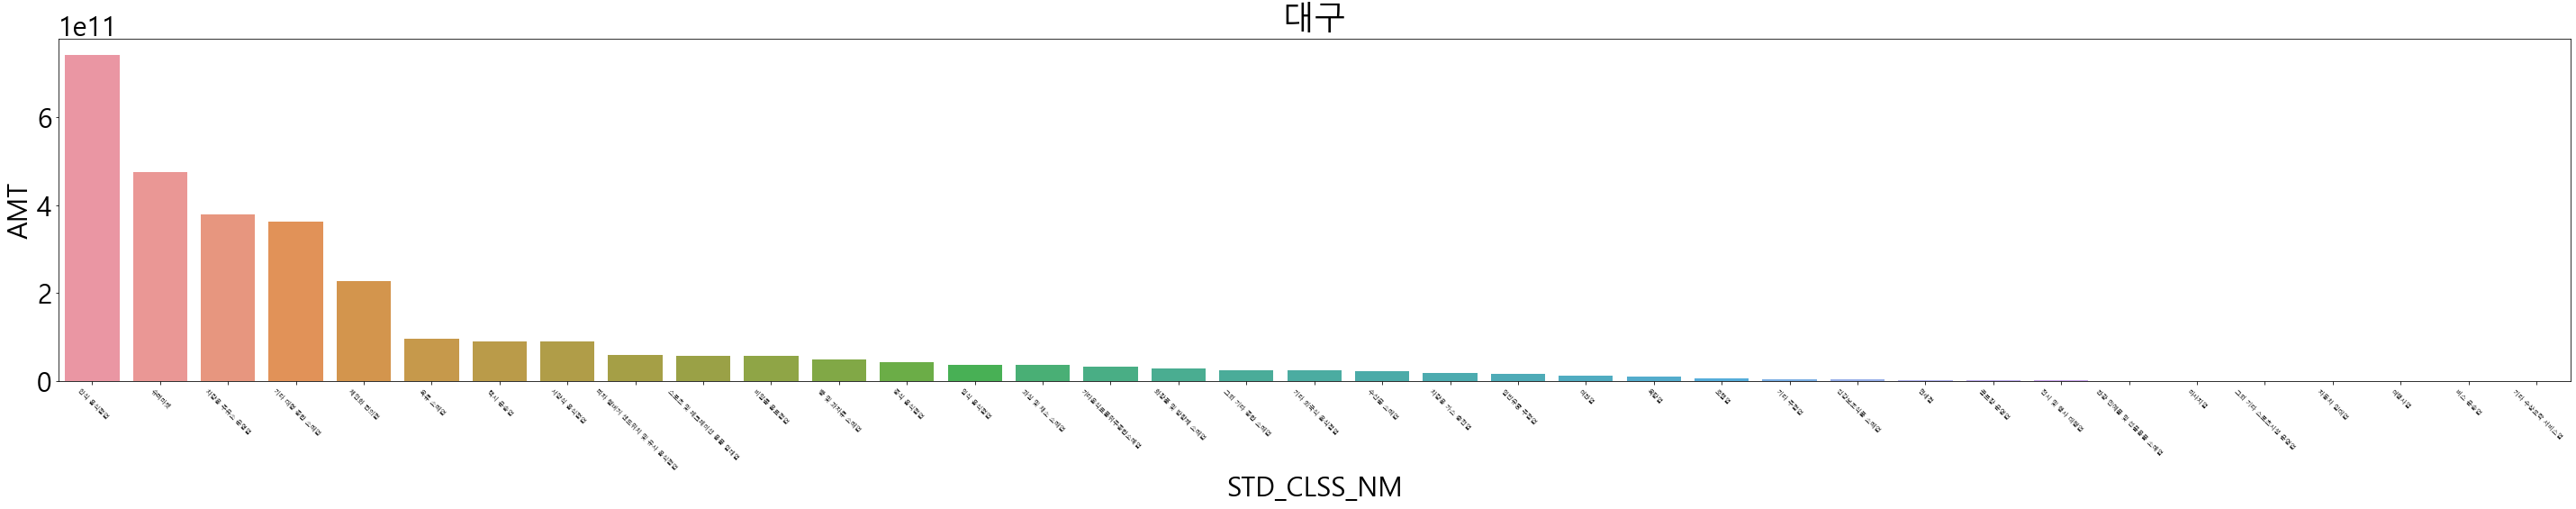

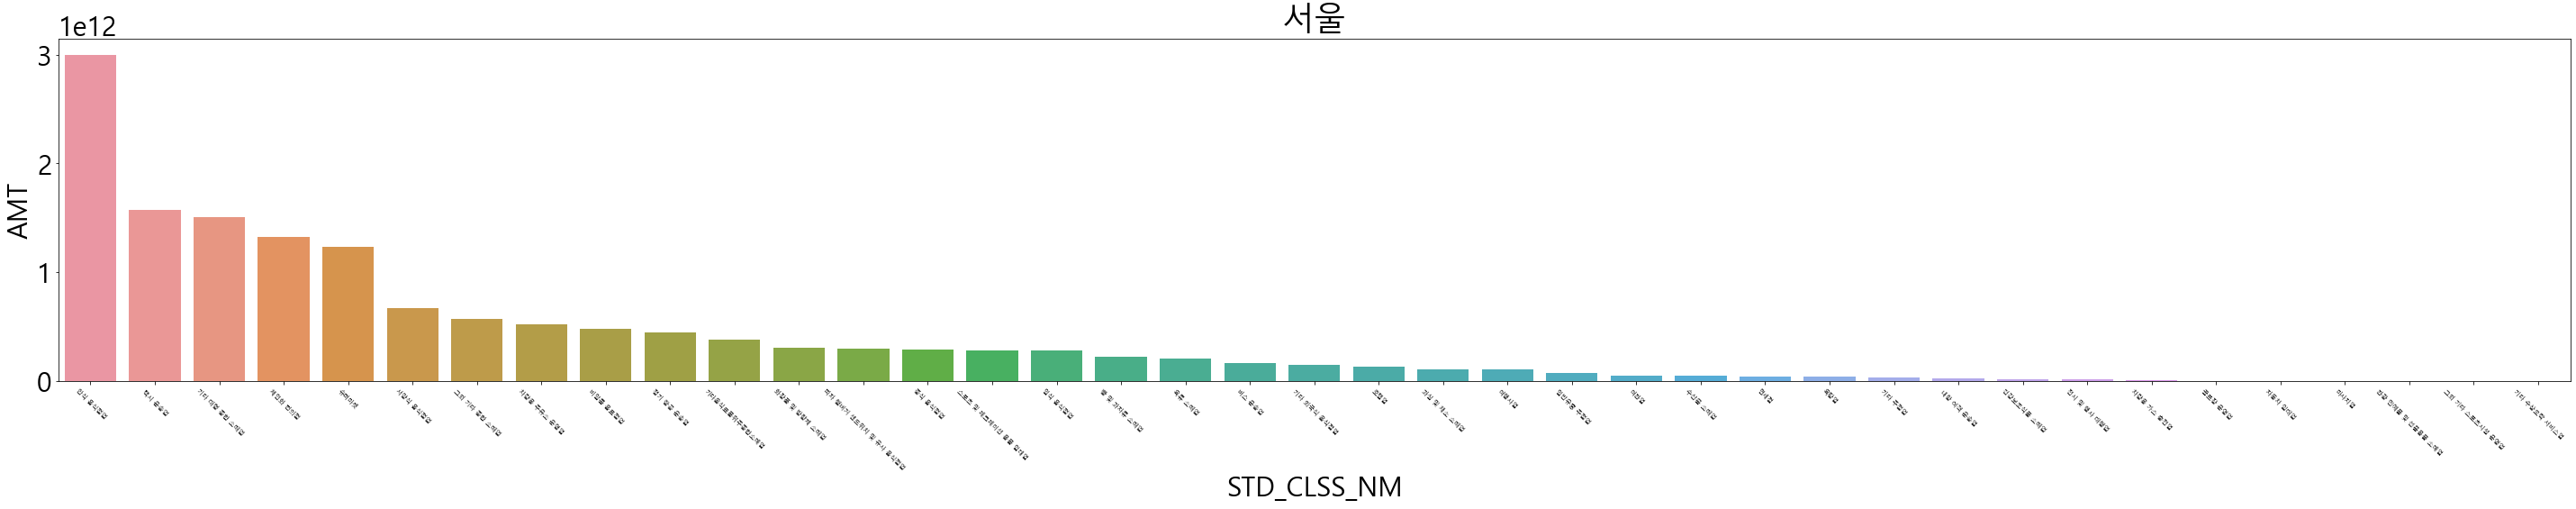

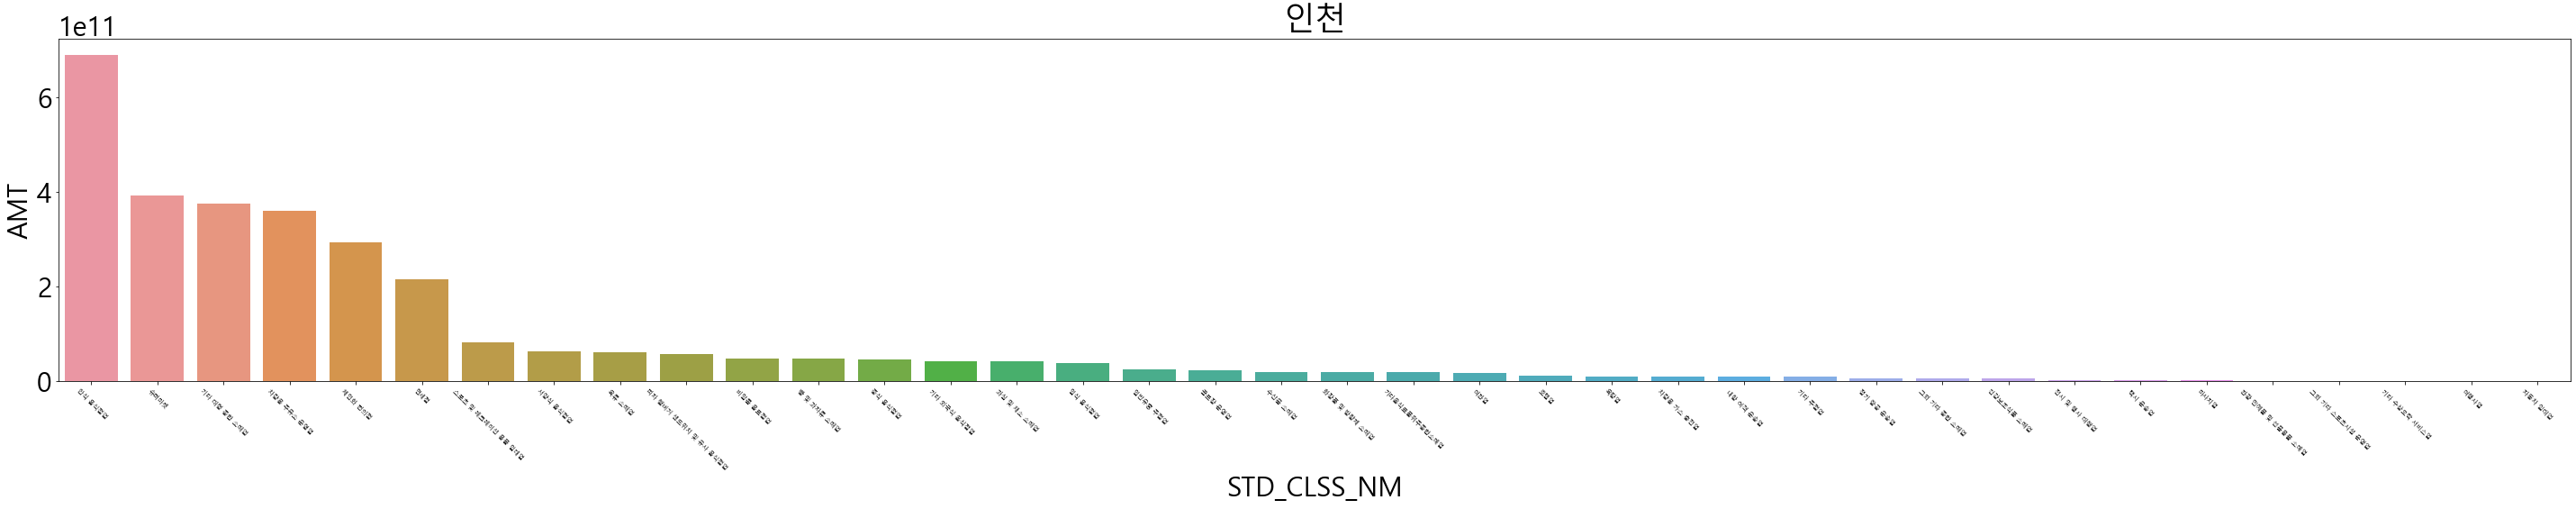

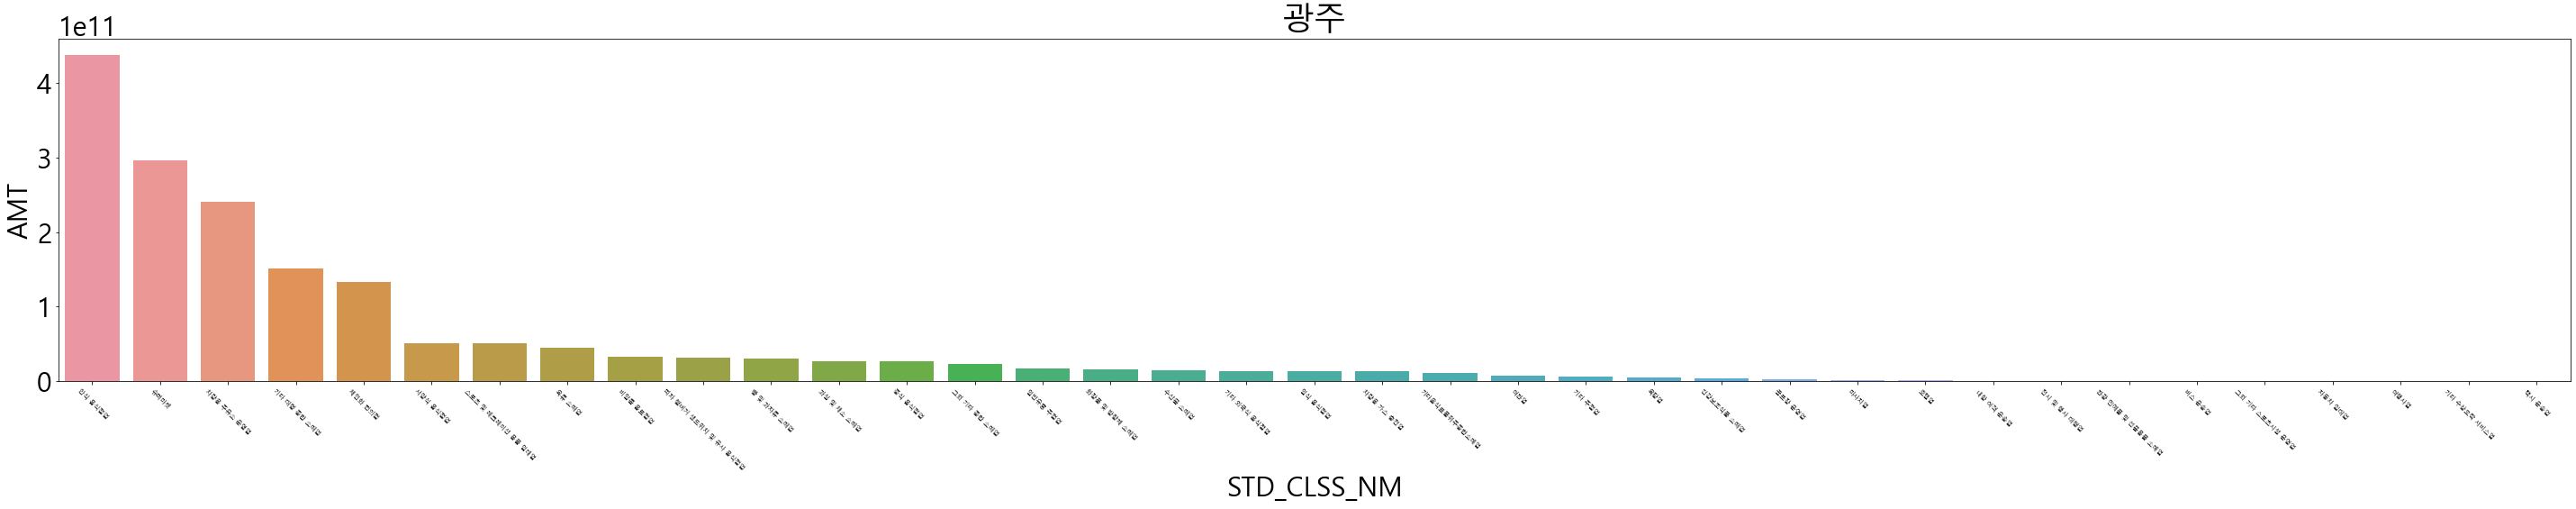

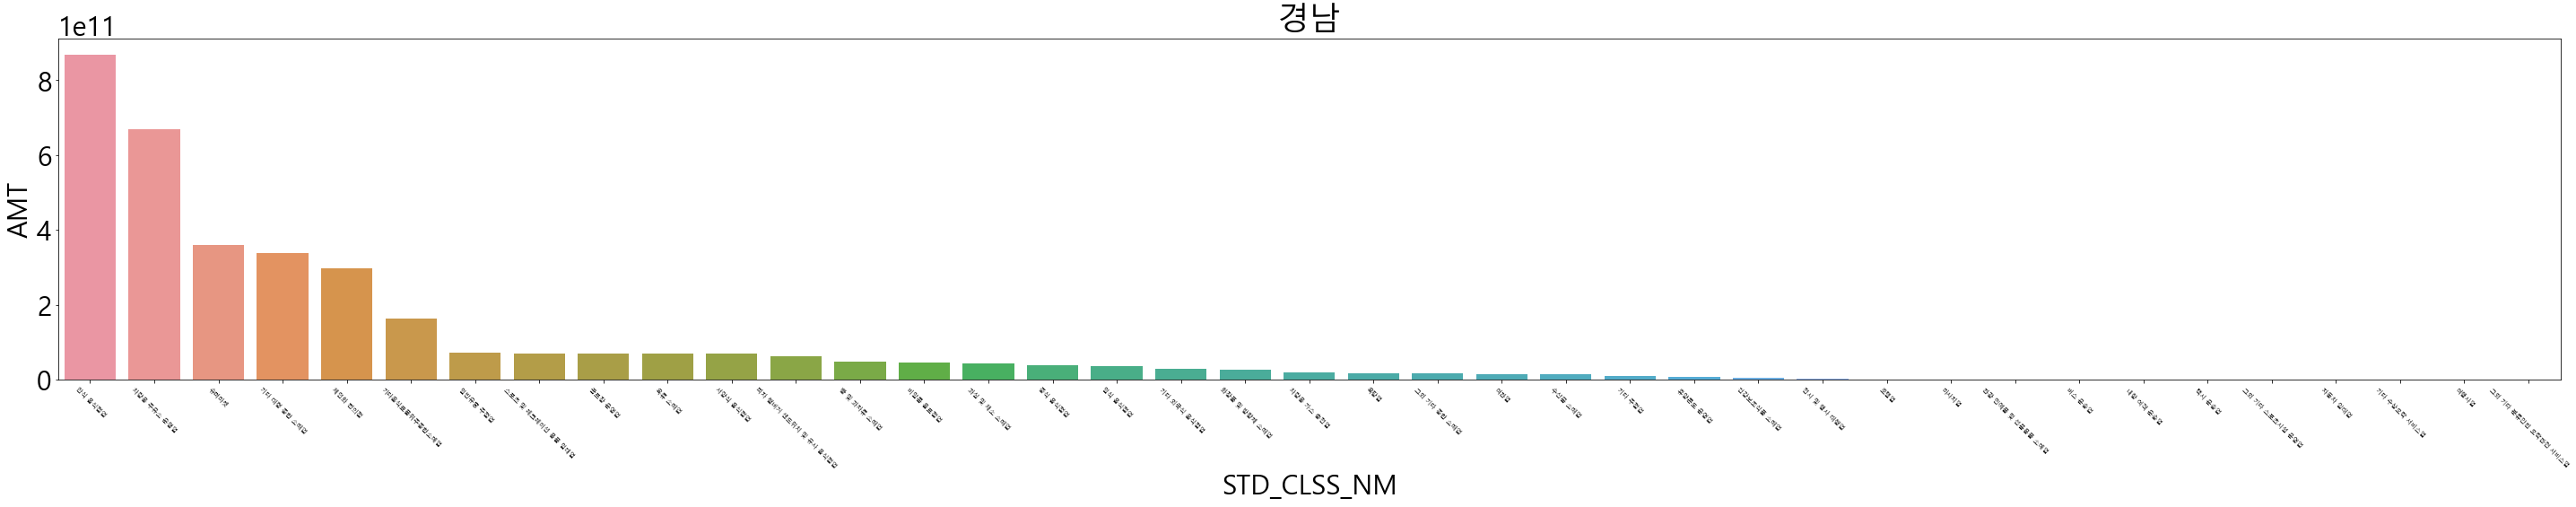

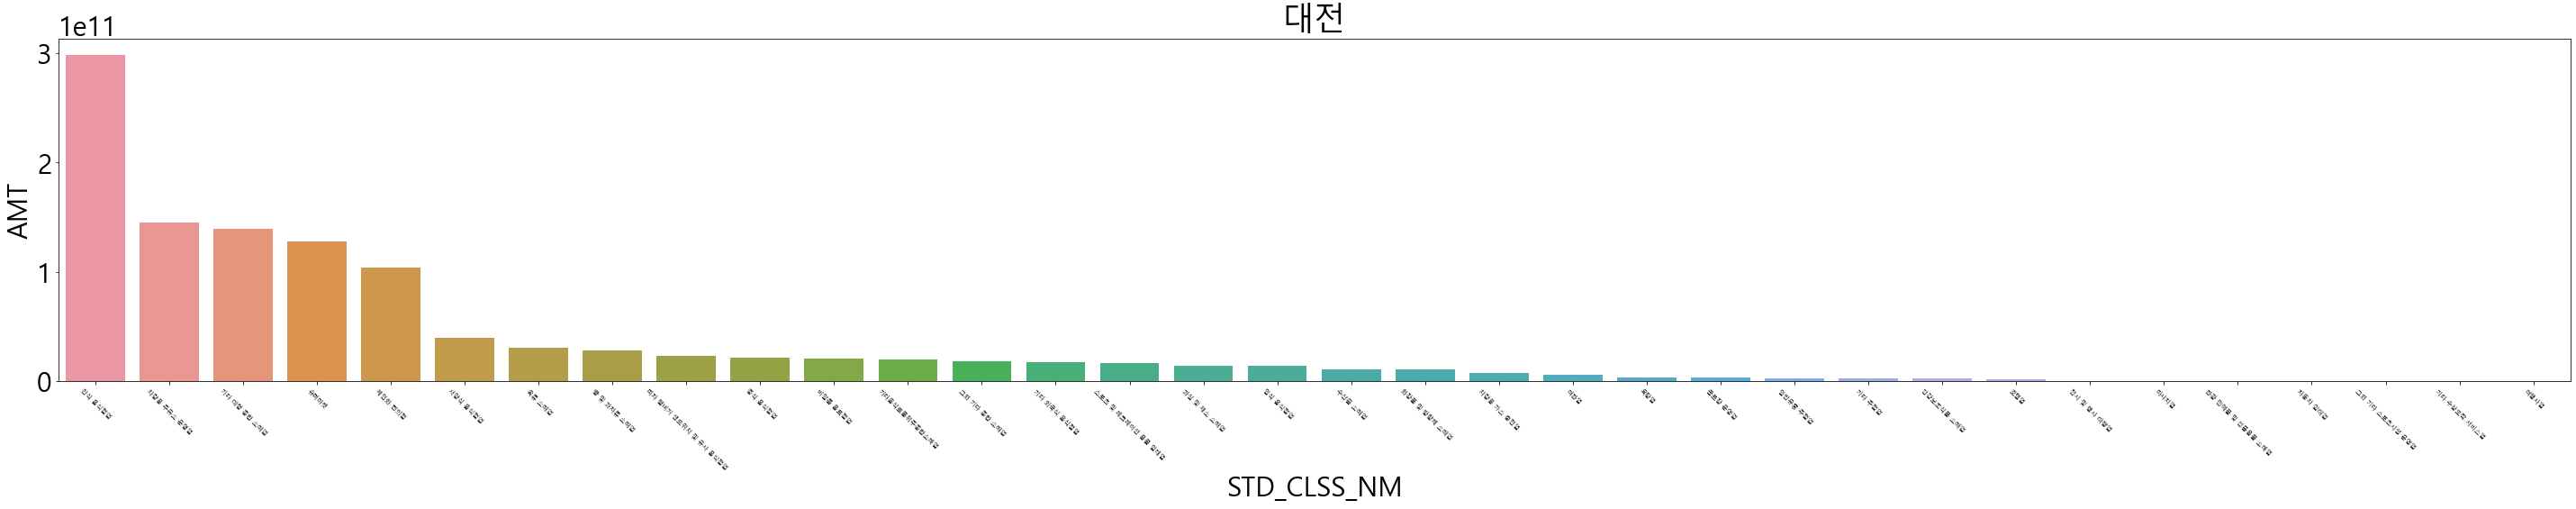

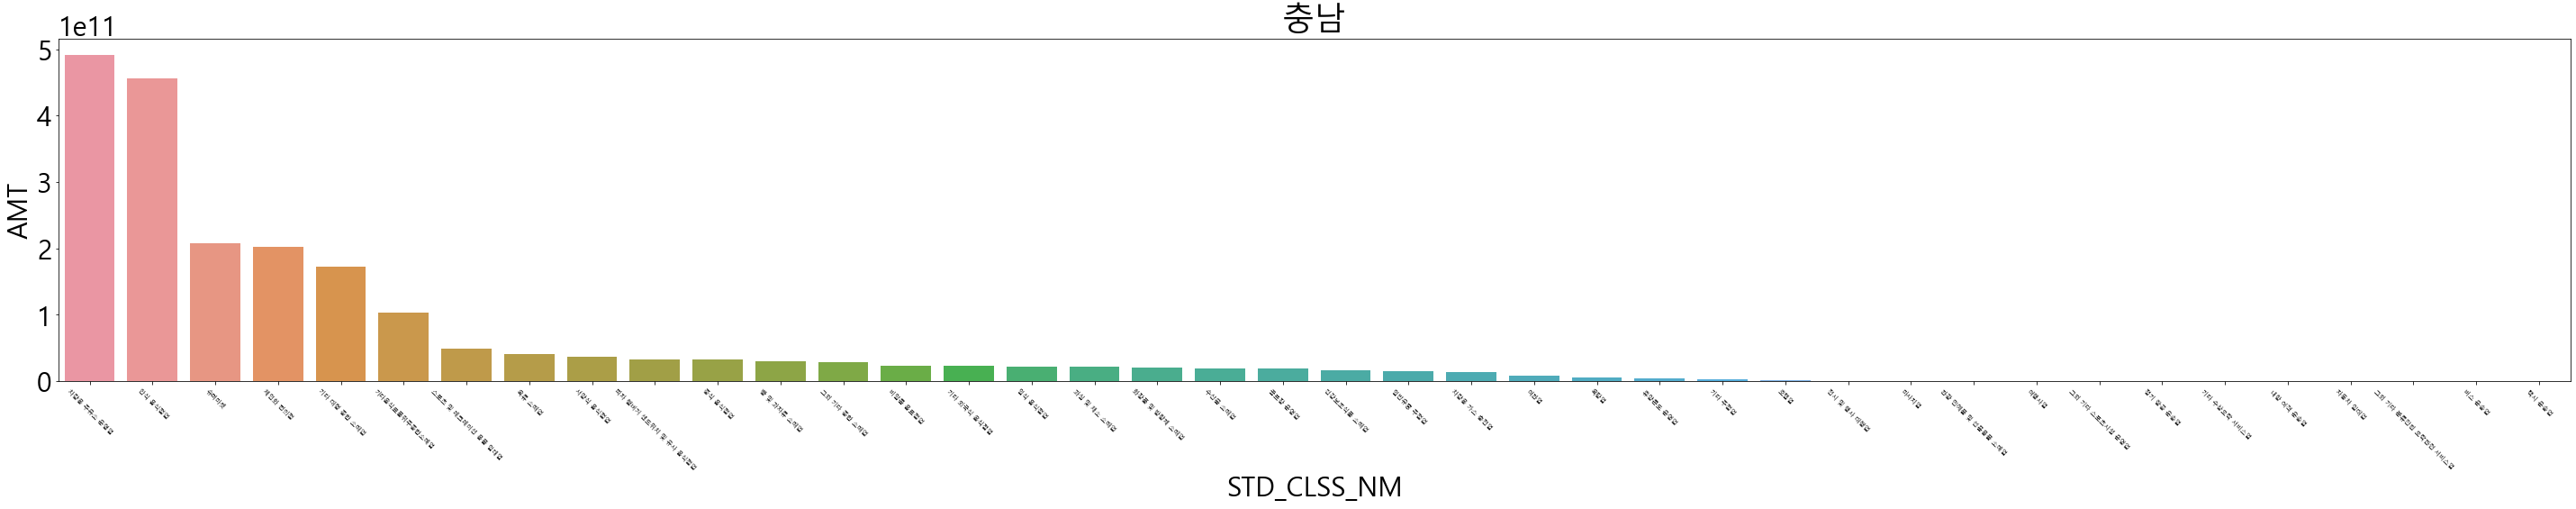

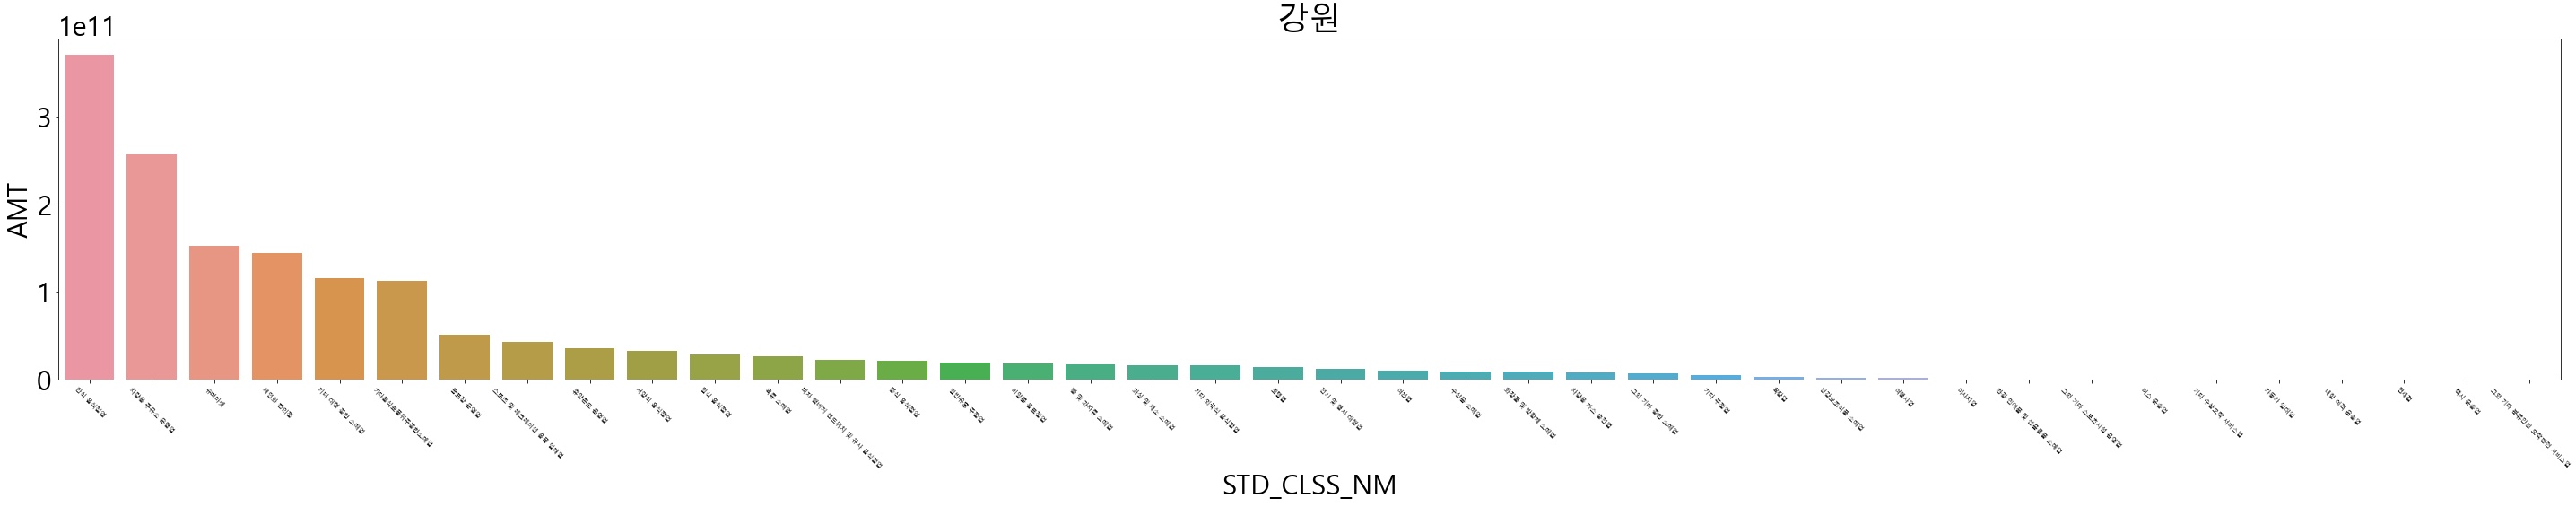

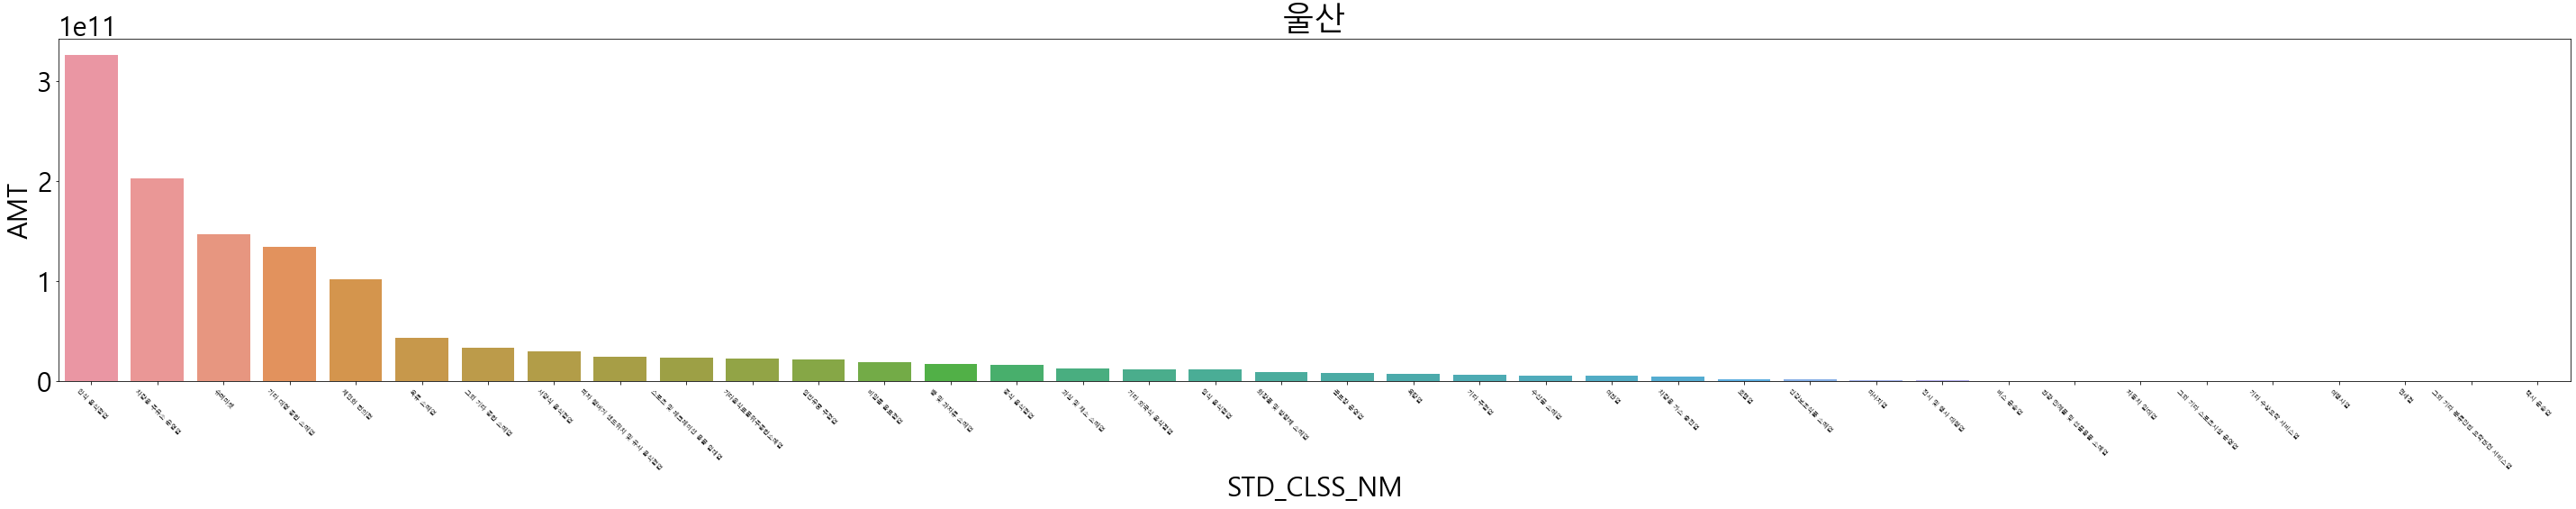

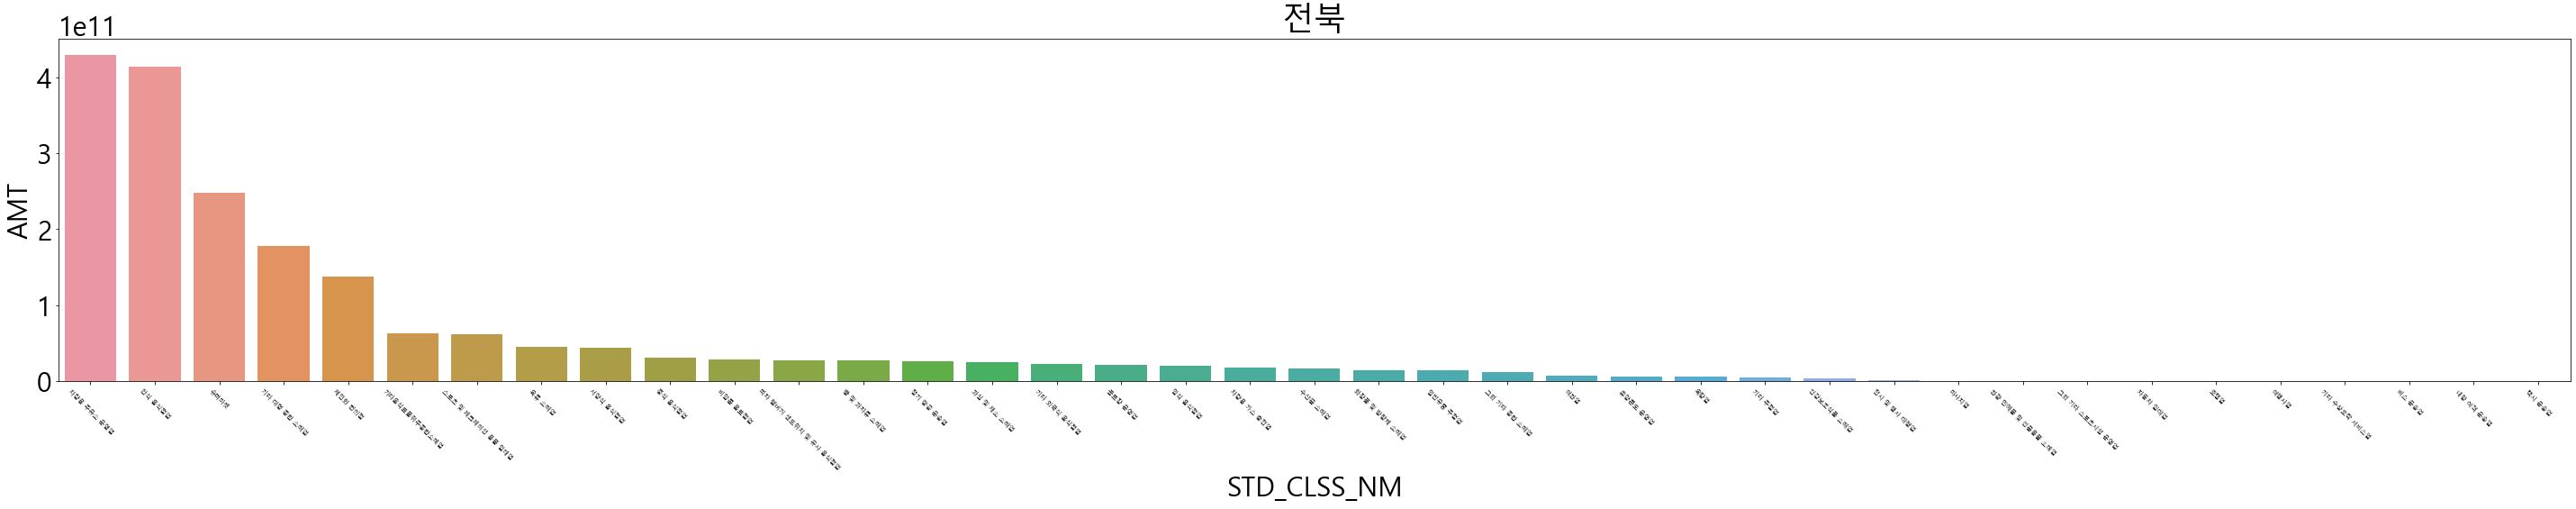

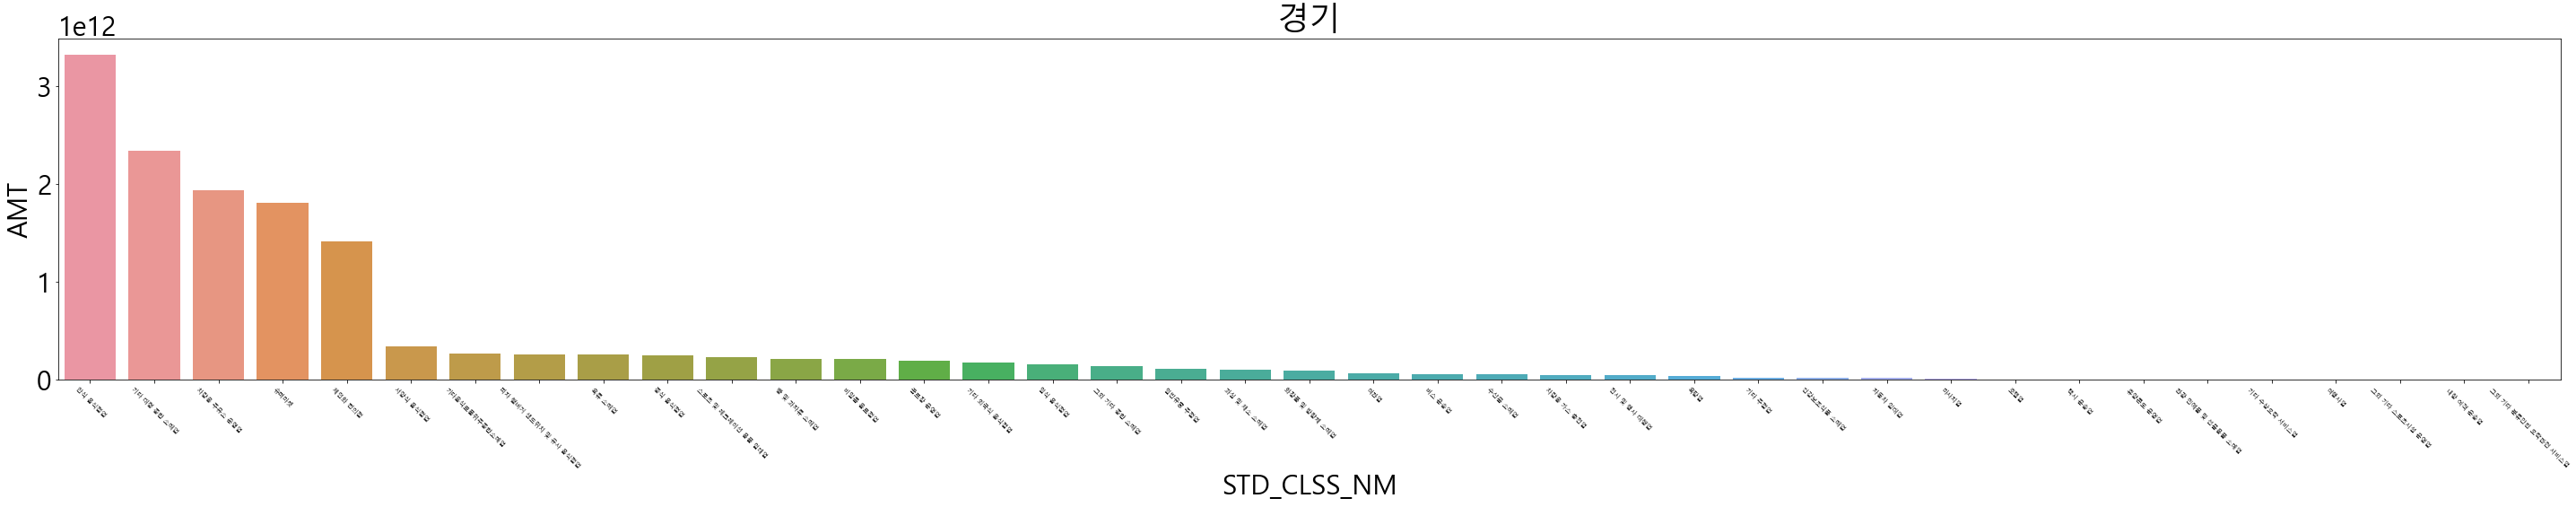

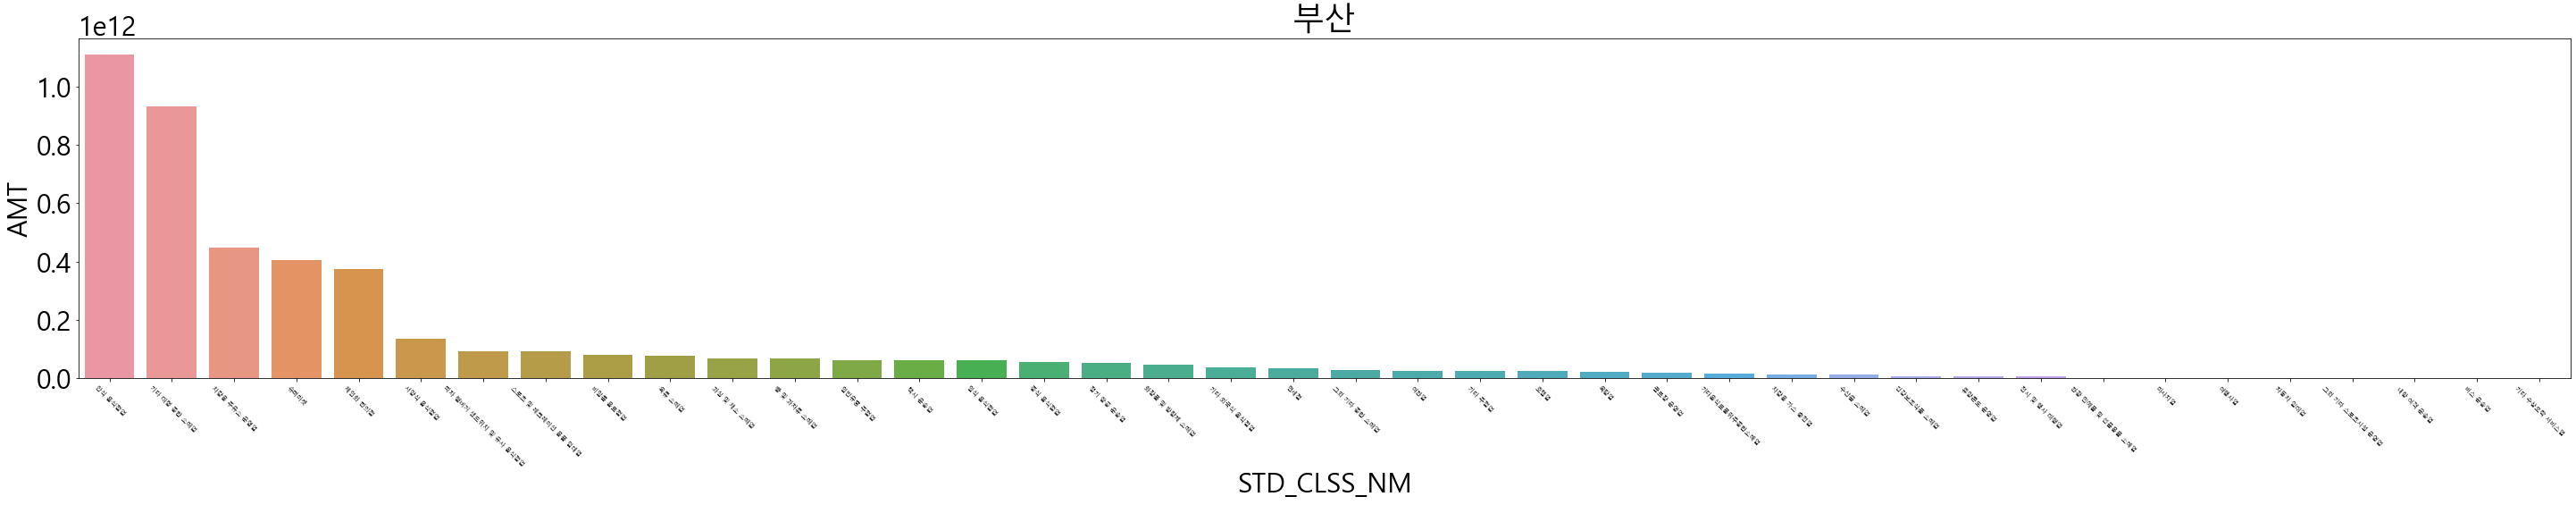

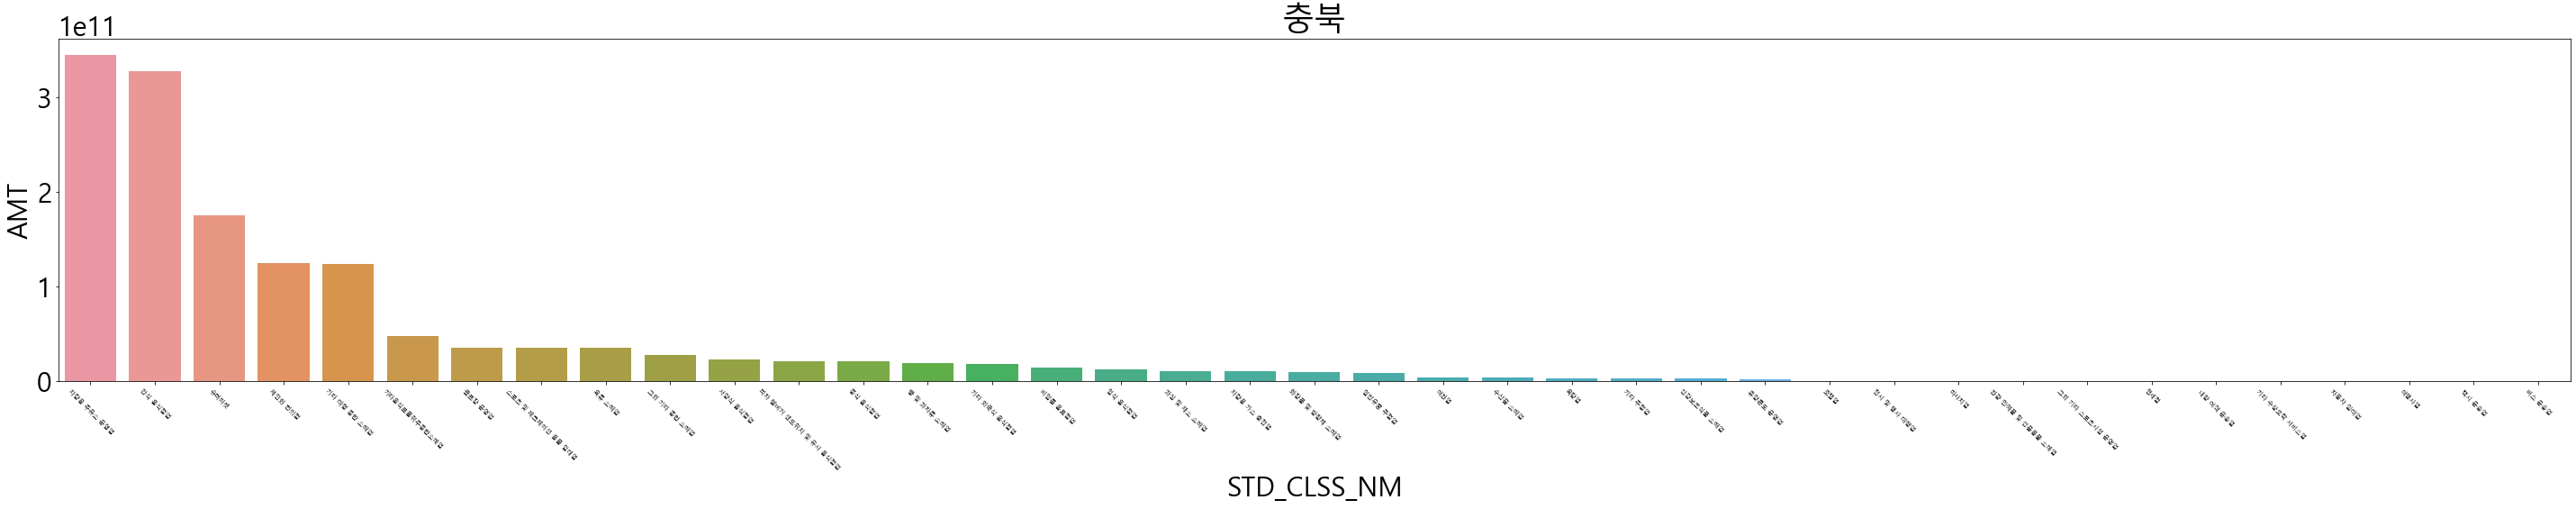

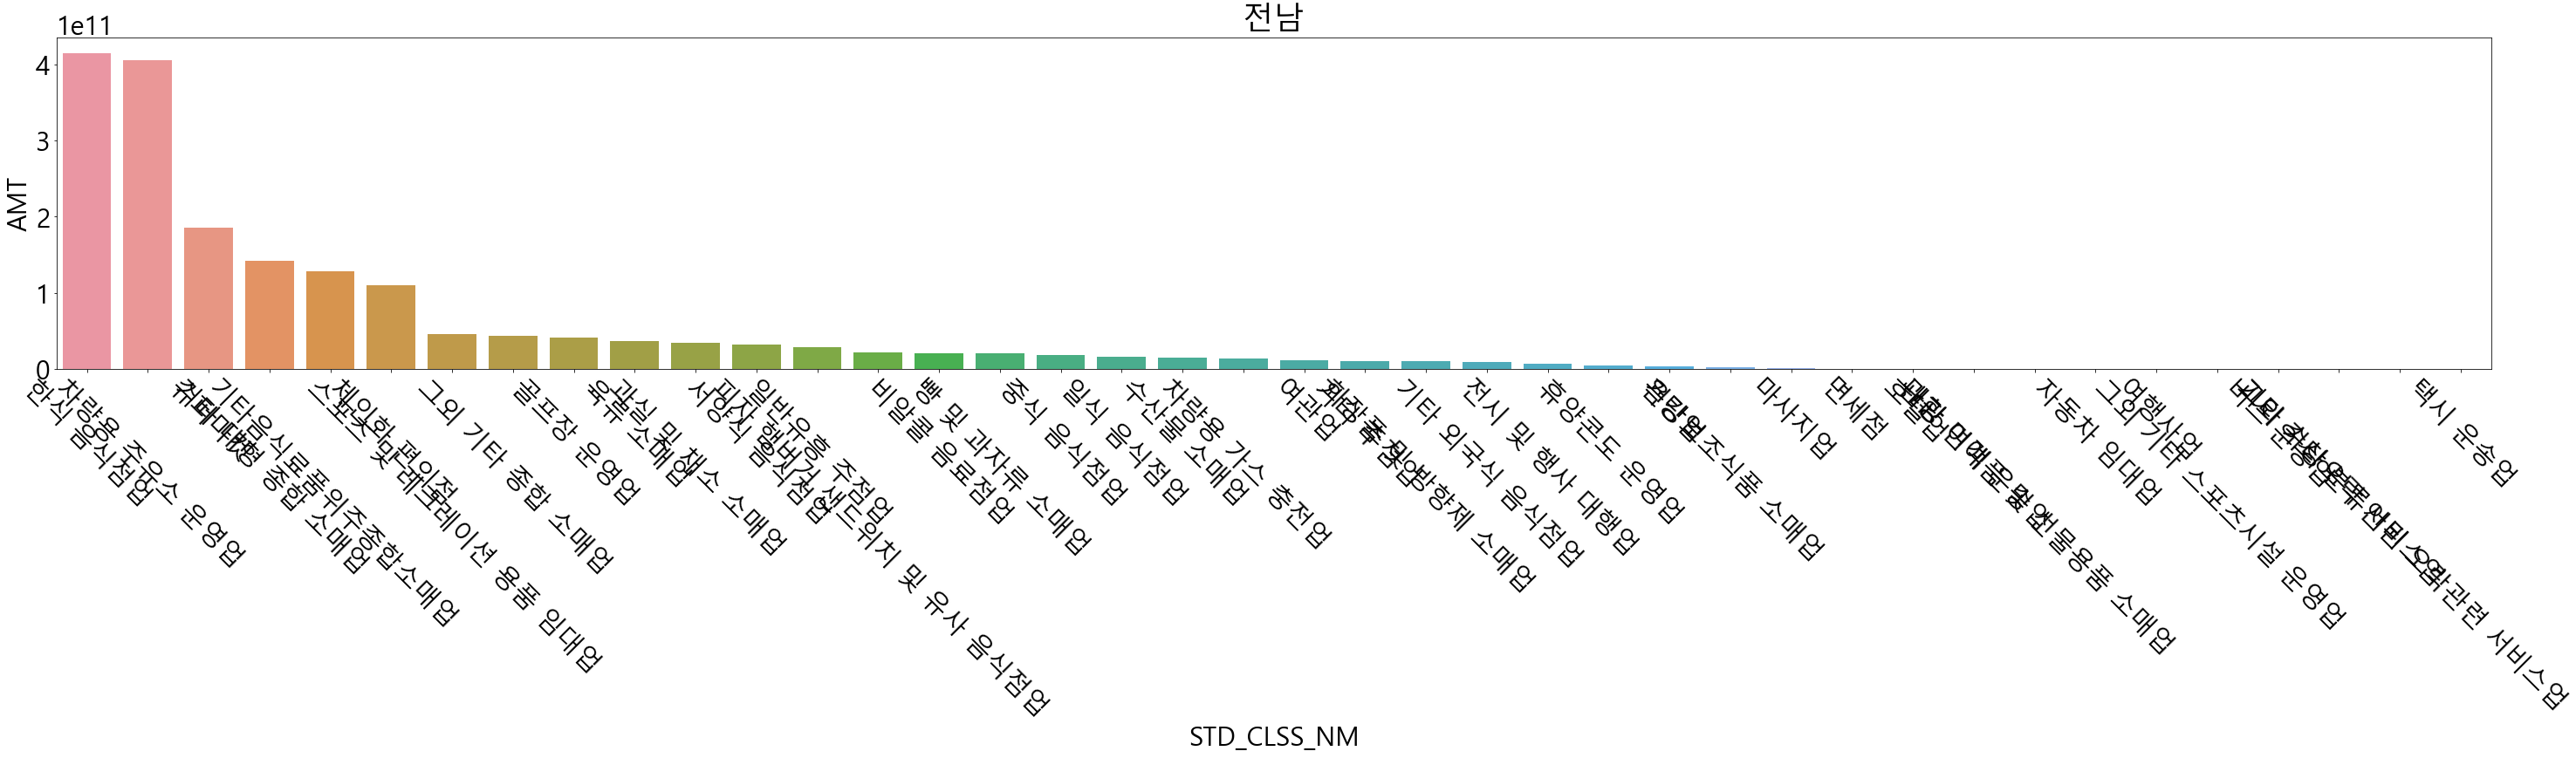

In [38]:
a = 0
for i in sido:
    data = sido_clss_amt_sum.loc[sido[a]].sort_values(by = 'AMT', ascending = False)
    plt.figure(figsize = (50,7))
    b.set_xticklabels(b.get_xticklabels(), fontsize=7)
    plt.xticks(rotation = - 45 )
    b = sns.barplot(data= data, x= data.index, y= 'AMT')
    plt.title(i)
    a+=1